In [155]:
# Importing Libraries 
import numpy as np 
import pandas as pd 

# Import dataset 
dataset = pd.read_csv('input\\train_Arabic_tweets_positive_20190413.tsv', delimiter = '\t',encoding='utf-8') 
dataset2= pd.read_csv('input\\train_Arabic_tweets_negative_20190413.tsv', delimiter = '\t')
a=['target','tweets']

dataset=dataset.rename(columns={'pos': 'target','نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لله، لا تبحثوا فينا عن قوة، إننا مكسورون، القوة التي…':"tweets"})

In [2]:
dataset2.head()

,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم بالزايد 😭
0,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
1,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
3,neg,الدودو جايه تكمل علي 💔
4,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...


In [5]:
dataset2=dataset2.rename(columns={'neg': 'target','اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم بالزايد 😭':"tweets"})

In [6]:
dataset2.head()

,target,tweets
0,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
1,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
2,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
3,neg,الدودو جايه تكمل علي 💔
4,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...


In [7]:
frames=[dataset,dataset2]
result=pd.concat(frames,ignore_index=True)

In [8]:
result.head()

,target,tweets
0,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
1,pos,من الخير نفسه 💛
2,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
3,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
4,pos,#الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبي...


In [9]:
from sklearn.utils import shuffle
df = shuffle(result)

In [10]:
df.head()

,target,tweets
17445,pos,الف مبرووك للجميع يستاهلون 🌹 #كيس_مقتطفات #ملي...
20538,pos,بروح عالثلاجة 😂
21842,pos,لو كان الرئيس مسلم لم يركع له وحثالات الليبرال...
39355,neg,مايذوق العز خمام الوسايد 😔
33670,neg,الف مبرووك لكل عشاق الملكي 👏🏻👏🏻💙💙💪🏻 الحمدلله ع...


In [12]:
len(df)

45273

In [13]:
#REMOVING PUNCTUATIONS
#REMOVING STOPWORDS
#STEMMING


# library to clean data 
import re 

# Natural Language Tool Kit 
import nltk 

#nltk.download('stopwords') 

# to remove stopword 
from nltk.corpus import stopwords 

# for Stemming propose 
from nltk.stem.porter import PorterStemmer 

# Initialize empty array 
# to append clean text 
corpus = [] 



# 1000 (reviews) rows to clean 
for i in range(0,12000): 
    # column : "Review", row ith ()
    tweets =df['tweets'][i] 
    
    # convert all cases to lower cases
    #tweets = tweets.lower() 
    
    # split to array(default delimiter is " ") 
    tweets = tweets.split() 
    
    
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer() 
    
    # loop for stemming each word 
    # in string array at ith row
    tweets = [ps.stem(word) for word in tweets if not word in set(stopwords.words('arabic'))] 
    print(tweets)
    
    # rejoin all string array elements 
    # to create back into a string 
    tweets = ' '.join(tweets) 
    print(tweets)
    
    # append each string to create 
    # array of clean text 
    corpus.append(tweets) 

    
#corpus

['وفي', 'النهاية', 'يبقىٰ', 'معك', 'آحدإلا', 'رأىٰ', 'الجمال', 'روحك', 'أماالمنبهرون', 'بالمظا…']
وفي النهاية يبقىٰ معك آحدإلا رأىٰ الجمال روحك أماالمنبهرون بالمظا…
['الخير', 'نفسه', '💛']
الخير نفسه 💛
['#زلزل_الملعب_نصرنا_بيلعب', 'كن', 'عالي', 'الهمه', 'ترضى', 'بغير', 'القمه', 'مجرد', 'ساعات', 'لاستعادة', 'الصداره💛💙', 'الوصول', 'القمه', 'مهارة', 'ت…']
#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ترضى بغير القمه مجرد ساعات لاستعادة الصداره💛💙 الوصول القمه مهارة ت…
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا للعالمية : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
['#الاتحاد_النصر', 'لاتحسبونا', 'نسينا', 'يالطواقي', 'ولانبيكم', 'توقفون', 'معنا', 'ماحنا', 'بحاجت', 'جماهير', 'مسيار', 'يوم', 'الايام', 'شجعت', 'الكوري…']
#الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبيكم توقفون معنا ماحنا بحاجت جماهير مسيار يوم الايام شجعت الكوري…
['احبك', 'انت', 'وياه', 'واموري', 'سعه', '🎶']
احبك انت ويا

['مثلك', 'وشرواك', 'باقي', 'اشوفك', 'واحكم', '😂']
مثلك وشرواك باقي اشوفك واحكم 😂
['بعرف', 'اني', 'اسوء', 'حالاتي', 'بتجه', 'للساوند', 'كلاود', 'و', 'افتح', 'بلاي', 'مسار', ':D']
بعرف اني اسوء حالاتي بتجه للساوند كلاود و افتح بلاي مسار :D
['ابشرك', 'ابو', 'سامي', 'بخير', 'الحمد', 'لله', '..', 'شكرا', '🌹']
ابشرك ابو سامي بخير الحمد لله .. شكرا 🌹
['|', '❀', 'التهميش', 'حل', 'لڪل', 'شخص', 'يحاول', 'إنو', 'يصعد', 'فوق', 'السطور', 'مالھہ', 'مڪان', 'الصفحھہ', 'اساسا']
| ❀ التهميش حل لڪل شخص يحاول إنو يصعد فوق السطور مالھہ مڪان الصفحھہ اساسا
['يسعد', 'صباحك', 'ورده', '🌹']
يسعد صباحك ورده 🌹
['❀', 'يسلموو', '\u2067#ركاد\u2069', '\u2066\u2069', '🌟🌟', '🌟🌟', '\u2067#الادارة\u2069', '\u2066\u2069', 'نرقا', 'سما', '\u2067#تميزنا\u2069', '\u2067#وتفردنا\u2069', 'بالعطاء…']
❀ يسلموو ⁧#ركاد⁩ ⁦⁩ 🌟🌟 🌟🌟 ⁧#الادارة⁩ ⁦⁩ نرقا سما ⁧#تميزنا⁩ ⁧#وتفردنا⁩ بالعطاء…
['صرت', 'مدمنه', 'علي', 'القهوا', '☕']
صرت مدمنه علي القهوا ☕
['اللي', 'ماتقدر', 'تقوله', 'وليش', '😅', 'الكاميرا', 'الخفيه', 'لأيام', 'زمان']
اللي ماتقدر

['♩', '.', '.', '⌗', 'ي', 'رب', 'أجعلة', 'صباحا', 'ينثر', 'طعم', 'الإبتسامةة', 'ثغر', 'السسحاب', ',', 'ف', 'تمطر', 'م', 'نشتهي', 'ب', 'مشيئتك']
♩ . . ⌗ ي رب أجعلة صباحا ينثر طعم الإبتسامةة ثغر السسحاب , ف تمطر م نشتهي ب مشيئتك
['عيدي', 'اختي', '🤩']
عيدي اختي 🤩
['صباح', 'الخير', '🌹']
صباح الخير 🌹
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا للعالمية : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
['انا', 'مش', 'ملاك', 'رسول', '،', 'ممكن', 'ابقي', 'حد', 'كويس', 'وانت', 'معايا', '💜']
انا مش ملاك رسول ، ممكن ابقي حد كويس وانت معايا 💜
['راح', 'اوزع', 'لفات', 'كلمن', 'حسب', 'شهر', 'ميلاده', '💪☺', '-لفة', 'بيض', '🍳', '-لفة', 'جبن', '🍙', '-الي', 'تريده', 'قلبي', '😊', '-لفة', 'كباب', '🍔', 'حض', '-لفة', 'طماطه…']
راح اوزع لفات كلمن حسب شهر ميلاده 💪☺ -لفة بيض 🍳 -لفة جبن 🍙 -الي تريده قلبي 😊 -لفة كباب 🍔 حض -لفة طماطه…
['°•🌸💌', '🍃لا', 'إلٰه', 'الله', 'محمد', 'رسول', 'الله🍃', 'نبض', 'قلبك'

['🚨', 'النصر', 'ارسل', 'خطاب', 'لاتحاد', 'القدم', 'يفيد', 'باستبعاد', 'حكام', 'يقودون', 'اي', 'لقاء', 'للفريق', 'الجولات', 'القادمة.', '(', 'الجزيرة', ')']
🚨 النصر ارسل خطاب لاتحاد القدم يفيد باستبعاد حكام يقودون اي لقاء للفريق الجولات القادمة. ( الجزيرة )
['#يسقط_حكم_تميم', 'نصر_اللات', 'المكنى', 'بزميره_ابليس', 'يقول:', 'خميني', 'عربي', 'ابن', 'عربي', 'ابن', 'رسول', 'الله', 'و', 'خامنئی', 'عربي', 'قرشي', 'ابن', 'رسول', 'ال…']
#يسقط_حكم_تميم نصر_اللات المكنى بزميره_ابليس يقول: خميني عربي ابن عربي ابن رسول الله و خامنئی عربي قرشي ابن رسول ال…
['ﺍﻟﻠﻬﻢ', 'الصباح', 'ﺍجعل', 'ﻧﺼﻴﺒﺎ', 'ﻓﻲ', 'ﻛﻞ', 'ﺧﻴﺮ', 'ﺗﻘﺴﻤﻪ', 'ﻭﻓﻲ', 'ﻛﻞ', 'ﻧﻮﺭ', 'ﺗﻨﺸﺮﻩ', 'ﻭﻓﻲ', 'ﻛﻞ', 'ﺭﺯﻕ', 'ﺗﺒﺴﻄﻪ', 'ﻭﻓﻲ', 'ﻛﻞ', 'ﺿﺮ', 'ﺗﻜﺸﻔﻪ', 'ﻭﻓﻲ', 'ﻛﻞ', 'ﺑﻼﺀ', 'ﺗﺮﻓﻌﻪ', '🌸', '#صباح_الخير', '🌸']
ﺍﻟﻠﻬﻢ الصباح ﺍجعل ﻧﺼﻴﺒﺎ ﻓﻲ ﻛﻞ ﺧﻴﺮ ﺗﻘﺴﻤﻪ ﻭﻓﻲ ﻛﻞ ﻧﻮﺭ ﺗﻨﺸﺮﻩ ﻭﻓﻲ ﻛﻞ ﺭﺯﻕ ﺗﺒﺴﻄﻪ ﻭﻓﻲ ﻛﻞ ﺿﺮ ﺗﻜﺸﻔﻪ ﻭﻓﻲ ﻛﻞ ﺑﻼﺀ ﺗﺮﻓﻌﻪ 🌸 #صباح_الخير 🌸
['كيوت', '😺', '😺', '😺']
كيوت 😺 😺 😺
['جمعت', 'مفرداتها', 'حدائق', 'الورود', 'و', 'اختارت', 'الجمال', 'سحر', 'براعم', 'الزهر'

['السحب', 'الليلة', 'الايفون', '..', 'رتويت', 'للمرفقة', 'وطبق', 'الشروط', '👇']
السحب الليلة الايفون .. رتويت للمرفقة وطبق الشروط 👇
['اخليك', 'كل**', 'تحت', 'رجولي', 'اخرس', '😂']
اخليك كل** تحت رجولي اخرس 😂
['المقطع', 'اللي', 'أحبه', 'جدا', 'المناجاة', 'الشعبانية', ':', '"الهي', 'كأني', 'بنفسي', 'واقفة', 'يديك', 'وقد', 'اظلها…']
المقطع اللي أحبه جدا المناجاة الشعبانية : "الهي كأني بنفسي واقفة يديك وقد اظلها…
['#وش_تعلمت_من_الدنياء', 'دع', 'الأيام', 'تفعل', 'تشاء', 'وطب', 'نفسا', 'حكم..القضاء', 'تجزع…']
#وش_تعلمت_من_الدنياء دع الأيام تفعل تشاء وطب نفسا حكم..القضاء تجزع…
['نصيحة', 'الطريقة', 'السودانية', '😍', '،', 'جابها', 'صح', '👌']
نصيحة الطريقة السودانية 😍 ، جابها صح 👌
['أحلى', 'اشي', 'بالحياة', 'تصحى', 'شعبان', 'نوم', '😌', 'morn', '🖐🖐']
أحلى اشي بالحياة تصحى شعبان نوم 😌 morn 🖐🖐
['صباحك', 'خير', 'وسعاده', 'يالامير', '🌷']
صباحك خير وسعاده يالامير 🌷
['الدقيقة', 'الجزائر', 'السودان', 'الدقيقة', 'السودان', 'الجزائر', 'ريمونتادا', 'تاريخية', '😂', 'سقطنا', 'اي', 'شي', 'م', 'فضل', 'الا', 'تف

['☀', 'اللهم', 'ابعد', 'احبتي', 'البلاء', 'والعناء', 'وارفع', 'شأنهم', 'عاليا', 'الارض', 'والسماء', 'وتولهم', 'برحمتك', 'السراء', 'والضراء', 'و…']
☀ اللهم ابعد احبتي البلاء والعناء وارفع شأنهم عاليا الارض والسماء وتولهم برحمتك السراء والضراء و…
['#وش_تعلمت_من_الدنياء', '..', 'كلهاا', 'سلف', 'ودين', '..', 'انتبه', '..', 'علمتك', '😉']
#وش_تعلمت_من_الدنياء .. كلهاا سلف ودين .. انتبه .. علمتك 😉
['الكثير', 'الجوع', 'العالم', '..', 'للخبز', 'والطعام', '؛', 'للصدق', '،', 'والحب', 'والوفاء', 'والأمن', 'والأمان', 'والإيمان', 'والتقدير', '،…']
الكثير الجوع العالم .. للخبز والطعام ؛ للصدق ، والحب والوفاء والأمن والأمان والإيمان والتقدير ،…
['للتصحيح', 'تم', 'يجيلك', 'احلي', 'ايفون', 'اهم', 'شي', 'انك', 'ترضي', 'بالايفون', 'اللي', 'راح', 'يجيك', '😌']
للتصحيح تم يجيلك احلي ايفون اهم شي انك ترضي بالايفون اللي راح يجيك 😌
['طيار', 'عراقي', 'يسال', 'برج', 'المراقبة', 'سلطنة', 'عمان', 'نتيجة', 'برشلونه', 'و', 'يونايتد', 'شغف', '😍']
طيار عراقي يسال برج المراقبة سلطنة عمان نتيجة برشلونه و يونايتد شغف 😍
['

['تغلقوا', 'أيضا', 'فمه', '👍']
تغلقوا أيضا فمه 👍
['سبحان', 'الله', 'وبحمده', '🌹', 'سبحان', 'الله', 'العظيم🌹', '🦋🎀🦋🎀🦋🎀']
سبحان الله وبحمده 🌹 سبحان الله العظيم🌹 🦋🎀🦋🎀🦋🎀
['اوك', 'شكرا', '🙏']
اوك شكرا 🙏
['علمها', 'ازاى', 'تعيش', '،', 'و', 'هى', 'علمته', 'ازاى', 'يحب', '❤']
علمها ازاى تعيش ، و هى علمته ازاى يحب ❤
['تعرفون', 'معنى', 'اسم', 'الله', '"الجبار"', 'كثير', 'منا', 'يعتقد', 'أنها', 'تعني', 'القوي', 'الشديد', '..؟', 'تعني', ':', 'يجبر', 'القلوب', 'المنكسرة', 'سبحانك', 'مآ', 'أرحمك', '♥']
تعرفون معنى اسم الله "الجبار" كثير منا يعتقد أنها تعني القوي الشديد ..؟ تعني : يجبر القلوب المنكسرة سبحانك مآ أرحمك ♥
['#يوميات_محسن_بن_دقله', '%تركيزي', 'عالشعر', 'واللوك', 'لجديد', '%', 'ع', 'كلامك', '😅', 'المهم', 'سواء', 'قلت', 'او', 'احنا', 'بنصوت', '..احنا', 'ند…']
#يوميات_محسن_بن_دقله %تركيزي عالشعر واللوك لجديد % ع كلامك 😅 المهم سواء قلت او احنا بنصوت ..احنا ند…
['اللهم', 'إني', 'اعوذ', 'كذب', 'الأحبه', 'و', 'أصدقاء', 'الوقت', '،', 'و', 'حزن', 'الأعين', '،', 'و', 'فجأة', 'الغياب', '،', 'و', 'ال

['يالله', 'دربك', 'تساهيل', '❤', 'درب', 'السلامه', 'وين', 'مارحت', 'تلقاه', '💕', 'عسا', 'عيونك', 'ماتشوف', 'البهاذيل💕', 'وعساك', 'تلقى', 'بالزمن', 'ماتتمناه💖']
يالله دربك تساهيل ❤ درب السلامه وين مارحت تلقاه 💕 عسا عيونك ماتشوف البهاذيل💕 وعساك تلقى بالزمن ماتتمناه💖
['نجمه', 'الأسبوع', 'نجوم', 'مملكة', '#النصر', '🌸', 'راقيه', '.', 'رسمت', 'أجمل', 'اللوحات', 'سماء', 'الابداع', 'والتميز', '.', '┊✯┊✯┊✯┊✯🌸…']
نجمه الأسبوع نجوم مملكة #النصر 🌸 راقيه . رسمت أجمل اللوحات سماء الابداع والتميز . ┊✯┊✯┊✯┊✯🌸…
['اكيد', 'شايف', 'ومتذكر', 'الاغلب', '🤔', 'بمنشن', 'ويرد', 'علينا', 'ماخلص', 'اسبوع', 'مسكين', '😂']
اكيد شايف ومتذكر الاغلب 🤔 بمنشن ويرد علينا ماخلص اسبوع مسكين 😂
['الحمد', 'لله', 'دائما', 'وابدا', 'ربنا', 'مبيكتبلناش', 'الا', 'الخيير', '💙']
الحمد لله دائما وابدا ربنا مبيكتبلناش الا الخيير 💙
['البليهي', 'أختصر', 'مشاعر', 'جمهور', '#الهلال', 'تجاه', 'عبدالله', 'المعيوف', '،', 'شكرا', 'الأعماق', '💙', '!']
البليهي أختصر مشاعر جمهور #الهلال تجاه عبدالله المعيوف ، شكرا الأعماق 💙 !
['سحب', 'مبلغ', 'ما

['-', 'شهادة', 'جامعية', 'و', 'مئات', 'المقالات', '،', 'زالت', 'تخطئ', 'القراءة', '؛', 'يكتب', '-', 'مرحبا', 'و', 'تقرأها', '-', 'أحبك', '🌸', '#المگاريد']
- شهادة جامعية و مئات المقالات ، زالت تخطئ القراءة ؛ يكتب - مرحبا و تقرأها - أحبك 🌸 #المگاريد
['ماقصرت', 'يابوإبراهيم🙌💙💙', 'دوما', 'رايتك', 'بيضاء🙏', 'عتبنا', 'السابق', 'قدر', 'محبتنا', 'لك😘']
ماقصرت يابوإبراهيم🙌💙💙 دوما رايتك بيضاء🙏 عتبنا السابق قدر محبتنا لك😘
['احتفل', 'زوجين', 'طيور', 'اللقالق', 'نزول', 'أول', 'بيضة', 'العش', '😍']
احتفل زوجين طيور اللقالق نزول أول بيضة العش 😍
['#احيانا_قلبك_يريد', 'الميعاد', 'أغني', 'والقلوب', 'بعاد', 'الذكرى', 'معك', 'ياغايبي', 'تنعاد', '☕︎', '❤︎', '✨']
#احيانا_قلبك_يريد الميعاد أغني والقلوب بعاد الذكرى معك ياغايبي تنعاد ☕︎ ❤︎ ✨
['المفروض', 'استحي', 'ع', 'دمي', 'وانام', 'انه', 'عمال', 'جايين', '😀']
المفروض استحي ع دمي وانام انه عمال جايين 😀
['اختيار', 'ادراة', 'الفقر', 'واتحاد', 'لؤي', 'وخليل', '😂']
اختيار ادراة الفقر واتحاد لؤي وخليل 😂
['افعلها', 'نصر', 'ارجووك', '💛', '#الاتحاد_النصر']
افعلها نصر

['يسطا', 'عالمي', 'و', 'الله', '❤']
يسطا عالمي و الله ❤
['وضع', 'الله', 'أنسب', 'خطة', 'لحياتك؛', 'تنفذها', 'الآن', 'تقلق', '💙']
وضع الله أنسب خطة لحياتك؛ تنفذها الآن تقلق 💙
['#الجبيل_الصناعيه', 'اللهم', 'اجعلها', 'أمطار', 'خير', 'وبركة', '.', '.', 'واللهم', 'الحمد', 'نعمه', 'تعد', 'تحصى', '💜']
#الجبيل_الصناعيه اللهم اجعلها أمطار خير وبركة . . واللهم الحمد نعمه تعد تحصى 💜
['شاركنا', '🎁..', '-غرد', 'بتصميم', 'وقف', 'رعاية', 'يتيم', 'هاشتاق', '(', '#تحدي_الألف_سهم', ')', 'طبق', 'الشروط', '⬇', 'وادخل', 'معنا', 'فرصة', 'الفوز', 'بج…']
شاركنا 🎁.. -غرد بتصميم وقف رعاية يتيم هاشتاق ( #تحدي_الألف_سهم ) طبق الشروط ⬇ وادخل معنا فرصة الفوز بج…
['انهم', 'يشوفوني', 'بخيل', '😀']
انهم يشوفوني بخيل 😀
['قوتنا', 'الله', 'دائما', 'أنتم🌹💙', 'الف', 'مبرووك', '💙', 'الحمد', 'لله', 'و', 'الشكر', '🙏']
قوتنا الله دائما أنتم🌹💙 الف مبرووك 💙 الحمد لله و الشكر 🙏
['قوتنا', 'الله', 'دائما', 'أنتم🌹💙', 'الف', 'مبرووك', '💙', 'الحمد', 'لله', 'و', 'الشكر', '🙏']
قوتنا الله دائما أنتم🌹💙 الف مبرووك 💙 الحمد لله و الشكر 🙏
['بم

['قرأ', 'سورة', ',', 'الإخلاص', 'عشرة', 'مرات', 'بنى', 'الله', 'بيتا', 'الجنه', '🌸', '#المقابيل_للدعم', '#مملكة_خالد_الهيلا', '#اسطول_زعماء_تويتر…']
قرأ سورة , الإخلاص عشرة مرات بنى الله بيتا الجنه 🌸 #المقابيل_للدعم #مملكة_خالد_الهيلا #اسطول_زعماء_تويتر…
['حسابات', 'ملگية♛', '🌟🌟', 'مغردون', 'مميزون..', 'حضور', 'أنيق', 'وحروف', 'رآقية', '🌸', '#حسابات_ملكية_تستحق_المتابعة', '👇🏻👇🏻👇🏻👇🏻…']
حسابات ملگية♛ 🌟🌟 مغردون مميزون.. حضور أنيق وحروف رآقية 🌸 #حسابات_ملكية_تستحق_المتابعة 👇🏻👇🏻👇🏻👇🏻…
['يارب', 'بعدد', 'قطرات', 'المطر', 'أستودعتك', 'أدعية', 'قلبي', 'يعلمها', 'سواك', 'ربي', 'أمطر', 'قلبي', 'فرحا', 'ينتهي', 'و', 'حقق', 'أمنياتي', 'اللهم', 'اج…']
يارب بعدد قطرات المطر أستودعتك أدعية قلبي يعلمها سواك ربي أمطر قلبي فرحا ينتهي و حقق أمنياتي اللهم اج…
['ام', 'كلثوم', '-', 'الاطلال', '♡']
ام كلثوم - الاطلال ♡
['اللهم', 'صل', 'وسلم', 'وبارك', 'سيدنا', 'محمد', 'وعلى', 'آل', 'بيته', 'الطيبين', 'الطاهرين', '💖']
اللهم صل وسلم وبارك سيدنا محمد وعلى آل بيته الطيبين الطاهرين 💖
['معك', 'فقط', 'عرفت', 'يكون', 

['كنت', 'احسب', 'انك', 'جروح', 'الزمن', 'طبي', 'تقصف', 'الروح', 'فيني', 'الي', 'مكفيني', '✨']
كنت احسب انك جروح الزمن طبي تقصف الروح فيني الي مكفيني ✨
['4.19', '||', 'خبر', 'يحقق', 'الفيديو', 'الموسيقي', 'boy', 'with', 'luv', 'M', 'مشاهدة', 'اليوتيوب', 'خلال', 'ساعة', 'دقيقة', 'تقريبا!', '🔥🔥…']
4.19 || خبر يحقق الفيديو الموسيقي boy with luv M مشاهدة اليوتيوب خلال ساعة دقيقة تقريبا! 🔥🔥…
['الجميل', 'التحرر', 'مشاركة', 'الزوجين', 'أفكار', 'بعضهما', 'بلا', 'خجل', 'او', 'خوف', 'التفسيرات', 'الخاطئه', 'لأنهم', 'الثقه', 'الكبيره', 'بينهم…']
الجميل التحرر مشاركة الزوجين أفكار بعضهما بلا خجل او خوف التفسيرات الخاطئه لأنهم الثقه الكبيره بينهم…
['وظيفتك،', 'حلم', 'عاطل', 'بيتك', 'المتواضع،', 'حلم', 'مشرد', 'طعامك', 'المتكرر،', 'حلم', 'جائع', 'طفلك', 'المشاغب،', 'حلم', 'عقيم', 'صحتك،', 'حلم…']
وظيفتك، حلم عاطل بيتك المتواضع، حلم مشرد طعامك المتكرر، حلم جائع طفلك المشاغب، حلم عقيم صحتك، حلم…
['☀', 'إشراقة', 'صباحية', '📖', 'ست', 'دعوات', 'تجمع', 'الخير', 'كله', ':', '~', 'اللهم', 'إني', 'أسألك', 'ال

['أسأل', 'الله', 'العظيم', 'يجعلكم', 'أسعدالسعداء.', 'وأن', 'يتم', 'عليكم', 'الصحةوالشفاء', '.', 'وان', 'يحفظكم', 'مكروه.', 'ويعطاكم', 'ت…']
أسأل الله العظيم يجعلكم أسعدالسعداء. وأن يتم عليكم الصحةوالشفاء . وان يحفظكم مكروه. ويعطاكم ت…
['اذا', 'دخلت', 'بحياتي', 'ناس', 'فاحشين', 'ثراء', 'ابتليش', '😅']
اذا دخلت بحياتي ناس فاحشين ثراء ابتليش 😅
['اسم', 'الفريق', 'أول', 'عبدالفتاح', 'جميل', 'جدا', 'يرفع', 'ضغط', 'دول', '😏']
اسم الفريق أول عبدالفتاح جميل جدا يرفع ضغط دول 😏
['طنجة', 'المغرب', '!!', 'تسكن', 'قلوب', 'ملايين', 'العرب', '،لازم', 'تكون', 'اسمك', '✌', '.', 'ابوت…']
طنجة المغرب !! تسكن قلوب ملايين العرب ،لازم تكون اسمك ✌ . ابوت…
['تمنع', 'سويسرا', 'الاستحمام', 'الساعة', 'العاشرة', 'مساءا', 'لعدم', 'إزعاج', 'الجيران،', 'وسبق', 'قامت', 'بترحيل', 'رجل', 'إيطالي', 'كان', 'يحب', 'الاستحما…']
تمنع سويسرا الاستحمام الساعة العاشرة مساءا لعدم إزعاج الجيران، وسبق قامت بترحيل رجل إيطالي كان يحب الاستحما…
['-', 'لقاء', 'اليوم', '🔝', '#النصر', '🆚', '#الاتحاد', '🏆', 'دوري', 'المحترفين', '⌚6:50', 

['🌤️', 'إشراقة', 'الصباح', '🌤️', 'الأناقة', 'الحقيقية', ':', 'تكون', 'أفكارك', 'تهذيبا', 'شكلك', 'وخلقك', 'جاذبية', 'خلقتك', 'كان', 'ال…']
🌤️ إشراقة الصباح 🌤️ الأناقة الحقيقية : تكون أفكارك تهذيبا شكلك وخلقك جاذبية خلقتك كان ال…
['سحب', 'مبلغ', 'مالي', '💰', 'لمتابعي', '#كشكول', '👍🏻', 'المطلوب:', 'شي', 'رتويت', '🔁🔥', 'السحب', 'الرتويت', 'لحظة', '😎', '✋🏻', '#مسابقات', '#مسابقات_كشكول', '#مسابقه']
سحب مبلغ مالي 💰 لمتابعي #كشكول 👍🏻 المطلوب: شي رتويت 🔁🔥 السحب الرتويت لحظة 😎 ✋🏻 #مسابقات #مسابقات_كشكول #مسابقه
['سبحان', 'الله', '💜']
سبحان الله 💜
['ملاحظة', ':', 'أغرد', 'يعكس', 'حالتي', 'النفسية', 'او', 'الواقعية', 'مجرد', 'تغريدات', 'لأغاني', 'المفضلة', 'او', 'اقرأه', 'او', 'يجول', 'ب…']
ملاحظة : أغرد يعكس حالتي النفسية او الواقعية مجرد تغريدات لأغاني المفضلة او اقرأه او يجول ب…
['#تفريج_هم', '#دخون_الدعوه', '#رحاب_الدعوه', 'مرة', 'تتسع', 'الحياة,', 'اكتشف', 'الاتساع…']
#تفريج_هم #دخون_الدعوه #رحاب_الدعوه مرة تتسع الحياة, اكتشف الاتساع…
['اة', 'والله', '😅']
اة والله 😅
['الكاريزما،', 'الحلاوة،

['رزق', 'الله', 'علفطره', 'واحد', 'يصير', 'صويحبه', 'ابن', 'الزهره', '🤗', 'فديت', 'انفاسك', 'مولاي', '😍']
رزق الله علفطره واحد يصير صويحبه ابن الزهره 🤗 فديت انفاسك مولاي 😍
['وأحب', 'اساهر', 'بدري', 'الي', 'تجلى']
وأحب اساهر بدري الي تجلى
['حياتك', 'رساله', '📩', 'منك', 'للعالم', 'فلتكنب', 'سطورا', 'تترك', 'أثرا', 'طيبا', 'للعالم', '💌']
حياتك رساله 📩 منك للعالم فلتكنب سطورا تترك أثرا طيبا للعالم 💌
['البنت', 'زعلتها', 'و', 'بالمول', 'تقولك', 'يله', 'باي', 'بنام', '😂']
البنت زعلتها و بالمول تقولك يله باي بنام 😂
['🗓', 'السبت', 'أبريل', 'م', '🎥النصر❌الإتحاد', '⚽دوري', 'الأمير', 'محمد', 'بن', 'سلمان', 'للمحترفين', '⛳الرياض', ':', 'استاد', 'الملك', 'فهد', 'الدولي', '⏱', '…']
🗓 السبت أبريل م 🎥النصر❌الإتحاد ⚽دوري الأمير محمد بن سلمان للمحترفين ⛳الرياض : استاد الملك فهد الدولي ⏱ …
['الي', 'يقولون', 'واضح', 'الحزن', 'عينك', 'يمكن', 'حزينه', 'حساب', 'المواطن', 'باقي', 'يأخذه', '😂']
الي يقولون واضح الحزن عينك يمكن حزينه حساب المواطن باقي يأخذه 😂
['والعالمي', 'وش', 'فيكم', '😂']
والعالمي وش فيكم 😂
['أ

['♤', '.', '.', '.', 'تستثيره', 'بسمتگ', 'ضمت', 'عيوني', 'منگ', 'طيف', 'الطيوف', 'قلت', 'مثلگ', 'الدنيا', 'وصيف', 'حشا', 'مالگ', 'وصوف', '.', '.', '.…']
♤ . . . تستثيره بسمتگ ضمت عيوني منگ طيف الطيوف قلت مثلگ الدنيا وصيف حشا مالگ وصوف . . .…
['وصالى', 'انت', '💕']
وصالى انت 💕
['انا', 'مرا', 'غبية', 'يوم', 'قررت', 'اني', 'اتفرج', 'فلم', 'رعب', 'جوري', 'قبل', 'لاانام🙂🙂', ':)']
انا مرا غبية يوم قررت اني اتفرج فلم رعب جوري قبل لاانام🙂🙂 :)
['يخلع', 'رداءه', 'ويجلس', 'نسوة', 'عجائز', 'ويقول', 'لمن', 'حوله', ':', 'أنهن', 'صويحبات', 'خديجة', '!', '❤', ':', 'تأتيه', 'امرأة', 'فيكرمها', 'ويبرر', 'حفاوته', 'ق…']
يخلع رداءه ويجلس نسوة عجائز ويقول لمن حوله : أنهن صويحبات خديجة ! ❤ : تأتيه امرأة فيكرمها ويبرر حفاوته ق…
['ترافقني', 'رائحتك..', 'و', 'قبلتك', 'الاخيره', '💛']
ترافقني رائحتك.. و قبلتك الاخيره 💛
['أطلع', 'وخل', 'الضيق', 'لأرض', 'البراحة', 'واخف', 'المواجع', 'عذولك', 'لياقمت', 'واعطها', 'بالقلب', 'أضيق', 'مساحة', 'وليا', 'سألك', 'اللي', 'فطن', 'قل', 'تحلمت', '🌷']
أطلع وخل الضيق لأرض البراحة

['تدري', 'النحل', 'ذاق', 'سكر', 'شفايفك', 'يترك', 'رحيق', 'الورد', 'ويحط', 'يمك', 'وذاك', 'البرد', 'شاف', 'لمعة', 'رهايفك', 'يذوب', 'غيره', 'لانظر', 'صوب', 'فمك', '💋']
تدري النحل ذاق سكر شفايفك يترك رحيق الورد ويحط يمك وذاك البرد شاف لمعة رهايفك يذوب غيره لانظر صوب فمك 💋
['🕊', 'أدركت', 'شيئ', 'يدوم', 'تجاهلت', 'شيئ', '💫']
🕊 أدركت شيئ يدوم تجاهلت شيئ 💫
['#تأمل', 'قال', 'الله', 'ﷻ', ':-', '_*\u200b﴿', ':', 'وأمر', 'أهلك', 'بالصلاة', 'واصطبر', 'عليها﴾*_', '💫', '✍', '"', 'النبي', 'المكلف', 'بتبليغ…']
#تأمل قال الله ﷻ :- _*​﴿ : وأمر أهلك بالصلاة واصطبر عليها﴾*_ 💫 ✍ " النبي المكلف بتبليغ…
['#بيض_مجمش', 'أكلة', 'شعبية', 'أعدت', 'لأجلكم', '❤️', 'إفطارك', 'بطعم', 'أصيل', '😋', 'فروعنا', '#الرياض:', '#الحزم', '#غبيرة', '#العزيزية', '#الشفاء…']
#بيض_مجمش أكلة شعبية أعدت لأجلكم ❤️ إفطارك بطعم أصيل 😋 فروعنا #الرياض: #الحزم #غبيرة #العزيزية #الشفاء…
['📹', 'مقدمة', 'أداء', 'بلاك', 'بينك', 'كوتشيلا', '-', 'ابريل', '،']
📹 مقدمة أداء بلاك بينك كوتشيلا - ابريل ،
['رز', 'أحمر', 'ودجاج', 'مظبي', 'أجمل', 'بد

['سلام', 'رأوك', 'منطفئا', 'يرحلوا', 'عنك', 'يعيدوا', 'نورك…', '💞']
سلام رأوك منطفئا يرحلوا عنك يعيدوا نورك… 💞
['#ياارب', 'انقبضت', 'قلوبنا', 'الدنيا', 'ذكرنا', 'بالصبر', 'الجميل', 'وأنكك', 'المستعاان', '##صبااحﺢ_الخيرر', '🍁']
#ياارب انقبضت قلوبنا الدنيا ذكرنا بالصبر الجميل وأنكك المستعاان ##صبااحﺢ_الخيرر 🍁
['صباح', 'الخير', '..', 'لمن', 'ينتظرنا', 'صبح', 'ليبادلنا', 'التحية', 'والكلمة', 'العذبة', 'والدعوات', 'صباح', 'الخير', '..', 'لمن', 'نهض', 'وتذكرنا', 'فبادر', 'بالت…']
صباح الخير .. لمن ينتظرنا صبح ليبادلنا التحية والكلمة العذبة والدعوات صباح الخير .. لمن نهض وتذكرنا فبادر بالت…
['وأنا', 'مكاني', 'وحدودي', '.', '.', 'أجيلك', 'وأوفي', 'بوعودي', '💙']
وأنا مكاني وحدودي . . أجيلك وأوفي بوعودي 💙
['وحده', 'تهز', '👍']
وحده تهز 👍
['هه', 'اوكليني', 'ي', 'نمله', 'هه', 'هه', 'لزوم', 'نبلغ', 'الشيخ', 'بالسالفه', '🏃🏼\u200d♀️', 'هه', '🙂', 'باقي', 'شي', 'نسيت', '؟', 'الا', 'باقي', 'هه', 'اوحد', 'افنين', 'فلافه', 'هه']
هه اوكليني ي نمله هه هه لزوم نبلغ الشيخ بالسالفه 🏃🏼‍♀️ هه 🙂 باقي شي نسيت ؟ الا

['يسعدك', 'يارب', '🌹']
يسعدك يارب 🌹
['ايش', 'اكثر', 'شي', 'يضايقك', 'الشخص', '!', '—', 'حسب', 'الشخص', 'ناس', 'اتنفسو', 'اتضايق', '🙂']
ايش اكثر شي يضايقك الشخص ! — حسب الشخص ناس اتنفسو اتضايق 🙂
['اشفق', 'جد', '😊', 'روح', 'وكل', 'محامي']
اشفق جد 😊 روح وكل محامي
['#آخر_ساعه', '#يوم_الجمعه', 'اللهم', '#يوم_الجمعة', 'ارحم', 'ضمہ', 'التراب', 'و', 'اشفي', 'انهكه', 'الوجع', 'و', 'أغث', 'أثقلہ', 'الهم', 'و', 'اهد…']
#آخر_ساعه #يوم_الجمعه اللهم #يوم_الجمعة ارحم ضمہ التراب و اشفي انهكه الوجع و أغث أثقلہ الهم و اهد…
['شهور', 'و', 'يوم', 'تعال', 'خذ', 'الزرقاء', 'فريق', 'التماسيح']
شهور و يوم تعال خذ الزرقاء فريق التماسيح
['اقسم', 'بالله', 'انا', 'بحبك،', '💖']
اقسم بالله انا بحبك، 💖
['[', '📊', ']', 'مراكز', 'اغنية', 'boy', 'with', 'luv', 'بالتعاون', 'هالزي', 'المخططات', 'الكورية', 'الموسيقية', 'الساعة', ':00', 'م', 'بتوقيت', 'كوريا', ':…']
[ 📊 ] مراكز اغنية boy with luv بالتعاون هالزي المخططات الكورية الموسيقية الساعة :00 م بتوقيت كوريا :…
['لحالي', 'عايش', 'اعرف', 'اطبخ', '😂']
لحالي عايش اعرف اطب

['يارب..', '🌹', 'صباحك', 'أسفر', '..', 'وليلك', 'أدبر', '..', 'وعبدك', 'أستغفر', '،', 'فأكتب', 'رحمتك', '..', 'اللهم', 'الصباح', 'أحفظنا', 'ش…']
يارب.. 🌹 صباحك أسفر .. وليلك أدبر .. وعبدك أستغفر ، فأكتب رحمتك .. اللهم الصباح أحفظنا ش…
['.', '.', 'صباح', 'الخير', '💙']
. . صباح الخير 💙
['لاغلط😂سبحان', 'الله', 'اخيس', 'اسم', '😌']
لاغلط😂سبحان الله اخيس اسم 😌
['بداية', 'اليوم', 'ن', 'شاءالله', 'خييرر', 'مطر', '🤩']
بداية اليوم ن شاءالله خييرر مطر 🤩
['الاصفراني', 'راضي', 'نفسه', 'يغني', 'ومحد', 'يغني', 'معه', ':)', 'يالله', 'رحمته', 'خلاص', 'انقلع', 'بنشوف', 'بناتنا', '#blackpinkxcoachella_d1']
الاصفراني راضي نفسه يغني ومحد يغني معه :) يالله رحمته خلاص انقلع بنشوف بناتنا #blackpinkxcoachella_d1
['صباح', 'الخير', 'للآتحاديين', 'فقط', '💛']
صباح الخير للآتحاديين فقط 💛
['كلامك', 'عين', 'العقل', '👍']
كلامك عين العقل 👍
['فرق', 'عزة', 'النفس', 'والكرامه', 'والكبرياء', 'الحب', 'ان', 'احببت', 'شخصا', 'بالتمسك', 'تشعره', 'انك', 'فعلا', 'تحبه..', 'كثير', 'ا…']
فرق عزة النفس والكرامه والكبرياء الحب ان اح

['شكرا', 'القلب', '..', 'ماقصروا', 'ربي', 'يبارك', 'فييهم', '..', '^^', 'ويحفظك', 'ويسسعدك', 'دكتور', 'والشگر', 'ع', 'جهد…']
شكرا القلب .. ماقصروا ربي يبارك فييهم .. ^^ ويحفظك ويسسعدك دكتور والشگر ع جهد…
['صح', 'وأحيان', 'كثيره', 'مودكم', 'يهمني', '😊']
صح وأحيان كثيره مودكم يهمني 😊
['يب', 'يب', 'وقتك', 'غلط', '😂']
يب يب وقتك غلط 😂
['لماذا؟', 'ياريتهم', 'يبعدوا', 'عنا', 'عشان', 'مش', 'مسامحاهم', 'ومعدش', 'ليهم', 'مكان', 'تاني', ':)']
لماذا؟ ياريتهم يبعدوا عنا عشان مش مسامحاهم ومعدش ليهم مكان تاني :)
['بطريقة', '،', 'ستجد', 'مواساة', 'الله', 'تعتني', 'بأعماقك', '💙']
بطريقة ، ستجد مواساة الله تعتني بأعماقك 💙
['سبحان', 'الله', '🌷', 'والحمدلله', '🍃', 'إله', 'الله🌺', 'والله', 'أكبر', '🍂', 'حول', 'قوة', 'بالله', '🌼']
سبحان الله 🌷 والحمدلله 🍃 إله الله🌺 والله أكبر 🍂 حول قوة بالله 🌼
['شكله', 'النوم', 'زعلان', 'علي', '🙂']
شكله النوم زعلان علي 🙂
['#قناعة', 'الشيء', 'يمكن', 'التعبير', 'عنه', 'بالكلمات', '،', 'يمكن', 'إدراكه', 'بالصمت', '،،', '🤗', 'وبس']
#قناعة الشيء يمكن التعبير عنه بالكلمات ، يمكن

['العلوج', 'احفاد', 'المغول', 'مثلهم', 'مثل', 'اجدادهم', 'بالصورة', 'انور', 'باشا', 'واقف', 'انتباه', 'لسيده', 'الالماني', 'و', 'طلعت', 'باشا…']
العلوج احفاد المغول مثلهم مثل اجدادهم بالصورة انور باشا واقف انتباه لسيده الالماني و طلعت باشا…
['اخوي', 'خالد', 'هذولي', 'الطواقي', 'مالهم', 'امان', 'وانتم', 'بصراحه', 'ماقصرتوا', 'معاهم', 'شجعتوهم', 'امس', 'وهذي', 'نهايته…']
اخوي خالد هذولي الطواقي مالهم امان وانتم بصراحه ماقصرتوا معاهم شجعتوهم امس وهذي نهايته…
['صباح', 'الطيب', '🌹']
صباح الطيب 🌹
['امين', 'يارب', 'العالمين', 'ان', 'يحفظ', 'جميع', 'امهات', 'المسلمين', 'اجمعين']
امين يارب العالمين ان يحفظ جميع امهات المسلمين اجمعين
['♪☸︎', "'", 'الأرواح', '..', 'الإلتفاف', 'حولها', 'الحياة', 'عطرها', 'وجمالها', 'گ', 'الزهر', '..', 'ورقتها', 'گ', 'المطر', ',', 'معها', 'معاني', 'الجمال', 'تختص…']
♪☸︎ ' الأرواح .. الإلتفاف حولها الحياة عطرها وجمالها گ الزهر .. ورقتها گ المطر , معها معاني الجمال تختص…
['وخلاه', 'تعديل', 'مزاج', 'معاه', 'صباح', '❤']
وخلاه تعديل مزاج معاه صباح ❤
['تم', 'تبني', 'مشمش

['صدقيني', 'عجزت', 'آنساك', 'عجزت', 'اداوي', 'آحزاني', '.', '💌']
صدقيني عجزت آنساك عجزت اداوي آحزاني . 💌
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا للعالمية : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
['.', '_*"', 'الغضب"*_', 'الريح', 'تهب', 'فجأة', 'فتطفئ', 'سراج', 'العقل', '"', '💜', '"']
. _*" الغضب"*_ الريح تهب فجأة فتطفئ سراج العقل " 💜 "
['ياشين', 'تحاول', 'تكون', 'الحياه', 'حلوه', 'والحقيقه', 'مره', '😂']
ياشين تحاول تكون الحياه حلوه والحقيقه مره 😂
['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['تم', 'الهرووب', '🙂']
تم الهرووب 🙂
['الإعتذار', 'بالأداء', 'ده', 'أمر', 'أيديكم', '،', 'وحق', 'جماهيركم', 'عليكم', 'إنها', 'تشوف', 'ده', 'الملعب', 'بكره', '..', 'مطلوب', 'منكم', 'تعتذروا', 'اللي', 'حص…']
الإعتذار بالأد

['اليقين', ':', '"اللهم', 'تدبيرك', 'يغني', 'الحيل"', '❤']
اليقين : "اللهم تدبيرك يغني الحيل" ❤
['*اللهم*', 'أفتح', 'أبواب', 'البركة', 'والرزق', 'والتيسير', 'والفلاح', 'والنجاح…']
*اللهم* أفتح أبواب البركة والرزق والتيسير والفلاح والنجاح…
['ومنو', 'يصرف', '!', 'نفسيتك', 'تبي', 'تجيب', 'العيد', 'فيك', '😅']
ومنو يصرف ! نفسيتك تبي تجيب العيد فيك 😅
['💫', 'الهدايا⚡🎁⚡', '•كاش', 'مبلغ', 'مالي💸', 'الشروط', '🔁', 'ريتويت', 'ل', 'التغريده', '⬅', 'متابعة', 'و', 'متابعة', '👈', 'الراعي👇', '⬅ا…']
💫 الهدايا⚡🎁⚡ •كاش مبلغ مالي💸 الشروط 🔁 ريتويت ل التغريده ⬅ متابعة و متابعة 👈 الراعي👇 ⬅ا…
['قلوب', 'تحبك', 'أكرمتها', '❤', 'و', 'قلوب', 'تكرهك', 'أوجعتها', '💔']
قلوب تحبك أكرمتها ❤ و قلوب تكرهك أوجعتها 💔
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا للعالمية : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
['اللهم', 'نزول', 'المطر', 'تدع', 'أمرا', 'يسرته', 'حلما', 'حققته', 'أمنية', 'أسعدتنا', 'بالعيش'

['فهد', 'الهريفي', '!!', 'طيب', 'بالصيغة', 'كويس', 'قبل', 'ماتاخذها', '😅']
فهد الهريفي !! طيب بالصيغة كويس قبل ماتاخذها 😅
['-أنا', 'خلاص', 'بطلت', 'احبو', 'ومش', 'هفكر', '-بتقولي', 'ايه', 'عنيه؟', '😂']
-أنا خلاص بطلت احبو ومش هفكر -بتقولي ايه عنيه؟ 😂
['لابد', 'لحظات', 'المفارق', 'نرتشف', 'كاساتها', '♡']
لابد لحظات المفارق نرتشف كاساتها ♡
['واذا', 'حطيت', 'يعني', 'حبيتك', 'مثلا', '😂']
واذا حطيت يعني حبيتك مثلا 😂
['ابدع', 'وكان', 'سد', 'منيع', 'ع', 'الاقل', 'كورتين', 'محققة', 'للاهلي']
ابدع وكان سد منيع ع الاقل كورتين محققة للاهلي
['ثاني..', 'الموسم(الجزء)', 'الاول', 'بطل', 'والشخصيات', 'عجيبة', '😍']
ثاني.. الموسم(الجزء) الاول بطل والشخصيات عجيبة 😍
['اتمنى', 'اقوم', 'اخبار', 'حلوه', '🌿']
اتمنى اقوم اخبار حلوه 🌿
['اجل', 'غردي', 'وخوذي', 'راحتك', '😂']
اجل غردي وخوذي راحتك 😂
['تمنى', '،', 'احلم', '،', 'و', 'تأمل', 'فربك', 'رب', 'كريم', '؛', 'يعطي', 'و', 'يعطي', 'و', 'يعطي', 'و', 'الله', 'شيء', 'قدير', '💙']
تمنى ، احلم ، و تأمل فربك رب كريم ؛ يعطي و يعطي و يعطي و الله شيء قدير 💙
['التغاريد',

['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['سألوا', 'حكيما:', 'لماذا', 'ترد', 'يسيئون', 'لك؟', 'فرد', 'ضاحكا:', 'رفسك', 'الحمار', 'ترفسه', '!', 'صباح', 'الخير', '😊', '#حسين_عبدالغني']
سألوا حكيما: لماذا ترد يسيئون لك؟ فرد ضاحكا: رفسك الحمار ترفسه ! صباح الخير 😊 #حسين_عبدالغني
['#حضرموت_ترحب_بمجلس_النواب', 'وصول', 'هادي', 'لسيئون', 'طرده', 'عدن😂😂', 'وقريبآ', 'سيطرد', 'الجنوب', 'كلها', 'بأذن', 'الله', '😆']
#حضرموت_ترحب_بمجلس_النواب وصول هادي لسيئون طرده عدن😂😂 وقريبآ سيطرد الجنوب كلها بأذن الله 😆
['المعيوف', 'الحارس', 'مباراة', 'النصر', 'متن', 'الاقل', 'هدف', 'الثلاثة', 'دخل.']
المعيوف الحارس مباراة النصر متن الاقل هدف الثلاثة دخل.
['تعلم', '😌']
تعلم 😌
['ربي', 'يسعدك', 'و', 'يشقيك', 'و', 'يفتح', 'ابواب', 'السعاده', 'و', 'التوفيق', '،', 'الله', 'يرزقك', 'باللي', 'يسر', 'خاطرك', '💛']
ربي يسعدك و يشقيك و يفتح ابواب السعاده و التوفي

['👑', 'اللهم', 'اجعلنا', 'عبادك', 'الراضين', 'المتقين', 'الحامدين', 'الشاكرين', 'الساكنين', 'والمطمئنين', 'لكل', 'اقدارك', '👑اللهم', 'ارزقنا', 'الصبر', 'والحكم…']
👑 اللهم اجعلنا عبادك الراضين المتقين الحامدين الشاكرين الساكنين والمطمئنين لكل اقدارك 👑اللهم ارزقنا الصبر والحكم…
['ساتر', 'ايه', 'القرف', 'دا', '😂😂']
ساتر ايه القرف دا 😂😂
['اللهم', 'امين', '❤']
اللهم امين ❤
['حضنك', 'حزة', 'النوم', '(حياة', 'كاملة)', '💙']
حضنك حزة النوم (حياة كاملة) 💙
['اشهر', 'وبضعة', 'ايام', 'اعجتني', 'كلمة', 'وبضعة', 'ايام', 'ترى', 'جلست', 'ساعه', 'علشان', 'اكتبها', 'تعالي', 'خذي', 'الزرقاء', 'ام', 'جود']
اشهر وبضعة ايام اعجتني كلمة وبضعة ايام ترى جلست ساعه علشان اكتبها تعالي خذي الزرقاء ام جود
['ياصباح', 'الحب', 'ومساء', 'الحب', 'لحبيبة', 'قلبي', '❤']
ياصباح الحب ومساء الحب لحبيبة قلبي ❤
['🌹صباح', 'الخير🌹', 'صباح', 'تساقط', 'قطرات', 'الندى⛈️', 'صباح', 'المطر', '⛈', '️صباح', 'زقزقزقة🕊️', 'العصافير', 'بأصواتها', 'العذبة', '🌷صباح', 'الورد🌺', 'والفل…']
🌹صباح الخير🌹 صباح تساقط قطرات الندى⛈️ صباح المطر ⛈ ️صباح

['تكملة', 'الفيديو', 'يطگونهم', 'بالنعال', '😜']
تكملة الفيديو يطگونهم بالنعال 😜
['📬', 'رايت', 'المنام', 'أني', 'نايمه', 'وجت', 'صديقتي', 'وأخذت', 'المخده', 'وحطتها', 'وجهي', '.', '📧', 'رسالة', 'الحلم', 'بينك', 'وبين', 'زوجك', 'مشاكل', 'بسبب', 'تدخل', 'ص…']
📬 رايت المنام أني نايمه وجت صديقتي وأخذت المخده وحطتها وجهي . 📧 رسالة الحلم بينك وبين زوجك مشاكل بسبب تدخل ص…
['جالسة', 'اعيش', 'افضل', 'ايامي', 'بسبب', 'هالغيم', 'والسماء', '💙']
جالسة اعيش افضل ايامي بسبب هالغيم والسماء 💙
['عمانية', 'وارثة', 'ذهب', 'قيمته', 'مليون', 'دولار', 'ذهب', 'حر', 'ورثته', 'جدها', '،', 'انظر', 'واسمع', 'تقول', '✅', 'لله', 'درك.']
عمانية وارثة ذهب قيمته مليون دولار ذهب حر ورثته جدها ، انظر واسمع تقول ✅ لله درك.
['برجي', 'المفضل', '💜', 'نوفمبر', 'بيبول']
برجي المفضل 💜 نوفمبر بيبول
['يعني', 'بتسون', 'زي', 'جحفلي', '😂']
يعني بتسون زي جحفلي 😂
['أسألك', 'اللهم', 'يوم', 'جديد', 'زدته', 'حياتنا', '؛', 'تزيدنا', 'معه', 'إيمانا', '؛', 'ورزقا', '؛', 'و', 'سع…']
أسألك اللهم يوم جديد زدته حياتنا ؛ تزيدنا معه إيمانا ؛ ورزق

['وامدد', 'عروقي', 'قوة', 'زارني', 'يوما', 'وهن', '💗']
وامدد عروقي قوة زارني يوما وهن 💗
['اصلا', 'القرود', 'احسن', 'ناس', '😂']
اصلا القرود احسن ناس 😂
['✍', 'قال', 'الإمام', 'ابن', 'القيم', 'رحمه', 'الله', ':', 'اعتاد', '\u2067', 'الصبر', '\u2069', 'هابه', 'عدوه', '،', 'عز', 'الصبر', 'طمع', 'عدوه', '،', 'وأوشك', 'ينال…']
✍ قال الإمام ابن القيم رحمه الله : اعتاد ⁧ الصبر ⁩ هابه عدوه ، عز الصبر طمع عدوه ، وأوشك ينال…
['فاكس', 'تحفيل', 'ي', 'اللي', 'اخاف', '😂']
فاكس تحفيل ي اللي اخاف 😂
['شيلوهاا', 'شيله', 'والفوز', 'الليلة', '🎼', '#الاتحاد_النصر']
شيلوهاا شيله والفوز الليلة 🎼 #الاتحاد_النصر
['بوظتوا', 'فكره', 'عننا', 'الله', 'يخربيتكوا', '😂']
بوظتوا فكره عننا الله يخربيتكوا 😂
['أرواح', 'ك', 'البلسم', 'نقيھ..', 'أصحابها', 'قلوب', 'نابضھ..', 'قلوب', 'حيھ', 'وفيھ', 'ب', 'معنى', 'الكلمھ..', '┊✯┊✯┊✯┊✯🌸مغردة', '┊✯┊✯┊✯┊🌸مبدعة', '┊✯…']
أرواح ك البلسم نقيھ.. أصحابها قلوب نابضھ.. قلوب حيھ وفيھ ب معنى الكلمھ.. ┊✯┊✯┊✯┊✯🌸مغردة ┊✯┊✯┊✯┊🌸مبدعة ┊✯…
['رادوني', 'اجذب', 'جذبت', 'بضحكتي', '🎶']
رادوني اجذب جذبت 

['حبك', 'يالملك', 'عادة', 'فينا', '👑', 'عادة', 'الابتسامة']
حبك يالملك عادة فينا 👑 عادة الابتسامة
['احتفل', 'زوجين', 'طيور', 'اللقالق', 'نزول', 'أول', 'بيضة', 'العش', '😍']
احتفل زوجين طيور اللقالق نزول أول بيضة العش 😍
['خد', 'قلبي', 'انت', 'اولي', 'فرجاني', '😂']
خد قلبي انت اولي فرجاني 😂
['قصده', 'يوم', 'تاريخي', 'للخرج', 'مشها', 'مشها', 'المره', '😂']
قصده يوم تاريخي للخرج مشها مشها المره 😂
['رائعة', 'جدا', 'نشكرك', '😍']
رائعة جدا نشكرك 😍
['صباح', 'الورد', '🌺']
صباح الورد 🌺
['عزت', 'الخراا🥾', 'امشي', 'ياكلب', '🐕', 'ابن', '🐕', 'امشي', 'منافق', 'امشي', 'يادجال🥾', 'عيش', 'اخر', 'ايامك', 'ذليل', 'وحقير', 'و', 'جبان🥾', 'وانا', 'شخصيا', 'ك…']
عزت الخراا🥾 امشي ياكلب 🐕 ابن 🐕 امشي منافق امشي يادجال🥾 عيش اخر ايامك ذليل وحقير و جبان🥾 وانا شخصيا ك…
['خاب', 'نص', 'توقعك', 'ونتمنى', 'نجاح', 'النص', 'الآخر', '💙']
خاب نص توقعك ونتمنى نجاح النص الآخر 💙
['🌸', 'خذ', 'معک', 'اللھم', 'و', 'آمين', 'تحبھم', 'سلاما', 'للذين', 'يبھجون', 'القلب', 'ب', 'أجمل', 'الكلمات', 'و', 'يعبرون', 'الحب', 'ب', 'أطيب…']
🌸 خذ

['الولد', 'ده', 'زي', 'العسل', '😂', 'قرعة', 'امم', 'افريقيا', 'اهو', 'يويو']
الولد ده زي العسل 😂 قرعة امم افريقيا اهو يويو
['صلو', 'علي', 'النبي', 'محمد🌹', 'اللهم', 'صلي', 'وسلم', 'نبينا', 'محمد', 'اذكروا', 'الله', 'استغفروا', 'الله', '🌹']
صلو علي النبي محمد🌹 اللهم صلي وسلم نبينا محمد اذكروا الله استغفروا الله 🌹
['آميين', 'يارب', '💗', 'ويديمك', 'لأهلك']
آميين يارب 💗 ويديمك لأهلك
['[', '📊', ']', 'مراكز', 'اغنية', 'boy', 'with', 'luv', 'بالتعاون', 'هالزي', 'المخططات', 'الكورية', 'الموسيقية', 'الساعة', ':00', 'م', 'بتوقيت', 'كوريا', ':…']
[ 📊 ] مراكز اغنية boy with luv بالتعاون هالزي المخططات الكورية الموسيقية الساعة :00 م بتوقيت كوريا :…
['✦••┈•', 'تعودوا', 'أنفسكم', '#الصمت', 'اذكرو', 'الله', 'استغفروه', '#سبحوه', '••', 'عودوا', 'السنتكم', '#الذكر', 'فإنها', 'اعتادت', 'تصم…']
✦••┈• تعودوا أنفسكم #الصمت اذكرو الله استغفروه #سبحوه •• عودوا السنتكم #الذكر فإنها اعتادت تصم…
['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفدي

['هالفترة', 'مسموح', 'فقط', 'بتواجد', 'الشخص', 'اللي', 'يخليني', 'أضحك', 'ويعزمني', 'أكل', 'معليش', 'والله', '🌚']
هالفترة مسموح فقط بتواجد الشخص اللي يخليني أضحك ويعزمني أكل معليش والله 🌚
['قيوم', '❤']
قيوم ❤
['ربي', 'حصن', 'قلوبنا', 'هموم', 'الدنيا', 'و', 'أوجاعها', 'و', 'افتح', 'علينا', 'أبواب', 'الفرح', 'والتوفيق', 'نحتسب', 'اللهم', 'أتم', 'علينا…']
ربي حصن قلوبنا هموم الدنيا و أوجاعها و افتح علينا أبواب الفرح والتوفيق نحتسب اللهم أتم علينا…
['عمانية', 'وارثة', 'ذهب', 'قيمته', 'مليون', 'دولار', 'ذهب', 'حر', 'ورثته', 'جدها', '،', 'انظر', 'واسمع', 'تقول', '✅', 'لله', 'درك']
عمانية وارثة ذهب قيمته مليون دولار ذهب حر ورثته جدها ، انظر واسمع تقول ✅ لله درك
['الأصيل', 'قال', 'للعهد', 'احتما', 'تقدم', 'يجي', 'انهزام', '🎵']
الأصيل قال للعهد احتما تقدم يجي انهزام 🎵
['نسألك', 'اللهٰم', 'تدوم', 'السكينة', 'قلوبنا', 'والإبتسآمة', 'محيآنا', 'والسعآدة', 'بيوتنا', 'والصحة', 'أبدآننا', 'والتوفيق', 'في…']
نسألك اللهٰم تدوم السكينة قلوبنا والإبتسآمة محيآنا والسعآدة بيوتنا والصحة أبدآننا والتوفيق في…


['نكمل', 'افضل', '😂']
نكمل افضل 😂
['مشكله', 'تخاطب', 'ناس', 'م', 'يفهموا', 'او', 'انهم', 'يستهبلوا', 'يوم', 'تكلمهم', '🙂', 'تحس', 'انه', 'خلايا', 'الدماغ', 'مالك', 'تنفجر', 'سخافتهم', 'الله', 'يبلانا', 'كماهم', '🤦🏻\u200d♀️']
مشكله تخاطب ناس م يفهموا او انهم يستهبلوا يوم تكلمهم 🙂 تحس انه خلايا الدماغ مالك تنفجر سخافتهم الله يبلانا كماهم 🤦🏻‍♀️
['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['#الهلال_الاهلي', '.', 'بركه', 'الله', 'قررت', 'ان', 'أكون', 'محارب', 'للفكر', 'الإلحادي', 'أرجوا', 'الجميع…']
#الهلال_الاهلي . بركه الله قررت ان أكون محارب للفكر الإلحادي أرجوا الجميع…
['الله', 'يبلغكم', 'اليوم', 'اللي', 'تقولون', ':', '"بعد', 'الصبر', 'نال', 'قلبي', 'مطلبه', '❤', '".']
الله يبلغكم اليوم اللي تقولون : "بعد الصبر نال قلبي مطلبه ❤ ".
['.', '.', 'قال:', 'حب؟!', 'فقلت:', 'وهل', 'يغدو', 'الحب', 'يروح', 'نفخة', 'الروح', 'ينام', 'مرة',

['وانا', 'شاد', 'حيلي', '☻']
وانا شاد حيلي ☻
['تقاس', 'كمية', 'الالم', 'بكمية', 'رفضك', 'يحدث', '👌', 'التسليم', 'افضل', 'حل', '🧘\u200d♀️', 'دع', 'الامور', 'تمضي', 'مقاومه', '🌠']
تقاس كمية الالم بكمية رفضك يحدث 👌 التسليم افضل حل 🧘‍♀️ دع الامور تمضي مقاومه 🌠
['تشعر', 'المنافذ', 'جميعها', 'مغلقة', '..', 'سيصل', 'لطف', 'الله', 'المنفذ', 'المستحيل', '!', 'كن', 'الله', 'تبالي', '..', '💙']
تشعر المنافذ جميعها مغلقة .. سيصل لطف الله المنفذ المستحيل ! كن الله تبالي .. 💙
['يتنافس', 'الصالحون', 'كثرة', 'الصلاة', 'النبي', 'ﷺ', 'فكن', 'منهم', 'اللهم', '/أجعلنا', 'عبادك', 'الصالحين', 'اللهم', '/صل', 'وس…']
يتنافس الصالحون كثرة الصلاة النبي ﷺ فكن منهم اللهم /أجعلنا عبادك الصالحين اللهم /صل وس…
['التعزيين', 'يسيطرو', 'مفاصل', 'عدن', 'واسواقها', 'وجمعياتها', 'لان', 'الجنوبين', 'معدومين', '😏', 'ولاقاده', 'يحمو', 'الوطن']
التعزيين يسيطرو مفاصل عدن واسواقها وجمعياتها لان الجنوبين معدومين 😏 ولاقاده يحمو الوطن
['قوتنا', 'الله', 'دائما', 'أنتم🌹💙', 'الف', 'مبرووك', '💙', 'الحمد', 'لله', 'و', 'الشكر', '🙏']
قوتن

فالصلاة آولها أخرها تفصيل لمضمون "الله أكبر". 🌸 -ابن القيم #ثائرون_فلسطينيون
['قالها', 'فارس', 'عوض', ':', 'طبع', 'النصر', 'ليله', 'يشابه', 'نهاره', '💛', '#النصر_ياعميد_بجمهوره_عنيد']
قالها فارس عوض : طبع النصر ليله يشابه نهاره 💛 #النصر_ياعميد_بجمهوره_عنيد
['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['(', 'لهذا', 'ناديك', 'تاريخه', 'سطرين', ')', 'دوري', '..', 'صفر', 'آسيا', '..', '•', 'الحمد', 'لله', 'نعمة', 'الهلال', '💙']
( لهذا ناديك تاريخه سطرين ) دوري .. صفر آسيا .. • الحمد لله نعمة الهلال 💙
['صباح', 'الخير', '💛']
صباح الخير 💛
['#ايفونك_من_دهانات_اوسكار', 'اوسكار', 'شادو', 'دهان', 'اوسكار', 'بلاتين', 'دهان', 'اوسكار', 'جذاب', '.', '.', '🌷🌷🌈', '🌷🌷🌈', '🌷🌷🌈', '🌷🌷🌈', '🌷🌷🌈', '🌷🌷🌈', '🌷🌈', '🌈', '..']
#ايفونك_من_دهانات_اوسكار اوسكار شادو دهان اوسكار بلاتين دهان اوسكار جذاب . . 🌷🌷🌈 🌷🌷🌈 🌷🌷🌈 🌷🌷🌈 🌷🌷🌈 🌷🌷🌈 🌷🌈 🌈 ..
['🎥', 'المهمة', 'الأولى

['تصرف', 'محمد', 'كنو', 'الهدف', '٪', 'قيمة', 'الهدف،', 'لعيب', 'محمد', '💙']
تصرف محمد كنو الهدف ٪ قيمة الهدف، لعيب محمد 💙
['درع', 'الوطن', 'والمملكه', 'ومليكها', 'وولي', 'عهدها', 'خط', 'احمر', '✋✋', 'دونه', 'تزا…']
درع الوطن والمملكه ومليكها وولي عهدها خط احمر ✋✋ دونه تزا…
['✿كلمتان', 'خفيفتان', 'اللسان', '،', 'ثقيلتان', 'الميزان', '،', 'حبيبتان', 'الرحمن', ':', 'سبحان', 'الله', 'وبحمده', '،', 'سبحان', 'الله', 'العظيم', '#ثقل_ميزانك', '#ريتويت', '✿']
✿كلمتان خفيفتان اللسان ، ثقيلتان الميزان ، حبيبتان الرحمن : سبحان الله وبحمده ، سبحان الله العظيم #ثقل_ميزانك #ريتويت ✿
['اشهر', 'وبضعة', 'ايام', 'اعجتني', 'كلمة', 'وبضعة', 'ايام', 'ترى', 'جلست', 'ساعه', 'علشان', 'اكتبها', 'تعالي', 'خذي', 'الزرقاء', 'ام', 'جود']
اشهر وبضعة ايام اعجتني كلمة وبضعة ايام ترى جلست ساعه علشان اكتبها تعالي خذي الزرقاء ام جود
['أبطيت', 'ريح', 'المطر', 'حي', 'جيتك', 'حي', 'الشعور__اللي', 'بجيتك', 'جانا', '💙']
أبطيت ريح المطر حي جيتك حي الشعور__اللي بجيتك جانا 💙
['أتعلق', 'ب', 'الصباح', 'كثيرا', 'وأبصر', 'فوهة', 'ا

['تموتت', '😭💔💔', 'اللي', 'حابه', 'تسوي', 'اضاءة', 'للجسم', 'فكس', 'بلس', 'وشوية', 'الاضاءة', 'وتطلع', 'تموتت', '🔥', 'اضاءة', 'انستازيا', 'امريزي', 'احلى', 'الاضا…']
تموتت 😭💔💔 اللي حابه تسوي اضاءة للجسم فكس بلس وشوية الاضاءة وتطلع تموتت 🔥 اضاءة انستازيا امريزي احلى الاضا…
['📹', 'بلاك', 'بينك', 'الاداء', 'كوتشيلا', '-', 'ابريل', '،']
📹 بلاك بينك الاداء كوتشيلا - ابريل ،
['ابناائي', 'الطللبة', '💃🏻💃🏻💃🏻💃🏻']
ابناائي الطللبة 💃🏻💃🏻💃🏻💃🏻
['سلمك', 'هدراز', 'كلامك', 'منتهي', 'الصلاحية', 'برا', 'شوف', 'غيره', '😊']
سلمك هدراز كلامك منتهي الصلاحية برا شوف غيره 😊
['انا', 'جيت', 'الرياض', 'اسبوع', 'جبت', 'الخير', 'الحين', 'بالمطار', 'دعواتكم', '😂']
انا جيت الرياض اسبوع جبت الخير الحين بالمطار دعواتكم 😂
['انا', 'بخير', '..', 'تقال', 'للغرباء', '..', 'الأحبه', 'نعانقهم', 'و', 'نبكي', '💛', '.']
انا بخير .. تقال للغرباء .. الأحبه نعانقهم و نبكي 💛 .
['الي', 'راح', 'حمادة', 'والي', 'جاي', 'حمادة', 'تاني', 'خالص.', 'الناس', 'الي', 'طلعت', 'واحتفلت', 'دي', 'عارفة', 'الشغل', 'الجد', 'يادوب', 'حيبدأ؟!', 'اسقاط', 

['😍', 'فعلا', 'ربي', 'يحميه', 'ويحفظه', 'العسل']
😍 فعلا ربي يحميه ويحفظه العسل
['#دخون_الدعوه', 'قال', 'الله', 'ﷻ', ':-', '_*\u200b﴿واسجد', 'واقترب﴾*_', '💫', '✍', 'اذا', 'كنت', 'مهموما', 'فاسجد', 'اذا', 'كنت', 'مريضا', 'فاسجد', 'اذا', 'كنت', 'مد…']
#دخون_الدعوه قال الله ﷻ :- _*​﴿واسجد واقترب﴾*_ 💫 ✍ اذا كنت مهموما فاسجد اذا كنت مريضا فاسجد اذا كنت مد…
['هدي', 'اخوي', '😅']
هدي اخوي 😅
['ملكة', 'الراب', 'العالمية', '👑']
ملكة الراب العالمية 👑
['ونشكر', 'جهودكم', 'المبذول', '💐']
ونشكر جهودكم المبذول 💐
['سألوا', 'حكيما:', 'لماذا', 'ترد', 'يسيئون', 'لك؟', 'فرد', 'ضاحكا:', 'رفسك', 'الحمار', 'ترفسه', '!', 'صباح', 'الخير', '😊', '#حسين_عبدالغني']
سألوا حكيما: لماذا ترد يسيئون لك؟ فرد ضاحكا: رفسك الحمار ترفسه ! صباح الخير 😊 #حسين_عبدالغني
['أحياها', 'فكأنما', 'أحيا', 'الناس', 'جميعا', 'طفلة', 'عمرها', 'سنوات', 'بحاجة', '#تبرع', '#كلى', 'رقم', 'الملف', ':', '…']
أحياها فكأنما أحيا الناس جميعا طفلة عمرها سنوات بحاجة #تبرع #كلى رقم الملف : …
['تسلم', 'كلك', 'ذوق', '🌹']
تسلم كلك ذوق 🌹
['تثور', 'الشعوب'

['والله', 'مافيه', 'ازعاج', 'شيء..', '😂', 'والله', 'انك', 'طيبة']
والله مافيه ازعاج شيء.. 😂 والله انك طيبة
['فكي', 'البلف', '🌝']
فكي البلف 🌝
['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['لاعبي', '#الهلال', 'يتوجهون', 'للمعيوف', 'صافرة', 'النهاية', 'لتحيته', 'المستوى', 'المميز', 'قدمه', '💙']
لاعبي #الهلال يتوجهون للمعيوف صافرة النهاية لتحيته المستوى المميز قدمه 💙
['عندما', 'يفخر', 'الأب', 'بالابن', 'و', 'يفخر', 'الابن', 'بالأب', '❤', '#اعتصام_القيادة_العامة']
عندما يفخر الأب بالابن و يفخر الابن بالأب ❤ #اعتصام_القيادة_العامة
['يقلك', 'قصيره', 'لبست', 'كعب', 'زكمت', 'لييه؟؟', 'تغير', 'عليها', 'الجو', '😂']
يقلك قصيره لبست كعب زكمت لييه؟؟ تغير عليها الجو 😂
['الحقيقه', 'كلهم', 'فترات', '،', 'حتا', 'قعدو', 'سنين', 'ف', 'الاخر', 'بيمشو', '🌚']
الحقيقه كلهم فترات ، حتا قعدو سنين ف الاخر بيمشو 🌚
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', '

['مساء', 'ال', 'ابريل', '..', 'الرجال', 'يخونون', '😇', 'يارب', 'تصدقون', '🏃']
مساء ال ابريل .. الرجال يخونون 😇 يارب تصدقون 🏃
['يارب', 'بحق', 'فجرك', 'نجحني', 'واكرمني', 'وفقني', '♥']
يارب بحق فجرك نجحني واكرمني وفقني ♥
['📹', 'روزي', 'تقدم', 'جيني', 'للجمهور', 'لأداء', 'سولو', ':', '"', 'السيدات', 'والسادة', '،', 'أقدم', 'الآنسة', 'جيني', 'كيم', '"', '-', 'ابريل', '،', '…']
📹 روزي تقدم جيني للجمهور لأداء سولو : " السيدات والسادة ، أقدم الآنسة جيني كيم " - ابريل ، …
['و', 'الاغرب', 'اني', 'اشوفك', 'و', 'انت', 'مو', 'حاضر', '🎶']
و الاغرب اني اشوفك و انت مو حاضر 🎶
['اسعد', 'الله', 'صباحك', 'بكل', 'خير', '🌹']
اسعد الله صباحك بكل خير 🌹
['الأهلي', 'الآن', 'يستطع', 'الفوز', '#الهلال', 'الموسم', 'جميع', 'البطولات', ':', '✅', 'الدوري', '(ذهاب)', '-3', '✅', 'العربية', '(ذهاب)', '-0', '✅…']
الأهلي الآن يستطع الفوز #الهلال الموسم جميع البطولات : ✅ الدوري (ذهاب) -3 ✅ العربية (ذهاب) -0 ✅…
['صورة', 'لتبديل', 'الشفت', 'الصباحي', 'والمسائي', '😂']
صورة لتبديل الشفت الصباحي والمسائي 😂
['#الاتحاد_النصر', '

['عندما', 'تريد', 'قتل', 'أحد', '!', 'أستعمر', 'قلبه', 'أرحل', 'ببطء', '،', 'أتركه', 'مابين', 'الموت', 'و', 'الجنون', '..', 'قتلوني', '..', '🍁', '#تايه', '💔', '#اجمل_احساس_للدعم']
عندما تريد قتل أحد ! أستعمر قلبه أرحل ببطء ، أتركه مابين الموت و الجنون .. قتلوني .. 🍁 #تايه 💔 #اجمل_احساس_للدعم
['مساء', 'الغلا', 'والشوق', 'قمت', 'الذوق', 'خفوق', 'خفى', 'عنك', 'لحظه', 'فقط', 'دافع', 'الحب', 'و', 'الشوق', 'تصريح', 'قلب', 'حبك', 'و', 'صرت', 'نبض…']
مساء الغلا والشوق قمت الذوق خفوق خفى عنك لحظه فقط دافع الحب و الشوق تصريح قلب حبك و صرت نبض…
['قال', 'رسول', 'الله', 'ﷺ', ':', '"', 'صلى', 'علي', 'صلاة', ':', 'صلى', 'الله', 'عشرا', '"', '❤', '.', 'رواه', 'مسلم']
قال رسول الله ﷺ : " صلى علي صلاة : صلى الله عشرا " ❤ . رواه مسلم
['راح', 'نسوي', 'سحب', 'حبتين', 'ريتويت', 'لتدخل', 'السحب', '👍']
راح نسوي سحب حبتين ريتويت لتدخل السحب 👍
['البليهي', 'يمثل', 'حال', 'هلالي', '💙', 'قبله', 'جبين', 'المميز', 'عبدالله', 'المعيوف', 'المستويات', 'الاخيره', '💙', 'شكرا', 'القلب', '💙']
البليهي يمثل حال هلالي 💙 قبله 

['💐', 'محبتي', 'للجميعhg💐', '#🌹🌹#العراق', '#بغداد', '#الكويت', '#السعودية#', '#دبي', '#قطر', '#البحرين', '#بيروت#', '#عمان#الاردن', '#سوريا', '#', '#المغرب#💐']
💐 محبتي للجميعhg💐 #🌹🌹#العراق #بغداد #الكويت #السعودية# #دبي #قطر #البحرين #بيروت# #عمان#الاردن #سوريا # #المغرب#💐
['الحمد', 'لله💙', 'ألف', 'مبروك', 'يازعماء', '💙', 'القادم', 'أجمل', 'شاء', 'الله', '🙏🏼']
الحمد لله💙 ألف مبروك يازعماء 💙 القادم أجمل شاء الله 🙏🏼
['🎥', 'وضعنا', 'غدا', '😩', '..', '#الاتحاد', '#الشاهينو']
🎥 وضعنا غدا 😩 .. #الاتحاد #الشاهينو
['#وش_تعلمت_من_الدنياء', 'دع', 'الأيام', 'تفعل', 'تشاء', 'وطب', 'نفسا', 'حكم..القضاء', 'تجزع…']
#وش_تعلمت_من_الدنياء دع الأيام تفعل تشاء وطب نفسا حكم..القضاء تجزع…
['و', 'انت', 'المستفيد', 'الاكبر', 'اول', 'ترجع', '😏']
و انت المستفيد الاكبر اول ترجع 😏
['اوف', 'ليه', 'بدري', 'كذاا', '☹️ماايمدي', 'اصحى', '😂']
اوف ليه بدري كذاا ☹️ماايمدي اصحى 😂
['😂😂', 'جدعان', 'الرجاله', 'اللي', 'فوق', 'ال', 'دول', 'خطر', 'ع', 'تويتر', 'وربنا', '😂مش', 'اسلوب', 'يومين', 'يدخلي', 'واحد', 'جدي', 'علشان', '

['..', 'اللهم', 'اني', 'وليتك', 'امري', 'ف', 'اعوذ', 'سوء', 'حظي', 'و', 'ضيق', 'صدري', 'و', 'فراغ', 'صبري', '،', 'و', 'اجعلني', 'يارب', 'نظرت', 'اليه', 'ف', 'رحمته', 'و', 'سمعت', 'دعائه', 'ف', 'اجبته', '🙏']
.. اللهم اني وليتك امري ف اعوذ سوء حظي و ضيق صدري و فراغ صبري ، و اجعلني يارب نظرت اليه ف رحمته و سمعت دعائه ف اجبته 🙏
['📹', 'بلاك', 'بينك', 'اداء', 'ktl', 'dkwtd', '-', 'ابريل', '،']
📹 بلاك بينك اداء ktl dkwtd - ابريل ،
['شاء', 'الله', 'تبارك', 'الله', '..', 'منقول', 'قبل', 'قليل', '"رحال', 'المجمعة"', '.."المجمعة', 'وإلا', 'زيلامسي"', '😍']
شاء الله تبارك الله .. منقول قبل قليل "رحال المجمعة" .."المجمعة وإلا زيلامسي" 😍
['ربي', 'نسالك', 'هدوء', 'آلنفس', '،', 'وٰ', 'طمأنينة', 'آلقلب', '،', 'وإنشرآح', 'آلصدر', '،', 'وتوفيقا', 'يرآفق', 'خطآنا', '،', 'وسعادة', 'تملأ', 'قلوبنا', '،…']
ربي نسالك هدوء آلنفس ، وٰ طمأنينة آلقلب ، وإنشرآح آلصدر ، وتوفيقا يرآفق خطآنا ، وسعادة تملأ قلوبنا ،…
['قلنا', 'انسي', 'ي', 'طاقيه', 'هبوط', 'الاتحاد', 'راح', 'يهبط', 'خسر', '😅', 'وبعدينشوضعكم', 'تمسيرون', 

['الحب', 'يمكن', 'تتعلمه', 'او', 'تدرسه', 'الحب', 'يأتي', 'كنعمة', '💚', '#الرومي']
الحب يمكن تتعلمه او تدرسه الحب يأتي كنعمة 💚 #الرومي
['#صباح_الخير', 'ربنآ', 'اصبحنآ', 'شآكرين', '💐', 'ذآكرين', 'حآمدين', 'رآضين..', 'متوكلين', '.', 'الحمد', 'ولك', 'الشكر', '..💐', 'ربنآ', 'فأتمم', 'ن…']
#صباح_الخير ربنآ اصبحنآ شآكرين 💐 ذآكرين حآمدين رآضين.. متوكلين . الحمد ولك الشكر ..💐 ربنآ فأتمم ن…
['اللوك', '😎']
اللوك 😎
['اعرف', 'اكلمه', 'خاقة', '🙂']
اعرف اكلمه خاقة 🙂
['باسوا', 'يد', 'الحبسي', 'بالمطار', 'وطالبوه', 'بعدم', 'تسجيل', '#النصر', 'بمرماه', 'واليوم', 'يبوسون', 'شعار', '#الاتحاد', 'ليعطل', 'النصر', 'ويهديهم', 'الصدارة', '!!…']
باسوا يد الحبسي بالمطار وطالبوه بعدم تسجيل #النصر بمرماه واليوم يبوسون شعار #الاتحاد ليعطل النصر ويهديهم الصدارة !!…
['الباقيات', 'الصالحات:', 'سبحان', 'الله', 'و', 'الحمد', 'لله', 'إله', 'الله', 'و', 'الله', 'أكبر', '♥']
الباقيات الصالحات: سبحان الله و الحمد لله إله الله و الله أكبر ♥
['⏰', '#الهلال', '×', 'الأهلي', 'نهاية', 'المباراة..', 'ألف', 'مبرووك', 'لجماهير', '

['تهبل', 'جميل', '❤']
تهبل جميل ❤
['إهداء', 'لسعادة', 'محافظ', 'محافظه', 'ميسان', ':', 'الأستاذ', ':', 'عبدالله', 'بن', 'حسن', 'الفيفي', 'صقر', 'ميسان', '🌸']
إهداء لسعادة محافظ محافظه ميسان : الأستاذ : عبدالله بن حسن الفيفي صقر ميسان 🌸
['أخبروه', 'ان', 'لڪل', 'روح', 'توأمها', '؛؛', 'وانا', 'اجد', 'فيڪك', 'توأمي', 'فقط؛؛', 'وجدت', 'فيڪك', 'رووحي', '..', '💜', '#نمت', '😴']
أخبروه ان لڪل روح توأمها ؛؛ وانا اجد فيڪك توأمي فقط؛؛ وجدت فيڪك رووحي .. 💜 #نمت 😴
['⠀', "'", '|❥', '📩', '.', '#أقول', '"..!', '✨', '..🎻', '.', '.', 'نويت', '#أبعد', 'وأترك', '..', '#مكاني', 'ل', 'غيري', '👈🏻', 'وهم', '#مايستاهلونه', '⠀⠀…']
⠀ ' |❥ 📩 . #أقول "..! ✨ ..🎻 . . نويت #أبعد وأترك .. #مكاني ل غيري 👈🏻 وهم #مايستاهلونه ⠀⠀…
['🎥', 'ملخص', 'مباراة', 'الأهلي', ':', 'الهلال', '#الأهلي_الهلال', '#mb']
🎥 ملخص مباراة الأهلي : الهلال #الأهلي_الهلال #mb
['ردة', 'فعل', 'لينا', 'اختي', 'صحت', 'وشافت', 'ميك', 'اب', 'امي', 'وهي', 'طالعه', '😂']
ردة فعل لينا اختي صحت وشافت ميك اب امي وهي طالعه 😂
['اليوم', 'مطر', 'غزير', 'لاحد', 'يد

['•┈┈•❃🍃💐', '..', '▂▂', '⭐️#الساعة', '☜', '0', 'ص', '✿♩⭐️', 'تم', 'تجديد', 'رصيد', 'الاعضاء', '..✨', 'لكل', 'عضو', '(', ')', 'تغريدات', '..', '✿♩', 'و', 'عدد', '(', ')…']
•┈┈•❃🍃💐 .. ▂▂ ⭐️#الساعة ☜ 0 ص ✿♩⭐️ تم تجديد رصيد الاعضاء ..✨ لكل عضو ( ) تغريدات .. ✿♩ و عدد ( )…
['نسمات', 'هواء', 'ليوم', 'جميل', 'أصوات', 'العصافيرالمغرده', 'أغصان', 'الشجر', 'اقول', 'صباح', 'اجميل', 'بذكر', 'الله', 'تطيب', 'الحياه', '🌞']
نسمات هواء ليوم جميل أصوات العصافيرالمغرده أغصان الشجر اقول صباح اجميل بذكر الله تطيب الحياه 🌞
['يتحدثون', 'اخلاق', 'حسين', 'ونجوم', 'فرقهم', 'نهاياتهم', 'الرياضية', 'أليمة', 'ومخجلة', 'نختلف', 'ونتفق', 'حول', 'حسين', 'المؤكد', 'صحيفته', 'الأخلاق…']
يتحدثون اخلاق حسين ونجوم فرقهم نهاياتهم الرياضية أليمة ومخجلة نختلف ونتفق حول حسين المؤكد صحيفته الأخلاق…
['خالص', '😂']
خالص 😂
['صراحه', 'ظلمت', 'نفسي', 'ماكنت', 'اسمع', 'لمجيد', '🙂']
صراحه ظلمت نفسي ماكنت اسمع لمجيد 🙂
['صباحك', 'ورد', '💐']
صباحك ورد 💐
['وداعا', 'تويتر', 'الى', '🎃']
وداعا تويتر الى 🎃
['يجب', 'الكل', 'انصافه', 'ضد', 'ال

['علمت', 'الحب', 'فريدا', 'نوعه', '،،', 'متفردا', 'ووحدك', 'النساء', 'فيا', 'حظ', 'القمر', '..', '💜']
علمت الحب فريدا نوعه ،، متفردا ووحدك النساء فيا حظ القمر .. 💜
['اللهم', 'قدر', 'جميل', 'و', 'خبر', 'جميل', 'ودعوه', 'مستجابة', '💙']
اللهم قدر جميل و خبر جميل ودعوه مستجابة 💙
['رحله', 'لطيفه', '💙']
رحله لطيفه 💙
['اغلى', 'مافي', 'التاج', 'الدرة', '..هكذا', 'يقولون', '☺️']
اغلى مافي التاج الدرة ..هكذا يقولون ☺️
['°توگلنا', 'الله✨', 'وأسعد', 'الله', 'أياامگ', '🌼']
°توگلنا الله✨ وأسعد الله أياامگ 🌼
['و700طبيب', 'سعودي', 'عاطل', 'حسبنا', 'الله', 'ونعم', 'الوكيل', 'فيهم', '🙂']
و700طبيب سعودي عاطل حسبنا الله ونعم الوكيل فيهم 🙂
['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['🎥', 'المهمة', 'الأولى', '"جدة"', '✔💪🏼', '💙', '#الهلال', '#فيديو_الهلال']
🎥 المهمة الأولى "جدة" ✔💪🏼 💙 #الهلال #فيديو_الهلال
['نص', 'مشاكلي', 'بسبب', 'نبرة', 'صوتي', 'ا

['السحب', 'الليلة', 'الايفون', '..', 'رتويت', 'للمرفقة', 'وطبق', 'الشروط', '👇']
السحب الليلة الايفون .. رتويت للمرفقة وطبق الشروط 👇
['صباح', 'الخير', '💚']
صباح الخير 💚
['يوث', 'ينيج', 'اخته', '😍']
يوث ينيج اخته 😍
['اللهم', 'أجعل', 'الصباح', 'صباح', 'خير', '🌸', 'يضيق🌹', 'صدر', ',🌿', 'يخيب', 'امر', ',', 'و', 'اجعل', 'بكل', '🌹خطوة', 'توفيق', 'و', 'تيس…']
اللهم أجعل الصباح صباح خير 🌸 يضيق🌹 صدر ,🌿 يخيب امر , و اجعل بكل 🌹خطوة توفيق و تيس…
['بنات', 'النساء', '🤣']
بنات النساء 🤣
['اليمني', 'وليد', 'الهذلول', 'ذهب', 'الئ', 'الكونغرس', 'الامريكي', 'يشتكي', 'السعوديه', '،،', 'هولا', 'تنظيم', 'قذر', 'علينا', 'طرد', 'ليمني', 'القذر…']
اليمني وليد الهذلول ذهب الئ الكونغرس الامريكي يشتكي السعوديه ،، هولا تنظيم قذر علينا طرد ليمني القذر…
['فيروز', '..', '🌹', 'صباح', 'الخير', '🌹', '..']
فيروز .. 🌹 صباح الخير 🌹 ..
['*أصبحنا', 'وأصبح', 'الملك', 'لله*', 'اللهم', 'أعطنا', 'خير', 'تعطي', 'السائلين', '،', 'واجمع', 'صلاح', 'الدنيا', 'والدين', '،', 'واغفر', 'ولوالدين…']
*أصبحنا وأصبح الملك لله* اللهم أعطنا خير 

['۞', '﷽', '۞', '﴿الحمد', 'لله', 'أحيانا', 'أماتنا', 'وإليه', 'النشور', '﴾', 'يارب', 'آجعل…']
۞ ﷽ ۞ ﴿الحمد لله أحيانا أماتنا وإليه النشور ﴾ يارب آجعل…
['🧔🏽:', 'لماذا', 'أنتي', 'جميله', 'لهذا', 'الحد؟', '👱🏻\u200d♀️:', 'فلتر', '😇']
🧔🏽: لماذا أنتي جميله لهذا الحد؟ 👱🏻‍♀️: فلتر 😇
['مانصحك', 'تعززين', 'تراني', 'اي', 'شي', 'اشجعه', 'انكبه🌚🙂👌يعني', 'اعتمد', 'الليله', '🤣']
مانصحك تعززين تراني اي شي اشجعه انكبه🌚🙂👌يعني اعتمد الليله 🤣
['صباح', 'الخير', '..', 'ياللي', 'تحبون', 'الاتحاد', '😍']
صباح الخير .. ياللي تحبون الاتحاد 😍
['..', '(', 'ساعات', 'ساعات', '🎶', ')', 'أعشق', 'الأغنية', 'الأبد', '〰️', 'أني', 'اشعر', 'ب', '#صباح', 'تغنيها', 'داخل', 'قلبي', '💕', '..']
.. ( ساعات ساعات 🎶 ) أعشق الأغنية الأبد 〰️ أني اشعر ب #صباح تغنيها داخل قلبي 💕 ..
['يمكن', 'هوايتي', 'الوحيده', 'اصور', 'الغيوم', '💘']
يمكن هوايتي الوحيده اصور الغيوم 💘
['الاتحاد', 'ماراح', 'يهبط', 'علشان', 'الرعاه', 'وقعو', 'الاتحاد', '🤣']
الاتحاد ماراح يهبط علشان الرعاه وقعو الاتحاد 🤣
['عرب', 'جين', 'ارهب', 'حساب', 'فان', '😂', 'مااشي',

['اي', '..', 'الشيخ', 'فؤاد', 'كان', 'يكتحل', '😂']
اي .. الشيخ فؤاد كان يكتحل 😂
['شوف', 'شحلات', 'الغزل', 'العراقي', 'اذبحهم', 'وقولهم', 'چاي', 'بالهيل', '😄']
شوف شحلات الغزل العراقي اذبحهم وقولهم چاي بالهيل 😄
['يقال..', 'الشامة', 'نقطة', 'حبر', 'آلهية', 'سقطت', 'سهوآ', 'ليزداد', 'المكان', 'فتنة', '_', 'سبحان', 'جملك', '💖']
يقال.. الشامة نقطة حبر آلهية سقطت سهوآ ليزداد المكان فتنة _ سبحان جملك 💖
['#أمطار_الرياض', 'ثلاث', 'أيام', 'والوبل', 'الحقاق', 'مسري', 'مقاديم', 'السحااب', 'اللي', 'مزونه', 'سبق', 'سيله', 'كن', 'فووق', 'القااع', 'سمن…']
#أمطار_الرياض ثلاث أيام والوبل الحقاق مسري مقاديم السحااب اللي مزونه سبق سيله كن فووق القااع سمن…
['الحمدلله', 'الثوار', '#السودان', 'اجبروا', 'ابن', 'عوف', 'بتنازل', 'رئاسة', 'المجلس', 'العسكري', 'ساعة', 'فقط', 'قبل', 'يقولهم', 'انتوا', 'ت…']
الحمدلله الثوار #السودان اجبروا ابن عوف بتنازل رئاسة المجلس العسكري ساعة فقط قبل يقولهم انتوا ت…
['ي', 'رب', 'اكتبها', 'ي', 'رب', '#النصر', '💛']
ي رب اكتبها ي رب #النصر 💛
['بمناسبة', 'فوز', 'الهلال', '..', '💙',

['↴', '"🎼', '❃', '˺', '♡', 'يعجز', 'اللسان', 'البيان', '،', 'العين', 'مرآة', 'الوجدان', '؛', 'ولذلك', 'كانت', 'العين', 'بريد', 'القلب', '،', 'وهي', 'أصدق…']
↴ "🎼 ❃ ˺ ♡ يعجز اللسان البيان ، العين مرآة الوجدان ؛ ولذلك كانت العين بريد القلب ، وهي أصدق…
['التيفو', 'راح', 'المطر', '😂']
التيفو راح المطر 😂
['ينتزعوها', 'ليفرطوا', 'بسهولة', 'ثقتنا', 'كبيرة', 'بأبطالنا', 'ومنصورين', 'بأذن', 'الله', '💛']
ينتزعوها ليفرطوا بسهولة ثقتنا كبيرة بأبطالنا ومنصورين بأذن الله 💛
['واخيرا', 'لقيت', 'احد', 'يحوشه', 'نفس', 'الشعور', 'يقعد', 'بوقت', 'غبي', '😂']
واخيرا لقيت احد يحوشه نفس الشعور يقعد بوقت غبي 😂
['ل', 'نفڛڛي', '🐰💗', '🌸↜عنيڊﮩۂ', '")🙊ب', 'عقل', 'طفوﯛلي', 'ﯛت…']
ل نفڛڛي 🐰💗 🌸↜عنيڊﮩۂ ")🙊ب عقل طفوﯛلي ﯛت…
['اللهم', 'ارحم', 'أرواحا', 'صعدت', 'ولم', 'يعد', 'بيننا', 'وبينها', 'الدعاء', '،', 'يارب', 'اغفر', 'وأعف', 'عنها.', '#فقيدتي', '❤', 'مانسيتك', 'با…']
اللهم ارحم أرواحا صعدت ولم يعد بيننا وبينها الدعاء ، يارب اغفر وأعف عنها. #فقيدتي ❤ مانسيتك با…
['قوتنا', 'الله', 'دائما', 'أنتم🌹💙', 'الف', 'مبرووك', '

['وين', 'أحب', 'الليلة', 'وين', '؟؟', 'و', 'وين', 'أحب', 'و', 'وين', 'أهيم', '؟', '💜']
وين أحب الليلة وين ؟؟ و وين أحب و وين أهيم ؟ 💜
['باقي', 'تحطينها', 'بالعاب', 'تلبيس', 'بنات', '😍']
باقي تحطينها بالعاب تلبيس بنات 😍
['اللهم', '💞', 'امة', 'واحدة', '..', 'موحدة', 'سواك', 'لآ', 'إلٰه', 'إلآ', 'سبحٰنك', 'إني', 'كنت', 'الظٰل…']
اللهم 💞 امة واحدة .. موحدة سواك لآ إلٰه إلآ سبحٰنك إني كنت الظٰل…
['الطبع', 'طبع', 'أسعدية', 'اقطف', 'ورود', 'ندية', 'وارسل', 'حروفي', 'هدية', 'واتغنى', 'بالقوافي', '🌹', '🌹', '✍️', 'بيادر', 'العتيبي']
الطبع طبع أسعدية اقطف ورود ندية وارسل حروفي هدية واتغنى بالقوافي 🌹 🌹 ✍️ بيادر العتيبي
['اللهم', 'أجعل', 'الصباح', 'صباح', 'خير', '🌸']
اللهم أجعل الصباح صباح خير 🌸
['📝', 'القول', 'السديد📝', 'الأمريكيون', 'يركزون', 'البلد', 'بالذات', 'اليمن', 'تركيزا', 'أكبر', 'منطقة', 'أخرى', 'يقولون', 'هم،', 'وهم', 'حريصون', 'عل…']
📝 القول السديد📝 الأمريكيون يركزون البلد بالذات اليمن تركيزا أكبر منطقة أخرى يقولون هم، وهم حريصون عل…
['امين', 'يارب', '🎶', 'كلام', 'موزون', 'وجميل']
امين

['جماهير', 'الهلال', 'تردد', 'نشيد', '#الاتحاد', 'مباراه', 'الاهلي', 'بالجوهرة', 'مساء', 'يوم', 'أمس', '😃']
جماهير الهلال تردد نشيد #الاتحاد مباراه الاهلي بالجوهرة مساء يوم أمس 😃
['تعنى', 'لوصلك', 'لاترده', 'كسير', 'تباهى', 'بهجرك', 'اتركه', 'للعنا', '💙']
تعنى لوصلك لاترده كسير تباهى بهجرك اتركه للعنا 💙
['الحين', 'البنت', 'تحب', 'الرجل', 'المربرب', '!', '🤔', 'والا', 'احنا', 'نحب', 'المربربات؟', '😎']
الحين البنت تحب الرجل المربرب ! 🤔 والا احنا نحب المربربات؟ 😎
['تم', 'راح', 'اساله', '😌']
تم راح اساله 😌
['فلم', 'رعب', '😂']
فلم رعب 😂
['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['✍..هناك', 'نجدهم', 'يط🌸وفون', 'حولنا', 'بطهر', 'قلوبهم', 'ورقي', 'أخلاقهم', '🌹', 'مبدعين', 'بحروف✒هم', 'أنيقين', 'بحضورهم🌹', 'مميزين', 'تفاع…']
✍..هناك نجدهم يط🌸وفون حولنا بطهر قلوبهم ورقي أخلاقهم 🌹 مبدعين بحروف✒هم أنيقين بحضورهم🌹 مميزين تفاع…
['✿♪', 'ٰ⠀',

['الحمدالله', 'تم', 'تقديم', 'ألف', 'ريال', '✅', 'ربع', 'مليون', 'ريال', '✅', 'لمحبين', 'حساب', 'السعادة', 'لكل', 'شخص', 'ريال💰…']
الحمدالله تم تقديم ألف ريال ✅ ربع مليون ريال ✅ لمحبين حساب السعادة لكل شخص ريال💰…
['-', 'سحب', 'مبالغ', 'ماليه', 'ل', '🤷🏻\u200d♂️', '👌🏻', '-', 'السحب', 'اليوم', 'مساء', '(', 'حفله', ')', '😁', '🔁', 'ريتويت', 'ل', 'التغريده', '⬅️', 'متابعة', 'حساب', '(', ')…']
- سحب مبالغ ماليه ل 🤷🏻‍♂️ 👌🏻 - السحب اليوم مساء ( حفله ) 😁 🔁 ريتويت ل التغريده ⬅️ متابعة حساب ( )…
['الحمد', 'لله', '..', 'كانت', 'مباراه', 'صعبه', 'بتوفيق', 'الله', 'دعمكم', 'تجاوزنا', 'المباراه', '💙']
الحمد لله .. كانت مباراه صعبه بتوفيق الله دعمكم تجاوزنا المباراه 💙
['صديقه', 'حبيبه', 'خطيبة', 'زوجه', '،', 'أفضل', 'العلاقات', '💚']
صديقه حبيبه خطيبة زوجه ، أفضل العلاقات 💚
['ونعم', 'بالله', 'العلي', 'العظيم', '🙌', 'اشكرك', 'شكرا', 'جزيلا', '🌹']
ونعم بالله العلي العظيم 🙌 اشكرك شكرا جزيلا 🌹
['يقين', 'تام', 'بأن', 'اللحظة', 'ثقلت', 'ستمر،', 'ستمر', 'بأي', 'طريقة', 'وبأي', 'سبيل', 'يارب', 'سبيلا', 'ميسرا،'

['تصدقي', 'العسل', 'ياللي', 'بيطلع', 'تمو', '..بكرا', 'بيتجوز', 'ع', 'زوء', 'إموو', '😊']
تصدقي العسل ياللي بيطلع تمو ..بكرا بيتجوز ع زوء إموو 😊
['تعلمون', 'او', 'تعلمون', '😊', 'ان', 'قلب', 'الرجل', 'غرفة', 'صغيرة', 'مغلقة', '😔', 'يسكنها', 'فارسة', 'أحلامه', '😏', 'وباقي', 'الغرف', 'للضيوف', 'والأرام…']
تعلمون او تعلمون 😊 ان قلب الرجل غرفة صغيرة مغلقة 😔 يسكنها فارسة أحلامه 😏 وباقي الغرف للضيوف والأرام…
['الصدارة', 'أيديكم', 'انتم', 'فقط', 'يعيدها', '..', 'خلفكم', 'جمهور', 'سيقف', 'معكم', 'د', 'افعلوها', 'أجلنا', 'افعلوها', 'أجل', 'الكيان', '💛…']
الصدارة أيديكم انتم فقط يعيدها .. خلفكم جمهور سيقف معكم د افعلوها أجلنا افعلوها أجل الكيان 💛…
['تدقق', 'الله', 'يهديك', '😘', 'السهر', 'والتنبوء', 'مشكلة', '😅']
تدقق الله يهديك 😘 السهر والتنبوء مشكلة 😅
['مثل', 'الضروف', 'والاجواء', 'واشد(', 'اللهم', 'أعتراض)', 'تجدهم', 'صابرون', 'محتسبون', 'مدافعون', '#كلمة_التوحيد', 'يأملون', '#الجهاد', 'س…']
مثل الضروف والاجواء واشد( اللهم أعتراض) تجدهم صابرون محتسبون مدافعون #كلمة_التوحيد يأملون #الجهاد س…
['صب

['اللهم', 'بلغنا', 'رمضان', 'بلاغا', 'ترضى', 'عنا', 'و', 'تقبله', 'منا', '،', 'حي', 'قيوم', '🌾']
اللهم بلغنا رمضان بلاغا ترضى عنا و تقبله منا ، حي قيوم 🌾
['\u200c-', 'إستغفرت', 'اليوم؟', '-', 'ربمآ', 'أمنية', 'تنتظر', 'إستغفارا', 'لتتحقق', '💕']
‌- إستغفرت اليوم؟ - ربمآ أمنية تنتظر إستغفارا لتتحقق 💕
['صباح', 'الخير', '🌹', 'سبحان', 'الله', 'وبحمده', 'سبحان', 'ربي', 'العظيم🌹']
صباح الخير 🌹 سبحان الله وبحمده سبحان ربي العظيم🌹
['والله', 'نحتاج', 'المبادرةوكلام', 'صحيح', 'تحتاج', 'الى', 'إزاله', 'وتوسعة', 'الطرق', 'وفك', 'الاختناق']
والله نحتاج المبادرةوكلام صحيح تحتاج الى إزاله وتوسعة الطرق وفك الاختناق
['/٤/٢٠١٢', 'كنت', 'واحد', 'وسط', 'جمهور', 'محمد', 'منير', 'حفله', 'السخنه', '❤️', '/٤/٢٠١٩', 'احمد', 'كامل', 'بيغني', 'حفلة', 'الكينج', 'علي', 'نفس', 'الاستي…']
/٤/٢٠١٢ كنت واحد وسط جمهور محمد منير حفله السخنه ❤️ /٤/٢٠١٩ احمد كامل بيغني حفلة الكينج علي نفس الاستي…
['محتاجين', 'نتعلم', 'أدب', 'الحوار', 'لأنو', 'معدوم', 'تماما', 'تويتر', 'السوداني', 'عشان', 'تثبت', 'وجهة', 'نظرك', 'لازم', 'تط

['اسمو', 'فلافل', '😂']
اسمو فلافل 😂
['الفضل', 'كله', 'الله', 'الحمد', 'لله']
الفضل كله الله الحمد لله
['الخيير', 'نفسه', '💛']
الخيير نفسه 💛
['#امطار_الرياض', 'الساعة', 'الرابعة', 'فجرا', 'شلالات', 'طريق', 'مكة', '،', 'شيء', 'جميل', '💙']
#امطار_الرياض الساعة الرابعة فجرا شلالات طريق مكة ، شيء جميل 💙
['#فساد_احمد_الفهد', 'حمير', 'انا', 'ابي', 'افهم', 'انتو', 'بوعيكم', '🤣', 'نسخ', '&gt;', 'لصق', 'نفس', 'الكلام', 'احمد', 'الفهد', 'متعاون', 'و', 'قطر', 'و', 'و', 'و', '..…']
#فساد_احمد_الفهد حمير انا ابي افهم انتو بوعيكم 🤣 نسخ &gt; لصق نفس الكلام احمد الفهد متعاون و قطر و و و ..…
['يمر', 'وقتي', 'اشعر', 'ب', 'الاحساس', 'متشابهه', 'الايام', '.', '.', 'ب', 'الفعل', 'و', 'القول', 'ٰ', 'ي', 'الله', 'سترك', '.', '.', 'تجي', 'ساعه', 'الياس', 'الساعه', 'اللي', 'خا…']
يمر وقتي اشعر ب الاحساس متشابهه الايام . . ب الفعل و القول ٰ ي الله سترك . . تجي ساعه الياس الساعه اللي خا…
['صح', 'لسانك', '✅', 'وسلمت', 'يمناك', 'وبارك', 'الله', 'فيك', 'وباهلك', 'الطيبين', '♥', '🌸', '❤', 'كلام', '🗨', 'الصميم', '✅']


['اللهم', 'ارحمنا', 'يوم', 'تبدل', 'الأرض', 'الأرض', 'والسماوات', 'اللهم', 'ارحمنا', 'يوم', 'تمور', 'السماء', 'مورا', 'وتسير', 'الجبال', 'سيرا', '♥']
اللهم ارحمنا يوم تبدل الأرض الأرض والسماوات اللهم ارحمنا يوم تمور السماء مورا وتسير الجبال سيرا ♥
['لأنك', 'تغردين', 'الكورة', 'بوقت', 'اهل', 'الكورة', 'مختفين', '😂']
لأنك تغردين الكورة بوقت اهل الكورة مختفين 😂
['اي', 'انجاز', 'بستحق', 'انو', 'نفرح', 'بيهو', ',', 'لكننا', 'انتظار', 'الفرح', 'الحقيقي', 'والاحتفال', 'الاكبر', ',', 'البتلخص', 'تحقيق', 'مطالب', 'وغايات', 'ال…']
اي انجاز بستحق انو نفرح بيهو , لكننا انتظار الفرح الحقيقي والاحتفال الاكبر , البتلخص تحقيق مطالب وغايات ال…
['الأخطاء', 'عبارة', 'دروس', 'نتلقاها', 'وكل', 'درس', 'يحدث', 'يجعلنا', 'أفضل', '💛']
الأخطاء عبارة دروس نتلقاها وكل درس يحدث يجعلنا أفضل 💛
['🎥', 'المهمة', 'الأولى', '"جدة"', '✔💪🏼', '💙', '#الهلال', '#فيديو_الهلال']
🎥 المهمة الأولى "جدة" ✔💪🏼 💙 #الهلال #فيديو_الهلال
['انا', 'اقول', 'القادم', 'يسركم', 'رجعنا', 'علشان', 'نكنز', 'الفلوس', '😊', 'فداكم', 'وكلي', 'فداكم',

['هاردلك', 'الاثنين', 'موعد', 'الرجال', 'رد', 'الإعتبار', 'الاثنين', 'اثبات', 'الذات', 'الاثنين', 'لتلقين', 'آفات', 'الإعلام', 'معنى', 'شرف', 'المنافسة', 'التى', 'ا…']
هاردلك الاثنين موعد الرجال رد الإعتبار الاثنين اثبات الذات الاثنين لتلقين آفات الإعلام معنى شرف المنافسة التى ا…
['مالقيتش', 'انسب', 'الكلمه', 'دي', 'تعبر', 'ع', 'الموضوع', '😂']
مالقيتش انسب الكلمه دي تعبر ع الموضوع 😂
['⠀', '⠀', '⠀', '⠀', '⠀', '⠀', '⠀', '⠀', '⠀', '⠀', '↴↶♥️🎼', '🍃', 'وڪل', 'هاجس', 'ماا', 'يجيب', 'خي', 'االگ', 'سلوتي', 'بال۶مر', 'صحوهہ', 'وغفوهہ', '↳ᵒོ', '⠀', '⠀']
⠀ ⠀ ⠀ ⠀ ⠀ ⠀ ⠀ ⠀ ⠀ ⠀ ↴↶♥️🎼 🍃 وڪل هاجس ماا يجيب خي االگ سلوتي بال۶مر صحوهہ وغفوهہ ↳ᵒོ ⠀ ⠀
['جويي', 'بومداح', '،', 'عشقت', 'الليل', '💙']
جويي بومداح ، عشقت الليل 💙
['#ابتسامتهم_تسعدنا', 'ابتسمي', 'رغم', 'سخافات', 'الحياة', 'حولك،', 'اضحكي', 'رغم', 'أنف', 'الحاقدين؟تألقي', 'رغم', 'بشاعة', 'الواقع،', 'تتخلي', 'اش…']
#ابتسامتهم_تسعدنا ابتسمي رغم سخافات الحياة حولك، اضحكي رغم أنف الحاقدين؟تألقي رغم بشاعة الواقع، تتخلي اش…
['السلام', 'عليكم', 'يسر', 'مكت

['جرحتي', 'كبريائي', '😌']
جرحتي كبريائي 😌
['🎶', 'الوجع', 'الحقيقي', 'لايكتب', '..', 'يقرأ', 'الملامح', 'نبرة', 'الصوت', '،في', 'لمعة', 'العين', '،', 'رجفة', 'الكلمة', '..', 'لايكتب', '،ولا', 'يحكى.💔']
🎶 الوجع الحقيقي لايكتب .. يقرأ الملامح نبرة الصوت ،في لمعة العين ، رجفة الكلمة .. لايكتب ،ولا يحكى.💔
['والله', 'ده', 'بزنيز', 'ناجح', 'افريقيا', '..', 'ممكن', 'تسيطر', 'عليهو', 'بالخبرة', 'الكبيرة', 'دي', '😂']
والله ده بزنيز ناجح افريقيا .. ممكن تسيطر عليهو بالخبرة الكبيرة دي 😂
['عمانية', 'وارثة', 'ذهب', 'قيمته', 'مليون', 'دولار', 'ذهب', 'حر', 'ورثته', 'جدها', '،', 'انظر', 'واسمع', 'تقول', '✅', 'لله', 'درك']
عمانية وارثة ذهب قيمته مليون دولار ذهب حر ورثته جدها ، انظر واسمع تقول ✅ لله درك
['[', '📊', ']', 'أغنية', 'boy', 'with', 'luv', 'وصلت', 'ل', ',761', 'مستمع', 'و', 'ضربت', 'سقف', 'مخطط', 'melon', 'للمرة', 'السادسة!', '🎉']
[ 📊 ] أغنية boy with luv وصلت ل ,761 مستمع و ضربت سقف مخطط melon للمرة السادسة! 🎉
['الحمد', 'لله💙', 'ألف', 'مبروك', 'يازعماء', '💙', 'القادم', 'أجمل', 'شاء', 'الله', '

['👑', '.', '.', 'ماهن', 'ارباة', 'مذله', 'العز', 'عزهن', 'كبرن', 'وهن', 'ظله', 'ينحنن', "..'", 'يواطن', 'روسهن', 'علايا', 'يق…']
👑 . . ماهن ارباة مذله العز عزهن كبرن وهن ظله ينحنن ..' يواطن روسهن علايا يق…
['اذا', 'التفكير', 'خلاك', 'تاخذ', 'اجازه', 'خذ', '😅']
اذا التفكير خلاك تاخذ اجازه خذ 😅
['منتظر', 'يسطي', '❤']
منتظر يسطي ❤
['انا', 'اصل', 'العرب', 'ومنبعهم', 'وكفى', '😎']
انا اصل العرب ومنبعهم وكفى 😎
['مبروك', 'للملكي', 'وجماهير', 'الملكي', '💙', '#الهلال_الاهلي', '#كاريكاتير_فهد_الزهراني']
مبروك للملكي وجماهير الملكي 💙 #الهلال_الاهلي #كاريكاتير_فهد_الزهراني
['🎥', 'المهمة', 'الأولى', '"جدة"', '✔💪🏼', '💙', '#الهلال', '#فيديو_الهلال']
🎥 المهمة الأولى "جدة" ✔💪🏼 💙 #الهلال #فيديو_الهلال
['أطراف', 'أصابعك', 'وراحة', 'يدك', 'حب', 'أخر', '💋']
أطراف أصابعك وراحة يدك حب أخر 💋
['صباح', 'الخير', '💚']
صباح الخير 💚
['التغريده', 'للمزح', '😁']
التغريده للمزح 😁
['🎀', 'لاتسمح', 'للإحباط', 'يتسلل', 'داخلك', '،', 'تجاهل', 'يقلل', 'عزيمتك', 'ويحبطك', '،', 'قاوم', 'تيأس', 'فلن', 'يضيع', 'تعبك', 'وأجر', 'صب

['وظنك', 'يمر', 'صبح', 'ماحبك', 'صباحي', 'انت', 'واحبك', 'جدا', '💛']
وظنك يمر صبح ماحبك صباحي انت واحبك جدا 💛
['فديتك', 'وأنتي', 'الأخلاق', 'والذووق', '💜']
فديتك وأنتي الأخلاق والذووق 💜
['#بلغنا_يارب_شهر_رمضان', 'اللهم', 'بلغنا', 'شهر', 'رمضان', 'بصحه', 'وعافيه', 'وامن', 'وامان', 'فاقدين', 'مفقودين', '🌹']
#بلغنا_يارب_شهر_رمضان اللهم بلغنا شهر رمضان بصحه وعافيه وامن وامان فاقدين مفقودين 🌹
['جمال', 'اللغة', 'العربية', 'الغزل', ':', 'مسكني', 'وسكني', 'وسكينتي', 'وساكنتي', 'وسكوني', 'وسكوتي', 'وسكتي', 'وسكرتي', 'وسكرتي', 'وسري', 'وسريرتي', 'وسريري', 'وسروري', '💜']
جمال اللغة العربية الغزل : مسكني وسكني وسكينتي وساكنتي وسكوني وسكوتي وسكتي وسكرتي وسكرتي وسري وسريرتي وسريري وسروري 💜
['*الجزائر', 'تقدمت', 'علي', 'السودان', 'بهدف', 'بإجبار', 'بوتلفيقة', 'علي', 'التنحي', 'السودان', 'أحرز', 'هدف', 'التعادل', 'بتنحي', 'البشير', 'والآن', 'السودا…']
*الجزائر تقدمت علي السودان بهدف بإجبار بوتلفيقة علي التنحي السودان أحرز هدف التعادل بتنحي البشير والآن السودا…
['إني', 'أعلم', 'شجرة', 'أطول', 'عمرا', '

['أمنيات', 'أبو', 'نورة', '🎼', 'ربي', 'كتب', 'لحظة', 'وداع', '..', 'ياليت', 'الدنيا', 'خانتني', 'وكل', 'الناس', '..', 'منيتي', 'ليتك', 'معي', '..', 'الحزن', 'تنساه…']
أمنيات أبو نورة 🎼 ربي كتب لحظة وداع .. ياليت الدنيا خانتني وكل الناس .. منيتي ليتك معي .. الحزن تنساه…
['ناس', 'بأقصى', 'ضميري', 'محله', 'ناس', 'الغلا', 'واحترامي', 'غاليين', 'عندي', 'و', 'الغلا', 'نمله', '#وصباح_الخير_قولو_له…']
ناس بأقصى ضميري محله ناس الغلا واحترامي غاليين عندي و الغلا نمله #وصباح_الخير_قولو_له…
['#مساء_الخير', '🍃', 'آلق💚آئد', '#سالم_الدوسري', '🙏', '#معاك_يالأخضر', '💙']
#مساء_الخير 🍃 آلق💚آئد #سالم_الدوسري 🙏 #معاك_يالأخضر 💙
['اوشك', 'خيط', 'الغروب', 'الرحيل', 'وهناك', 'ساعه', 'لايرد', 'الله', 'السائل', 'تذكروا', 'احبتكم', 'وموتاكم', 'ومرضاكم', 'بدعوه', '❤', '#ساعة_استجابه"اذكروني"', '#اسطول_زعماء_تويتر']
اوشك خيط الغروب الرحيل وهناك ساعه لايرد الله السائل تذكروا احبتكم وموتاكم ومرضاكم بدعوه ❤ #ساعة_استجابه"اذكروني" #اسطول_زعماء_تويتر
['السحب', 'الليلة', 'الايفون', '..', 'رتويت', 'للمرفقة', 'وطبق', 'الشر

['#الهلال', 'فاز', 'ثلاث', 'موسم', 'مباريات', '#الاهلي', 'وبدون', 'فائدة', '😁', '#الاهلي', 'فاز', 'بموسم', 'واحد', '(', 'مباريات', 'وحقق', 'ثلاثية', ')…']
#الهلال فاز ثلاث موسم مباريات #الاهلي وبدون فائدة 😁 #الاهلي فاز بموسم واحد ( مباريات وحقق ثلاثية )…
['#بيت_شعر', '#بيت_للتكمله', '➰', '#كملووه', '🎼', '•', '•', '➰', 'لآ', 'وآ', 'هني', 'اللي', 'العقل', 'محروم', 'جنة', 'الفردوس', 'ربي', 'يعوضه…']
#بيت_شعر #بيت_للتكمله ➰ #كملووه 🎼 • • ➰ لآ وآ هني اللي العقل محروم جنة الفردوس ربي يعوضه…
['فرز', '══', '✼★♥️★✻', '══', '\u2067#إهداء\u2069', 'لعيون', 'الوفياء', 'أمراء', 'و', 'أميرات', '\u2067#قلعة_الوافي_للدعم\u2069', '🎖🎖', '♨️♨️♨️♨️', '🐣', '🐣', '══', '✼★♥️★✻', '══']
فرز ══ ✼★♥️★✻ ══ ⁧#إهداء⁩ لعيون الوفياء أمراء و أميرات ⁧#قلعة_الوافي_للدعم⁩ 🎖🎖 ♨️♨️♨️♨️ 🐣 🐣 ══ ✼★♥️★✻ ══
['للملوك', '💚', ':', 'أتمنى', 'إقفال', 'ملف', 'مباراة', 'اليوم', 'بالكامل', '..والحشد', 'للمباراة', 'القادمة', 'والتحفيز', '..', 'أتوقع', 'فوساتي', 'استوعب', 'درس…']
للملوك 💚 : أتمنى إقفال ملف مباراة اليوم بالكامل ..والحشد لل

['#الاتحاد_النصر', 'جماهير', 'الشمس', 'الأوفياء', 'جميع', 'أنحاء', 'المعمورة', 'الحضور', 'الحضور', 'الحضور', '💛', '💙', '💛', '💙', 'وبإذن', 'الله', 'نفرح', 'بالفوز', 'ل…']
#الاتحاد_النصر جماهير الشمس الأوفياء جميع أنحاء المعمورة الحضور الحضور الحضور 💛 💙 💛 💙 وبإذن الله نفرح بالفوز ل…
['#الهلال_الاهلي', 'مساء', '#الهلال', 'مساء', 'الزعيم', 'مسائكم', 'أزرق..', 'مساء', 'ليلة', 'فرح', 'هلالية', 'باذن', 'الله', '💙']
#الهلال_الاهلي مساء #الهلال مساء الزعيم مسائكم أزرق.. مساء ليلة فرح هلالية باذن الله 💙
['ببلك', 'وقتها', '😋']
ببلك وقتها 😋
['يعرف', 'الا', 'هالذيابه', '،', 'الله', 'يحوجنا', 'لأحد', '💛']
يعرف الا هالذيابه ، الله يحوجنا لأحد 💛
['ابد', 'عادي', 'كملي', 'مردغيه', 'لين', 'تطلعين', 'اللي', 'كبدك', 'هه', 'بعدين', 'فليها', 'معه', '🤣']
ابد عادي كملي مردغيه لين تطلعين اللي كبدك هه بعدين فليها معه 🤣
['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق ب

['ترامب:', 'الملك', 'سلمان', 'قبل', 'يد', 'زوجتي', 'ميلانيا', 'ثلاث', 'مرات', 'قبل', 'أوقفه', '!!', 'منيح', 'اللي', 'انتبهت', 'وإلا', 'كان', 'أكلها', '😏', '😂😂']
ترامب: الملك سلمان قبل يد زوجتي ميلانيا ثلاث مرات قبل أوقفه !! منيح اللي انتبهت وإلا كان أكلها 😏 😂😂
['يصحونا', 'سوا', '☺️']
يصحونا سوا ☺️
['🌟🌟', '#دعم_خااص', '#حساب_يستحق_المتابعه', '👇✨👇', '🌟', '🌟', '🌸🌸', '👑🌟نجمة🌟', '👑', '🌟💫╭❁متميزه', '🌟🌟💫╰❁رائعه', '🌟🌟💫╭❁مبدعه…']
🌟🌟 #دعم_خااص #حساب_يستحق_المتابعه 👇✨👇 🌟 🌟 🌸🌸 👑🌟نجمة🌟 👑 🌟💫╭❁متميزه 🌟🌟💫╰❁رائعه 🌟🌟💫╭❁مبدعه…
['ㅤㅤ', '⠀', 'ㅤㅤ', '⠀⠀', '⠀ㅤ', '⠀⠀', '⠀ㅤ', '⠀⠀', '⠀', '⠀⠀', '⠀', 'ㅤㅤ', 'الحياة', 'بدون', 'وأب', 'جدا', 'مره', '..', 'الله', 'يرحم', 'موتانا', 'ويجبر…']
ㅤㅤ ⠀ ㅤㅤ ⠀⠀ ⠀ㅤ ⠀⠀ ⠀ㅤ ⠀⠀ ⠀ ⠀⠀ ⠀ ㅤㅤ الحياة بدون وأب جدا مره .. الله يرحم موتانا ويجبر…
['اللهم', 'معجزه', '🙏']
اللهم معجزه 🙏
['اضرب', 'ي', 'حنجرة', '😂']
اضرب ي حنجرة 😂
['حسبي', 'الله', 'إله', 'إلاهو', 'توكلت', 'رب', 'العرش', 'العظيم', '❤']
حسبي الله إله إلاهو توكلت رب العرش العظيم ❤
['قوتنا', 'الله', 'دائما', 'أنتم🌹💙', 'الف', 'مبرووك', 

['يدينها', 'الي', 'مشرف', 'بيتها', '😋']
يدينها الي مشرف بيتها 😋
['بسبوسة', 'اللاتيه🍵🙈🙈', 'تابعنا', 'ليصلك', 'جديد', '🌹']
بسبوسة اللاتيه🍵🙈🙈 تابعنا ليصلك جديد 🌹
['بمووت', 'حزن', '#blackpinkxcoachella_d1']
بمووت حزن #blackpinkxcoachella_d1
['جمعة', 'طيبة', 'مباركة', 'مليئة', 'بالذكر', 'والحمد', 'والشكر.', 'اللهم', 'صل', 'وسلم', 'وبارك', 'نبينا', 'محمد', 'وعلى', 'اله', 'وصحبه', 'اجمعين.', 'اسعد', 'الله…']
جمعة طيبة مباركة مليئة بالذكر والحمد والشكر. اللهم صل وسلم وبارك نبينا محمد وعلى اله وصحبه اجمعين. اسعد الله…
['فهمك', 'للحب', 'غلط', 'احترامي', 'ياست', '😚']
فهمك للحب غلط احترامي ياست 😚
['الي', 'راح', 'حمادة', 'والي', 'جاي', 'حمادة', 'تاني', 'خالص.', 'الناس', 'الي', 'طلعت', 'واحتفلت', 'دي', 'عارفة', 'الشغل', 'الجد', 'يادوب', 'حيبدأ؟!', 'اسقاط', 'النظام', 'ه…']
الي راح حمادة والي جاي حمادة تاني خالص. الناس الي طلعت واحتفلت دي عارفة الشغل الجد يادوب حيبدأ؟! اسقاط النظام ه…
['#الاهلي_الهلال', 'سبحان', 'الله', 'خبير', 'الحكيم', 'لقناة', 'K', 'S', 'A', 'شاهد', 'الاخطاء', 'التحكيميه', 'ال', 'د

['مساء', 'الخير', '💛', '،', 'رح', 'اتكلم', 'عضو', 'مهم', 'بالجسم', 'تفعيلا', 'لمقرر', 'الفسيولوجي', '#iau_bio', '#فسيولوجي']
مساء الخير 💛 ، رح اتكلم عضو مهم بالجسم تفعيلا لمقرر الفسيولوجي #iau_bio #فسيولوجي
['🤣', 'اسالي', 'وردي']
🤣 اسالي وردي
['💵', 'مبروك', '💪', '#حفله_ديانا_حداد_بالكويت']
💵 مبروك 💪 #حفله_ديانا_حداد_بالكويت
['بالتوفيق', 'لطالباتنا', 'وطلابنا', '#الاختبارات_الدولية', 'نتمنى', 'يحرزوا', 'نتائج', 'متقدمة', 'تساهم', 'رفعة', 'الوطن🇸🇦', 'فهم', 'جيل', 'الرؤية…']
بالتوفيق لطالباتنا وطلابنا #الاختبارات_الدولية نتمنى يحرزوا نتائج متقدمة تساهم رفعة الوطن🇸🇦 فهم جيل الرؤية…
['تصدقي', 'العسل', 'ياللي', 'بيطلع', 'تمو', '..بكرا', 'بيتجوز', 'ع', 'زوء', 'إموو', '😊']
تصدقي العسل ياللي بيطلع تمو ..بكرا بيتجوز ع زوء إموو 😊
['فورت', 'نايت', 'ي', 'حبيبي', 'ببجي', 'للمنوب', '😁']
فورت نايت ي حبيبي ببجي للمنوب 😁
['🎥', '|', 'مشهد', 'مؤثر..', 'بكاء', 'طالب', 'قام', 'المعلم', 'بمفاجئة', 'طلابه', 'بتسجيل', 'تحفيزي', 'أولياء', 'أمورهم', 'فكانت', 'مشاركة', 'والده', '\u2067…']
🎥 | مشهد مؤثر.. بكاء طال

['#الهلال_الاهلي', 'فوز', 'هلالي', 'مهم', 'الحمد', 'لله', '💙', 'زوران', 'كان', 'بيسلم', 'المباراة', 'تبديل', 'كارييو', 'بإنتظار', 'الإتحاد', 'بكرة', 'يارب', 'يار…']
#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران كان بيسلم المباراة تبديل كارييو بإنتظار الإتحاد بكرة يارب يار…
['هذاا', 'الخط', 'السريع', 'المانياا', 'والسرعه', 'مفتوحه', 'السياره', 'اودي', 'a8', 'كبر', 'الشاشة', 'وعيش', 'الاجواء', 'السائق', '😅']
هذاا الخط السريع المانياا والسرعه مفتوحه السياره اودي a8 كبر الشاشة وعيش الاجواء السائق 😅
['#نطالب_بفتح_مكبرات_الصوت', '🔹', 'رفع', 'نداء', 'الحق', 'مكبرات', 'الصوت', 'إزعاج', 'وتعد', 'الحريات', '!', '🔺', 'رفع', 'صوت', 'الموسيقى', 'الأماكن…']
#نطالب_بفتح_مكبرات_الصوت 🔹 رفع نداء الحق مكبرات الصوت إزعاج وتعد الحريات ! 🔺 رفع صوت الموسيقى الأماكن…
['بمناسبة', 'فوز', '#الهلال', '💙💙', 'سحب', 'مبلغ', 'مالي', '💰', 'شروط', 'المسابقة', ':', '•', 'رتويت', 'للتغريدة', '•', 'متابعة', ':', 'السحب', 'الرتوي…']
بمناسبة فوز #الهلال 💙💙 سحب مبلغ مالي 💰 شروط المسابقة : • رتويت للتغريدة • متابعة : السحب 

['السوشيال', 'مفيهااش', 'صورهم', 'تحس', 'كداا', 'ان', 'الناس', 'اول', 'مره', 'تشوف', 'بنت', 'عندها', 'سنه', 'تتخطب', '+بدل', 'م', 'تتكلمو', 'عليهم', 'ادعولهم', 'ربناا', 'يوفقهم', 'وادعو', 'لنفسكو', '🌸']
السوشيال مفيهااش صورهم تحس كداا ان الناس اول مره تشوف بنت عندها سنه تتخطب +بدل م تتكلمو عليهم ادعولهم ربناا يوفقهم وادعو لنفسكو 🌸
['بسم', 'الله', 'الرحمن', 'الرحيم', '😇']
بسم الله الرحمن الرحيم 😇
['كابات', 'الجيش', 'دي', 'سمحة', '😏']
كابات الجيش دي سمحة 😏
['جمال', 'الحياة', '.', '.', 'تكون', 'نهرا', 'العطاء', '؛', 'مختلفا', '،', 'متميزا', 'حولك', '؛', 'وملهما', 'لمن', 'يراك', 'بعيد', '؛', 'وداعما', 'ل…']
جمال الحياة . . تكون نهرا العطاء ؛ مختلفا ، متميزا حولك ؛ وملهما لمن يراك بعيد ؛ وداعما ل…
['اللهم', 'بلغنا', 'رمضان', 'بلاغ', 'راحه', 'وطمأنينه', 'وحياة', 'كريمه', '🌱']
اللهم بلغنا رمضان بلاغ راحه وطمأنينه وحياة كريمه 🌱
["'ما", 'ألح', 'عبدا', 'الله', 'فيحاجة', 'و', 'قضاها', "'", '..', 'سیستجیب', '💙']
'ما ألح عبدا الله فيحاجة و قضاها ' .. سیستجیب 💙
['#معصيتى_راحتى', 'صباح', 'الخير', '💜'

['صباح', 'جميل', 'للواثقين', 'بأن', 'الله', 'يخيب', 'سعيهم', 'وأن', 'العسر', 'يسر', 'وبك', 'اصبحنا', '..💕', 'صباح', 'الخير', '❤']
صباح جميل للواثقين بأن الله يخيب سعيهم وأن العسر يسر وبك اصبحنا ..💕 صباح الخير ❤
['فاز', 'النصر', 'أحسست', 'الحياة', 'أجمل،', 'و', 'الناس', 'بهجة،', 'أحظى', 'ببعض', 'الوقت', 'لنسيان', 'المشاكل', 'الطارئة،', 'و', 'أشعر', 'البؤس', 'قاب…']
فاز النصر أحسست الحياة أجمل، و الناس بهجة، أحظى ببعض الوقت لنسيان المشاكل الطارئة، و أشعر البؤس قاب…
['سحب', 'مبلغ', 'مالي', '💰', 'لمتابعي', '#كشكول', '👍🏻', 'المطلوب:', 'شي', 'رتويت', '🔁🔥', 'السحب', 'الرتويت', 'لحظة', '😎', '✋🏻', '#مسابقات', '#مسابقات_كشكول', '#مسابقه']
سحب مبلغ مالي 💰 لمتابعي #كشكول 👍🏻 المطلوب: شي رتويت 🔁🔥 السحب الرتويت لحظة 😎 ✋🏻 #مسابقات #مسابقات_كشكول #مسابقه
['أدام', 'الله', 'أبا', 'يعجزه', 'العطاء', 'أبدا', '،', 'و', 'أدام', 'الله', 'يثقلها', 'الحب', 'يوما', '💜']
أدام الله أبا يعجزه العطاء أبدا ، و أدام الله يثقلها الحب يوما 💜
['شكرا', 'لإبن', 'النادي', 'البار', 'الكابتن', 'صالح', 'الصقري', 'إنضمامه', 'لم

['انا', 'اقول', 'القادم', 'يسركم', 'رجعنا', 'علشان', 'نكنز', 'الفلوس', '😊', 'فداكم', 'وكلي', 'فداكم', '❤️']
انا اقول القادم يسركم رجعنا علشان نكنز الفلوس 😊 فداكم وكلي فداكم ❤️
['فتيحي', '2', '#آمن_استثماريا_فنيا_ماليا', 'يفترض', '#يهبط', 'لاختبار', 'دعم1=', '0', '#بعد', 'الاختبار:', 'يستهدف', 'مستقبلا', 'بإذن', 'الله', 'ه…']
فتيحي 2 #آمن_استثماريا_فنيا_ماليا يفترض #يهبط لاختبار دعم1= 0 #بعد الاختبار: يستهدف مستقبلا بإذن الله ه…
['جماهير', 'الهلال', 'تردد', 'نشيد', '#الاتحاد', 'مباراه', 'الاهلي', 'بالجوهرة', 'مساء', 'يوم', 'أمس', '😃']
جماهير الهلال تردد نشيد #الاتحاد مباراه الاهلي بالجوهرة مساء يوم أمس 😃
['سألوا', 'حكيما:', 'لماذا', 'ترد', 'يسيئون', 'لك؟', 'فرد', 'ضاحكا:', 'رفسك', 'الحمار', 'ترفسه', '!', 'صباح', 'الخير', '😊', '#حسين_عبدالغني']
سألوا حكيما: لماذا ترد يسيئون لك؟ فرد ضاحكا: رفسك الحمار ترفسه ! صباح الخير 😊 #حسين_عبدالغني
['رب', '❤']
رب ❤
['اي', 'عادي', 'وانا', 'موافقه', '🌚']
اي عادي وانا موافقه 🌚
['ترى', 'صباح', 'الخير', 'مثل', 'البشارة', 'قلتها', 'للي..تحبه', 'وتغليه', 'ق

['نقوش', '✒', 'أشد', 'الأعمال', 'ثلاثة:', 'الجود', 'قلة..', 'والورع', 'خلوة..', 'وكلمة', 'الحق', 'يرجىٰ', 'ويخاف.', '#الشافعي', '[', 'نقوش', '✒…']
نقوش ✒ أشد الأعمال ثلاثة: الجود قلة.. والورع خلوة.. وكلمة الحق يرجىٰ ويخاف. #الشافعي [ نقوش ✒…
['هه', 'تصديعه', 'فل', 'هه']
هه تصديعه فل هه
['قوتنا', 'الله', 'دائما', 'أنتم🌹💙', 'الف', 'مبرووك', '💙', 'الحمد', 'لله', 'و', 'الشكر', '🙏']
قوتنا الله دائما أنتم🌹💙 الف مبرووك 💙 الحمد لله و الشكر 🙏
['سلامته', 'و', 'يشوف', 'شر', 'ان', 'شاء', 'الله', 'ربي', 'يحفظه', 'ويطول', 'بعمره', 'عالصحه', 'والعافيه', '💕']
سلامته و يشوف شر ان شاء الله ربي يحفظه ويطول بعمره عالصحه والعافيه 💕
['انا', 'بحب', 'تبادل', 'الاراء', 'جدا', 'يعني', 'انت', 'مثلا', 'هتقولي', 'رأيك', 'وانا', 'هقولك', 'تحطوا', 'فين', '😂']
انا بحب تبادل الاراء جدا يعني انت مثلا هتقولي رأيك وانا هقولك تحطوا فين 😂
['صباح', 'الخير', 'نيابة', 'انتظرت', 'منهم', 'يكتبوا', '💙', 'يتصلوا', 'صباحا', 'ليشكروا', 'الله', 'حياة', '❤❤…']
صباح الخير نيابة انتظرت منهم يكتبوا 💙 يتصلوا صباحا ليشكروا الله حياة ❤❤…
[

['سحب', 'مبلغ', 'مالي', '💰', 'لمتابعي', '#كشكول', '👍🏻', 'المطلوب:', 'شي', 'رتويت', '🔁🔥', 'السحب', 'الرتويت', 'لحظة', '😎', '✋🏻', '#مسابقات', '#مسابقات_كشكول', '#مسابقه']
سحب مبلغ مالي 💰 لمتابعي #كشكول 👍🏻 المطلوب: شي رتويت 🔁🔥 السحب الرتويت لحظة 😎 ✋🏻 #مسابقات #مسابقات_كشكول #مسابقه
['صباح', 'الخير', '❤']
صباح الخير ❤
['اوعا', 'الريمونتدا', 'عم', 'الحج', '😂', '#قدها__يا__اهلي']
اوعا الريمونتدا عم الحج 😂 #قدها__يا__اهلي
['الله', 'يرحمها', 'يارب', 'ويصبر', 'اهلها']
الله يرحمها يارب ويصبر اهلها
['-', 'نخطئ', 'فيغفر', '،', 'نشكر', 'فيزيد', '،', 'نقصر', 'فيستر', '،', 'ندعوه', 'فيستجيب', '،', 'خاب', 'رجاء', 'رب', 'كريم', '💚', '.', '.']
- نخطئ فيغفر ، نشكر فيزيد ، نقصر فيستر ، ندعوه فيستجيب ، خاب رجاء رب كريم 💚 . .
['صباح', 'الورد', '🌹']
صباح الورد 🌹
['اجعلني', 'يارب', 'نورا', 'يأفل', 'هديه،', 'ومطرا', 'يكف', 'ريه..', 'وحدائق', 'بهجة', '🌿']
اجعلني يارب نورا يأفل هديه، ومطرا يكف ريه.. وحدائق بهجة 🌿
['الإتحاد', 'أني', 'عشاقهم', 'تأتي', 'البقية', '👍']
الإتحاد أني عشاقهم تأتي البقية 👍
['﴿وجزاهم', 'صب

['حرفيا', 'أصبت', 'قلبي', 'أول', 'مرحبا❤', 'you', 'had', 'me', 'at', 'hello', '😍', '#العراق']
حرفيا أصبت قلبي أول مرحبا❤ you had me at hello 😍 #العراق
['#المشاعر_هالليله_تقول', 'للأمانة', 'الشعور', 'المتبادل', 'مريح', 'جدا،', 'سواء', 'كان', 'بالإهتمام', 'بالإهمال', 'بالحب', 'بالكره', ':)', '..']
#المشاعر_هالليله_تقول للأمانة الشعور المتبادل مريح جدا، سواء كان بالإهتمام بالإهمال بالحب بالكره :) ..
['السلام', 'عليكم', 'يسر', 'مكتب', 'الإخلاص', 'يقدم', 'الأعمال', 'الآتية📝:-', '-', 'تفريغ', 'الصوتيات.', '-', 'البحث', 'العلمي', 'بكل', 'أنو…']
السلام عليكم يسر مكتب الإخلاص يقدم الأعمال الآتية📝:- - تفريغ الصوتيات. - البحث العلمي بكل أنو…
['الله', 'يشفيهم', 'ويعافيهم', 'شفاء', 'لايغادر', 'سقما', '،', 'وجميع', 'مرضى', 'المسلمين', '💛', '.']
الله يشفيهم ويعافيهم شفاء لايغادر سقما ، وجميع مرضى المسلمين 💛 .
['تبيهم', 'يخلونك', 'تفوز', 'ي', 'سبيكه', '؟', 'تبيهم', 'ينبطحون', 'مثل', 'الرايد', '؟', 'الله', 'يبلانا', '😂']
تبيهم يخلونك تفوز ي سبيكه ؟ تبيهم ينبطحون مثل الرايد ؟ الله يبلانا 😂
['الشيء', 'ال

['اه', 'نسيت', 'اقول', 'حاجة', 'معلش', '😂', 'انا', 'بحب', 'حضنها', 'اللي', 'بيحتويني', 'اضايق', 'او', 'اعيط', 'او', 'اكون', 'مرهقة', 'العالم', '،', 'حضنها', 'بيبقي', 'الامان', 'بالنسبالي', '♥♥']
اه نسيت اقول حاجة معلش 😂 انا بحب حضنها اللي بيحتويني اضايق او اعيط او اكون مرهقة العالم ، حضنها بيبقي الامان بالنسبالي ♥♥
['بطولتك', 'الموسم', 'افرح', 'سنوات', 'جايه', '😂']
بطولتك الموسم افرح سنوات جايه 😂
['البليهي', 'يمثل', 'حال', 'هلالي', '💙', 'قبله', 'جبين', 'المميز', 'عبدالله', 'المعيوف', 'المستويات', 'الاخيره', '💙', 'شكرا', 'القلب', '💙']
البليهي يمثل حال هلالي 💙 قبله جبين المميز عبدالله المعيوف المستويات الاخيره 💙 شكرا القلب 💙
['واحد', 'منهم', '😁']
واحد منهم 😁
['عيب', 'تبقي', 'فخر', 'التجريبيه', 'وتغلط', 'يعني', '😂']
عيب تبقي فخر التجريبيه وتغلط يعني 😂
['#تأمل', 'قال', 'الله', 'ﷻ', ':-', '_*\u200b﴿بواد', 'زرع', '﴾*_', '💫💫', '✍', '"', '~ومع', 'هتف', 'بالدعاء', '﴿وارزقهم', 'الثمرات', '﴾', 'مهماكانت', 'ظرو…']
#تأمل قال الله ﷻ :- _*​﴿بواد زرع ﴾*_ 💫💫 ✍ " ~ومع هتف بالدعاء ﴿وارزقهم الثمرات ﴾ مهما

['صباح', 'السبت', '💙', 'صباح', 'المطر', '💦']
صباح السبت 💙 صباح المطر 💦
['♡', 'تضع', 'قلبك', 'يد', 'عابث', 'مهمل', '،', 'حتي', 'تصرخ', 'ندما', 'علي', 'جرح', 'اعمق', 'يطيب', '♡', 'مواقف', 'أيقظتنا', 'و', 'صنعتنا', 'جديد…']
♡ تضع قلبك يد عابث مهمل ، حتي تصرخ ندما علي جرح اعمق يطيب ♡ مواقف أيقظتنا و صنعتنا جديد…
['اللهم', 'بداية', 'الصباح', '🌤', 'أسألك', 'أيام', 'حلوة', '🌿', 'تورد', 'الحياة', 'بداخلنا', '،', '🍀', 'ك', 'دعاء', 'يستجاب', 'أمنية', 'تتحقق', '🕊', 'po', 'طيب', 'الاغاني', 'الحلوه', 'راحت', 'علينا', '😂', 'po', '#وش_يقول_الليل', 'مادرينا', 'ان', 'الليل', 'يهرج', 'والله', '😏', 'po', 'امس', 'كنت', 'بمحل', 'شوكولاتة', 'بيسان', '🍬', 'اللي', 'يحبون', 'هالاشياء', 'لازم', 'يجربونهم', 'وخصوصا', 'محبين', 'الزعتر', 'والحشوات', 'الغريبه', '😍', 'والصياني…', 'po', 'بتعامل', 'الفانز', 'كده', 'ليه', 'يسطى', '😂', 'po', 'صباح', 'متسع', 'كالسماء', 'صباح', 'يمرر', 'أذني', 'أذكارا', 'تزيل', 'الهم', 'و', 'العناء', 'صباحگم', 'شمس', 'وإشراقات', 'وضحگات', 'يمسها', 'شق…', 'po', 'جزاك', 'الله', 'خير', '🌹', 

['تشاهد', 'ابتسامتي', 'ولكنك', 'لاتعرف', 'حجم', 'مأساتي', '😊', 'فادعوا']
تشاهد ابتسامتي ولكنك لاتعرف حجم مأساتي 😊 فادعوا
['❀', '#شكد', 'اجوني', 'ورادو', '#بروحي', 'مكان', 'ومالكو', 'انته', '#وامي', '"']
❀ #شكد اجوني ورادو #بروحي مكان ومالكو انته #وامي "
['#زلزل_الملعب_نصرنا_بيلعب', 'ياللي', 'غلاك', 'بداخلي', 'ماله', 'ابعاد', 'تبطي', 'حد', 'خفوقي', 'يزيلك.', '💛أحبك', 'يانصر', 'و', 'الله', 'احبك', '💛', 'فالن…']
#زلزل_الملعب_نصرنا_بيلعب ياللي غلاك بداخلي ماله ابعاد تبطي حد خفوقي يزيلك. 💛أحبك يانصر و الله احبك 💛 فالن…
['الكتاب', 'ذهبت', 'رحلة', 'أعتقد', 'أثرها', 'يمحى', 'داخلي', '💟', 'خوارق', 'اللاشعور', '-', 'علي', 'الوردي']
الكتاب ذهبت رحلة أعتقد أثرها يمحى داخلي 💟 خوارق اللاشعور - علي الوردي
['فيروز', 'تغني', 'اغنيه', 'كلمه', 'واحده', '"يا', 'ليلي"', 'وتلاقي', 'نفسك', 'برضو', 'بتستمع', 'وبتروح', 'حته', 'كده', 'محدش', 'يوديهالك', 'صوت', 'فير…']
فيروز تغني اغنيه كلمه واحده "يا ليلي" وتلاقي نفسك برضو بتستمع وبتروح حته كده محدش يوديهالك صوت فير…
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':',

['ردة', 'فعل', 'لينا', 'اختي', 'صحت', 'وشافت', 'ميك', 'اب', 'امي', 'وهي', 'طالعه', '😂']
ردة فعل لينا اختي صحت وشافت ميك اب امي وهي طالعه 😂
['↓', 'رآحة', 'بآل', 'وخبر', 'سآر', 'ورزق', 'حلال', 'ورضى', 'الرحمن', '،', 'تلگ', 'اﻵمآني', 'أتمنآها', 'ولگم', '#صباح_الخير', '🌷']
↓ رآحة بآل وخبر سآر ورزق حلال ورضى الرحمن ، تلگ اﻵمآني أتمنآها ولگم #صباح_الخير 🌷
['رحله', 'لطيفه', '💙']
رحله لطيفه 💙
['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['يارب', 'حب', 'حلال', 'فراق', '💜']
يارب حب حلال فراق 💜
['اللهم', 'امين', 'يارب', 'العالمين', '🌸', 'فاقدين', 'مفقودين', 'يارب..', 'انا', 'واهلي', 'وصديقاتي', 'وكم', 'أعرف', 'وكل', 'قال', 'اميين', 'يارب', '🤲…']
اللهم امين يارب العالمين 🌸 فاقدين مفقودين يارب.. انا واهلي وصديقاتي وكم أعرف وكل قال اميين يارب 🤲…
['ا̄ﻟلہ', 'و', 'ملائكٺہ', 'ﻳصلون', 'ﻋلى', 'ا̄ﻟنبي', '♡', 'ا̄ﻟذين', 'آمنوا', 'صلوا', 'عليہ', 'و', '

['📈', '|', 'نتائج', 'اخر', 'مواجهات', '#النصر_الاتحاد', 'الدوري', '•[', ']', 'النصر', '-١', 'الاتحاد', '✅', '•[', ']', 'النصر', '-١', 'الاتحاد', '✅', '•…']
📈 | نتائج اخر مواجهات #النصر_الاتحاد الدوري •[ ] النصر -١ الاتحاد ✅ •[ ] النصر -١ الاتحاد ✅ •…
['⠀', '⠀', '⠀', '⠀', '⠀', 'عثرت', 'شخص', 'يتقبل', 'افكارك', 'الغريبة', '،', 'يكون', 'بمثابة', 'كنز', 'وليس', 'شخص', 'فقط', '💎', '⠀', '⠀', '⠀', '⠀', '⠀', '⠀']
⠀ ⠀ ⠀ ⠀ ⠀ عثرت شخص يتقبل افكارك الغريبة ، يكون بمثابة كنز وليس شخص فقط 💎 ⠀ ⠀ ⠀ ⠀ ⠀ ⠀
['ي', 'زين', 'نور', 'الشمس', 'بعيونكك', 'السود💛', 'وي', 'زين', 'صبحي', 'شوفتك', 'صاحي', '💛']
ي زين نور الشمس بعيونكك السود💛 وي زين صبحي شوفتك صاحي 💛
['هه', 'تعالي', 'اقتلك', '😂']
هه تعالي اقتلك 😂
['ممثلة', 'أمريكية', 'زوجها', 'سيسجنون', 'لمدة', 'تصل', 'الى', 'سنة', 'بسبب', 'فضيحة', 'التلاعب', 'قبول', 'الجامعات', 'الامريكية', 'اعرف', 'عوائل', 'الأ…']
ممثلة أمريكية زوجها سيسجنون لمدة تصل الى سنة بسبب فضيحة التلاعب قبول الجامعات الامريكية اعرف عوائل الأ…
['#المال_او_الحب', 'ب', 'حاجه', 'رتويت', 'حقيقي', 

['سحب', 'مبلغ', 'مالي', '💰', 'لمتابعي', '#كشكول', '👍🏻', 'المطلوب:', 'شي', 'رتويت', '🔁🔥', 'السحب', 'الرتويت', 'لحظة', '😎', '✋🏻', '#مسابقات', '#مسابقات_كشكول', '#مسابقه']
سحب مبلغ مالي 💰 لمتابعي #كشكول 👍🏻 المطلوب: شي رتويت 🔁🔥 السحب الرتويت لحظة 😎 ✋🏻 #مسابقات #مسابقات_كشكول #مسابقه
['صباح', 'الطاعات', 'العسرلن', 'يدوم', 'والشدةلن', 'تطول', 'والليل', 'يتبعه', 'فجر', 'والصبرأجمل', 'العبادات', 'والدعاءيسحق', 'الهموم', 'فقل', 'يارب', 'فإماأن', 'يلب…']
صباح الطاعات العسرلن يدوم والشدةلن تطول والليل يتبعه فجر والصبرأجمل العبادات والدعاءيسحق الهموم فقل يارب فإماأن يلب…
['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['تكن', 'المرأة', 'شيء', 'عظيم', 'جدا', '💎', 'جعلها', '«', 'الله', '»حورية', 'يكافئ', 'المؤمن', 'الجنة', '..']
تكن المرأة شيء عظيم جدا 💎 جعلها « الله »حورية يكافئ المؤمن الجنة ..
['أزال', 'أستخدم', 'الجبار!سقط', 'يدي', 'الطابق', 

['الاتحاد', 'غدا', 'مباراة', 'انتحارية', 'تقبل', 'انصاف', 'الحلول', 'يجب', 'ان', 'نفعل', 'الغير', 'متوقع', '..', 'موقف', 'صعب', 'للغاية', 'الاتحاد', 'قدها', '💛']
الاتحاد غدا مباراة انتحارية تقبل انصاف الحلول يجب ان نفعل الغير متوقع .. موقف صعب للغاية الاتحاد قدها 💛
['الوضع', 'أمن', 'و', 'عادي', 'هسي', 'و', 'ندمانه', 'اني', 'رجعت', 'الخوفه', 'الدخلت', 'فينا', 'اللحظه', 'ديك', 'مشكله', 'عديل', '😂']
الوضع أمن و عادي هسي و ندمانه اني رجعت الخوفه الدخلت فينا اللحظه ديك مشكله عديل 😂
['نجوم', 'أفريقية', 'جعلتنا', 'اسياد', 'القارة', '،', 'انتم', 'فين', '😎']
نجوم أفريقية جعلتنا اسياد القارة ، انتم فين 😎
['والذاكرين', 'الله', 'كثيرا', 'والذاكرات', 'أعد', 'الله', 'مغفرة', 'وأجرا', 'عظيما', '❤']
والذاكرين الله كثيرا والذاكرات أعد الله مغفرة وأجرا عظيما ❤
['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['اكره', 'برج', 'الحوت', '🙂']
اكره برج الح

['﴿', 'يقول', '(يا', 'ليتني)', 'قدمت', 'لحياتي', '﴾', 'اغتنم', 'الحياة', 'فإنما', 'ساعات', 'قبل', 'يحل', 'زمان', 'الأمنيات', '🍃']
﴿ يقول (يا ليتني) قدمت لحياتي ﴾ اغتنم الحياة فإنما ساعات قبل يحل زمان الأمنيات 🍃
['المكياج', 'حلو', '😍']
المكياج حلو 😍
['🍃', 'أصبحنا', 'خير', 'الله', 'ونعمة', 'وعافية', '#اللهم', 'الحمد', 'ترضى..💙', '#صباح_الخير', '🍂']
🍃 أصبحنا خير الله ونعمة وعافية #اللهم الحمد ترضى..💙 #صباح_الخير 🍂
['السحب', 'الليلة', 'الايفون', '..', 'رتويت', 'للمرفقة', 'وطبق', 'الشروط', '👇']
السحب الليلة الايفون .. رتويت للمرفقة وطبق الشروط 👇
['تخزينه', 'وقله', 'ادب', '🙂']
تخزينه وقله ادب 🙂
['يوم', 'كان', 'غوميز', 'يهايط', 'الشاب', 'الصغير', 'عبدالباسط', 'كان', 'الوضع', 'فله', 'ويركبون', 'مقاطع', 'ويوم', 'جاء', 'ابو', 'عمر', 'وهجد', 'غوميز', 'صاحوا', 'ع…']
يوم كان غوميز يهايط الشاب الصغير عبدالباسط كان الوضع فله ويركبون مقاطع ويوم جاء ابو عمر وهجد غوميز صاحوا ع…
['بالله', 'اسمعوا', 'الكلام', 'وسووها']
بالله اسمعوا الكلام وسووها
['صباح', 'النور', 'والسرور']
صباح النور والسرور
['ﺇﻧﺘﻈﻤﻲ', '

['بيك،', 'شرارة', 'آذار', 'كانت', '"فشكة"', 'صينية،', 'وشعلة', 'آذار', 'دوب', 'شعلة', 'وانطفت', 'هز', '"ذيول"', 'الارانب', 'ت…']
بيك، شرارة آذار كانت "فشكة" صينية، وشعلة آذار دوب شعلة وانطفت هز "ذيول" الارانب ت…
['رب', 'الجماهير', 'ال', 'قلقانة', 'دى', 'كلها', 'تجبر', 'بخاطرها', 'و', 'تفرح', 'قلوبهم', 'و', 'متتخذلش', 'أبدا', 'أبدا', 'رب.', '♥', '#قدها__يا__اهلي']
رب الجماهير ال قلقانة دى كلها تجبر بخاطرها و تفرح قلوبهم و متتخذلش أبدا أبدا رب. ♥ #قدها__يا__اهلي
['#المال_او_الحب', 'ب', 'حاجه', 'رتويت', 'حقيقي', '✴️', 'وبشكل', 'يومي', 'لتغريداتك؟!', '🔃', '📍', 'رتويت', 'للتغريده', 'الواحدة…']
#المال_او_الحب ب حاجه رتويت حقيقي ✴️ وبشكل يومي لتغريداتك؟! 🔃 📍 رتويت للتغريده الواحدة…
['الله', 'يبارك', 'فيك', '،', 'ان', 'شاء', 'الله', 'يارب', '💗']
الله يبارك فيك ، ان شاء الله يارب 💗
['طيار', 'عراقي', 'يسال', 'برج', 'المراقبة', 'سلطنة', 'عمان', 'نتيجة', 'برشلونه', 'و', 'يونايتد', 'شغف', '😍']
طيار عراقي يسال برج المراقبة سلطنة عمان نتيجة برشلونه و يونايتد شغف 😍
['”هلا', 'نظرت', 'لبدر', 'بت', 'أنظر

['واضح', 'ان', 'جوك', '😂']
واضح ان جوك 😂
['الي', 'راح', 'حمادة', 'والي', 'جاي', 'حمادة', 'تاني', 'خالص.', 'الناس', 'الي', 'طلعت', 'واحتفلت', 'دي', 'عارفة', 'الشغل', 'الجد', 'يادوب', 'حيبدأ؟!', 'اسقاط', 'النظام', 'ه…']
الي راح حمادة والي جاي حمادة تاني خالص. الناس الي طلعت واحتفلت دي عارفة الشغل الجد يادوب حيبدأ؟! اسقاط النظام ه…
['انا', 'بقلع', 'النضارة', 'عشان', 'اسمع', 'كويس', '🙋']
انا بقلع النضارة عشان اسمع كويس 🙋
['قارفينك', 'ياكبدي', '😂']
قارفينك ياكبدي 😂
['جيدي', 'بتس', 'سرقوا', 'نص', 'ملابسه:']
جيدي بتس سرقوا نص ملابسه:
['اطلق', 'صباح', '💙']
اطلق صباح 💙
['دي', 'وكده', '😆']
دي وكده 😆
['الكهف\u200c', 'عصمتكم\u200c', 'من\u200c', 'الفتن', '\u200cفلا', 'تجعلوا', 'الجمعه', 'تذهب\u200c', 'دون\u200c', 'قرائتها✨♥️..', '#الرقيے_صدقة', '🍀', '#يوم_الجمعه']
الكهف‌ عصمتكم‌ من‌ الفتن ‌فلا تجعلوا الجمعه تذهب‌ دون‌ قرائتها✨♥️.. #الرقيے_صدقة 🍀 #يوم_الجمعه
['تموم', 'شد', '😁']
تموم شد 😁
['صراحه', 'كلام', 'مقنع.', 'شكرا', 'من.', '❤']
صراحه كلام مقنع. شكرا من. ❤
['-', 'كن', 'راضيا', 'وكأنك', 'تملك', 

['#زلزل_الملعب_نصرنا_بيلعب', '#النصر_الاتحاد', 'تبقى', 'الوحيد', 'بخافقي', 'ماشطبته', 'اللي', 'ملكني', 'بالغلا', 'و', 'احتواني', 'اخذتني', 'كلي', '..', 'و…']
#زلزل_الملعب_نصرنا_بيلعب #النصر_الاتحاد تبقى الوحيد بخافقي ماشطبته اللي ملكني بالغلا و احتواني اخذتني كلي .. و…
['#جنودنا_الابطال_انتم_فخرنا', '#جنودنا_مانسيناكم_للدعم', 'اللهم', 'انصر', 'جنودنا', 'بنصرك', 'وأحفظهم', 'بحفظك', 'يارب', 'العالمين', '❤', 'لعلنا…']
#جنودنا_الابطال_انتم_فخرنا #جنودنا_مانسيناكم_للدعم اللهم انصر جنودنا بنصرك وأحفظهم بحفظك يارب العالمين ❤ لعلنا…
['عقب', 'انجلدوا', 'ورقدوا', 'ع', 'ريسهم', 'قالوا', 'الكثرة', 'مذمومة', '🤣', 'وأن', 'الله', 'ذم', 'الكثرة..', 'ويستشهدون', 'بآيات', 'قرآنية', 'هالأشكا…']
عقب انجلدوا ورقدوا ع ريسهم قالوا الكثرة مذمومة 🤣 وأن الله ذم الكثرة.. ويستشهدون بآيات قرآنية هالأشكا…
['☆', '*اللهم', 'نور', 'قلوبنا', 'بالإيمان', '.*', '*وزين', 'عقولنا', 'بالحكمة', '.*', '*وعافي', 'أبداننا', 'بالصحة', 'والعافية', '.', 'واشملنا', 'بعفوك', 'ورحمتك', 'ول…']
☆ *اللهم نور قلوبنا بالإيمان .* *وزين عقو

['أفرح', 'شفت', 'الفرح', 'محياك', 'و', 'تضيق', 'الدنيا', 'شان', 'بالك', ':)']
أفرح شفت الفرح محياك و تضيق الدنيا شان بالك :)
['وانت', 'الصادق', 'يحتاجون', 'كنس', 'كلهم', 'وبمكنسه', 'خصف', 'وتخب', 'عليهم', '😂']
وانت الصادق يحتاجون كنس كلهم وبمكنسه خصف وتخب عليهم 😂
['بخيير', 'دامك', 'بخير', '💙']
بخيير دامك بخير 💙
['-', '"', 'اللهم', 'يوم', 'الجمعهٓ', '"إبعث', 'فرحا', 'يضيء', 'قلوبنآ♥🥀".', '\u2067#ﺟمعہ_طيبہ\u2069', '🍃']
- " اللهم يوم الجمعهٓ "إبعث فرحا يضيء قلوبنآ♥🥀". ⁧#ﺟمعہ_طيبہ⁩ 🍃
['والله', 'وصحينا', 'بدري', 'صباح', 'الخير', '😉', ':50ص😎']
والله وصحينا بدري صباح الخير 😉 :50ص😎
['أسفه', 'تيفاني', 'شكلتس', 'مره', 'وصبغة', 'شعرتس', 'خايسه', 'والاكستنشن', 'خرا', 'ليتها', 'تشيله', 'م', 'صدقت', 'تقص', 'شعرها', 'الا', 'تركب', 'هالبليه', 'ا…']
أسفه تيفاني شكلتس مره وصبغة شعرتس خايسه والاكستنشن خرا ليتها تشيله م صدقت تقص شعرها الا تركب هالبليه ا…
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا لل

['#دعم_إداري', '#شكر', 'وتقدير', '#عالتفاعلك', '🌹', '🌹', '☝🚀', '#حساب_مميز_راقي', '🌸👑أنيقه', 'أدق', 'تفاصيلها', '🌸👑نقيه', 'ب', 'روحهاا', '🌸👑ج…']
#دعم_إداري #شكر وتقدير #عالتفاعلك 🌹 🌹 ☝🚀 #حساب_مميز_راقي 🌸👑أنيقه أدق تفاصيلها 🌸👑نقيه ب روحهاا 🌸👑ج…
['#الاهلي_الهلال', 'سبحان', 'الله', 'خبير', 'الحكيم', 'لقناة', 'K', 'S', 'A', 'شاهد', 'الاخطاء', 'التحكيميه', 'ال', 'د', 'و42', 'وخطأ', 'البريك', 'ال', 'د', 'ي…']
#الاهلي_الهلال سبحان الله خبير الحكيم لقناة K S A شاهد الاخطاء التحكيميه ال د و42 وخطأ البريك ال د ي…
['المجد', 'جزء', 'النصر', 'النصر', 'مجد', 'مكتمل', '💛', '(جمهور', 'العالمي', 'الهمه', 'بكره)', '#النصر_ياعميد_بجمهوره_عنيد']
المجد جزء النصر النصر مجد مكتمل 💛 (جمهور العالمي الهمه بكره) #النصر_ياعميد_بجمهوره_عنيد
['مالتي', 'ماكا👉', 'منشط', 'طبيعي🐝', '💯💯', 'وخالى', 'اي', 'كيماويات', 'وبديل', 'للفياجرا', '👋', 'يعالج', 'سرعة', 'القذف', 'المبكر🌿', 'يحسن', 'من…']
مالتي ماكا👉 منشط طبيعي🐝 💯💯 وخالى اي كيماويات وبديل للفياجرا 👋 يعالج سرعة القذف المبكر🌿 يحسن من…
['أرادك', 'الله', 'صلبا', '..', 'ل

💫ليس تعلم الحروف أتقن الكلآم. 💫 الجميع يكتب، والقليل يقرأ، والنادر يفهم.
['#شكرا_لتفاعلك_وتميزك', '🌺🌸🦋', '🌺🌸🦋', '🔝⭐🔝⭐🔝⭐🔝', '🎆🎆⚡اناقه🍃', '🎆🎆⚡تميز🍃', '🎆🎆⚡روعه🍃', '🎆🎆⚡إبداع🍃', '🎆🎆⚡تألق🍃', '🎆⚡ذوق🍃', '💞', '⚡⚡', '🌟🌟…']
#شكرا_لتفاعلك_وتميزك 🌺🌸🦋 🌺🌸🦋 🔝⭐🔝⭐🔝⭐🔝 🎆🎆⚡اناقه🍃 🎆🎆⚡تميز🍃 🎆🎆⚡روعه🍃 🎆🎆⚡إبداع🍃 🎆🎆⚡تألق🍃 🎆⚡ذوق🍃 💞 ⚡⚡ 🌟🌟…
['ردة', 'فعل', 'لينا', 'اختي', 'صحت', 'وشافت', 'ميك', 'اب', 'امي', 'وهي', 'طالعه', '😂']
ردة فعل لينا اختي صحت وشافت ميك اب امي وهي طالعه 😂
['مليار', 'بني', 'آدم', 'شافوا', 'الجمال', 'ده', 'مباشر', 'الليلة', 'دي', 'الدنيا', '❤', '#afcon2019draw']
مليار بني آدم شافوا الجمال ده مباشر الليلة دي الدنيا ❤ #afcon2019draw
['نصيحة', 'لله', '☕']
نصيحة لله ☕
['الهلال', 'ينتصر', '..', 'لكنه', 'بعيد', 'جدا', 'مستواه', '!', 'إهدار', 'غريب', '..', 'لفرص', 'سهلة', 'جدا', '!', 'خط', 'دفاع', 'يعاني', 'كثيرا', '!', 'كنو', '..', 'إمك…']
الهلال ينتصر .. لكنه بعيد جدا مستواه ! إهدار غريب .. لفرص سهلة جدا ! خط دفاع يعاني كثيرا ! كنو .. إمك…
['اللهم', 'إفتح', '،', 'أبواب', 'السعاده', 'و', 'الرضا', 'و',

['مباراة', 'العربية', 'غوميز', 'استفز', 'وتلفظ', 'المدافع', 'الشاب', 'عبدالباسط', 'هندي', 'حينها', 'جهلة', 'المدرج', 'و', 'الإعلام', 'الجاهل', 'ضحكوا', 'وتن…']
مباراة العربية غوميز استفز وتلفظ المدافع الشاب عبدالباسط هندي حينها جهلة المدرج و الإعلام الجاهل ضحكوا وتن…
['🌸❀🍃❥', '˓٭˛', '،', 'لاتحزن', 'تبدو', 'الحياة', 'ضيقه', 'كالثقب', 'وحين', 'تظن', 'ان', 'الظلام', 'دائم', 'ينتهي', 'ثق', 'بأن', 'الله', 'سيرسل', 'نورا', 'يتسلل', 'بي…']
🌸❀🍃❥ ˓٭˛ ، لاتحزن تبدو الحياة ضيقه كالثقب وحين تظن ان الظلام دائم ينتهي ثق بأن الله سيرسل نورا يتسلل بي…
['صورة', 'لتبديل', 'الشفت', 'الصباحي', 'والمسائي', '😂']
صورة لتبديل الشفت الصباحي والمسائي 😂
['#قدها__يا__اهلي', 'ليك', 'جمهور', 'ف', 'الشده', 'طبيبك', '..', 'مانت', 'حبيبه', 'و', 'حبيبك', '..', 'زى', 'ترسى', 'معاك', 'هيساندك', '..', 'تكسب', 'تخسر', 'مش', 'هيسيبك…']
#قدها__يا__اهلي ليك جمهور ف الشده طبيبك .. مانت حبيبه و حبيبك .. زى ترسى معاك هيساندك .. تكسب تخسر مش هيسيبك…
['صبااح', 'الخير', 'والرضى', '💜']
صبااح الخير والرضى 💜
['واللقا', 'نصيب', '..', '

['صباحكم', 'حلو', 'بوجودي', '😜', 'شعب', 'تويتر', 'العظيم', 'زي', 'النهارده', 'سنه', 'تويتر', 'نور', 'بوجودي', 'اه', 'والله', 'نور', 'سنه', 'وانا', 'قعده', 'علي', 'قلبكم', '😂😂']
صباحكم حلو بوجودي 😜 شعب تويتر العظيم زي النهارده سنه تويتر نور بوجودي اه والله نور سنه وانا قعده علي قلبكم 😂😂
['🌷', 'الكرام', '🌷', 'اغتنموا', 'ساعة', 'الاجابة', 'وادعو', 'الله', 'ولوالديكم', 'ولموتى', 'المسلمين', 'بالرحمة', 'والمغفرة', '،', 'جمعنا', 'الله', 'واياكم…']
🌷 الكرام 🌷 اغتنموا ساعة الاجابة وادعو الله ولوالديكم ولموتى المسلمين بالرحمة والمغفرة ، جمعنا الله واياكم…
['لأهل', 'الخير', '..', '.', 'عزام', 'الطويرقي', 'اول', 'العمر', 'ويعاني', 'فشل', 'كلوي', 'ويطلب', 'مساعدتكم', 'ونشر', 'الفيديو', 'لإيجاد', 'متبرع', '.', 'شارك…']
لأهل الخير .. . عزام الطويرقي اول العمر ويعاني فشل كلوي ويطلب مساعدتكم ونشر الفيديو لإيجاد متبرع . شارك…
['#تأمل', 'قال', 'الله', 'ﷻ', ':-', '_*\u200b﴿بواد', 'زرع', '﴾*_', '💫💫', '✍', '"', '~ومع', 'هتف', 'بالدعاء', '﴿وارزقهم', 'الثمرات', '﴾', 'مهماكانت', 'ظرو…']
#تأمل قال الله ﷻ :- _*

['اللي', 'لسه', 'مزودش', 'متابعين', '💪', 'لايك', '❤', 'وريتويت', '🔃', 'ادخل', 'اكتب', 'فالهاش', 'وزود', 'متابعينك', '#جويلي_تويتر_وحفلة_دعم_بفولورز']
اللي لسه مزودش متابعين 💪 لايك ❤ وريتويت 🔃 ادخل اكتب فالهاش وزود متابعينك #جويلي_تويتر_وحفلة_دعم_بفولورز
['يعني', 'مو', 'انك', 'تحبهم', 'كثير', 'انك', 'ماتحب', 'الفلوس', 'اصلا؟', '😂']
يعني مو انك تحبهم كثير انك ماتحب الفلوس اصلا؟ 😂
['أحب', 'علاقة', 'المانجرز', 'بتس', 'يجننون', '💘']
أحب علاقة المانجرز بتس يجننون 💘
['تفائلوا', '..', 'الهموم', 'كالغيوم', '..', 'تجمعت', 'لتمطر..', '🌹', '*صباح', 'الخير*🌹']
تفائلوا .. الهموم كالغيوم .. تجمعت لتمطر.. 🌹 *صباح الخير*🌹
['انا', 'اقوى', 'فتاة', 'ضعيفه', '،واضعف', 'فتاة', 'قوية', '،', 'أردت', 'اكون', 'إحداهن', 'اكون', '❤']
انا اقوى فتاة ضعيفه ،واضعف فتاة قوية ، أردت اكون إحداهن اكون ❤
['☜', '#الساعه', ':00', '☞', '✔', 'تم', 'تجديد', 'رصيد', 'الأعضاء', '✔', '🌹▬🌹▬🌹▬🌹', 'لكل', 'عضو…']
☜ #الساعه :00 ☞ ✔ تم تجديد رصيد الأعضاء ✔ 🌹▬🌹▬🌹▬🌹 لكل عضو…
['العبودية', '..', 'فستبقى', 'عبودية،', 'وان', 'طلت', 'وجهها،',

['الطاري', 'فيه.', 'واحد', 'كان', 'يلعب', 'معنا', 'ونعرف', 'انه', 'نام', 'فجاه', 'يوقف', 'قدام', 'جدار', 'او', 'وسط', 'العراء', '🤣']
الطاري فيه. واحد كان يلعب معنا ونعرف انه نام فجاه يوقف قدام جدار او وسط العراء 🤣
['تكفين', 'وخري', 'عيالي!']
تكفين وخري عيالي!
['⠀⠀', '🍃', '⠀⠀', '⠀', '⠀', 'حنا', 'سمو', 'الغيم', 'نقبل', 'الدون', 'علم', 'ضعيف', 'النفس', 'يختبرنا', '..']
⠀⠀ 🍃 ⠀⠀ ⠀ ⠀ حنا سمو الغيم نقبل الدون علم ضعيف النفس يختبرنا ..
['وانت', 'معطيها', 'جوها', 'علشان', 'تزعل', 'منك', '😂']
وانت معطيها جوها علشان تزعل منك 😂
['صباح', 'السعاده', 'والسلام', '🌹']
صباح السعاده والسلام 🌹
['مبروك', 'الفوز', 'زعماء', 'فريق', 'يفشل', 'يلا', 'فوز', 'وثلاث', 'نقاط', 'و', '#صداره_بس', '💙']
مبروك الفوز زعماء فريق يفشل يلا فوز وثلاث نقاط و #صداره_بس 💙
['صورة', 'لتبديل', 'الشفت', 'الصباحي', 'والمسائي', '😂']
صورة لتبديل الشفت الصباحي والمسائي 😂
['ندور', 'بجناح', 'حزين', 'مكسور']
ندور بجناح حزين مكسور
['الآخر', 'شي', 'أمطار', 'صوب', 'بيتنا', '😦', 'والله', 'أشتقنا', 'للمطر', 'تعبت', 'عيوني', 'شوفه', 'المطر', 'ف

['『‘💜,❈』', '#احببتك', 'حبا', 'يعرفهۂ', 'خلق', 'عيناك', 'الجميلتان', '«❄', '{', '↝', '❤', '#S', '❤', '↜', '}', '…']
『‘💜,❈』 #احببتك حبا يعرفهۂ خلق عيناك الجميلتان «❄ { ↝ ❤ #S ❤ ↜ } …
['عقلك', 'مسستععججلل', 'الله', 'يصلحه', '😂']
عقلك مسستععججلل الله يصلحه 😂
['السعاده', 'الدنيا', 'بدايتها', 'الرضا', '؛', 'لذلك', 'نقول', 'يارب', 'عودنا', 'نرضى', 'بأقدارك', '،', 'بحكمتك', '،', 'بفضلك', 'و', 'بخيرك', 'العظيم', 'ا…']
السعاده الدنيا بدايتها الرضا ؛ لذلك نقول يارب عودنا نرضى بأقدارك ، بحكمتك ، بفضلك و بخيرك العظيم ا…
['خطبة', 'صلاة', 'الجمعة', 'اليوم', '#طهران', '#الحرس_الثوري_الإيراني', 'يقدر', 'يدمر', 'تل', 'أبيب', 'بقوته', 'الصاروخية', 'يقصد', '(', 'صواريخ', 'الشلق…']
خطبة صلاة الجمعة اليوم #طهران #الحرس_الثوري_الإيراني يقدر يدمر تل أبيب بقوته الصاروخية يقصد ( صواريخ الشلق…
['الهلال', 'ينتصر', '..', 'لكنه', 'بعيد', 'جدا', 'مستواه', '!', 'إهدار', 'غريب', '..', 'لفرص', 'سهلة', 'جدا', '!', 'خط', 'دفاع', 'يعاني', 'كثيرا', '!', 'كنو', '..', 'إمك…']
الهلال ينتصر .. لكنه بعيد جدا مستواه ! إهدار غريب

['#الصدقة🌴\u2066🍃', '#ينبغي_عليك', 'تشرق', 'شمسك', 'وتغرب', '#إلاوللمحتاجين', 'نصيب', 'منك', 'بشق', 'تمرة', '#ففي_الحديث', '(', 'يوم', 'يصبح', 'العب…']
#الصدقة🌴⁦🍃 #ينبغي_عليك تشرق شمسك وتغرب #إلاوللمحتاجين نصيب منك بشق تمرة #ففي_الحديث ( يوم يصبح العب…
['يسعد', 'صباحك', '🌸']
يسعد صباحك 🌸
['رسالة', '(', 'القرش', ')', '🦈🦈', 'الحلم', 'فيدل', 'خسائر', 'مادية', 'او', 'فشل', 'مادي', '.', '🔅', 'ثقة', 'بان', 'رسالة', 'الحلم', 'خير', 'الله', 'وليس', 'المفسر…']
رسالة ( القرش ) 🦈🦈 الحلم فيدل خسائر مادية او فشل مادي . 🔅 ثقة بان رسالة الحلم خير الله وليس المفسر…
['يشفطوها', 'الحين', 'مداومه', 'مداومه', 'ان', 'شاء', 'الله', '😂']
يشفطوها الحين مداومه مداومه ان شاء الله 😂
['وصباحك', 'يارب', '🌹']
وصباحك يارب 🌹
['🌙', '💭', '✵⇣', 'اللهم', 'بلغنا', 'رمضان', 'بلوغا', 'يغير', 'حالنا', 'أحسنه', 'ويهذب', 'نفوسنا', 'ويطهر', 'دواخلنا', 'بلوغ', 'رحمه', 'وم…']
🌙 💭 ✵⇣ اللهم بلغنا رمضان بلوغا يغير حالنا أحسنه ويهذب نفوسنا ويطهر دواخلنا بلوغ رحمه وم…
['حاول', 'تبحث', 'جو', 'حايل', 'اخر', 'ثلاث', 'ايام', 'بعده', 'تكلم

['اللهم', '❤', 'فرحة', 'تكسر', 'مضي', 'أحزان', 'العمر', 'يارب❤', 'استودعتك', 'شيء', 'تمنيته', 'يارب❤', 'تخيب', 'ظني']
اللهم ❤ فرحة تكسر مضي أحزان العمر يارب❤ استودعتك شيء تمنيته يارب❤ تخيب ظني
['-', 'لقاء', 'اليوم', '🔝', '#النصر', '🆚', '#الاتحاد', '🏆', 'دوري', 'المحترفين', '⌚6:50', 'مساءا', '📺', 'ksasport', '+', 'دوري', 'بلس', '🏟', 'درة', 'النصر', '"', 'الدرة', '"']
- لقاء اليوم 🔝 #النصر 🆚 #الاتحاد 🏆 دوري المحترفين ⌚6:50 مساءا 📺 ksasport + دوري بلس 🏟 درة النصر " الدرة "
['يدخل', 'ذكر', 'الله', 'تعليم', 'الناس', 'وتفقيههم', 'الخير،', 'وسبيل', 'تمييز', 'الحلال', 'الحرام،؛', 'روى', 'الترمذي', 'حديث', 'أبي', 'هريرة،', 'ر…']
يدخل ذكر الله تعليم الناس وتفقيههم الخير، وسبيل تمييز الحلال الحرام،؛ روى الترمذي حديث أبي هريرة، ر…
['ماهو', 'الشيء', 'أثار', 'دهشة', 'أعضاء', 'فرقة', 'bt', 'بهذا', 'الفيديو', 'برأيك؟', '😍']
ماهو الشيء أثار دهشة أعضاء فرقة bt بهذا الفيديو برأيك؟ 😍
['4.13🌟~|', '🎥', 'تايهيونق', 'البحري', 'خلف', 'كواليس', 'تصوير', 'الفيديو', 'الموسيقي', 'boy', 'with', 'luv', '✨💙~']
4.13🌟~

['صبآحكم', 'دعآء', 'آلقلب', 'بأن', 'يحميكم', 'رب', 'آلفلق', 'شر', 'مآخلق', 'وأن', 'يزيح', 'عنكم', 'آل…']
صبآحكم دعآء آلقلب بأن يحميكم رب آلفلق شر مآخلق وأن يزيح عنكم آل…
['💙', '#الهلال_الاهلي💙💙', '💙', '#الصدارة_لك_ياهلال_وانت_قدها', '💙', '#ألف', 'مبرووك', 'لجماهير', '#الزعيم💙', '💙💙']
💙 #الهلال_الاهلي💙💙 💙 #الصدارة_لك_ياهلال_وانت_قدها 💙 #ألف مبرووك لجماهير #الزعيم💙 💙💙
['فرق', 'كئيبه', 'و', 'مكتئبه', 'افهموا', 'بقا', '😏']
فرق كئيبه و مكتئبه افهموا بقا 😏
['عشان', 'مش', 'عايزة', 'أروح', 'الكلية', 'مش', 'متأكدة', '🌚']
عشان مش عايزة أروح الكلية مش متأكدة 🌚
['استودعتك', 'الله', 'الله', 'يحفظك', 'وتوصل', 'بالسلامه', 'يارب', '🌹']
استودعتك الله الله يحفظك وتوصل بالسلامه يارب 🌹
['وسعت', 'رحمته', 'شيء', '،', 'أفتضيق', '💙', '.']
وسعت رحمته شيء ، أفتضيق 💙 .
['صباح', 'الورد', '🌹']
صباح الورد 🌹
['✨', '✨', '✨', '🌼🌿🍃', '🍃', 'مليح', 'الحرف', 'ويا', 'شهد', 'اللسان،،', '🍃', 'اشتاق', 'حضورك', 'اكثر', 'غيابك🌹', '💫✨💫✨💫✨💫✨💫']
✨ ✨ ✨ 🌼🌿🍃 🍃 مليح الحرف ويا شهد اللسان،، 🍃 اشتاق حضورك اكثر غيابك🌹 💫✨💫✨💫✨💫✨💫
['أصبحنا',

['مدري', 'شجاكم', 'ع', 'الريت', 'ماغير', 'تدعون', 'انه', 'ينزل', '😂', 'بالعكس', 'اتمنى', 'انه', 'يخسفف', 'اتمنى', 'تتحرك', 'الاحداث', 'شوي', 'والاتراك', 'م…']
مدري شجاكم ع الريت ماغير تدعون انه ينزل 😂 بالعكس اتمنى انه يخسفف اتمنى تتحرك الاحداث شوي والاتراك م…
['#مسائية', '🌹🍃️💖〰••🌹', 'مساكم', 'طيب', 'كطيب', 'قلوبكم', 'البيضاء', 'مساء', 'أرى', 'خلاله', 'املا', 'جديدا', 'وبسمة', 'ساحرة', 'مساء', 'مليء', 'بالأمل', 'والطيب', 'م…']
#مسائية 🌹🍃️💖〰••🌹 مساكم طيب كطيب قلوبكم البيضاء مساء أرى خلاله املا جديدا وبسمة ساحرة مساء مليء بالأمل والطيب م…
['عاصفة', 'البرد', 'تجتاح', 'الرياض', 'الآن', '💪']
عاصفة البرد تجتاح الرياض الآن 💪
['لالالا', 'كبيره', 'انا', 'قول', 'نستغل', 'الفرصه', 'قبل', 'المباراه', 'ماهو', 'يعني', 'انكم', 'تفوزون', 'اقصد', 'الهلال', 'فزنا', 'ماعاد…']
لالالا كبيره انا قول نستغل الفرصه قبل المباراه ماهو يعني انكم تفوزون اقصد الهلال فزنا ماعاد…
['ردة', 'فعل', 'لينا', 'اختي', 'صحت', 'وشافت', 'ميك', 'اب', 'امي', 'وهي', 'طالعه', '😂']
ردة فعل لينا اختي صحت وشافت ميك اب امي وهي طالعه 😂
[

['يقول', 'أبو', 'الدرداء', '-', 'رحمه', 'الله', '؛', '"', 'اذكروا', 'الله', 'حجيرة', 'وشجيرة', '،', 'لعلها', 'تأتي', 'يوم', 'القيامة', 'فتشهد', '"', '🌿']
يقول أبو الدرداء - رحمه الله ؛ " اذكروا الله حجيرة وشجيرة ، لعلها تأتي يوم القيامة فتشهد " 🌿
['بوابة', 'المعلومات', 'المكانية', 'لدولة', 'الكويت', '..', 'الأولى', 'خليجيا', '..', 'تربط', 'جهة', '..', '-', 'الهيئة', 'العامة', 'للمعلومات', 'المدني…']
بوابة المعلومات المكانية لدولة الكويت .. الأولى خليجيا .. تربط جهة .. - الهيئة العامة للمعلومات المدني…
['هلكني', 'الشوق', 'ل', 'فقيدتي', 'انكسر', 'ضلع', 'الصبر', 'فيني.#منال_السالم', '💙']
هلكني الشوق ل فقيدتي انكسر ضلع الصبر فيني.#منال_السالم 💙
['واحد', 'يقول', 'حاط', 'صورة', 'الممثل', 'تيري', 'كروز', 'بمحفظتي', 'عشان', 'يناظر', 'فيني', 'بكل', 'مره', 'ابي', 'اصرف', 'فلوسي', 'شي', 'سخيف', '😂']
واحد يقول حاط صورة الممثل تيري كروز بمحفظتي عشان يناظر فيني بكل مره ابي اصرف فلوسي شي سخيف 😂
['الحضور', 'كان', 'جواب', 'للي', 'يقول', 'الامسيه', 'بالخميس', 'و', 'الناس', 'بترجع', 'البلاد', 'و', 'قليل'

['اذا', 'كنت', 'ترى', 'المعيوف', 'اليوم', 'انقذ', 'الهلال', 'ضع', '💙']
اذا كنت ترى المعيوف اليوم انقذ الهلال ضع 💙
['.', '.', 'يڪفيني', 'نعيم', 'الدنيا', 'أنك', 'معاي', '💜', 'ٰ', '#الشيخة', '💜', '#گيفها_دنياگ', '💜']
. . يڪفيني نعيم الدنيا أنك معاي 💜 ٰ #الشيخة 💜 #گيفها_دنياگ 💜
['مجموعة', 'الباقيات', 'الدعوية', 'سلسلة', '#التقويم_الهجري', 'شعبان', 'أبريل', 'شآركنا', 'الأجر', 'بالنشر', '🍃']
مجموعة الباقيات الدعوية سلسلة #التقويم_الهجري شعبان أبريل شآركنا الأجر بالنشر 🍃
['الحمد', 'لله', '..', 'كانت', 'مباراه', 'صعبه', 'بتوفيق', 'الله', 'دعمكم', 'تجاوزنا', 'المباراه', '💙']
الحمد لله .. كانت مباراه صعبه بتوفيق الله دعمكم تجاوزنا المباراه 💙
['صباح', 'الخير', 'ياخيري', 'بكل', 'صبح', '💛']
صباح الخير ياخيري بكل صبح 💛
['الشهر', 'الفضيل', 'ياي', 'بدون', 'توقف', '🌙اللهم', 'بلغنا', 'رمضان', 'ونحن', 'بكامل', 'عافيتنا', 'وصحتنا', 'يارب', '🙌']
الشهر الفضيل ياي بدون توقف 🌙اللهم بلغنا رمضان ونحن بكامل عافيتنا وصحتنا يارب 🙌
['بالعكس', 'دكتوره', 'خيريه', 'فنظرتك', 'قمة', 'الواقعيه', 'وهي', 'الهدي', 'النبوي'

['ياصباح', 'الود', 'والورد', 'وشذاه', 'للجميع', 'بدون', 'اسمي', 'أحد', 'شخص', 'مره', 'الحرف', 'وقراه', 'ياعسى', 'يومه', 'تباشير', 'وسعد', '🌹']
ياصباح الود والورد وشذاه للجميع بدون اسمي أحد شخص مره الحرف وقراه ياعسى يومه تباشير وسعد 🌹
['قوتنا', 'الله', 'دائما', 'أنتم🌹💙', 'الف', 'مبرووك', '💙', 'الحمد', 'لله', 'و', 'الشكر', '🙏']
قوتنا الله دائما أنتم🌹💙 الف مبرووك 💙 الحمد لله و الشكر 🙏
['أطراف', 'أصابعك', 'وراحة', 'يدك', 'حب', 'أخر', '💋']
أطراف أصابعك وراحة يدك حب أخر 💋
['ممكن', 'عادي', 'يكون', 'إستلمها', 'نايم', 'فما', 'جرس', 'يعني', '😂']
ممكن عادي يكون إستلمها نايم فما جرس يعني 😂
['اي', 'دربالك', 'ترا', 'ملاك', 'فقيره', 'عندي', 'انا', 'اذا', 'شفت', 'شي', 'غلط', 'احرق', 'التايم', 'باللي', 'نخضع', '🤣🤣']
اي دربالك ترا ملاك فقيره عندي انا اذا شفت شي غلط احرق التايم باللي نخضع 🤣🤣
['ده', 'صاحب', 'مزاج', 'هيخلص', 'العسل', 'كلوو', '😂']
ده صاحب مزاج هيخلص العسل كلوو 😂
['دا', 'يارب', 'يطلع', 'مقلب', 'والله', '😂']
دا يارب يطلع مقلب والله 😂
['اللهم', 'اعطنا', 'فيض', 'كرمك', '،', 'وبارك', 'نعمك', '،'

['أعجبنتي', 'أخي', 'احمد', 'القرشي', 'بأسلوبك', 'الجميل', 'و', 'صدرك', 'الواسع', '،', 'و', 'قرأ', 'المعرف', 'فإنه', 'يحق', 'احمد', '،', 'أما…']
أعجبنتي أخي احمد القرشي بأسلوبك الجميل و صدرك الواسع ، و قرأ المعرف فإنه يحق احمد ، أما…
['ياعذابي', 'لاشفت', 'خلي', 'متصل', 'يهزني', 'الشوق', 'وتاخذني', 'الغيره', 'ودي', 'ارسله', 'واتظاهر', 'بالثقل', 'واسوي', 'نفسي', 'متصل', 'اب', 'ثيره', 'انام', 'واصح…']
ياعذابي لاشفت خلي متصل يهزني الشوق وتاخذني الغيره ودي ارسله واتظاهر بالثقل واسوي نفسي متصل اب ثيره انام واصح…
['صباح', 'الورد', '🌹']
صباح الورد 🌹
['السلام', 'عليكم', 'ورحمة', 'الله', 'وبركاته..', 'اللهم', 'أعطنا', 'نورا', 'القلب', 'وضياءا', 'الوجه', 'وسعة', 'الرزق', 'ومحبة', 'قلوب', 'الناس…']
السلام عليكم ورحمة الله وبركاته.. اللهم أعطنا نورا القلب وضياءا الوجه وسعة الرزق ومحبة قلوب الناس…
['صباحك', 'وررد', '🌹']
صباحك وررد 🌹
['سبحانك', 'اللهم', 'وبحمدك', 'اشهد', 'ان', 'اله', 'الا', 'انت', 'استغفرك', 'واتوب', 'اليك', '🌹']
سبحانك اللهم وبحمدك اشهد ان اله الا انت استغفرك واتوب اليك 🌹
['تسمع', 'ب

['بمناسبة', 'فوز', '#الهلال', '💙💙', 'سحب', 'مبلغ', 'مالي', '💰', 'شروط', 'المسابقة', ':', '•', 'رتويت', 'للتغريدة', '•', 'متابعة', ':', 'السحب', 'الرتوي…']
بمناسبة فوز #الهلال 💙💙 سحب مبلغ مالي 💰 شروط المسابقة : • رتويت للتغريدة • متابعة : السحب الرتوي…
['بحياتك', 'ولدى', 'امرأة', '👰', 'عيناها', 'سبحان', 'المعبود', '👀', 'فمها', 'مرسوم', 'كالعنقود', '💋', 'ضحكتها', 'انغام', 'وورود', '🌹', '#وش_يقول_الليل']
بحياتك ولدى امرأة 👰 عيناها سبحان المعبود 👀 فمها مرسوم كالعنقود 💋 ضحكتها انغام وورود 🌹 #وش_يقول_الليل
['بوظتوا', 'فكره', 'عننا', 'الله', 'يخربيتكوا', '😂']
بوظتوا فكره عننا الله يخربيتكوا 😂
['حاولنا', 'نصدق', 'م', 'قدرنا', '🤣']
حاولنا نصدق م قدرنا 🤣
['الصباح', '😘', 'ادعو', 'الله', 'يجعل', 'صباحي', 'و', 'صباحكم', 'خير', 'و', 'نعمه', 'و', 'يزيل', 'جميع', 'همومنا', 'ويجعلنا', 'سكان', 'الفردوس', 'صباح', 'الخير', 'حبايبي', '❤❤']
الصباح 😘 ادعو الله يجعل صباحي و صباحكم خير و نعمه و يزيل جميع همومنا ويجعلنا سكان الفردوس صباح الخير حبايبي ❤❤
['ثق', 'بنفسک', 'كثيرا', 'لآتصل', 'ﻟمرﺣﻟۃ', 'التكبر', '..'

['سألوا', 'حكيما:', 'لماذا', 'ترد', 'يسيئون', 'لك؟', 'فرد', 'ضاحكا:', 'رفسك', 'الحمار', 'ترفسه', '!', 'صباح', 'الخير', '😊', '#حسين_عبدالغني']
سألوا حكيما: لماذا ترد يسيئون لك؟ فرد ضاحكا: رفسك الحمار ترفسه ! صباح الخير 😊 #حسين_عبدالغني
['🌴اللهم', 'نسألك', 'بمقاعد', 'العز', 'عرشك', 'ومنتهى', 'الرحمة', 'كتابك', 'وباسمك', 'العظيم', 'اﻷعظم', 'وبوجهك', 'الكريم', 'اﻷكرم', 'تعطينا', 'جز…']
🌴اللهم نسألك بمقاعد العز عرشك ومنتهى الرحمة كتابك وباسمك العظيم اﻷعظم وبوجهك الكريم اﻷكرم تعطينا جز…
['حمدلله', 'يجلد', '#الهلال', 'بالملعب', 'وسعود', 'الصرامي', 'يجلد', 'اعلام', 'الهلال', 'بالاستديو', '😂', 'دقيقتين', 'فقط', 'للصرامي', 'كفيلة', 'بجهل', 'وتناقض', 'اعلا…']
حمدلله يجلد #الهلال بالملعب وسعود الصرامي يجلد اعلام الهلال بالاستديو 😂 دقيقتين فقط للصرامي كفيلة بجهل وتناقض اعلا…
['اللهم', 'آمين', '🙏', 'صباح', 'الخير', 'والتفاؤل', 'والامل', 'والسعادة', 'ليك', 'رب', '🙏🌷🌷']
اللهم آمين 🙏 صباح الخير والتفاؤل والامل والسعادة ليك رب 🙏🌷🌷
['اللهم', 'دربا', 'تضيق', 'الحياة', '..', 'وقلبا', '♡', 'يزول', 'الامل..'

['✨تنحني', 'الحروف', 'خجلا', 'لمدحكم', 'اعتليتم', 'السماء🎈', '🌟حسابات', 'ملكيه', '👑', 'نفتخربتواجدهم', 'ضمن', 'كوكبتنا', 'الراقيه', 'صنعوا', 'الابداع', 'تمي…']
✨تنحني الحروف خجلا لمدحكم اعتليتم السماء🎈 🌟حسابات ملكيه 👑 نفتخربتواجدهم ضمن كوكبتنا الراقيه صنعوا الابداع تمي…
['الله', 'يحوجنا', 'لأحد', '💛']
الله يحوجنا لأحد 💛
['وصباحك', 'أسعد', 'غلاا', '🌹']
وصباحك أسعد غلاا 🌹
['لاتراقبني', 'ف', 'تتعب', '😏', '#مهره_سلطان']
لاتراقبني ف تتعب 😏 #مهره_سلطان
['خلونا', 'تحت', 'هالتغريدة', 'نتكلم', 'استعدادات', 'رمضان', 'ناحية', 'العبادات', 'واستغلال', 'الشهر', 'الله', 'يبلغنا', '💗', 'وش', 'ناوين', 'تسوون', 'وش', 'مخططي…']
خلونا تحت هالتغريدة نتكلم استعدادات رمضان ناحية العبادات واستغلال الشهر الله يبلغنا 💗 وش ناوين تسوون وش مخططي…
['وتكلم', 'بلساني', 'والله', 'أنه', 'صادق', 'وربي', 'بكل', 'حرف', 'قاله', '👌']
وتكلم بلساني والله أنه صادق وربي بكل حرف قاله 👌
['الرحمة', 'حلوة', 'يامسلمين', 'ايش', 'رأيكم', '!!', 'نفسي', 'مطبقها', 'سنين', 'طويلة', '-', 'انتظر', 'ردكم', '😇', '…']
الرحمة حلوة يامسلمين ايش 

['اللهم', 'الحمد', 'والشكر', '💙']
اللهم الحمد والشكر 💙
['#الهلال_الاهلي', 'ليلة', 'زرقاء', 'ان', 'شاء', 'الله', '💙']
#الهلال_الاهلي ليلة زرقاء ان شاء الله 💙
['جماهير', 'الهلال', 'تردد', 'نشيد', '#الاتحاد', 'الجوهرة.', '😄']
جماهير الهلال تردد نشيد #الاتحاد الجوهرة. 😄
['رب', 'يسحب', 'سؤالي', '🌚']
رب يسحب سؤالي 🌚
['اللهم', 'أجعل', 'الصباح', 'صباح', 'خير', '🌸', 'يضيق🌹', 'صدر', ',🌿', 'يخيب', 'امر', ',', 'و', 'اجعل', 'بكل', '🌹خطوة', 'توفيق', 'و', 'تيس…']
اللهم أجعل الصباح صباح خير 🌸 يضيق🌹 صدر ,🌿 يخيب امر , و اجعل بكل 🌹خطوة توفيق و تيس…
['سبحان', 'الله', 'وبحمده', 'سبحان', 'الله', 'العظيم', '🌿', 'اللهم', 'أرحنا', 'هموم', 'الدنيا', 'عذاب', 'الاخره🌿', 'اللهم', 'صل', 'سيدنا', 'محمد']
سبحان الله وبحمده سبحان الله العظيم 🌿 اللهم أرحنا هموم الدنيا عذاب الاخره🌿 اللهم صل سيدنا محمد
['سبحان', 'الله', 'الحرب', 'الي', 'جتنا', 'درنه', '؛', 'منظوري', 'مهيش', 'الا', 'اختبار', 'قويي', 'ربي', '،', 'يعني', 'ي', 'عرب', 'طرابلس', 'صارللك…']
سبحان الله الحرب الي جتنا درنه ؛ منظوري مهيش الا اختبار قويي ربي ، يعني

['ﺍﻟﻠﻬﻢ', 'الصباح', 'ﺍجعل', 'ﻧﺼﻴﺒﺎ', 'ﻓﻲ', 'ﻛﻞ', 'ﺧﻴﺮ', 'ﺗﻘﺴﻤﻪ', 'ﻭﻓﻲ', 'ﻛﻞ', 'ﻧﻮﺭ', 'ﺗﻨﺸﺮﻩ', 'ﻭﻓﻲ', 'ﻛﻞ', 'ﺭﺯﻕ', 'ﺗﺒﺴﻄﻪ', 'ﻭﻓﻲ', 'ﻛﻞ', 'ﺿﺮ', 'ﺗﻜﺸﻔﻪ', 'ﻭﻓﻲ', 'ﻛﻞ', 'ﺑﻼﺀ', 'ﺗﺮﻓﻌﻪ', '🌸', '#صباح_الخير', '🌸']
ﺍﻟﻠﻬﻢ الصباح ﺍجعل ﻧﺼﻴﺒﺎ ﻓﻲ ﻛﻞ ﺧﻴﺮ ﺗﻘﺴﻤﻪ ﻭﻓﻲ ﻛﻞ ﻧﻮﺭ ﺗﻨﺸﺮﻩ ﻭﻓﻲ ﻛﻞ ﺭﺯﻕ ﺗﺒﺴﻄﻪ ﻭﻓﻲ ﻛﻞ ﺿﺮ ﺗﻜﺸﻔﻪ ﻭﻓﻲ ﻛﻞ ﺑﻼﺀ ﺗﺮﻓﻌﻪ 🌸 #صباح_الخير 🌸
['شاء', 'الله', '😅']
شاء الله 😅
['🌤', 'خير', 'ماتبدأ', 'صباحك', 'دعاء', ':', '(اللهم', 'رحمتك', 'أرجو', 'تكلني', 'نفسي', 'طرفة', 'عين', 'وأصلح', 'شأني', 'كله', 'إله', 'انت)', 'صباحك', 'خير', '..', 'ويومك', 'بركة', '✨']
🌤 خير ماتبدأ صباحك دعاء : (اللهم رحمتك أرجو تكلني نفسي طرفة عين وأصلح شأني كله إله انت) صباحك خير .. ويومك بركة ✨
['#الهلال', 'فاز', 'ثلاث', 'موسم', 'مباريات', '#الاهلي', 'وبدون', 'فائدة', '😁', '#الاهلي', 'فاز', 'بموسم', 'واحد', '(', 'مباريات', 'وحقق', 'ثلاثية', ')…']
#الهلال فاز ثلاث موسم مباريات #الاهلي وبدون فائدة 😁 #الاهلي فاز بموسم واحد ( مباريات وحقق ثلاثية )…
['شايف', 'ان', 'اهلي', 'محتاجين', 'مساعده', 'يبقي', 'لازم', 'انجح', 'عشان', 'اساعدهم

['كلام', 'يجير', 'الخاطر', 'و', 'كلام', 'مستنسخ', ':)', '—', 'صراحه', 'جبرت', 'خاطري', '🙂.']
كلام يجير الخاطر و كلام مستنسخ :) — صراحه جبرت خاطري 🙂.
['مفيش', 'احسن', 'الجري', 'الصبح', 'حاجه', 'حلوة', 'فشخ', '❤']
مفيش احسن الجري الصبح حاجه حلوة فشخ ❤
['الله', 'يسعدك', 'يارب', '🌹']
الله يسعدك يارب 🌹
['#دعواتكم_لوالديني_بالرحمة', '#ربي_آمن_سلطان_في_قبره', '#ساعه_استجابه', 'دعاء', 'جميل', 'متابعيني', '😊', 'اقرأوه', 'وانشره', '.', '.', '.', '🎀🎁🎀…']
#دعواتكم_لوالديني_بالرحمة #ربي_آمن_سلطان_في_قبره #ساعه_استجابه دعاء جميل متابعيني 😊 اقرأوه وانشره . . . 🎀🎁🎀…
['ديفل', 'ماي', 'كراي', 'مترجم', '#', 'devil', 'may', 'cri', 'V', 'و', 'تنسون', 'اللايك', '👍🏻', 'و', 'التعليق', '💬', 'و', 'الأشتراك', '+', 'تف…']
ديفل ماي كراي مترجم # devil may cri V و تنسون اللايك 👍🏻 و التعليق 💬 و الأشتراك + تف…
['اصبحت', 'احبه', 'زود', 'البارح', 'ياجعل', 'يوم', 'اصبح', 'حبه', '💙']
اصبحت احبه زود البارح ياجعل يوم اصبح حبه 💙
['✨', '💠', 'قال', 'رسول', 'ﷺ:', '(ومن', 'صنع', 'معروفا', 'فكافئوه،', 'تجدوا', 'تكافئونه', 'فادعوا'

['ابدأصباحك', 'بابتسامة', 'ودع', 'حولك', 'يبتسم', 'ودع', 'الحياة', 'تشرق', 'بألوانها', 'الزاهية', 'وأنعش', 'روحك', 'بالفرح', 'والتفاؤل', '🌹صبحكم', 'الله', 'برا…']
ابدأصباحك بابتسامة ودع حولك يبتسم ودع الحياة تشرق بألوانها الزاهية وأنعش روحك بالفرح والتفاؤل 🌹صبحكم الله برا…
['♡̷̷', '#دعاءالجمعﮧ', '➺', '#أسأل__الله', 'العظيم', 'رب', 'العرش', 'العظيم', 'ان', 'يشفي', 'مرضى', 'المسلمين', 'ويرحم', 'موتانا', 'ويستجيب…']
♡̷̷ #دعاءالجمعﮧ ➺ #أسأل__الله العظيم رب العرش العظيم ان يشفي مرضى المسلمين ويرحم موتانا ويستجيب…
['سلطان', 'القلوب', '..', 'لبيك', 'خوفكان', 'لبيك', 'خورفكان', 'لبيك', 'خورفكان', '❤', 'ونحن', 'نقول', '..', 'تفداك', 'خورفكان', 'تفداك', 'خورفكان…']
سلطان القلوب .. لبيك خوفكان لبيك خورفكان لبيك خورفكان ❤ ونحن نقول .. تفداك خورفكان تفداك خورفكان…
['اللهم', 'انك', 'عفوا', 'كريم', 'تحب', 'العفو', 'فاعف', 'عني', 'واغفرلي', 'ولوالدي', 'وجميع', 'الناس', 'الاحياء', 'منهم', 'والاموات', 'ارحم', 'الراحمين', '💛']
اللهم انك عفوا كريم تحب العفو فاعف عني واغفرلي ولوالدي وجميع الناس الاحياء منه

['حصل', 'كده', 'نبقا', 'سودانيين', '💗']
حصل كده نبقا سودانيين 💗
['بقلبي', 'مش', 'باللي', 'بيحصل', 'واللي', 'بيدور', 'حوالينا', 'احنا', 'الاتنين', '👌']
بقلبي مش باللي بيحصل واللي بيدور حوالينا احنا الاتنين 👌
['يدور', 'الهوش', '🍃']
يدور الهوش 🍃
['💵', 'مبروك', '💪', '#حفله_ديانا_حداد_بالكويت']
💵 مبروك 💪 #حفله_ديانا_حداد_بالكويت
['📋', '👕', 'القائمة', 'الأساسية', 'والاحتياطية', 'لفريق', '#الهلال', 'الأول', 'لكرة', 'القدم', 'مواجهة', 'مضيفه', '"الأهلي"،', 'ضمن', 'الجولة', 'ال٢٧', 'دوري…']
📋 👕 القائمة الأساسية والاحتياطية لفريق #الهلال الأول لكرة القدم مواجهة مضيفه "الأهلي"، ضمن الجولة ال٢٧ دوري…
['❥˓٭༻࿐⸀🕊', 'يارب', 'إنك', 'جميل', 'تحب', 'الجمال', '،', 'اللهم', 'ف', 'جمل', 'أيامنا', 'و', 'جمل', 'حظوظنا', 'و', 'جمل', 'أقوالنا', 'و', 'جملنا', 'بأحسن', 'الأخلاق', '✨💭🎻', '༻…']
❥˓٭༻࿐⸀🕊 يارب إنك جميل تحب الجمال ، اللهم ف جمل أيامنا و جمل حظوظنا و جمل أقوالنا و جملنا بأحسن الأخلاق ✨💭🎻 ༻…
['كن', 'مطمئن', 'موقن', 'الأمر', 'كله', 'الله', 'لاتجزع', 'ولاتيأس', 'واجعل', 'شعارك', 'الحياة', '"وإن', 'تصبروا',

['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['تناقض', 'بينهم', '😂']
تناقض بينهم 😂
['كأني', 'اشتقتلك', 'و', 'خايف', 'انسي', 'شكلك', 'بدي', 'ارجع', 'اشوفك', 'و', 'ابطل', 'مشتاقلك', '💖']
كأني اشتقتلك و خايف انسي شكلك بدي ارجع اشوفك و ابطل مشتاقلك 💖
['فين', 'الدولارات', 'بقي', '😂']
فين الدولارات بقي 😂
['انا', 'اقوى', 'فتاة', 'ضعيفه', '،واضعف', 'فتاة', 'قوية', '،', 'أردت', 'اكون', 'إحداهن', 'اكون', '❤']
انا اقوى فتاة ضعيفه ،واضعف فتاة قوية ، أردت اكون إحداهن اكون ❤
['احترمي', 'نفسك', 'تراني', 'طاقيه', '😌']
احترمي نفسك تراني طاقيه 😌
['الذنب', 'اسطوري', '😍']
الذنب اسطوري 😍
['حظ', 'حقون', 'المسابقات', 'ومشاهير', 'تويتر', '..', 'دايم', 'الناس', 'تسلك', 'وتضحك', 'سوالفهم', 'البيض', '😂', 'الله', 'يصبركم', 'علينا', '😂😂']
حظ حقون المسابقات ومشاهير تويتر .. دايم الناس تسلك وتضحك سوالفهم البيض 😂 الله يصبركم علينا 😂😂
['أوتر', 'قبل', 'نومك،', '

['📝', 'القول', 'السديد📝', 'الأمريكيون', 'يركزون', 'البلد', 'بالذات', 'اليمن', 'تركيزا', 'أكبر', 'منطقة', 'أخرى', 'يقولون', 'هم،', 'وهم', 'حريصون', 'عل…']
📝 القول السديد📝 الأمريكيون يركزون البلد بالذات اليمن تركيزا أكبر منطقة أخرى يقولون هم، وهم حريصون عل…
['\u200c\u200c『💙', 'جميل', 'تبتسموا', 'رغم', 'ألم', 'شيء', '..وجميلة', 'الثقة', 'بالله', 'بإن', 'وجع', 'سيمضي', 'يوما', 'ما…']
‌‌『💙 جميل تبتسموا رغم ألم شيء ..وجميلة الثقة بالله بإن وجع سيمضي يوما ما…
['يارب', 'أيام', 'وشعور', 'زي', 'جونا', 'اليوم', '💙']
يارب أيام وشعور زي جونا اليوم 💙
['ايوه', 'انن', 'عندنا', 'مطر', 'وكذا', '🌚']
ايوه انن عندنا مطر وكذا 🌚
['تصرف', 'محمد', 'كنو', 'الهدف', '٪', 'قيمة', 'الهدف،', 'لعيب', 'محمد', '💙']
تصرف محمد كنو الهدف ٪ قيمة الهدف، لعيب محمد 💙
['شهور', 'تستاهل', 'الزرقاء']
شهور تستاهل الزرقاء
['#ايفونك_من_دهانات_اوسكار', 'اوسكار', 'شادو', 'دهان', 'اوسكار', 'بلاتين', 'دهان', 'اوسكار', 'جذاب', '🌷🌷🌈', '🌷🌷🌈', '🌷🌷🌈', '🌷🌷🌈', '🌷🌈', '🌈', '..']
#ايفونك_من_دهانات_اوسكار اوسكار شادو دهان اوسكار بلاتين دهان اوسكار

['امين', 'ياارب', '🙏']
امين ياارب 🙏
['السحب', 'الليلة', 'الايفون', '..', 'رتويت', 'للمرفقة', 'وطبق', 'الشروط', '👇']
السحب الليلة الايفون .. رتويت للمرفقة وطبق الشروط 👇
['الاسباني', 'توسخت', 'نظارته', 'ينفث', 'عليها', 'ويبخرها', 'بريحة', 'فمه', 'ويمسحها', 'بملابسه', '،', 'وبعدها', 'يسأل', ':', 'ليش', 'العدسة', 'خربت؟', 'الرقية', 'الشرعية', 'اللي', 'سويتها', '😂']
الاسباني توسخت نظارته ينفث عليها ويبخرها بريحة فمه ويمسحها بملابسه ، وبعدها يسأل : ليش العدسة خربت؟ الرقية الشرعية اللي سويتها 😂
['سودانين', 'شعب', 'حضاريين', 'و', 'فخور', '❤']
سودانين شعب حضاريين و فخور ❤
['بدك', 'تغلط', 'بضمير', 'مرتاح؟!🤔', 'اسم', 'الخطايا', '🙄', 'عطي', 'للكذبة', 'ألوان', '🎨', 'يالله', 'المهم', 'النوايا😩', 'سمي', 'الخيانة', 'تعويض', 'نقص💬', 'وقسوة', 'ق…']
بدك تغلط بضمير مرتاح؟!🤔 اسم الخطايا 🙄 عطي للكذبة ألوان 🎨 يالله المهم النوايا😩 سمي الخيانة تعويض نقص💬 وقسوة ق…
['خذ', 'دقيقة', 'وقتك', 'وقل', 'سبحان', 'الله', 'والحمد', 'لله', 'إله', 'الله', 'والله', 'أكبر', 'ولآحول', 'قوة', 'بالله', 'كن', 'سببا', 'تذكير', 'ال

['-', 'سحب', 'مبالغ', 'ماليه', 'ل', '🤷🏻\u200d♂️', '👌🏻', '-', 'السحب', 'اليوم', 'مساء', '(', 'حفله', ')', '😁', '🔁', 'ريتويت', 'ل', 'التغريده', '⬅️', 'متابعة', 'حساب', '(', ')…']
- سحب مبالغ ماليه ل 🤷🏻‍♂️ 👌🏻 - السحب اليوم مساء ( حفله ) 😁 🔁 ريتويت ل التغريده ⬅️ متابعة حساب ( )…
['#يسقط_حكم_تميم', 'البلد', 'بازط', 'جدعان', 'متعرفش', 'الراجل', 'اللي', 'مش', 'راجل', 'المقنس', 'والمش', 'مقنس', 'بلد', 'مضروبه', 'بخلاط', 'الحجه', 'فواكه…']
#يسقط_حكم_تميم البلد بازط جدعان متعرفش الراجل اللي مش راجل المقنس والمش مقنس بلد مضروبه بخلاط الحجه فواكه…
['إله', 'الله', 'الملك', 'الحق', 'المبين،', 'لاإله', 'إلاالله', 'العدل', 'اليقين،', 'إله', 'إلاالله', 'ربنا', 'ورب', 'آبائنا', 'الأولين', 'سبحانك', 'إني', 'كن…']
إله الله الملك الحق المبين، لاإله إلاالله العدل اليقين، إله إلاالله ربنا ورب آبائنا الأولين سبحانك إني كن…
['﴿سيجعل', 'الله', 'عسر', 'يسرا﴾', '💕']
﴿سيجعل الله عسر يسرا﴾ 💕
['🌺', 'درع', 'تذكاري', '🌺', 'يتقدم', 'فخذ', '#السند', '#اليديان', 'بأسمى', 'آيات', 'التهاني', 'والتبريكات', 'للشيخ', '#نواف_م

['طبعا', 'أخبار', 'مفحوصة', 'قيمة', 'مفاحيص', 'فسو', 'كثر', 'الجلوس', 'المقاهي', 'شغلة', 'مشغلة', 'يبحثون', 'اي', 'خبر', 'طبعا', 'أخب…']
طبعا أخبار مفحوصة قيمة مفاحيص فسو كثر الجلوس المقاهي شغلة مشغلة يبحثون اي خبر طبعا أخب…
['#وش_يقول_الليل', 'تخذل', '،', 'تخن', '،', 'تكذب', '،', 'تلوي', 'ذراع', 'قلب', 'أحد', '،', 'كن', 'إستثناء', 'عظيم', '،', 'ملاذ', 'آمن', '،', 'طمأنينة', 'هيئ…']
#وش_يقول_الليل تخذل ، تخن ، تكذب ، تلوي ذراع قلب أحد ، كن إستثناء عظيم ، ملاذ آمن ، طمأنينة هيئ…
['حكم', 'البلاد', 'مدة', 'سنه', 'ابسطوا', 'سلطتكم', 'كافة', 'البلاد']
حكم البلاد مدة سنه ابسطوا سلطتكم كافة البلاد
['يس', 'ماشي', 'مفر', 'للهروب', '😂']
يس ماشي مفر للهروب 😂
['🌺', 'أسعدك', 'الله']
🌺 أسعدك الله
['ياخوانا!!', 'والله', 'السودان', 'الجديد', 'قاعد', 'يتخلق', 'جد..', 'أحمد', 'معانا', 'همانا', '✌']
ياخوانا!! والله السودان الجديد قاعد يتخلق جد.. أحمد معانا همانا ✌
['ساعات', 'ساعات', '🎶']
ساعات ساعات 🎶
['🌹🌻', 'يبعد', 'الله', 'عنك', 'تحب..', 'ليشغلك', 'يحب..🌹', 'ففي', 'أقدار', 'الله', 'حكمة..', 'ورحمة..', 

['سحب', 'مبلغ', 'مالي', '💰', 'لمتابعي', '#كشكول', '👍🏻', 'المطلوب:', 'شي', 'رتويت', '🔁🔥', 'السحب', 'الرتويت', 'لحظة', '😎', '✋🏻', '#مسابقات', '#مسابقات_كشكول', '#مسابقه']
سحب مبلغ مالي 💰 لمتابعي #كشكول 👍🏻 المطلوب: شي رتويت 🔁🔥 السحب الرتويت لحظة 😎 ✋🏻 #مسابقات #مسابقات_كشكول #مسابقه
['😂😂', 'واضح', 'منابر', 'الاعلام', 'الصفراء', 'اللي', 'يصيح', 'عايد', 'المريسيل', 'وفي', 'الملعب', 'بيتروس', 'ح…']
😂😂 واضح منابر الاعلام الصفراء اللي يصيح عايد المريسيل وفي الملعب بيتروس ح…
['فقدت', 'شيئا', 'تحبه', '..', 'فتذكر', 'الأشجار', 'تفقد', 'أوراقها', 'الخريف', 'لتكسب', 'الأجمل', 'الربيع', '❤️', 'فالحياة', 'مراحل', 'ولكل…']
فقدت شيئا تحبه .. فتذكر الأشجار تفقد أوراقها الخريف لتكسب الأجمل الربيع ❤️ فالحياة مراحل ولكل…
['أفضل', 'بداية', 'ليومك', 'صلاة', 'الفجر', 'يكفي', 'أنك', 'تكون', 'ذمة', 'الله.', 'صلاة', 'الفجر', 'رعاكم', 'الله', '🌹']
أفضل بداية ليومك صلاة الفجر يكفي أنك تكون ذمة الله. صلاة الفجر رعاكم الله 🌹
['🚨', 'رسميا', ':', 'مروان', 'داكوستا', 'سيغيب', 'لمدة', 'تتراوح', '-2', 'أسابيع', 'بداعي', '

توني خلصت الrecap حق got ومستعد للموسم الجديد 😋 .. اول واخر شي اقوله المسلسل وشكرا
['قيل', 'لأعرابي:', 'مابلغ', 'حبك', 'لفلانه؟', 'فقال:', 'والله', 'اني', 'ارى', 'الشمس', 'جدارها', 'اجمل', 'جدار', 'جيرانها', '💙']
قيل لأعرابي: مابلغ حبك لفلانه؟ فقال: والله اني ارى الشمس جدارها اجمل جدار جيرانها 💙
['الاهلي', 'خسر', 'المركز', 'الرابع', 'الدوري', 'وخسر', 'جمهوره', 'العربية', '.', '.', 'سلم', 'الادارة', 'والمدرب', '😂']
الاهلي خسر المركز الرابع الدوري وخسر جمهوره العربية . . سلم الادارة والمدرب 😂
['شهور', 'و', 'يوم', 'تعال', 'خذ', 'الزرقاء', 'فريق', 'التماسيح']
شهور و يوم تعال خذ الزرقاء فريق التماسيح
['الجملة', 'بحد', 'ذاتها', 'مريحه', 'للخاطر', '👌']
الجملة بحد ذاتها مريحه للخاطر 👌
['#الهلال_الاهلي', '#الاتحاد_النصر', 'يالهلال', 'مكانك', 'الصداره', 'انت', 'الأول', 'دايم', 'وغيرك', 'يهيم', 'تدري', 'وش', 'جمهورك', 'الوافي', 'شعاره…']
#الهلال_الاهلي #الاتحاد_النصر يالهلال مكانك الصداره انت الأول دايم وغيرك يهيم تدري وش جمهورك الوافي شعاره…
['صباح', 'الخير', 'جميعا', '..', 'يوم', 'جميل', 'باذن'

لحبيبي و حبيبي الي 🎼 - #فيروز 🎤
['بنتعلم', 'م', 'عمو', 'عم', 'الناس', 'قدوتي😂😂', '❤', 'تب', 'سيبي', 'الزفت', 'الل', 'ف', 'ايدك', 'ونامي', '😂😂🙂']
بنتعلم م عمو عم الناس قدوتي😂😂 ❤ تب سيبي الزفت الل ف ايدك ونامي 😂😂🙂
['اقسم', 'بالله', 'انا', 'بحبك،', '💖']
اقسم بالله انا بحبك، 💖
['#الاتحاد_النصر', '#الهلال', 'اول', 'اطلق', 'هتافات', 'عنصريه', 'ضد', '#الاتحاد', 'اول', 'اخترع', 'ضاهرة', 'المسيار', 'بالمدرجات', 'وكان', 'ذلكك', 'م…']
#الاتحاد_النصر #الهلال اول اطلق هتافات عنصريه ضد #الاتحاد اول اخترع ضاهرة المسيار بالمدرجات وكان ذلكك م…
['🌤️', 'إشراقة', 'الصباح', '🌤️', 'الأناقة', 'الحقيقية', ':', 'تكون', 'أفكارك', 'تهذيبا', 'شكلك', 'وخلقك', 'جاذبية', 'خلقتك', 'كان', 'ال…']
🌤️ إشراقة الصباح 🌤️ الأناقة الحقيقية : تكون أفكارك تهذيبا شكلك وخلقك جاذبية خلقتك كان ال…
['مجموعة', 'الفروع', 'المنتشرة', 'بالرياض', 'لخدمتكم', '😍', 'متواجدين', 'غرناطه', 'مول', '#شاورما_لندن', '#الرياض']
مجموعة الفروع المنتشرة بالرياض لخدمتكم 😍 متواجدين غرناطه مول #شاورما_لندن #الرياض
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية',

['العشم', 'ف', 'الله', 'جماعه', '..!', 'العشم', 'ف', 'ربنا', 'والظن', 'مبيخيبش', 'أبدا', '.', 'إدعي', 'وقول', 'يارب', 'ربنا', 'مبيكسفش', 'حد', 'ربنا', 'قال"', 'انا', 'ربكم…']
العشم ف الله جماعه ..! العشم ف ربنا والظن مبيخيبش أبدا . إدعي وقول يارب ربنا مبيكسفش حد ربنا قال" انا ربكم…
['#الاهلي_الهلال', 'أتمنى', 'لاعبي', '#الهلال', 'يلعبوا', 'ويقاتلوا', 'لآخر', 'دقيقه', 'المباراة', 'ونحتاج', 'النقاط', 'الثلاث', 'وإثبات', 'شخصية…']
#الاهلي_الهلال أتمنى لاعبي #الهلال يلعبوا ويقاتلوا لآخر دقيقه المباراة ونحتاج النقاط الثلاث وإثبات شخصية…
['عرفنا', 'لحظه', 'ندم', 'خوف', 'الايام', '🌸']
عرفنا لحظه ندم خوف الايام 🌸
['صباح', 'الخيرر', '😎']
صباح الخيرر 😎
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا للعالمية : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
['اي', 'انجاز', 'بستحق', 'انو', 'نفرح', 'بيهو', ',', 'لكننا', 'انتظار', 'الفرح', 'الحقيقي', 'والاحتفال', 'الاكبر', ',', 'البتلخص', 'تح

["↴'", '❁♩', 'هواي', 'حره', 'ومزيونه', 'وبنت', 'حصان', 'ماهيب', 'مغروره', 'وعوبا', 'ونفسيه', 'بنت', 'الشيوخ', 'المطنخ', 'عاليه', 'شان', 'يوم…']
↴' ❁♩ هواي حره ومزيونه وبنت حصان ماهيب مغروره وعوبا ونفسيه بنت الشيوخ المطنخ عاليه شان يوم…
['ربي', 'اجعل', 'أمي', 'احدى', 'نساء', 'جنتك', '♥', 'وأبي', 'رجالها♥', 'اللهم', 'آآمين', '!']
ربي اجعل أمي احدى نساء جنتك ♥ وأبي رجالها♥ اللهم آآمين !
['مآ', 'لسآن', 'يستغفر', 'آلآ', 'فتحت', 'آلدنيآ', 'بمآ', 'فيهآ', '💚', 'أستغفرالله', 'العظيم', 'وأتوب', 'إليه', 'أستغفرالله', 'العظيم', 'وأتوب', 'إليه', 'أست…']
مآ لسآن يستغفر آلآ فتحت آلدنيآ بمآ فيهآ 💚 أستغفرالله العظيم وأتوب إليه أستغفرالله العظيم وأتوب إليه أست…
['الحمد', 'لله💙', 'ألف', 'مبروك', 'يازعماء', '💙', 'القادم', 'أجمل', 'شاء', 'الله', '🙏🏼']
الحمد لله💙 ألف مبروك يازعماء 💙 القادم أجمل شاء الله 🙏🏼
['غوغائين', 'يعني', 'بالقوه', 'يفوز', ':)']
غوغائين يعني بالقوه يفوز :)
['🏊', '🎩', 'تعجبني', 'القلوب', 'تستقبل', 'الألم', 'بصمت', 'و', 'تبرر', 'أخطاء', 'الآخرين', 'بحسن', 'نيه', '.', '⛵🏊⛵🏊⛵🏊', '🎩', 'عندما

['4.13', '|🌟~', 'معلومة', 'وصل', 'عدد', 'الإستماعات', 'ل', 'boy', 'with', 'luv', ',081', 'ألف', 'مستمع', 'خلال', 'ساعة', 'الإفراج', 'عنها', '~', 'أيضا…']
4.13 |🌟~ معلومة وصل عدد الإستماعات ل boy with luv ,081 ألف مستمع خلال ساعة الإفراج عنها ~ أيضا…
['اشهر', 'وبضعة', 'ايام', 'اعجتني', 'كلمة', 'وبضعة', 'ايام', 'ترى', 'جلست', 'ساعه', 'علشان', 'اكتبها', 'تعالي', 'خذي', 'الزرقاء', 'ام', 'جود']
اشهر وبضعة ايام اعجتني كلمة وبضعة ايام ترى جلست ساعه علشان اكتبها تعالي خذي الزرقاء ام جود
['واللي', 'عنده', 'اختبار', 'اليوم', '🙂']
واللي عنده اختبار اليوم 🙂
['صباح', 'النور', '..', '😍👌🏻']
صباح النور .. 😍👌🏻
['صباح', 'النشاط', '🙂']
صباح النشاط 🙂
['المشاعر', 'اللي', 'أمر', 'شعور', 'حبك', 'مازال', 'ألطف', 'شعور', 'عشته', '💙']
المشاعر اللي أمر شعور حبك مازال ألطف شعور عشته 💙
['لأ', 'ترياج', 'ايه', 'بعيد', 'الشر', 'عليا', '😅', 'بسيطة', 'ان', 'شاء', 'الله']
لأ ترياج ايه بعيد الشر عليا 😅 بسيطة ان شاء الله
['يلاقيها', 'الاهلي', 'البشير', '😂']
يلاقيها الاهلي البشير 😂
['سويتي', 'شيء', 'الا', 'لعبتي', 'بالمطر'

['والصبح', 'تنفس', 'اللهم', 'أكتب', 'أنفاس', 'الصباح،', 'خيرا', 'نعلمه،', 'ورزقا', 'نكتسبه،', 'وبشرىٰ', 'نسعد', 'صباح', 'الورد', '🌷']
والصبح تنفس اللهم أكتب أنفاس الصباح، خيرا نعلمه، ورزقا نكتسبه، وبشرىٰ نسعد صباح الورد 🌷
['أخطأنا', 'كثيرآ🕊', 'وهنالك', 'أشياء', 'ندمنا', 'فعلها', 'ولكننا', 'نتعلم', 'ونعتذر', 'ونتغير', 'بلا', 'عيوب', 'أخطاء', 'زلنا', 'تحت', 'مسم…']
أخطأنا كثيرآ🕊 وهنالك أشياء ندمنا فعلها ولكننا نتعلم ونعتذر ونتغير بلا عيوب أخطاء زلنا تحت مسم…
['⠀', '⠀', '⠀', '⠀', '⠀', 'عثرت', 'شخص', 'يتقبل', 'افكارك', 'الغريبة', '،', 'يكون', 'بمثابة', 'كنز', 'وليس', 'شخص', 'فقط', '💎', '⠀', '⠀', '⠀', '⠀', '⠀', '⠀']
⠀ ⠀ ⠀ ⠀ ⠀ عثرت شخص يتقبل افكارك الغريبة ، يكون بمثابة كنز وليس شخص فقط 💎 ⠀ ⠀ ⠀ ⠀ ⠀ ⠀
['مرحله', 'ب', 'تكون', '🚘', 'ل', 'عيونكم', '👌🏻', 'مرحله', 'ب', 'تكون', '-', '📱', 'ل', 'عيونكم', '👌🏻', 'مرحله', 'ب', 'تكون', '💵', 'ل', 'عيونكم', '👌🏻', 'م…']
مرحله ب تكون 🚘 ل عيونكم 👌🏻 مرحله ب تكون - 📱 ل عيونكم 👌🏻 مرحله ب تكون 💵 ل عيونكم 👌🏻 م…
['#المال_او_الحب', 'ب', 'حاجه', 'رتويت', 'حقيقي', '✴️'

['بمناسبة', 'فوز', '#الهلال', '💙💙', 'سحب', 'مبلغ', 'مالي', '💰', 'شروط', 'المسابقة', ':', '•', 'رتويت', 'للتغريدة', '•', 'متابعة', ':', 'السحب', 'الرتوي…']
بمناسبة فوز #الهلال 💙💙 سحب مبلغ مالي 💰 شروط المسابقة : • رتويت للتغريدة • متابعة : السحب الرتوي…
['يارب', 'بشرى', 'تشبه', 'المطر', 'وفرحة', 'تمحو', 'حزن', 'وفرج', 'لكل', 'صابر', '💙']
يارب بشرى تشبه المطر وفرحة تمحو حزن وفرج لكل صابر 💙
['شكرا', 'بحجم', 'السماء', 'إداراتنا', 'الراقيه', 'دعمكم', 'المستمر', '🌸']
شكرا بحجم السماء إداراتنا الراقيه دعمكم المستمر 🌸
['المقداد', 'بن', 'الأسود', 'رضي', 'الله', 'عنه،', 'قال:', 'قال', 'النبي', 'ﷺ:', '"', 'السعيد', 'لمن', 'جنب', 'الفتن،', 'السعيد…']
المقداد بن الأسود رضي الله عنه، قال: قال النبي ﷺ: " السعيد لمن جنب الفتن، السعيد…
['💞', '💔', 'الدرب', 'دربي', 'العنوان', 'عنواني', 'البلاد', 'الأوطان', 'أوطاني', 'المغيبة', 'جب', 'الزمان', 'رجع', 'الصد…']
💞 💔 الدرب دربي العنوان عنواني البلاد الأوطان أوطاني المغيبة جب الزمان رجع الصد…
['مسيار', 'جماعي', '😀']
مسيار جماعي 😀
['#الهلال_والاهلي', 'اسيست', 'خ

['إستيقظنا', 'عظيم', 'هبات', 'الله', 'روح', 'عادت', 'ونعم', 'زادت', 'وصباح', 'أطل', 'وأمن', 'أظل', 'ف', 'الحمد', 'عدد', 'شيء', 'و', 'الحمد', 'ملء', 'شيء', 'صباح', 'الخير', '🌷']
إستيقظنا عظيم هبات الله روح عادت ونعم زادت وصباح أطل وأمن أظل ف الحمد عدد شيء و الحمد ملء شيء صباح الخير 🌷
['قليل', 'الحيله', 'صعب', 'ابان', 'ضعيف', '👌']
قليل الحيله صعب ابان ضعيف 👌
['💵', '🍩', '(', 'خفايف', 'والقادم', 'أجمل', ')', '#هديتك_كاش_مع_د_محمد_وسعد']
💵 🍩 ( خفايف والقادم أجمل ) #هديتك_كاش_مع_د_محمد_وسعد
['الله', 'يعوض', 'علينا', '🎶']
الله يعوض علينا 🎶
['وصباحك', 'يارب', '💐']
وصباحك يارب 💐
['ضمني', 'ضمني', 'محتاجك', 'حيل', '🎶']
ضمني ضمني محتاجك حيل 🎶
['المعجب', 'ده', 'مطول', 'انو', 'يصارحني', '😏']
المعجب ده مطول انو يصارحني 😏
['دام', 'مواصله', 'طوول', 'الليل', 'مختفيه', 'وين', 'كنتي', 'وش', 'كنتي', 'تسووين', '😂']
دام مواصله طوول الليل مختفيه وين كنتي وش كنتي تسووين 😂
['سحب', 'مبلغ', 'مالي', '💰', 'لمتابعي', '#كشكول', '👍🏻', 'المطلوب:', 'شي', 'رتويت', '🔁🔥', 'السحب', 'الرتويت', 'لحظة', '😎', '✋🏻', '#مسابقات', 

['الله', 'يرحمك', 'خويا', 'ربنا', 'يجمعنا', 'بيك', 'ف', 'الجنه', 'يارب❤❤', '#2019_دفعه_هلول']
الله يرحمك خويا ربنا يجمعنا بيك ف الجنه يارب❤❤ #2019_دفعه_هلول
['شكرا', 'وبوجودك', 'لباك', '🌷']
شكرا وبوجودك لباك 🌷
['ب', 'حاجه', 'رتويت', 'حقيقي', '✴️', 'وبشكل', 'يومي', 'لتغريداتك؟!', '🔃', '📍', 'رتويت', 'للتغريده', 'الواحدة', '✴️', 'وخلال', 'ساعه…']
ب حاجه رتويت حقيقي ✴️ وبشكل يومي لتغريداتك؟! 🔃 📍 رتويت للتغريده الواحدة ✴️ وخلال ساعه…
['صباح', 'النور.', '🌹']
صباح النور. 🌹
['إله', 'سبحانك', 'إني', 'كنت', 'الظالمين', 'استغفرك', 'ربي', 'واتوب', 'إليك..', '#الوتر', '❤']
إله سبحانك إني كنت الظالمين استغفرك ربي واتوب إليك.. #الوتر ❤
['علموا', 'اولادكم', 'الصلاه', 'وسوف', 'تعلمهم', 'الصلاه', 'شئ', '.🌹', '💙']
علموا اولادكم الصلاه وسوف تعلمهم الصلاه شئ .🌹 💙
['اللهم', 'أجعل', 'الصباح', 'صباح', 'خير', '🌸', 'يضيق🌹', 'صدر', ',🌿', 'يخيب', 'امر', ',', 'و', 'اجعل', 'بكل', '🌹خطوة', 'توفيق', 'و', 'تيس…']
اللهم أجعل الصباح صباح خير 🌸 يضيق🌹 صدر ,🌿 يخيب امر , و اجعل بكل 🌹خطوة توفيق و تيس…
['حجه', 'دحبريها', '😂']

['صلاة', 'ربي', 'حبيبا', 'أطل', 'فصار', 'للدنيا', 'ربيع', '☘️', '-', 'اللهم', 'صل', 'و', 'سلم', 'نبينا', 'محمد', '✨']
صلاة ربي حبيبا أطل فصار للدنيا ربيع ☘️ - اللهم صل و سلم نبينا محمد ✨
['الله', 'يرحمها', 'برحمته', '💙']
الله يرحمها برحمته 💙
['حبيبي', 'ياشلالي', 'الله', 'يبارك', 'فيك', '💖']
حبيبي ياشلالي الله يبارك فيك 💖
['#اوامر_ملكيه', "'", 'اللهم', 'اعاد', 'التغريده', 'يسر', 'امره', 'وفرج', 'همه', 'ونفس', 'كربه', 'و', 'أسعد', 'قلبه', '🙌', "'"]
#اوامر_ملكيه ' اللهم اعاد التغريده يسر امره وفرج همه ونفس كربه و أسعد قلبه 🙌 '
['سنة', 'وأنت', 'طيب', 'و', 'سعيد', 'حياتك', '🖤', '😂', 'اليوم', 'طلع', 'رخم', 'هنفخك']
سنة وأنت طيب و سعيد حياتك 🖤 😂 اليوم طلع رخم هنفخك
['🌸', 'طوينا', 'الكثير', 'الصفحات', 'حياتنا', 'لأننا', 'أنتھينا', 'قراءتھا', 'هناک', 'صفحه', 'نطويھا', 'ل', 'نميزها', 'لأننا', 'س…']
🌸 طوينا الكثير الصفحات حياتنا لأننا أنتھينا قراءتھا هناک صفحه نطويھا ل نميزها لأننا س…
['حرصك', 'فتح', 'الباب', 'ليلا', 'بلطف', 'تزعج', 'نائما،', 'إمساكك', 'لباب', 'المسجد', 'منتظرا', 'لكبير', 'السن',

['#وش_تعلمت_من_الدنياء', 'دع', 'الأيام', 'تفعل', 'تشاء', 'وطب', 'نفسا', 'حكم..القضاء', 'تجزع…']
#وش_تعلمت_من_الدنياء دع الأيام تفعل تشاء وطب نفسا حكم..القضاء تجزع…
['♡', '~', '~', '~', 'تمر', 'بخاطري', 'مثل', 'الغريب', 'وأنت', 'صاحب', 'دار', 'وعيونك', 'وطن']
♡ ~ ~ ~ تمر بخاطري مثل الغريب وأنت صاحب دار وعيونك وطن
['#وش_يقول_الليل', 'يقول', 'رحت', 'و', 'جاء', 'الصباح', 'روحوا', 'ناموا', '🙂']
#وش_يقول_الليل يقول رحت و جاء الصباح روحوا ناموا 🙂
['وش', 'يعني', 'تويست', 'بلود', '🤣']
وش يعني تويست بلود 🤣
['اللهم', 'اني', 'احسن', 'التدبير', 'فادبر', 'امري', '😍']
اللهم اني احسن التدبير فادبر امري 😍
['رضي', 'الرحمن', 'قلب', 'عبده', 'جرت', 'مركب', 'الاقدار', 'معه', 'علي', 'اليابس', '🌲']
رضي الرحمن قلب عبده جرت مركب الاقدار معه علي اليابس 🌲
['اعتقد', 'انه', 'رجال', 'الامارات', 'الأوفياء', 'وينفذ', 'اجندتها', 'المنطقة', 'ويكفي', 'انه', 'اسمه', 'عبدالفتاح', '😂']
اعتقد انه رجال الامارات الأوفياء وينفذ اجندتها المنطقة ويكفي انه اسمه عبدالفتاح 😂
['حبھ', '😴', 'جاري', '(ن)', 'فيني', 'ساكن', 'وسط', 'عيني',

['عدم', 'الثقة', 'النفس', 'و', 'الشعور', 'بالنقص', 'شي', 'معين', 'يخلق', 'الشعور', 'العدائي', 'جوات', 'نفسهم', 'لأي', 'كلمه', 'او', 'حديث', 'بسيط', 'و', 'عفوي', 'يخليهم…']
عدم الثقة النفس و الشعور بالنقص شي معين يخلق الشعور العدائي جوات نفسهم لأي كلمه او حديث بسيط و عفوي يخليهم…
['#كم_مغرد_بالصلاه_علي_النبي', '🌱', '🌸', 'اللهم', 'صل', 'محمد', 'وعلى', 'آل', 'محمد', 'صليت', 'إبراهيم', 'وآل', 'إبراهيم', 'إنك', 'حميد', 'مجيد،', 'وبار…']
#كم_مغرد_بالصلاه_علي_النبي 🌱 🌸 اللهم صل محمد وعلى آل محمد صليت إبراهيم وآل إبراهيم إنك حميد مجيد، وبار…
['متحسبوهاش', '،', 'ربنا', 'حساباته', 'احلى', '..', '💙']
متحسبوهاش ، ربنا حساباته احلى .. 💙
['يقول', 'عز', 'وجل', '(', 'لقد', 'خلقنا', 'الإنسان', 'أحسن', 'تقويم', ')', 'ويقول', '(', 'و', 'لقد', 'كرمنا', 'بني', 'آدم', ')', 'لايجوز', 'الصفات', 'تليق', 'ال…']
يقول عز وجل ( لقد خلقنا الإنسان أحسن تقويم ) ويقول ( و لقد كرمنا بني آدم ) لايجوز الصفات تليق ال…
['اخويا🌊', '👑', 'سنه', 'وانت', 'طيب', 'وعقبال', 'سنه', 'وباذن', 'الله', 'تحقق', 'اللي', 'بتتمناه', 'يارب'

['أسألك', 'الله', 'أيامي', 'القادمة', 'تصنع', 'فرحا', 'يسعدني', 'دهرا', 'و', 'تهب', 'سعادة', 'تديم', 'إبتسامتي', 'عمرا', '♥']
أسألك الله أيامي القادمة تصنع فرحا يسعدني دهرا و تهب سعادة تديم إبتسامتي عمرا ♥
['صحابك', 'عمي', 'باين', 'فريده', 'قمر', 'ياجماعه', 'و', 'دمها', 'خفيف', 'فشخ،', 'و', 'فريده', 'مش', 'حبيبت', 'حد', 'الولاد', 'حاجه', '🌚']
صحابك عمي باين فريده قمر ياجماعه و دمها خفيف فشخ، و فريده مش حبيبت حد الولاد حاجه 🌚
['وعد', 'اجاوب', 'نهايه', 'الدوري', '😊']
وعد اجاوب نهايه الدوري 😊
['اللهم', 'آمين', '🌹', 'يسعد', 'صباحك']
اللهم آمين 🌹 يسعد صباحك
['ردة', 'فعل', 'لينا', 'اختي', 'صحت', 'وشافت', 'ميك', 'اب', 'امي', 'وهي', 'طالعه', '😂']
ردة فعل لينا اختي صحت وشافت ميك اب امي وهي طالعه 😂
['سحب', 'مبلغ', 'مالي', '💰', 'لمتابعي', '#كشكول', '👍🏻', 'المطلوب:', 'شي', 'رتويت', '🔁🔥', 'السحب', 'الرتويت', 'لحظة', '😎', '✋🏻', '#مسابقات', '#مسابقات_كشكول', '#مسابقه']
سحب مبلغ مالي 💰 لمتابعي #كشكول 👍🏻 المطلوب: شي رتويت 🔁🔥 السحب الرتويت لحظة 😎 ✋🏻 #مسابقات #مسابقات_كشكول #مسابقه
['يارب', 'اغفر', 'ذنوب

['الفجر', 'بدايات', 'هادئة', 'ودعوات', 'ترفع', 'للسماء', 'ربي', 'اجعل', 'يومنا', 'كله', 'خير', '.', '🌹', 'صباح', 'الخير🌹']
الفجر بدايات هادئة ودعوات ترفع للسماء ربي اجعل يومنا كله خير . 🌹 صباح الخير🌹
['🕊', 'رسالة', 'الأسوارة', 'الحلم', ':', 'بالنسبة', 'للمرأة', 'إشارة', 'انها', 'ترتبط', '👰🏻🤵🏻', 'قريب', '.', '🔅', 'ثقة', 'بان', 'رسالة', 'الحلم', 'خير', 'الله…']
🕊 رسالة الأسوارة الحلم : بالنسبة للمرأة إشارة انها ترتبط 👰🏻🤵🏻 قريب . 🔅 ثقة بان رسالة الحلم خير الله…
['اللهم', 'صل', 'وسلم', 'خير', 'صلى', 'و', 'صام', '،', 'وأخبرنا', 'صلى', 'مرة', 'صلى', 'الله', 'عشرا', '🍃']
اللهم صل وسلم خير صلى و صام ، وأخبرنا صلى مرة صلى الله عشرا 🍃
['اللهم', 'أجعل', 'صباح', 'يوم', '#الجمعة', 'مغفرة', 'لكل', 'مذنب', 'وهداية', 'لكل', 'عاصي', 'وشفاء', 'لكل', 'مريض', 'ورحمة', 'لكل', 'ميت', 'واستجابة', 'لكل', 'دعاء', 'صبحكم', 'الله', 'بالخير', '🌹']
اللهم أجعل صباح يوم #الجمعة مغفرة لكل مذنب وهداية لكل عاصي وشفاء لكل مريض ورحمة لكل ميت واستجابة لكل دعاء صبحكم الله بالخير 🌹
['اي', 'وش', '😊']
اي وش 😊
['سبحان', 'الله'

['سنة', 'حبك💙', 'البيست', 'فريند💙', 'first', 'engag', 'anniversari', '💙', 'الله', 'يديم', 'وجودنا', 'سوا🙏🏻', 'أدعولنا🖤']
سنة حبك💙 البيست فريند💙 first engag anniversari 💙 الله يديم وجودنا سوا🙏🏻 أدعولنا🖤
['💎', '..', 'أستغفر', 'الله', 'العظيم', 'وأتوب', 'إليه', '💎', '..', 'أستغفر', 'الله', 'العظيم', 'وأتوب', 'إليه', '💎', '..', 'أستغف…']
💎 .. أستغفر الله العظيم وأتوب إليه 💎 .. أستغفر الله العظيم وأتوب إليه 💎 .. أستغف…
['ربي', 'يسعدك', 'شموخ', 'ويكتب', 'أجرك', 'حبيبتي', '❤']
ربي يسعدك شموخ ويكتب أجرك حبيبتي ❤
['انا', 'زيك', 'كدا', '😂']
انا زيك كدا 😂
['دامت', 'سعادتك', 'خالتي', '😊']
دامت سعادتك خالتي 😊
['…', 'أمي', '&amp;', 'أبي', 'جعلکم', 'ألله', 'ألسبعين', 'ألذين', 'يدخلوون', 'ألجنه', 'بلأ', 'عذأأب', '🌷', '●•۰•♡•۰•●']
… أمي &amp; أبي جعلکم ألله ألسبعين ألذين يدخلوون ألجنه بلأ عذأأب 🌷 ●•۰•♡•۰•●
['طب', 'سنه', 'وانت', 'طيب', '😂']
طب سنه وانت طيب 😂
['هه', 'هه', '😂', 'النصر', 'احتزم', 'الاهلي', 'هه', '😭..', 'عشان', 'شفناكم', 'هب', 'ودب', 'العاشقين', 'ي…']
هه هه 😂 النصر احتزم الاهلي هه 😭.. عشان 

['ٰ', 'وعن', 'ذكر', 'الله', 'تغفلون', 'استغفر', 'الله', 'العظيم', 'واتوب', 'اليه', '🍁', '.', 'صلوا', 'النبي', 'ﷺ', '🕊']
ٰ وعن ذكر الله تغفلون استغفر الله العظيم واتوب اليه 🍁 . صلوا النبي ﷺ 🕊
['السحب', 'الليلة', 'الايفون', '..', 'رتويت', 'للمرفقة', 'وطبق', 'الشروط', '👇']
السحب الليلة الايفون .. رتويت للمرفقة وطبق الشروط 👇
['باقي', 'ايام', 'فقط', '😍']
باقي ايام فقط 😍
['وسيق', 'اتقوا', 'ربهم', 'الجنة', 'زمرا', 'يأبى', 'الله', 'يدخل', 'الناس', 'الجنة', 'فرادى', 'فكل', 'صحبة', 'يدخلون', 'الجنة', 'سويا', '❤', 'ابن', 'القيم']
وسيق اتقوا ربهم الجنة زمرا يأبى الله يدخل الناس الجنة فرادى فكل صحبة يدخلون الجنة سويا ❤ ابن القيم
['#الاتحاد_النصر', 'مهاجم', 'الاتحاد', 'الصربي', ':', 'انا', 'افضل', 'مهاجم', 'بالدوري', 'وحمدلله', 'يتفوق', 'علي', 'بمخادعة', 'الحكام', 'والحصول', 'البنتي…']
#الاتحاد_النصر مهاجم الاتحاد الصربي : انا افضل مهاجم بالدوري وحمدلله يتفوق علي بمخادعة الحكام والحصول البنتي…
['رتويت', 'وهخلي', 'حد', 'يتكلم', 'عنك', '❤', 'اللي', 'عاوز', 'حد', 'معين', 'يقول', 'DM', '🙈💛']
رتويت وهخلي

['♡', '~', '~', '~', 'أنته', 'أول', 'حنين', 'بروحي', 'غالي', 'حزن', 'وأنته', 'عله', 'بالي', 'فرح', 'وأنته', 'عله', 'بالي', 'وأنته', 'أول', 'سالفه', 'بروحي', 'خذتني', 'وكلها', 'تالي']
♡ ~ ~ ~ أنته أول حنين بروحي غالي حزن وأنته عله بالي فرح وأنته عله بالي وأنته أول سالفه بروحي خذتني وكلها تالي
['عندما', 'يحضر', 'اسم', 'نادي', '#الهلال', 'مجال', 'للدبلوماسية', 'والخبرة', 'الإعلامية،النادي', 'أفرح', 'الملايين', 'قلوب', 'عشاقه', 'لابد', 'للح…']
عندما يحضر اسم نادي #الهلال مجال للدبلوماسية والخبرة الإعلامية،النادي أفرح الملايين قلوب عشاقه لابد للح…
['وتغريدتك', 'اش', 'نقول', 'عنها', '،', 'مراهقة', 'متأخرة', '⁉️', 'اغبى', 'الاعلام', 'ازرقة', '..', 'هه…']
وتغريدتك اش نقول عنها ، مراهقة متأخرة ⁉️ اغبى الاعلام ازرقة .. هه…
['بدعم', '😊']
بدعم 😊
['صح', 'وأحيان', 'كثيره', 'مودكم', 'يهمني', '😊']
صح وأحيان كثيره مودكم يهمني 😊
['شهور', 'تستاهل', 'الزرقاء']
شهور تستاهل الزرقاء
['🔹', '*همسة', 'غالية*🔹', 'انت', 'مبعثر', 'تستطيع', 'ترتيب', 'امورك؟', 'اليك', 'الحل', '👌', 'عندما', 'تعطي', 'الصلاة', 'المكانة

['أرجع', '،', 'أكرر', 'للميه', 'و', 'أعود', '.!', 'قربك', 'غيري', 'سبب', 'ل', 'أيذائي', '.!', 'ماني', 'أناني', '،', 'متعود', '.!', 'أشيائي', 'ل', 'نفسي', 'تظل', 'أشيائي', '.!', '🌹', ':', ')']
أرجع ، أكرر للميه و أعود .! قربك غيري سبب ل أيذائي .! ماني أناني ، متعود .! أشيائي ل نفسي تظل أشيائي .! 🌹 : )
['📨👏🏻:', 'الله', 'حلمك', 'لقادر', '،', 'لقدير', '،', 'لمقتدر', '💛']
📨👏🏻: الله حلمك لقادر ، لقدير ، لمقتدر 💛
['📜', 'يك', 'رزق', 'فليس', 'يفوتني', 'كان', 'قاع', 'البحار', 'العوامق', '♡', 'سيأتي', 'الله', 'العظيم', 'بفضله…']
📜 يك رزق فليس يفوتني كان قاع البحار العوامق ♡ سيأتي الله العظيم بفضله…
['لالا', 'نستكين', 'ي', 'الدسيس', 'العين', 'وكدا', '😂']
لالا نستكين ي الدسيس العين وكدا 😂
['لفتاة', 'بقلبي:', 'جميلة', 'تشبه', 'الأمل', 'يأتي', 'قبل', 'اليأس', 'بلحظة', 'تشبه', 'السلام', 'بعيون', 'شعب', 'اتعبتهم', 'الحروب', 'تشبه', 'النور', 'بآخر', 'الن…']
لفتاة بقلبي: جميلة تشبه الأمل يأتي قبل اليأس بلحظة تشبه السلام بعيون شعب اتعبتهم الحروب تشبه النور بآخر الن…
['الحظ', 'طير', 'يقع', 'مستأذن،', 'ويطي

['أغنية', 'تايلور', 'سويفت', '#القوس', 'غاري', 'لايتبودي', '#الجوزاء', '🎼']
أغنية تايلور سويفت #القوس غاري لايتبودي #الجوزاء 🎼
['اجمل', 'تعليق', 'انتظر', '😎']
اجمل تعليق انتظر 😎
['أحسبك', 'النادر', '..', 'ومالك', 'شبيه', '،', 'وأثرني', 'النادر', 'وأنا', 'والواجد', ':)']
أحسبك النادر .. ومالك شبيه ، وأثرني النادر وأنا والواجد :)
['قراءة', ':', 'المعوذات"ثلاث', 'مرات"', '💚']
قراءة : المعوذات"ثلاث مرات" 💚
['اتكلم', 'نفسك', 'كلمات..', '😂', '—', 'اسأل', 'اسهل', 'ي', 'انون', '😂']
اتكلم نفسك كلمات.. 😂 — اسأل اسهل ي انون 😂
['جميلة', 'الحياة', 'يالله', 'بلطفك', 'وسترك', 'المسدل', 'علينا', 'بواسع', 'فضلك', 'لاينقطع..', 'بامنيات', 'حققتها', 'بأجمل', 'صورها', 'ن…']
جميلة الحياة يالله بلطفك وسترك المسدل علينا بواسع فضلك لاينقطع.. بامنيات حققتها بأجمل صورها ن…
['الله', 'الله', 'مبدع', 'دائما', 'كلام', 'ذهب', '💛']
الله الله مبدع دائما كلام ذهب 💛
['عيل', '😂', 'ناطره', 'جواب', 'الشيخ', 'اللطيف', 'يحل', 'اللغز', '😂']
عيل 😂 ناطره جواب الشيخ اللطيف يحل اللغز 😂
['#آخر_ساعه', '#يوم_الجمعه', '🌹', 'اللهم', '#

['السحب', 'الليلة', 'الايفون', '..', 'رتويت', 'للمرفقة', 'وطبق', 'الشروط', '👇']
السحب الليلة الايفون .. رتويت للمرفقة وطبق الشروط 👇
['شوقي', 'مين', 'ي', 'فندم', '😂']
شوقي مين ي فندم 😂
['🍁', '«', 'و', 'سئمت', '(', 'الوجود', ')', 'لبرهة', 'فاجعل', 'الواو', 'الكئيبة', 'سينا', 'و', 'تعبت', '(', 'الصعود', ')', 'لقمة', 'فاجع…']
🍁 « و سئمت ( الوجود ) لبرهة فاجعل الواو الكئيبة سينا و تعبت ( الصعود ) لقمة فاجع…
['الهلال', 'ينتصر', '..', 'لكنه', 'بعيد', 'جدا', 'مستواه', '!', 'إهدار', 'غريب', '..', 'لفرص', 'سهلة', 'جدا', '!', 'خط', 'دفاع', 'يعاني', 'كثيرا', '!', 'كنو', '..', 'إمك…']
الهلال ينتصر .. لكنه بعيد جدا مستواه ! إهدار غريب .. لفرص سهلة جدا ! خط دفاع يعاني كثيرا ! كنو .. إمك…
['عادي', 'ياملون', 'اتحداك', 'تصبر', 'أسبوعين', 'تلعب', 'الببجي', '😌']
عادي ياملون اتحداك تصبر أسبوعين تلعب الببجي 😌
['التحرر', 'شهوة', 'مجردة', 'تدفع', 'صاحبها', 'الجنون', 'والتقليد', 'الأعمى', '،،', 'أسلوب', 'حياة', 'راقي', 'يكمن', 'جماله', 'بساطته', 'يجعل…']
التحرر شهوة مجردة تدفع صاحبها الجنون والتقليد الأعمى ،، 

['اصغر', 'واقذر', '#الاهلي', 'ماشفت', 'وهذي', 'انجازاته', '#الطحالب', '💙', '#الهلال', '#الزعيم_الملكي_الهلالي', '#الهلال_الاهلي']
اصغر واقذر #الاهلي ماشفت وهذي انجازاته #الطحالب 💙 #الهلال #الزعيم_الملكي_الهلالي #الهلال_الاهلي
['صباح', 'الخير', 'عليكم', '💛']
صباح الخير عليكم 💛
['سبيل', 'الأمنيات', 'اتمنى', 'أستيقظ', 'غفوتي', 'الطويلة', 'وانفض', 'الغبار', 'العالق', 'بذاكرتي', '؛', 'فالحياة', 'تستحق', 'ا…']
سبيل الأمنيات اتمنى أستيقظ غفوتي الطويلة وانفض الغبار العالق بذاكرتي ؛ فالحياة تستحق ا…
['╭', '🌹', '┊╭', '🍃╯', '╰🌹', '╯', '🔱', 'شکر', 'وتقدير', 'إدارة', '🔱', '#بوح_الياسمين_للتبادل', 'علي', 'الحضور', 'المتميز', 'والتواجد', 'اليومي', 'وال…']
╭ 🌹 ┊╭ 🍃╯ ╰🌹 ╯ 🔱 شکر وتقدير إدارة 🔱 #بوح_الياسمين_للتبادل علي الحضور المتميز والتواجد اليومي وال…
['بمناسبة', 'فوز', 'الهلال', 'اليوم', '💙', 'سحب', 'مبلغ', 'ريال', '💰💰', '-', 'الشروط', ':', '-', 'متابعة', 'حسابي', '✔️', '-', 'فولو', 'ل', '-', 'رتويت', '-…']
بمناسبة فوز الهلال اليوم 💙 سحب مبلغ ريال 💰💰 - الشروط : - متابعة حسابي ✔️ - فولو ل - رتويت -…


['واديني', 'خدت', 'نصيبي', 'حبيبي', '💔🎻🎧']
واديني خدت نصيبي حبيبي 💔🎻🎧
['-', 'نقدم', 'سحب', 'على:', '-iphon', 'XR', 'اللون', 'بحري', 'G📲', '-', 'xbox', 'one', 'X', '-', 'play', 'station4:', '-fifa', '🎮🎮two', 'wireless', 'control', '…']
- نقدم سحب على: -iphon XR اللون بحري G📲 - xbox one X - play station4: -fifa 🎮🎮two wireless control …
['صورة', 'لتبديل', 'الشفت', 'الصباحي', 'والمسائي', '😂']
صورة لتبديل الشفت الصباحي والمسائي 😂
['سنة', 'حبك', 'سنة', 'قربك', '..', 'اجمل', 'اغلى', 'احلى', '♥']
سنة حبك سنة قربك .. اجمل اغلى احلى ♥
['اللهم', 'قرب', 'تتمناه', 'قلوبنا', '💛']
اللهم قرب تتمناه قلوبنا 💛
['الساده', 'العالم', 'العربى', '😎', 'احنا', 'الشعب', 'النايم', 'الكسول', 'اول', 'شعب', 'افريقى', 'نوبى', 'عربى', 'طلع', 'طالب', 'برحيل', 'نظام', 'ورئيس', 'اول', 'شعب', 'خلع…']
الساده العالم العربى 😎 احنا الشعب النايم الكسول اول شعب افريقى نوبى عربى طلع طالب برحيل نظام ورئيس اول شعب خلع…
['علمت', 'الحب', 'فريدا', 'نوعه', '،،', 'متفردا', 'ووحدك', 'النساء', 'فيا', 'حظ', 'القمر', '..', '💜']
علمت الحب ف

['✅', '#الاتحاد', 'يخسر', 'نادي', 'دوري', 'المحترفين', 'خسارته', 'النصر', '.', '-', '✅', '#الهلال', 'يخسر', 'نادي', 'دوري', 'المحترفي…']
✅ #الاتحاد يخسر نادي دوري المحترفين خسارته النصر . - ✅ #الهلال يخسر نادي دوري المحترفي…
['عروق', 'اليدين', 'البارزة', ':', 'السمة', 'الاولى', 'تثبت', 'مدى', 'عمق', 'احساس', 'صاحبها', '!', '💕', '#gigi_alrojbani']
عروق اليدين البارزة : السمة الاولى تثبت مدى عمق احساس صاحبها ! 💕 #gigi_alrojbani
['حب', 'كبيير', 'ل', 'سارونتيي', '🤤💙💙', 'اللهم', 'خالتي', 'لاخر', 'يوم', 'ف', 'عمريي', '💙']
حب كبيير ل سارونتيي 🤤💙💙 اللهم خالتي لاخر يوم ف عمريي 💙
['ينتزعوها', 'ليفرطوا', 'بسهولة', 'ثقتنا', 'كبيرة', 'بأبطالنا', 'ومنصورين', 'بأذن', 'الله', '💛']
ينتزعوها ليفرطوا بسهولة ثقتنا كبيرة بأبطالنا ومنصورين بأذن الله 💛
['#صباح_الخير', '❤️', 'وفي', 'صباحنا', '🍃', 'اسألك', 'إلهي', 'ان', 'يكتمل', 'يومنا', 'بلا', 'تعب', 'قلق', 'حزن،', 'وبك', 'اصبحنا', 'الله', '..', '🕊']
#صباح_الخير ❤️ وفي صباحنا 🍃 اسألك إلهي ان يكتمل يومنا بلا تعب قلق حزن، وبك اصبحنا الله .. 🕊
['4.19', '||', 'مخ

['اللهم', 'اني', 'افتقر', 'و', 'انت', 'ربي', 'اهلك', 'و', 'انا', 'رجائي', '❤']
اللهم اني افتقر و انت ربي اهلك و انا رجائي ❤
['┈┉✿•༻', '♡', '؛', 'إزالة', 'الأذى', 'طريق', 'القلوب', '..', 'أعظم', 'أجرا', 'وأشد', 'إلحآحا', 'إزالة', 'الأذى', 'طريق', 'الأقدام', '!!…']
┈┉✿•༻ ♡ ؛ إزالة الأذى طريق القلوب .. أعظم أجرا وأشد إلحآحا إزالة الأذى طريق الأقدام !!…
['الاعلى', 'حضور', 'جماهيري', 'الدوري', '(', 'النصر)', '(الاتحاد)', '(الاهلي)', '(الاتحاد)', '(الاه…']
الاعلى حضور جماهيري الدوري ( النصر) (الاتحاد) (الاهلي) (الاتحاد) (الاه…
['صباح', 'جميل', '🌷']
صباح جميل 🌷
['مليار', 'بني', 'آدم', 'شافوا', 'الجمال', 'ده', 'مباشر', 'الليلة', 'دي', 'الدنيا', '❤', '#afcon2019draw']
مليار بني آدم شافوا الجمال ده مباشر الليلة دي الدنيا ❤ #afcon2019draw
['عندي', 'صديقه', 'تغامر', 'علشان', 'الجو', '🤗']
عندي صديقه تغامر علشان الجو 🤗
['تغلط', 'ألف', 'مره', '،', 'أخذها', 'لصدري', 'وأعاتبها', 'أعلمها', 'ماعودت', 'طفلتي', 'الهجران', ':)']
تغلط ألف مره ، أخذها لصدري وأعاتبها أعلمها ماعودت طفلتي الهجران :)
['يوم', 'كان

['اللهم', 'هب', 'قلبا', 'يتكاسل', 'الصلاة', 'يؤخرها', '.', '.', '.', '❤']
اللهم هب قلبا يتكاسل الصلاة يؤخرها . . . ❤
['📹', '"', 'بلاك', 'بينك', 'منطقتك', '"', '-', 'ابريل', '،']
📹 " بلاك بينك منطقتك " - ابريل ،
['المكافح', 'اللي', 'يداوم', 'بهالجو', '🙂']
المكافح اللي يداوم بهالجو 🙂
['موفقين', '🔥', '✈']
موفقين 🔥 ✈
['صباحگ', 'رزق', 'ومحبه', 'رب', 'العالمين', '🍒']
صباحگ رزق ومحبه رب العالمين 🍒
['وضع', 'الدوري', 'هالسنه', '😁']
وضع الدوري هالسنه 😁
['❥', 'الأكل', 'الصديق', 'الحقيقي', 'الحزن', 'والفرح', 'والدليل', 'العزاء', 'أكل', 'والزواج', 'أكل.']
❥ الأكل الصديق الحقيقي الحزن والفرح والدليل العزاء أكل والزواج أكل.
['يوم', 'كان', 'غوميز', 'يهايط', 'الشاب', 'الصغير', 'عبدالباسط', 'كان', 'الوضع', 'فله', 'ويركبون', 'مقاطع', 'ويوم', 'جاء', 'ابو', 'عمر', 'وهجد', 'غوميز', 'صاحوا', 'ع…']
يوم كان غوميز يهايط الشاب الصغير عبدالباسط كان الوضع فله ويركبون مقاطع ويوم جاء ابو عمر وهجد غوميز صاحوا ع…
['صباحك', 'سعادة', '💐']
صباحك سعادة 💐
['•', '•', '❥', '͢', '˓', 'ۦ', '⇊', 'يلامسون', 'قلبي', 'ينتبهون', 'ل

['⠀', '⠀', '⠀', '⠀', '⠀', '🍃🎗', 'تمسك', 'بالقرآن', '🎗🍃', 'القرآن،', 'النور', 'يتسرب', 'روح', 'حامله،', 'فينقله', 'ضيق', 'الحياة', 'اتساع…']
⠀ ⠀ ⠀ ⠀ ⠀ 🍃🎗 تمسك بالقرآن 🎗🍃 القرآن، النور يتسرب روح حامله، فينقله ضيق الحياة اتساع…
['❥', 'الإنسان،', 'تجعل', 'اليأس', 'يدخل', 'قلبك!', 'توكل', 'الله', 'واسعى', 'جاهدا،', 'فهو', 'الرازق', "والمعين..'", "'…"]
❥ الإنسان، تجعل اليأس يدخل قلبك! توكل الله واسعى جاهدا، فهو الرازق والمعين..' '…
['الحمدلله', 'كتبت', 'تغريدة', 'وحدة', 'المطر', '🙂']
الحمدلله كتبت تغريدة وحدة المطر 🙂
['يقول', 'عز', 'وجل', '(', 'لقد', 'خلقنا', 'الإنسان', 'أحسن', 'تقويم', ')', 'ويقول', '(', 'و', 'لقد', 'كرمنا', 'بني', 'آدم', ')', 'لايجوز', 'الصفات', 'تليق', 'ال…']
يقول عز وجل ( لقد خلقنا الإنسان أحسن تقويم ) ويقول ( و لقد كرمنا بني آدم ) لايجوز الصفات تليق ال…
['💵', 'مبروك', '💪', '#حفله_ديانا_حداد_بالكويت']
💵 مبروك 💪 #حفله_ديانا_حداد_بالكويت
['ايش', 'رأيك', 'تشهر', 'تغريداتك', 'لملايين', 'المتابعين', 'فقط', 'ب', 'ريال', '؟', '😍', '#منصات', '#تسويق_رقمي']
ايش رأيك تشهر تغريداتك

['#', 'يالله', 'رحمتك', 'وسعة', 'شي', 'ارحمنا', 'برحمتك', 'وشافي', 'مريضنا', 'وغفر', 'لموتنا', 'وعنا', 'طاعتك', 'وشكرك', '🌺']
# يالله رحمتك وسعة شي ارحمنا برحمتك وشافي مريضنا وغفر لموتنا وعنا طاعتك وشكرك 🌺
['آرح', 'قلبک', 'قليلآ', '🌸']
آرح قلبک قليلآ 🌸
['وضع', 'الدوري', 'هالسنه', '😁']
وضع الدوري هالسنه 😁
['#تراها_سهلة', '⚽️', 'علينا', 'نتحول', 'أعداء', 'تنجح', 'علاقاتنا', 'ف', 'خيارات', 'أخرى', 'وكثيرة', ':', 'التغاضي', 'والتسا…']
#تراها_سهلة ⚽️ علينا نتحول أعداء تنجح علاقاتنا ف خيارات أخرى وكثيرة : التغاضي والتسا…
['يآ', 'حي', 'صبح', 'رافقة', 'غيم', 'و', 'مطر', '💙']
يآ حي صبح رافقة غيم و مطر 💙
['قال', 'ياا', 'رب', '😘']
قال ياا رب 😘
['بمناسبة', 'فوز', '#الهلال', '💙💙', 'سحب', 'مبلغ', 'مالي', '💰', 'شروط', 'المسابقة', ':', '•', 'رتويت', 'للتغريدة', '•', 'متابعة', ':', 'السحب', 'الرتوي…']
بمناسبة فوز #الهلال 💙💙 سحب مبلغ مالي 💰 شروط المسابقة : • رتويت للتغريدة • متابعة : السحب الرتوي…
['امينن', 'ويفرحك', 'بااللي', 'تبيه', '💗']
امينن ويفرحك بااللي تبيه 💗
['#دعم_إداري', '#شكر', 'وتقدير', '#عا

['صباح', 'الغلا', 'صباح', 'المطر', '🌹']
صباح الغلا صباح المطر 🌹
['شو', 'رايكم', '😉']
شو رايكم 😉
['صباح', 'الورد', '🌺']
صباح الورد 🌺
['ضع', 'يدك', '..', 'و', 'قل', 'ل', 'قلبك', 'زرع', 'النبض', 'ودعك', '💙', 'listen', 'to', 'الشيخ', 'عبد', 'الباسط', 'عبد', 'الصمد', '-', 'سورة…']
ضع يدك .. و قل ل قلبك زرع النبض ودعك 💙 listen to الشيخ عبد الباسط عبد الصمد - سورة…
['اللهم', 'آمين..', 'جزاك', 'الله', 'خير', 'ورحمة', 'وبركة', 'وعافية', 'وحشرك', 'الصادقين', 'محمد', 'وآل', 'محمد..', 'وجعلك', 'أنصار', 'الحجة', 'ان', 'شاء', 'الله..', '🙏']
اللهم آمين.. جزاك الله خير ورحمة وبركة وعافية وحشرك الصادقين محمد وآل محمد.. وجعلك أنصار الحجة ان شاء الله.. 🙏
['رتويت', 'اذا', 'كنت', 'هالجيل', 'خنشوف', 'شكثرنا', '😍']
رتويت اذا كنت هالجيل خنشوف شكثرنا 😍
['يارب', '🙏', 'يسعد', 'صباحك', 'أبو', 'محمد', '🌸']
يارب 🙏 يسعد صباحك أبو محمد 🌸
['منك', 'صباح', 'الخير', '،', 'ترضيني', '💞']
منك صباح الخير ، ترضيني 💞
['تبي', 'تنامين', '،،', 'صوت', 'اذاعي', 'يعذب', 'اسلوبي', 'اول', 'مرة', 'بتسمعينا', 'وطريقتي', '🤗', 'جربتيها', 

['كثر', 'ماني', 'حياتك', 'اخاف', 'ودي', 'اعطيك', 'عمري', 'عمر', 'للاخير', 'كثير', 'أشياء', 'ماهي', 'لازم', 'تصير', 'وتشاف', 'الا', 'ابتسامة', 'شفاتك', '..…']
كثر ماني حياتك اخاف ودي اعطيك عمري عمر للاخير كثير أشياء ماهي لازم تصير وتشاف الا ابتسامة شفاتك ..…
['رجاك', 'أمس', 'سهران', 'لين', 'الحين', '.', 'طلت', 'علينا', 'الشمس', '،', 'انتي', 'تطلين', '؟', ':)']
رجاك أمس سهران لين الحين . طلت علينا الشمس ، انتي تطلين ؟ :)
['أصبحنا', 'وأصبح', 'الملك', 'لله', 'رب', 'العالمين،', 'اللهم', 'إني', 'أسألك', 'خير', 'اليوم', 'فتحه', 'ونصره', 'ونوره', 'وبركته', 'وهداه', 'وأعوذ', 'شر', 'ف…']
أصبحنا وأصبح الملك لله رب العالمين، اللهم إني أسألك خير اليوم فتحه ونصره ونوره وبركته وهداه وأعوذ شر ف…
['تفتح', 'بابا', 'يؤذيڪ', 'ويحرمك', 'راحة', 'البال', '،', 'حتىٰ', 'ڪان', 'ٱلطارق', 'شخصا', 'تحبه', '🌿', 'نفسك', 'أولا', '..']
تفتح بابا يؤذيڪ ويحرمك راحة البال ، حتىٰ ڪان ٱلطارق شخصا تحبه 🌿 نفسك أولا ..
['سألوا', 'حكيما:', 'لماذا', 'ترد', 'يسيئون', 'لك؟', 'فرد', 'ضاحكا:', 'رفسك', 'الحمار', 'ترفسه', '!', 'صباح'

['سحب', 'مبلغ', 'مالي', '💰', 'لمتابعي', '#كشكول', '👍🏻', 'المطلوب:', 'شي', 'رتويت', '🔁🔥', 'السحب', 'الرتويت', 'لحظة', '😎', '✋🏻', '#مسابقات', '#مسابقات_كشكول', '#مسابقه']
سحب مبلغ مالي 💰 لمتابعي #كشكول 👍🏻 المطلوب: شي رتويت 🔁🔥 السحب الرتويت لحظة 😎 ✋🏻 #مسابقات #مسابقات_كشكول #مسابقه
['بفضل', 'الله', 'ومنه', 'تم', 'شفاء', 'محارب', 'السرطان', 'الطفل', 'عيسى', 'ربيحات', 'مرضه.', 'نتمنى', 'دوام', 'الصحة', 'والعافية', 'بطل', '🙏', '#الفيصلي']
بفضل الله ومنه تم شفاء محارب السرطان الطفل عيسى ربيحات مرضه. نتمنى دوام الصحة والعافية بطل 🙏 #الفيصلي
['😍', 'حمدلله', 'السلامه', '💙', '💛', 'تعبت', 'وبإذن', 'الله', 'نفرح', 'بفوز', 'عالمي', 'بإذن', 'الله']
😍 حمدلله السلامه 💙 💛 تعبت وبإذن الله نفرح بفوز عالمي بإذن الله
['يامسخر', 'الأقدار', 'سخر', 'الأقدار', 'ماتسر', 'نفسي', '♥']
يامسخر الأقدار سخر الأقدار ماتسر نفسي ♥
['الله', 'بالخير', '🤗']
الله بالخير 🤗
['هه', 'فيهم', 'انفصام', 'الظاهر', 'مضيعين؟', 'الميانه', 'لا😭']
هه فيهم انفصام الظاهر مضيعين؟ الميانه لا😭
['نذكر', 'أنفسنا', 'وإياكم', 'بأننا', 'شهر', 'الأ

['╔❀─✑──✑──✑', 'ميزان', 'الإسلام', ':', 'يعيب', 'المرأة', 'يعيب', 'الرجل', 'ميزان', 'الجهل', 'والتخلف', ':', 'الرجل', 'يعيبه', 'شيء', '😏', '❀─✑──✑──✑']
╔❀─✑──✑──✑ ميزان الإسلام : يعيب المرأة يعيب الرجل ميزان الجهل والتخلف : الرجل يعيبه شيء 😏 ❀─✑──✑──✑
['الهلالي', 'اللي', 'متحزم', 'بالاتحاد', 'مثل', 'النصراوي', 'اللي', 'متحزم', 'بالأهلي', 'اذا', 'فاز', 'الاتحاد', 'انا', 'مستعد', 'اتبرع', 'بنص', 'ثروتي', '🙏']
الهلالي اللي متحزم بالاتحاد مثل النصراوي اللي متحزم بالأهلي اذا فاز الاتحاد انا مستعد اتبرع بنص ثروتي 🙏
['الحمد', 'لله', 'السلامه', '😂']
الحمد لله السلامه 😂
['مبدع', 'ولهذا', 'أظن', 'يأخذون', 'جيناتك', 'ليستنسخوا', 'شخص', 'مثلك', 'تقطيعك', 'وتذويبك', '#شوربة', 'المستنسخ', 'سيكون', 'لصالحهم', '.🤔']
مبدع ولهذا أظن يأخذون جيناتك ليستنسخوا شخص مثلك تقطيعك وتذويبك #شوربة المستنسخ سيكون لصالحهم .🤔
['#عبدالفتاح', 'الإخونج،', 'الحال؟', '😂']
#عبدالفتاح الإخونج، الحال؟ 😂
['أصدقاء', '#كورة_النصر', '🤩', '•', 'السحب', 'قميص', '#النصر', 'الكلاسيكي', '.', 'الشروط', ':', '•', 'متابعة', 'صديقنا', '[

['المطر', 'نعمه', 'عظيمه', 'الله', '،', 'يغسل', 'النفسيه', 'قبل', 'مايغسل', 'المكان', 'بكبره', '..', 'اوقات', 'الاستجابه', 'لذلك', 'استغل', 'هالوقت', 'وادع', 'ربك', 'ب…']
المطر نعمه عظيمه الله ، يغسل النفسيه قبل مايغسل المكان بكبره .. اوقات الاستجابه لذلك استغل هالوقت وادع ربك ب…
['حمار', 'ومجمع', 'حمير', 'ترامح', '🤣']
حمار ومجمع حمير ترامح 🤣
['-', 'عارف', 'يعني', 'ربنا', 'يتولاك', '؟', 'يعني', 'زي', 'قال', 'الشيخ', 'الشعراوي', ':', 'يسهلك', 'صعب', 'ويخلي', 'امورك', 'تمشي', 'زي', 'انت', 'حابب،', 'وينولك…']
- عارف يعني ربنا يتولاك ؟ يعني زي قال الشيخ الشعراوي : يسهلك صعب ويخلي امورك تمشي زي انت حابب، وينولك…
['الله', 'يحميكي', 'ويحفظك', 'يارب', '🤲', '🙏', '🤲', 'منورة', '💐', '💐', '💐', '💐']
الله يحميكي ويحفظك يارب 🤲 🙏 🤲 منورة 💐 💐 💐 💐
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا للعالمية : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
['سنة', 'حبك💙', 'البيست', 'فريند💙', 'first', 

['ربي', 'يسعدك', '🌹']
ربي يسعدك 🌹
['ناحية', 'الأصحاب', '؟', '-', 'حظي', 'عظيم', 'بصحبتهم..', '💙']
ناحية الأصحاب ؟ - حظي عظيم بصحبتهم.. 💙
['عقلها', 'صغير', 'ويمكن', 'ماتفهم', 'الامور', 'لان', 'الذكيه', 'تفهم', 'رجال', 'ومقصده', '😇']
عقلها صغير ويمكن ماتفهم الامور لان الذكيه تفهم رجال ومقصده 😇
['ركدي', 'فديتك', '🤣']
ركدي فديتك 🤣
['ياارب', '🙏', 'صباح', 'الخير', '🌷']
ياارب 🙏 صباح الخير 🌷
['سبحان', 'الله', 'وبحمده', 'سبحان', 'الله', 'العظيم', '🙏', 'سبحان', 'الله', 'والحمد', 'لله', 'إله', 'الله', 'والله', 'أكبر', 'حول', 'ولا…']
سبحان الله وبحمده سبحان الله العظيم 🙏 سبحان الله والحمد لله إله الله والله أكبر حول ولا…
['تعال', 'صبحني', 'و', 'اصبحك', 'بالهمس', 'بيني', 'و', 'بينك', 'و', 'العرب', 'يجهلونه', 'الصباح', 'بدا', 'مشرقه', 'شمس', 'انا', 'صباحي', 'فيك', 'مآ', 'يعرفونه', '💞']
تعال صبحني و اصبحك بالهمس بيني و بينك و العرب يجهلونه الصباح بدا مشرقه شمس انا صباحي فيك مآ يعرفونه 💞
['علي', 'وحش', 'اللي', 'ربنا', 'كاتبهولك', 'اللي', 'الخير', 'كان', 'ظاهرلك', 'وحش', 'وربنا', 'يقدملك', 'الخير', 'وي

['أسأل', 'الله', 'أكرم', 'الأكرمين', 'يرزقكم', 'الإيمان', 'اكمله', 'اليقين', 'أصدقه', 'الرزق', 'اوسعه', 'المغفرة', 'أشملها', 'ا…']
أسأل الله أكرم الأكرمين يرزقكم الإيمان اكمله اليقين أصدقه الرزق اوسعه المغفرة أشملها ا…
['📃🏐', 'طائرة', '#الهلال', 'تتغلب', 'النصر', '#انفوجرافيك_الهلال', '💙']
📃🏐 طائرة #الهلال تتغلب النصر #انفوجرافيك_الهلال 💙
['💖', '#ياشاكي', 'الحال']
💖 #ياشاكي الحال
['#حسآبات_تميزة_بتفاعل', '💫', '⠀┈┉━◈♔♚♔◈━┅┄', 'بعضهم', 'للعطاء', 'قامة', 'وفاء', 'معرفتهم', 'شرف', 'وأنتم', 'منهم', '☞', '✧✦•✦✧', '🎀ن…']
#حسآبات_تميزة_بتفاعل 💫 ⠀┈┉━◈♔♚♔◈━┅┄ بعضهم للعطاء قامة وفاء معرفتهم شرف وأنتم منهم ☞ ✧✦•✦✧ 🎀ن…
['*آخر', 'صورة', 'للقمر', 'المكوك', 'الفضائي', 'الإسرائيلي', 'المحطم', 'جهد', 'سنوات', 'وثمنه', 'ملايين', 'الدولارات', '!!*', '*وآخر', 'صورة', 'للقمر', 'من…']
*آخر صورة للقمر المكوك الفضائي الإسرائيلي المحطم جهد سنوات وثمنه ملايين الدولارات !!* *وآخر صورة للقمر من…
['اللهم', 'الراحة', 'و', 'السلام', 'لقلوبنا', '💞']
اللهم الراحة و السلام لقلوبنا 💞
['🚨', 'عااجل', 'ورسميا', ':', 'تم', '

['(', 'شق', 'الفنيله', 'يامبارك', ')', '💙', 'يلازم', 'السرير', 'الابيض', 'المستشفى', 'أمس', 'اسطورة', '#الهلال', 'وقائده', 'الذهبي', '(', 'المنسي)', 'مبارك', 'عبدا…']
( شق الفنيله يامبارك ) 💙 يلازم السرير الابيض المستشفى أمس اسطورة #الهلال وقائده الذهبي ( المنسي) مبارك عبدا…
['اتأمل', 'القمر', 'وأعد', 'النجوم', 'وأسولف', 'للسماء', 'عنك', '💙']
اتأمل القمر وأعد النجوم وأسولف للسماء عنك 💙
['يوم', 'ماقال', 'سفيرنا', 'اليمن', 'انه', 'تم', 'تهريب', 'علي', 'محسن', 'الأحمر', 'صنعاء', 'بالعبايه', 'أساس', 'انه', 'حرم', 'السفير', 'والعالم', 'ناشبين…']
يوم ماقال سفيرنا اليمن انه تم تهريب علي محسن الأحمر صنعاء بالعبايه أساس انه حرم السفير والعالم ناشبين…
['وانتي', 'ايه', 'اللي', 'مزعلك', 'سوسو', '😜']
وانتي ايه اللي مزعلك سوسو 😜
['تقصد', 'نقطه', 'يهبى', 'ياخذ', 'نقطتين', '😂']
تقصد نقطه يهبى ياخذ نقطتين 😂
['🌹', '"اللهم', 'إرزقنا', 'رضاء', 'النفس', 'وزكاة', 'الروح', 'وزينة', 'العقل', 'وطهارة', 'القلب', 'وبركة', 'العمر..', '"', '"', 'الله…']
🌹 "اللهم إرزقنا رضاء النفس وزكاة الروح وزينة العقل وطهارة الق

['الخبر', 'اللي', 'ابيه', 'وانتظره', 'الحين', 'فوز', 'النصر', 'ورجوع', 'الصداره', '💛']
الخبر اللي ابيه وانتظره الحين فوز النصر ورجوع الصداره 💛
['اي', 'انجاز', 'بستحق', 'انو', 'نفرح', 'بيهو', ',', 'لكننا', 'انتظار', 'الفرح', 'الحقيقي', 'والاحتفال', 'الاكبر', ',', 'البتلخص', 'تحقيق', 'مطالب', 'وغايات', 'ال…']
اي انجاز بستحق انو نفرح بيهو , لكننا انتظار الفرح الحقيقي والاحتفال الاكبر , البتلخص تحقيق مطالب وغايات ال…
['#feednoli', '|', 'آمين', '💕']
#feednoli | آمين 💕
['ㅤ', '#صرح_الترف_للتبادل', 'يدعو', '#المغردين_المتفاعلين', 'للإنضمام', 'لعضويتنا', 'الراقيۃ', '✨', 'بقيادة🥇👇🏻بقيادة', '🥇👇🏻', '،🌺،…']
ㅤ #صرح_الترف_للتبادل يدعو #المغردين_المتفاعلين للإنضمام لعضويتنا الراقيۃ ✨ بقيادة🥇👇🏻بقيادة 🥇👇🏻 ،🌺،…
['الله', 'الشفافية', 'وعدم', 'المجاملة', '😂']
الله الشفافية وعدم المجاملة 😂
['صباحك', 'سرور', 'لايزول', 'وعافية', 'تدوم', 'وحب', 'متين', 'ع', 'مر', 'السنين', '..', 'وممتنة', 'لكلماتك', 'اللطيفه', '💐']
صباحك سرور لايزول وعافية تدوم وحب متين ع مر السنين .. وممتنة لكلماتك اللطيفه 💐
['المرض', 'يؤلم', 

['عمانية', 'وارثة', 'ذهب', 'قيمته', 'مليون', 'دولار', 'ذهب', 'حر', 'ورثته', 'جدها', '،', 'انظر', 'واسمع', 'تقول', '✅', 'لله', 'درك']
عمانية وارثة ذهب قيمته مليون دولار ذهب حر ورثته جدها ، انظر واسمع تقول ✅ لله درك
['يمكن', 'صدقه', 'مسكين', '😹', '،', 'مو', 'عاد', 'الشلحه', 'للجنس', 'الناعم', '💕']
يمكن صدقه مسكين 😹 ، مو عاد الشلحه للجنس الناعم 💕
['مبرووك', 'الفوز', 'زعماء', '💙', 'هاردلك', 'جمهور', 'الاهلي', '💚', '.']
مبرووك الفوز زعماء 💙 هاردلك جمهور الاهلي 💚 .
['ابداعك', 'يابو', 'دانه', 'يبحر', 'بأي', 'ذائقه', 'بحر', 'الكسره', '.', '🌹']
ابداعك يابو دانه يبحر بأي ذائقه بحر الكسره . 🌹
['#يسقط_حكم_تميم', 'نصر_اللات', 'المكنى', 'بزميره_ابليس', 'يقول:', 'خميني', 'عربي', 'ابن', 'عربي', 'ابن', 'رسول', 'الله', 'و', 'خامنئی', 'عربي', 'قرشي', 'ابن', 'رسول', 'ال…']
#يسقط_حكم_تميم نصر_اللات المكنى بزميره_ابليس يقول: خميني عربي ابن عربي ابن رسول الله و خامنئی عربي قرشي ابن رسول ال…
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', '

['تصرف', 'محمد', 'كنو', 'الهدف', '٪', 'قيمة', 'الهدف،', 'لعيب', 'محمد', '💙']
تصرف محمد كنو الهدف ٪ قيمة الهدف، لعيب محمد 💙
['الف', 'مبروك', 'ل', '#الشباب', 'الفوز', 'المستحق', 'وحظ', 'أوفر', 'ل', 'السماوي', '؛', 'مكاسب', 'الليث', 'ال', 'نقاط', 'أهمها', 'بروز', 'نجم', '"ال…']
الف مبروك ل #الشباب الفوز المستحق وحظ أوفر ل السماوي ؛ مكاسب الليث ال نقاط أهمها بروز نجم "ال…
['♡̷̷', '#دعاءالجمعﮧ', '➺', '#أسأل__الله', 'العظيم', 'رب', 'العرش', 'العظيم', 'ان', 'يشفي', 'مرضى', 'المسلمين', 'ويرحم', 'موتانا', 'ويستجيب…']
♡̷̷ #دعاءالجمعﮧ ➺ #أسأل__الله العظيم رب العرش العظيم ان يشفي مرضى المسلمين ويرحم موتانا ويستجيب…
['اللهم', 'دربا', 'تضيق', 'الحياة', '..', 'وقلبا', '♡', 'يزول', 'الامل..', 'أسال', 'الله', 'العظيم', 'يفتح', 'ولوالدينا', 'و', 'أ…']
اللهم دربا تضيق الحياة .. وقلبا ♡ يزول الامل.. أسال الله العظيم يفتح ولوالدينا و أ…
['استغفر', 'الله', 'النقاء', 'ذنب', '🌷']
استغفر الله النقاء ذنب 🌷
['رسالهہ', 'صباحيهہ', ':', 'تفتقد', 'الأمل', 'دام', 'الله', 'موجود', '❁', 'يسعد', 'صبآحگم', '💙', '══', 'لل

['وحين', 'يسألونك', 'جهاد', 'النفس', 'الحقيقي', 'أخبرهم', 'أصدق', 'جهاد', 'قدرتك', 'تجعل', 'القلب', 'نقيا', '،،', 'صالحا', 'للحياة', 'الآدمي…']
وحين يسألونك جهاد النفس الحقيقي أخبرهم أصدق جهاد قدرتك تجعل القلب نقيا ،، صالحا للحياة الآدمي…
['يسعد', 'صباحك', 'ومساك', 'بالخير', 'والسعادة', 'دايما', '🙏']
يسعد صباحك ومساك بالخير والسعادة دايما 🙏
['حسبي', 'الله', 'ونعم', 'الوكيل', 'شخص', 'ظلمني', 'وشتمني', 'وسبني', 'وقال', 'عني', 'ماليس', 'فيني', 'وذكرني', 'بسوء', 'غيابي', 'وأبكى', 'قلبي', 'حزنا', 'وأل…']
حسبي الله ونعم الوكيل شخص ظلمني وشتمني وسبني وقال عني ماليس فيني وذكرني بسوء غيابي وأبكى قلبي حزنا وأل…
['🍃', 'أسعد', 'الله', 'صباحكم', 'بالخير', 'والمحبة', 'والسرور', 'وطابت', 'أوقاتكم', 'بذكر', 'الله.']
🍃 أسعد الله صباحكم بالخير والمحبة والسرور وطابت أوقاتكم بذكر الله.
['امیرالمؤمنین', 'حضرت', 'امام', 'علی', '(ع)', ':', 'جماع', 'الشر', 'اللجاج', 'و', 'كثرة', 'المماراة', 'كانون', 'بدى', 'ها،', 'لجاجت', 'و', 'مجادله', 'زيا…']
امیرالمؤمنین حضرت امام علی (ع) : جماع الشر اللجاج و كثرة المماراة

['الخضوع', 'باام', 'عينه', '😂👇🏻', 'الله', 'يسامحك', 'ي', 'برونو', 'وش', 'سويت', 'فيهم', '😝', '#الاتحاد_النصر']
الخضوع باام عينه 😂👇🏻 الله يسامحك ي برونو وش سويت فيهم 😝 #الاتحاد_النصر
['أتجاهل', 'عشان', 'راحت', 'بالي', '،،', 'مو', 'غباء', 'مني', '✨']
أتجاهل عشان راحت بالي ،، مو غباء مني ✨
['الفيديو', 'دا', 'كمية', 'جمال', 'عادى', '💙']
الفيديو دا كمية جمال عادى 💙
['ايه', 'الليلة', 'دي', 'جدعان', '😓', 'الواحد', 'مش', 'عارف', 'ينام', '😳', '#افريقيا_يااهلي', '💪']
ايه الليلة دي جدعان 😓 الواحد مش عارف ينام 😳 #افريقيا_يااهلي 💪
['أصبحنا', 'وأصبح', 'الملك', 'لله', 'وحده', 'شريك', '.', '#صباح_الخير', '🍃']
أصبحنا وأصبح الملك لله وحده شريك . #صباح_الخير 🍃
['موتي', 'الرجال', 'ليش', 'ماما', '😂']
موتي الرجال ليش ماما 😂
['زالت', 'السحب', 'تتحدد', 'غرب', '#الرياض', 'وتستمر', 'التكونات', 'الماطرهه', 'عصر', 'اليوم', 'حسب', 'المعطيات', 'لمجهود', '#الصبا', 'أدامها', 'الله…']
زالت السحب تتحدد غرب #الرياض وتستمر التكونات الماطرهه عصر اليوم حسب المعطيات لمجهود #الصبا أدامها الله…
['اجمع', 'اللي', 'باقي', 'مني',

['.', '.', '﷽', '﴿', 'قل', 'الله', 'أحد', '\u06dd', 'الله', 'الصمد', '\u06dd', 'يلد', 'ولم', 'ي…']
. . ﷽ ﴿ قل الله أحد ۝ الله الصمد ۝ يلد ولم ي…
['انت', '👍', 'الشمري', 'رد', 'الصميم', '.']
انت 👍 الشمري رد الصميم .
['عندما', 'يفخر', 'الأب', 'بالابن', 'و', 'يفخر', 'الابن', 'بالأب', '❤', '#لم_تسقط_بعد']
عندما يفخر الأب بالابن و يفخر الابن بالأب ❤ #لم_تسقط_بعد
['[', '📷', ']', '•', 'جيمين', 'جلسة', 'تصوير', 'ديسباتش', 'ونايفر', 'لألبوم', 'map', 'Of', 'the', 'soul', ':', 'persona.']
[ 📷 ] • جيمين جلسة تصوير ديسباتش ونايفر لألبوم map Of the soul : persona.
['#الحمدللہ', 'ينسى', 'ذكرهہ', 'والحمدللہ', 'يخيب', 'دعاهہ', '💌ۈالحمدللہ', 'دائما', 'و', 'ابدا', '💌', '🔵🔵💜🔵🔵']
#الحمدللہ ينسى ذكرهہ والحمدللہ يخيب دعاهہ 💌ۈالحمدللہ دائما و ابدا 💌 🔵🔵💜🔵🔵
['الحمدلله', 'الإعتياد،', 'التخطي،', 'التجاوز', 'والتناسي،', 'فترة', 'استصعبنا', 'مرورها', 'ومرت', 'وتعلمنا', 'الكثير،الحم…']
الحمدلله الإعتياد، التخطي، التجاوز والتناسي، فترة استصعبنا مرورها ومرت وتعلمنا الكثير،الحم…
['القلب', 'يسكنه', 'شخصين', 'واحد', 'ويكف

['📹', 'أداء', 'ددو', 'دو', 'ددو', 'دو', 'كوتشيلا', '-', 'ابريل', '،', '#blackpinkxcoachella_d1']
📹 أداء ددو دو ددو دو كوتشيلا - ابريل ، #blackpinkxcoachella_d1
['صباح', 'الخير', '🌹', 'صباح', 'العسل', 'متابعيني', 'ويسعد', 'مسائكم', 'بكل', 'خير', 'ويارب', 'يوم', 'سعيد', 'للجميع', '😘😘']
صباح الخير 🌹 صباح العسل متابعيني ويسعد مسائكم بكل خير ويارب يوم سعيد للجميع 😘😘
['الجميع', 'ان', 'شاء', 'الله', '🌹']
الجميع ان شاء الله 🌹
['•┈┈•❃🍃🌹', '..', '▂▂', '🔥#الساعة', '☜', '0', 'ص', '✿♩🔥', 'تم', 'تجديد', 'رصيد', 'الاعضاء', '..✨', 'لكل', 'عضو', '(', ')', 'تغريدات', '..', '✿♩', 'و', 'عدد', '(', ')', 'با…']
•┈┈•❃🍃🌹 .. ▂▂ 🔥#الساعة ☜ 0 ص ✿♩🔥 تم تجديد رصيد الاعضاء ..✨ لكل عضو ( ) تغريدات .. ✿♩ و عدد ( ) با…
['سعادتي', 'رؤية', 'أحب', 'بخير', '،', 'ف', 'رب', 'اجعلهم', 'سعداء', 'كانوا', '♡']
سعادتي رؤية أحب بخير ، ف رب اجعلهم سعداء كانوا ♡
['للملوك', '💚', ':', 'أتمنى', 'إقفال', 'ملف', 'مباراة', 'اليوم', 'بالكامل', '..والحشد', 'للمباراة', 'القادمة', 'والتحفيز', '..', 'أتوقع', 'فوساتي', 'استوعب', 'درس…']
للملوك

['🚨', 'عاجل', ':', 'ال', 'fifa', 'ردا', 'لنادي', '#الهلال', '/', '"لا…']
🚨 عاجل : ال fifa ردا لنادي #الهلال / "لا…
['صباح', 'الإتحاد', '💛']
صباح الإتحاد 💛
['دفاعك', 'المستميت', 'عنهم', 'مايخليك', 'تشوفين', 'اخطائهم', 'وبرضك', 'ترجعي', 'للموقفات', 'السجن', 'مالي', 'علاقه', 'الموضوع', 'دا', 'وحاولي', 'تك…']
دفاعك المستميت عنهم مايخليك تشوفين اخطائهم وبرضك ترجعي للموقفات السجن مالي علاقه الموضوع دا وحاولي تك…
['مبروك', 'الفوز', '💙', '💙']
مبروك الفوز 💙 💙
['المقياس', 'الأساسي', 'للمحبة', 'عندي', 'إني', 'ماهونش', 'اللي', 'قدامى', '✌']
المقياس الأساسي للمحبة عندي إني ماهونش اللي قدامى ✌
['يستاهلون', 'الله', 'يكثر', 'خيرك', '💗']
يستاهلون الله يكثر خيرك 💗
['ل', 'عيونكم', 'فوز', 'الهلال', 'اليوم', 'يعني', 'دبل', '🎁', 'مرحله', 'و', '👌🏻', 'بطولة', 'الدوري', 'ل', 'الهلال', 'يعني', 'تدبيل', '🎁', 'مرحله', 'و', 'مرتين', '👌🏻']
ل عيونكم فوز الهلال اليوم يعني دبل 🎁 مرحله و 👌🏻 بطولة الدوري ل الهلال يعني تدبيل 🎁 مرحله و مرتين 👌🏻
['↴', '❁', 'يقول', 'النبي', 'صلى', 'الله', 'وسلم', ':', '"أولى', 'الناس', 'يوم

['الساده', 'العالم', 'العربى', '😎', 'احنا', 'الشعب', 'النايم', 'الكسول', 'اول', 'شعب', 'افريقى', 'نوبى', 'عربى', 'طلع', 'طالب', 'برحيل', 'نظام', 'ورئيس', 'اول', 'شعب', 'خلع…']
الساده العالم العربى 😎 احنا الشعب النايم الكسول اول شعب افريقى نوبى عربى طلع طالب برحيل نظام ورئيس اول شعب خلع…
['#همم_داعيات', "'", 'اعلم', 'بأي', 'ساعة', 'كتب', 'انقباض', 'روحي', 'فيارب', 'خفف', 'علي', 'سكرات', 'الموت', 'واسكني', 'بجنتك..', '-', 'اللهم', 'اجعل…']
#همم_داعيات ' اعلم بأي ساعة كتب انقباض روحي فيارب خفف علي سكرات الموت واسكني بجنتك.. - اللهم اجعل…
['السحب', 'الليلة', 'الايفون', '..', 'رتويت', 'للمرفقة', 'وطبق', 'الشروط', '👇']
السحب الليلة الايفون .. رتويت للمرفقة وطبق الشروط 👇
['حد', 'ييجي', 'يطفيه', 'بسرعه', '..', 'مش', 'هرد', 'علي', 'حد', 'ريتويت.', '💙']
حد ييجي يطفيه بسرعه .. مش هرد علي حد ريتويت. 💙
['\uf338❀\uf343❥', '˓٭˛', 'ولأرواحنا', 'الصباح..', 'لقاء', 'تنسجه', 'قلوبنا', 'تدبره', 'أمالنا', 'لعلها', 'تكون', 'بداية', 'مشرقه', 'مثل', 'الشروق', 'ينير', 'أرواحنا', 'وينفث…']
❀❥ ˓٭˛ ولأرواحنا ال

['صلاة', 'الضحى', 'أقلها:', 'ركعتين', 'وقتها:', 'شروق', 'الشمس', 'بربع', 'ساعة،', 'قبل', 'صلاة', 'الظهر', 'ب', 'دقائق', 'فضلها:', 'صدقه', 'مفصل', 'ف', 'جسدك', 'وتؤدي', 'صدقة', 'يومك', '🍀']
صلاة الضحى أقلها: ركعتين وقتها: شروق الشمس بربع ساعة، قبل صلاة الظهر ب دقائق فضلها: صدقه مفصل ف جسدك وتؤدي صدقة يومك 🍀
['مثل', 'الضروف', 'والاجواء', 'واشد(', 'اللهم', 'أعتراض)', 'تجدهم', 'صابرون', 'محتسبون', 'مدافعون', '#كلمة_التوحيد', 'يأملون', '#الجهاد', 'س…']
مثل الضروف والاجواء واشد( اللهم أعتراض) تجدهم صابرون محتسبون مدافعون #كلمة_التوحيد يأملون #الجهاد س…
['تتوقعي', 'مني', 'أكون', 'مهذبا', 'لبقا', 'حينما', 'أغار', '،', 'بالذات', 'أبالي', 'بمبادئي', 'قاتلت', 'لأجلك', '❤']
تتوقعي مني أكون مهذبا لبقا حينما أغار ، بالذات أبالي بمبادئي قاتلت لأجلك ❤
['قيل', ':', 'ألم', 'تسمعي', 'مايقولوه', 'عنك؟', 'قلت', 'سمعت', 'ولم', 'أفهم،،', 'فاأنا', 'بالنبي', 'سليمان', 'لأفهم', 'لغة', 'الحيوانات', '😏👍…']
قيل : ألم تسمعي مايقولوه عنك؟ قلت سمعت ولم أفهم،، فاأنا بالنبي سليمان لأفهم لغة الحيوانات 😏👍…
['صباح', 'الخي

['هه', '😂', 'لايوهقونك', 'المنتديات', 'وتأخذ', 'مثل', 'القصاصات', 'المفصلة', 'كيفهم', 'خذ', 'الحالة', 'الحقيقية', 'وم…']
هه 😂 لايوهقونك المنتديات وتأخذ مثل القصاصات المفصلة كيفهم خذ الحالة الحقيقية وم…
['الهلال', 'ينتصر', '..', 'لكنه', 'بعيد', 'جدا', 'مستواه', '!', 'إهدار', 'غريب', '..', 'لفرص', 'سهلة', 'جدا', '!', 'خط', 'دفاع', 'يعاني', 'كثيرا', '!', 'كنو', '..', 'إمك…']
الهلال ينتصر .. لكنه بعيد جدا مستواه ! إهدار غريب .. لفرص سهلة جدا ! خط دفاع يعاني كثيرا ! كنو .. إمك…
['الله', 'يبلغكم', 'اليوم', 'اللي', 'تقولون', ':', '"بعد', 'الصبر', 'نال', 'قلبي', 'مطلبه', '❤', '".']
الله يبلغكم اليوم اللي تقولون : "بعد الصبر نال قلبي مطلبه ❤ ".
['📹', '"', 'مستعدون؟', '"', '-', 'ابريل', '،']
📹 " مستعدون؟ " - ابريل ،
['صباحك', 'وردي', '❤']
صباحك وردي ❤
['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['⏰', 'الس', '️⃣2️⃣اعه⏰', '.', 'تم', '#تجدي

['المرأة', 'كالقمر', 'تصدر', 'الضوء', 'ذاتها', 'تعكس', 'الضوء', 'الآتي', 'إليها', 'شمس', 'رجل', 'يحبها', '😍', '#همس']
المرأة كالقمر تصدر الضوء ذاتها تعكس الضوء الآتي إليها شمس رجل يحبها 😍 #همس
['_*🌹', 'قال', 'ابن', 'قدامة', 'رحمہ', 'الله.*_', '🌹', 'كان', 'السلف', 'يحبون', 'ينبههم', 'عيوبه…']
_*🌹 قال ابن قدامة رحمہ الله.*_ 🌹 كان السلف يحبون ينبههم عيوبه…
['🌸', 'أمطري', 'يآ', 'سماء', 'و', 'إسقي', 'قبرا', 'أوجعني', 'فراق', 'ساكنه', 'اللھم', 'أغفر', 'ل', 'أبي', 'و', 'إرحمه', 'و', 'تقبل', 'حسناته', 'و', 'تجاوز', 'سيئات…']
🌸 أمطري يآ سماء و إسقي قبرا أوجعني فراق ساكنه اللھم أغفر ل أبي و إرحمه و تقبل حسناته و تجاوز سيئات…
['بالفعل', 'كلام', 'مهم', '..', 'بالفعل', 'جميعنا', 'يحتاج', 'للدعاء', '..', 'ودعاءنا', 'للآخرين', 'بظهر', 'الغيب', 'دليل', 'طهارة', 'ونقاء', 'قلوبنا', '..', '🌹']
بالفعل كلام مهم .. بالفعل جميعنا يحتاج للدعاء .. ودعاءنا للآخرين بظهر الغيب دليل طهارة ونقاء قلوبنا .. 🌹
['مبرووك', 'الفوز', 'زعماء', '💙', 'هاردلك', 'جمهور', 'الاهلي', '💚', '.']
مبرووك الفوز زعماء 💙 هاردلك جمهور ال

['والله', 'اعتقد', 'فريقي', 'يشجعه', 'اشكال', 'مثل', 'اللحجي', 'ابوظهر', '🤮', 'والزلابة', 'محمد', 'التوم', '🤮', 'والتكروني', 'المعلم', '🤮', 'و', 'الهلامة', 'ابورغد', 'الر…']
والله اعتقد فريقي يشجعه اشكال مثل اللحجي ابوظهر 🤮 والزلابة محمد التوم 🤮 والتكروني المعلم 🤮 و الهلامة ابورغد الر…
['-', 'اليوم', '👇', '(', ')👌🏻', '-', 'فعل', 'التنبيهات', '🔔', 'ل', 'حسابي', '👌🏻', '✍️', '(تم)', 'داخل', 'التاق', 'واستعد', 'ل', 'الحفله', '👌🏻', '#حفله_ديانا_حداد_بالكويت']
- اليوم 👇 ( )👌🏻 - فعل التنبيهات 🔔 ل حسابي 👌🏻 ✍️ (تم) داخل التاق واستعد ل الحفله 👌🏻 #حفله_ديانا_حداد_بالكويت
['أهلا', 'وسهلا', 'بحسابي', 'الخامس', 'عشر', 'تويتر', '،', 'صبرا', 'استسلم', 'فعل', 'انا', 'مظلوم', '💕', 'وصباح', 'الخيرات']
أهلا وسهلا بحسابي الخامس عشر تويتر ، صبرا استسلم فعل انا مظلوم 💕 وصباح الخيرات
['السلام', 'عليكم', 'ورحمة', 'الله', 'وبركاته', 'أسعد', 'الله', 'أوقاتكم', 'بكل', 'خير', '⬇️', 'خطة', 'تراكمية', 'لحفظ', 'القرآن', 'الكريم', 'سورة', 'الناس', 'سو…']
السلام عليكم ورحمة الله وبركاته أسعد الله أوقاتكم بكل خير ⬇️ خطة

['أدري', 'فقدتك', '!', 'لازلت', 'أبغيك', 'وإذني', '#العذال', 'تزال', 'خرسى', '💘', '#منيف_الخمشي✒']
أدري فقدتك ! لازلت أبغيك وإذني #العذال تزال خرسى 💘 #منيف_الخمشي✒
['آمين', 'يارب', '🌸']
آمين يارب 🌸
['تحب', 'القراءة', '؟', 'اقتناء', 'الكتب', 'الأصلية', 'النادرة', '📚', '!!', '#كتب_قديمة_أو_نادرة', '📚', 'مقابل', 'جامعة', 'الإمام', 'بوابة2']
تحب القراءة ؟ اقتناء الكتب الأصلية النادرة 📚 !! #كتب_قديمة_أو_نادرة 📚 مقابل جامعة الإمام بوابة2
['علامات', 'الجمال', 'بنظري', '،المرونة', 'التعامل', 'وخفة', 'الظل', '💘']
علامات الجمال بنظري ،المرونة التعامل وخفة الظل 💘
['السيسي', 'رد', 'زمان', '😂']
السيسي رد زمان 😂
['😅😅', 'انت', 'بمفردك', 'فتى', '..', 'الا', 'يكون', 'معك', 'م', 'زملاء', 'الشقة', 'ام', 'منايفة', '😅']
😅😅 انت بمفردك فتى .. الا يكون معك م زملاء الشقة ام منايفة 😅
['الفيديو', 'دا', 'كمية', 'جمال', 'عادى', '💙']
الفيديو دا كمية جمال عادى 💙
['اللهم', 'صل', 'وسلم', 'وبارك', 'سيدنا', 'محمد', 'وعلى', 'آله', 'وصحبه', 'أجمعين', '❤']
اللهم صل وسلم وبارك سيدنا محمد وعلى آله وصحبه أجمعين ❤
['يالله', 'ا

['🌟', 'بفضل', 'الله', 'فرز', 'عسل', 'القتاد', '🌟الذي', 'نتائج', 'مذهله', 'وفوائد', 'عظيمه', 'معالجه', 'الجروح', 'والحروق', 'وقرحه', 'الفراش', 'وقرحه', 'المعده', 'وقر…']
🌟 بفضل الله فرز عسل القتاد 🌟الذي نتائج مذهله وفوائد عظيمه معالجه الجروح والحروق وقرحه الفراش وقرحه المعده وقر…
['لكل', 'حقبة', 'زمان', 'و', 'رجال', 'اللهم', 'أحفظ', 'بلدي', 'الكويت', '🇰🇼', 'وشعبها', 'مكروه', '💙', 'وراحم', 'ابونا', 'الغالى', 'الشيخ', 'جابر', 'الاحمد', 'يحب', 'الم…']
لكل حقبة زمان و رجال اللهم أحفظ بلدي الكويت 🇰🇼 وشعبها مكروه 💙 وراحم ابونا الغالى الشيخ جابر الاحمد يحب الم…
['#نطالب_بفتح_مكبرات_الصوت', '🔹', 'رفع', 'نداء', 'الحق', 'مكبرات', 'الصوت', 'إزعاج', 'وتعد', 'الحريات', '!', '🔺', 'رفع', 'صوت', 'الموسيقى', 'الأماكن…']
#نطالب_بفتح_مكبرات_الصوت 🔹 رفع نداء الحق مكبرات الصوت إزعاج وتعد الحريات ! 🔺 رفع صوت الموسيقى الأماكن…
['الواحد', 'سنجل', 'عام', 'الفيل', '🐘', '😂']
الواحد سنجل عام الفيل 🐘 😂
['احلى', 'صبحية', '❤']
احلى صبحية ❤
['✨', 'أرادك', 'الله', 'صلبا', 'لخلقك', 'صخره', 'لين', 'الطين', 'فيك', 'كان', 

['الكلمات', 'الحلوة', 'والدعوات', 'الصادقة', '،', 'أشياء', 'بسيطة', '؛', 'تزيد', 'الحياة', 'حياة', '❤', '#صباح', 'السعاده💜']
الكلمات الحلوة والدعوات الصادقة ، أشياء بسيطة ؛ تزيد الحياة حياة ❤ #صباح السعاده💜
['القلوب', 'الرائعة', 'حولنا', 'السعادة', 'اللهم', 'اسعد', 'قلوبهم', 'صبااح', 'الخير', '🌷']
القلوب الرائعة حولنا السعادة اللهم اسعد قلوبهم صبااح الخير 🌷
['شو', 'رايكم', '😉']
شو رايكم 😉
['شباب', 'الفنزوليين', 'قالو', 'ديارين', 'ناس', 'التجمع', 'شدة', 'مستردة', 'كدا', 'ينفع', 'يفتح', 'الله', '😍', '#تجمع_المهنيين_يمثلني']
شباب الفنزوليين قالو ديارين ناس التجمع شدة مستردة كدا ينفع يفتح الله 😍 #تجمع_المهنيين_يمثلني
['ربما', 'اللهم', 'اعنا', 'طمس', 'القلوب', 'والبصائر', 'امين', '🌹']
ربما اللهم اعنا طمس القلوب والبصائر امين 🌹
['حب', 'نفسك', 'وحب', 'الناس', 'بنفس', 'القدر', 'ده', 'صدقني', 'جبر', 'الخواطر', 'حلو', 'اللي', 'يفهم', 'الدنيا', 'فنيا', 'ويبقي', 'الذكره', 'الحلوه', 'قلووب', '💓', 'الناس']
حب نفسك وحب الناس بنفس القدر ده صدقني جبر الخواطر حلو اللي يفهم الدنيا فنيا ويبقي الذكره الحلو

['↴', '🎸', '⸀', 'قنوعة', 'الله', 'أشكو', 'بأسا', 'أريد', 'شيئا', 'فقط', 'أرتجي', 'منك', 'سبيلا', 'يأخذني', 'رائحة…']
↴ 🎸 ⸀ قنوعة الله أشكو بأسا أريد شيئا فقط أرتجي منك سبيلا يأخذني رائحة…
['مو', 'جوي', '🤣']
مو جوي 🤣
['صباحك..', 'أضحوكة', 'طفل..', 'استقبلها', 'بجنون', 'الحب', '..', 'صباحك..', 'اشتياق', 'العاشقين', 'وصبر', 'المغرمين..', 'صباحك', 'حب..', 'برائحة', 'المطرر…']
صباحك.. أضحوكة طفل.. استقبلها بجنون الحب .. صباحك.. اشتياق العاشقين وصبر المغرمين.. صباحك حب.. برائحة المطرر…
['حكى', 'غصب', 'عليهم', 'يسكتون', '..', 'سكت', 'تسكت', 'معاه', '،', 'الخبر', '♥️', 'ٰ', 'عروسة', 'الحفلات', ':', 'شرطان', 'الذهب', '🎼', '#راشد_الماجد_في_الخبر…']
حكى غصب عليهم يسكتون .. سكت تسكت معاه ، الخبر ♥️ ٰ عروسة الحفلات : شرطان الذهب 🎼 #راشد_الماجد_في_الخبر…
['سحب', 'مبلغ', 'مالي', '💰', 'لمتابعي', '#كشكول', '👍🏻', 'المطلوب:', 'شي', 'رتويت', '🔁🔥', 'السحب', 'الرتويت', 'لحظة', '😎', '✋🏻', '#مسابقات', '#مسابقات_كشكول', '#مسابقه']
سحب مبلغ مالي 💰 لمتابعي #كشكول 👍🏻 المطلوب: شي رتويت 🔁🔥 السحب الرتويت لحظة 😎 ✋🏻 #

['لاشيء', 'أجمل', 'بأن', 'يخبرك', 'أحدهم', 'بأنك', 'أحد', 'أسباب', 'سعادته', '💛']
لاشيء أجمل بأن يخبرك أحدهم بأنك أحد أسباب سعادته 💛
['↴', '♡', '؛', 'الكلمة', 'الطيبة', 'صدقة', '..', 'ﻻ', 'تؤذ', 'وﻻ', 'تجرح', 'أحدا', '..', 'كن', 'شيئا', 'جميلا', 'ينساه', 'أحد', '..', 'وقل', 'ربي', 'تجعلني', 'وجعا', 'لأ…']
↴ ♡ ؛ الكلمة الطيبة صدقة .. ﻻ تؤذ وﻻ تجرح أحدا .. كن شيئا جميلا ينساه أحد .. وقل ربي تجعلني وجعا لأ…
['تريد', 'أشياء', 'ولم', 'تحدث', 'تنتظر', 'شيئا', 'ولم', 'يأتي،', 'تذكر', 'العبارة', ':', '"رب', 'خير', 'تنله', 'كان', 'شرا', 'أتاك"', 'سيحدث…']
تريد أشياء ولم تحدث تنتظر شيئا ولم يأتي، تذكر العبارة : "رب خير تنله كان شرا أتاك" سيحدث…
['صباحك', 'حلو', '🌼', '💐']
صباحك حلو 🌼 💐
['وصل', 'التحويل', 'الف', 'شكر', 'للمنشد', '#قدهي_الغانم', 'الله', 'يسعدك', 'يارب', 'ويحفظك', 'والف', 'شكر', 'أختي', 'الوزيره', 'الله…']
وصل التحويل الف شكر للمنشد #قدهي_الغانم الله يسعدك يارب ويحفظك والف شكر أختي الوزيره الله…
['بالتوفييق', 'للجميع', 'انا', 'تو', 'فزت', 'معاك', 'قبل', 'يومين', 'نخلي', 'الفرصة', 'ل

['🦋', '.', '.', '.', '.', '"فيني', '#قليل', 'الفرح', 'وأغلب', 'تفاصيلي', 'زحام', ':', '#جرح', ',', '#معاتبة', ',', '#إحساس', ',', 'وشوية', '#أرق', '.…']
🦋 . . . . "فيني #قليل الفرح وأغلب تفاصيلي زحام : #جرح , #معاتبة , #إحساس , وشوية #أرق .…
['4.13🌟~|', '🎥', 'تايهيونق', 'البحري', 'خلف', 'كواليس', 'تصوير', 'الفيديو', 'الموسيقي', 'boy', 'with', 'luv', '✨💙~']
4.13🌟~| 🎥 تايهيونق البحري خلف كواليس تصوير الفيديو الموسيقي boy with luv ✨💙~
['اللوك', '😎']
اللوك 😎
['وأحب', 'اساهر', 'بدري', 'الي', 'تجلى']
وأحب اساهر بدري الي تجلى
['كلام', 'إعلامي', 'يظهر', 'قناة', '(حكوميه)', '!', 'الدعوه', 'سايبه', 'حبيبي', '🙂', 'و', 'قبلها', 'اساء', 'لحمدالله', 'إلتزام', 'بالحياد', 'و', 'احترام…']
كلام إعلامي يظهر قناة (حكوميه) ! الدعوه سايبه حبيبي 🙂 و قبلها اساء لحمدالله إلتزام بالحياد و احترام…
['اصعب', 'شعور', '🌚']
اصعب شعور 🌚
['⠀', '⠀', '⠀', 'وفي', 'يوم', 'الجمعه', 'اللهم', 'تجعل', 'إبتلائي', 'جسدي', 'مالي', 'أهلي', 'فيمن', 'أحب', 'وأرضى', 'عني', 'يارب', 'العالمين', '❤', '⠀', '⠀', '⠀', '⠀']
⠀ ⠀ ⠀ وفي يوم ال

['تعيش', 'عمرك', 'وأنت', 'تكتشف', 'يوم', 'شيئا', 'جديدا', 'نفسك', 'يأتي', 'يقول', '"أنا', 'أعرفك', 'جيدا"', '🍃']
تعيش عمرك وأنت تكتشف يوم شيئا جديدا نفسك يأتي يقول "أنا أعرفك جيدا" 🍃
['الي', 'مستانس', 'انه', 'يروح', 'بارتيات', 'وتغريداته', 'كلها', 'البارتي', 'الي', 'راح', '..', 'تعال', 'خل', 'اتفل', 'بنص', 'عينك', 'افجج', 'سكرتك', 'ترى', 'والله', 'ما…']
الي مستانس انه يروح بارتيات وتغريداته كلها البارتي الي راح .. تعال خل اتفل بنص عينك افجج سكرتك ترى والله ما…
['أذكار', 'الصباح', '🌸', '♡']
أذكار الصباح 🌸 ♡
['اليوم؟', 'صار', 'عندنا', 'فيديوات', 'عليهم', 'ملايين', 'لايك،', 'وصاروا', 'بتس', 'الفنانين', 'الوحيدين', 'بجانب', 'إيد', 'شيرين', 'بهالشي', '💕', 'حاليا', 'أغنية…']
اليوم؟ صار عندنا فيديوات عليهم ملايين لايك، وصاروا بتس الفنانين الوحيدين بجانب إيد شيرين بهالشي 💕 حاليا أغنية…
['أسأل', 'الله', 'العلي', 'القدير', 'يجعل', 'يومكم', 'يوم', 'الآمنين', 'وينور', 'قلوبكم', 'بالايمان', 'والرضى', 'والعفو', 'مضى', 'وألا', 'يسلط', 'عليكم', 'ح…']
أسأل الله العلي القدير يجعل يومكم يوم الآمنين وينور

['الحمد', 'لله💙', 'ألف', 'مبروك', 'يازعماء', '💙', 'القادم', 'أجمل', 'شاء', 'الله', '🙏🏼']
الحمد لله💙 ألف مبروك يازعماء 💙 القادم أجمل شاء الله 🙏🏼
['-', 'سحب', 'مبالغ', 'ماليه', 'ل', '🤷🏻\u200d♂️', '👌🏻', '-', 'السحب', 'اليوم', 'مساء', '(', 'حفله', ')', '😁', '🔁', 'ريتويت', 'ل', 'التغريده', '⬅️', 'متابعة', 'حساب', '(', ')…']
- سحب مبالغ ماليه ل 🤷🏻‍♂️ 👌🏻 - السحب اليوم مساء ( حفله ) 😁 🔁 ريتويت ل التغريده ⬅️ متابعة حساب ( )…
['#مملكه_مياسه_للدعم', '✨✨', 'تبارگ', 'لنجومها', 'المبدعين', '🏆', 'الفائز', 'بالمركز', 'الأول', '🥇', '#السهم_فيصل', 'الفائزه', 'بالمركز', 'الث…']
#مملكه_مياسه_للدعم ✨✨ تبارگ لنجومها المبدعين 🏆 الفائز بالمركز الأول 🥇 #السهم_فيصل الفائزه بالمركز الث…
['يغنون', 'ستاي', '😂']
يغنون ستاي 😂
['السحب', 'الليلة', 'الايفون', '..', 'رتويت', 'للمرفقة', 'وطبق', 'الشروط', '👇']
السحب الليلة الايفون .. رتويت للمرفقة وطبق الشروط 👇
['هيفضلوا', 'ينفخوا', 'فيك', 'وهتزرط', 'ف', 'الاخر', 'برضو', '😂']
هيفضلوا ينفخوا فيك وهتزرط ف الاخر برضو 😂
['مايشبهك', 'الا', 'الغيم', 'باول', 'انفاس', 'الصباح', '

['الأهلي', 'أخير', '↩لا', 'لهبوط', 'الأهلي', 'الأهلي', 'مركز', '↩حرك', 'شفايفك', 'عشان', 'مش', 'شايفك', 'الأهلي', 'وسط', 'الجدول↩مبروك', 'المنطقة', 'الدافئة', 'ال…']
الأهلي أخير ↩لا لهبوط الأهلي الأهلي مركز ↩حرك شفايفك عشان مش شايفك الأهلي وسط الجدول↩مبروك المنطقة الدافئة ال…
['الج', '💘', 'رح', 'الخطير', '#عبدالكريم_عبدالقادر']
الج 💘 رح الخطير #عبدالكريم_عبدالقادر
['كبر', 'عقلك', 'تحاسب', 'شخص', 'متغير', 'مو', 'مجبور', 'وأنت', 'ماراح', 'تموت', 'بدونه.', '👌']
كبر عقلك تحاسب شخص متغير مو مجبور وأنت ماراح تموت بدونه. 👌
['نفس', 'السيناريو', 'ذكره', 'احدالأخوان', '“', 'اسامه', 'نصيف”', 'دخول', 'بتشكيلة', 'ضعيفة', 'طرد', 'أحد', 'اللاعبين', '..', 'تمثيلية', '..', 'ويقولون', 'لجنة', 'نزاهة', 'هملالي', '😎']
نفس السيناريو ذكره احدالأخوان “ اسامه نصيف” دخول بتشكيلة ضعيفة طرد أحد اللاعبين .. تمثيلية .. ويقولون لجنة نزاهة هملالي 😎
['ينسون', 'السلم', '😜']
ينسون السلم 😜
['اجيال', 'القووه', 'والصمود', 'والتحدي', 'اجيال', 'المستقبل', 'وابطال', 'محمد', 'الحزم', '💪', 'والعزم', '✋']
اجيال القووه والصمود و

['اي', 'انجاز', 'بستحق', 'انو', 'نفرح', 'بيهو', ',', 'لكننا', 'انتظار', 'الفرح', 'الحقيقي', 'والاحتفال', 'الاكبر', ',', 'البتلخص', 'تحقيق', 'مطالب', 'وغايات', 'ال…']
اي انجاز بستحق انو نفرح بيهو , لكننا انتظار الفرح الحقيقي والاحتفال الاكبر , البتلخص تحقيق مطالب وغايات ال…
['ماهو', 'الشيء', 'أثار', 'دهشة', 'أعضاء', 'فرقة', 'bt', 'بهذا', 'الفيديو', 'برأيك؟', '😍']
ماهو الشيء أثار دهشة أعضاء فرقة bt بهذا الفيديو برأيك؟ 😍
['الحمد', 'لله💙', 'ألف', 'مبروك', 'يازعماء', '💙', 'القادم', 'أجمل', 'شاء', 'الله', '🙏🏼']
الحمد لله💙 ألف مبروك يازعماء 💙 القادم أجمل شاء الله 🙏🏼
['اخونة', 'بالاسلام', '😂']
اخونة بالاسلام 😂
['صباح', 'الخير', '🌸']
صباح الخير 🌸
['عاهد', 'جرير', 'بن', 'عبدالله', 'رسولنا', 'الكريم', 'صلى', 'الله', 'و', 'سلم', 'النور', '..', '🌹', '#أخلاقنا', '#عثمان_الخميس']
عاهد جرير بن عبدالله رسولنا الكريم صلى الله و سلم النور .. 🌹 #أخلاقنا #عثمان_الخميس
['انحش', 'عنه', '😂']
انحش عنه 😂
['قال', 'رسول', 'الله', 'ﷺ', ':', '"', 'صلى', 'علي', 'صلاة', ':', 'صلى', 'الله', 'عشرا', '"', '❤', '.', 'روا

['ربنا', 'يخليكي', 'سلمى', 'و', 'يوفقك', 'و', 'يسهل', 'عليكي', 'الامتحانات', 'حبي', '❤']
ربنا يخليكي سلمى و يوفقك و يسهل عليكي الامتحانات حبي ❤
['توقعت', 'انك', 'ماخذ', 'الكوب', 'ومعبيه', 'مره', 'ثانيه', '😂']
توقعت انك ماخذ الكوب ومعبيه مره ثانيه 😂
['أعداء', 'الأمة', 'حيتجننوا', 'شنب', 'الشيخ', 'خالد', 'الجندى', '😜', 'انك', 'خالفت', 'السنة', 'النبوية', '،،', 'الحليق', '🤨', 'رفقا', 'بالقوارير😶', 'وربنا…']
أعداء الأمة حيتجننوا شنب الشيخ خالد الجندى 😜 انك خالفت السنة النبوية ،، الحليق 🤨 رفقا بالقوارير😶 وربنا…
['رفسة', 'الحمار', '😂']
رفسة الحمار 😂
['اللهم', 'صل', 'محمد', 'وآل', 'محمد', 'وعجل', 'فرجهم', 'الشريف', 'ياا', 'الله', '🙏', 'اللهم', 'امين', 'يارب', 'العالمين', '🤲']
اللهم صل محمد وآل محمد وعجل فرجهم الشريف ياا الله 🙏 اللهم امين يارب العالمين 🤲
['..', '↴', '✿', '..', 'معاك', 'شي', 'فيني', 'يكتمل', '..', 'يومي', '،', 'فرحي', '،', 'إبتسامتي', 'و', '"لقد', 'غرقت', 'بخير', 'قربك"', '⠀', '⠀', '⠀…']
.. ↴ ✿ .. معاك شي فيني يكتمل .. يومي ، فرحي ، إبتسامتي و "لقد غرقت بخير قربك" ⠀ ⠀ ⠀…
['بالع

['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['تخيل', 'بيوتنا', 'تشتغل', 'كهرباء', 'DC', '..', 'ووش', 'رايك', 'بالكونتينر', 'اللي', 'صار', 'شقة', 'ويشتغل', 'بالطاقة', 'الشمسية', '😁']
تخيل بيوتنا تشتغل كهرباء DC .. ووش رايك بالكونتينر اللي صار شقة ويشتغل بالطاقة الشمسية 😁
['الل', 'شاف', 'التويته', 'دي', '😎', 'لايك', '❤️ونتابع', 'الايك💙', 'قول', 'تم', '✍️', 'وفعل', 'التنيهات', '🔔', 'وهنزل', 'تويته', 'دعم', 'لكل', 'اللي', 'بيكتب', 'تم', '👏…']
الل شاف التويته دي 😎 لايك ❤️ونتابع الايك💙 قول تم ✍️ وفعل التنيهات 🔔 وهنزل تويته دعم لكل اللي بيكتب تم 👏…
['تخرب', 'نفسيتكم', 'الليله', '😂']
تخرب نفسيتكم الليله 😂
['ياريتك', 'تحس', 'ب', 'ثلاث', ':', '💙', '°حبي', '،', 'غغيرتي', '؏ليك', '"', '°', 'وكرهي', 'ل', 'وقتي', 'بدونكك💕', '#مساء_الورد']
ياريتك تحس ب ثلاث : 💙 °حبي ، غغيرتي ؏ليك " ° وكرهي ل وقتي بدونكك💕 #مساء_الورد
['الساده', 'العالم', 'العر

['بالنسبالي', 'السيشن', 'دي', 'غريبة', 'شوية', 'اي', 'سيشن', 'صورتها،', 'لإن', 'الإتنين', 'اللي', 'ف', 'الصور', 'دول', 'مش', 'عريس', 'وعروسة', '..', 'دول', 'يبقوا', 'أمي…']
بالنسبالي السيشن دي غريبة شوية اي سيشن صورتها، لإن الإتنين اللي ف الصور دول مش عريس وعروسة .. دول يبقوا أمي…
['؛', 'الصباحات', 'تحفها', 'الرحمات', 'ف', 'تشعر', 'بربانيتها', 'ولطف', 'العطاء', '#يارب', 'حياة', 'ألطف', 'أردنا', 'وحاضرا', 'أفضل', 'تمن…']
؛ الصباحات تحفها الرحمات ف تشعر بربانيتها ولطف العطاء #يارب حياة ألطف أردنا وحاضرا أفضل تمن…
['#الاتحاد_النصر', 'لاتحسبونا', 'نسينا', 'يالطواقي', 'ولانبيكم', 'توقفون', 'معنا', 'ماحنا', 'بحاجت', 'جماهير', 'مسيار', 'يوم', 'الايام', 'شجعت', 'الكوري…']
#الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبيكم توقفون معنا ماحنا بحاجت جماهير مسيار يوم الايام شجعت الكوري…
['#الاتحاد_النصر', 'هه\u200dهه', 'مقطع', 'الموسم', '😂', '#الفيفا_يرد_احتجاج_الهلال_صحيح']
#الاتحاد_النصر هه‍هه مقطع الموسم 😂 #الفيفا_يرد_احتجاج_الهلال_صحيح
['عمر', 'طويل', 'ياارب', '💋']
عمر طويل ياارب 💋
['عفوا', 'ياقا

['ان', 'تحققت', 'أمآنينآ', 'ف', 'آلحمدلله', 'و', 'تأخرت', 'فهي', 'حتما', 'خيرا', 'لنآ', '،،', 'ويبقى', 'الأمل', 'بآلله', 'بداخلنآ', 'يوقظ', 'شيء', 'جميل', '..…']
ان تحققت أمآنينآ ف آلحمدلله و تأخرت فهي حتما خيرا لنآ ،، ويبقى الأمل بآلله بداخلنآ يوقظ شيء جميل ..…
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا للعالمية : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
['نكمل', 'افضل', '😂']
نكمل افضل 😂
['ريتويت', 'أخلاقك', 'بتسمح', 'ليك', 'تسلم', 'البشير', '🙂']
ريتويت أخلاقك بتسمح ليك تسلم البشير 🙂
['اسند', 'نفسك', 'بنفسك', 'كلهم', 'حيطان', 'مائلة', '.', 'good', 'morn', 'love', '☆']
اسند نفسك بنفسك كلهم حيطان مائلة . good morn love ☆
['المطر', 'نعمه', 'عظيمه', 'الله', '،', 'يغسل', 'النفسيه', 'قبل', 'مايغسل', 'المكان', 'بكبره', '..', 'اوقات', 'الاستجابه', 'لذلك', 'استغل', 'هالوقت', 'وادع', 'ربك', 'ب…']
المطر نعمه عظيمه الله ، يغسل النفسيه قبل مايغسل المكان بكبره .. اوقات الاستجابه ل

['السلام', 'عليكم', 'ورحمة', 'الله', 'وبركاته..', 'اللهم', 'أعطنا', 'نورا', 'القلب', 'وضياءا', 'الوجه', 'وسعة', 'الرزق', 'ومحبة', 'قلوب', 'الناس…']
السلام عليكم ورحمة الله وبركاته.. اللهم أعطنا نورا القلب وضياءا الوجه وسعة الرزق ومحبة قلوب الناس…
['-', 'صباح', 'الاجواء', 'الجميلهه', '✨']
- صباح الاجواء الجميلهه ✨
['اللهم', 'قوة', 'راحة', 'بال', 'إستجابة', 'لأدعية', 'نتمناها', 'كثيرا', 'اللهم', 'أبهج', 'أرواحنا', 'و', 'أسعد', 'قلوبنا', 'بكل', 'أمر', 'نرجوه', 'منك', '💭', 'صب…']
اللهم قوة راحة بال إستجابة لأدعية نتمناها كثيرا اللهم أبهج أرواحنا و أسعد قلوبنا بكل أمر نرجوه منك 💭 صب…
['#نطالب_بفتح_مكبرات_الصوت', '🔹', 'رفع', 'نداء', 'الحق', 'مكبرات', 'الصوت', 'إزعاج', 'وتعد', 'الحريات', '!', '🔺', 'رفع', 'صوت', 'الموسيقى', 'الأماكن…']
#نطالب_بفتح_مكبرات_الصوت 🔹 رفع نداء الحق مكبرات الصوت إزعاج وتعد الحريات ! 🔺 رفع صوت الموسيقى الأماكن…
['هالتويت', 'ماحيمر', 'كدا', 'اصلا', '😉', 'المهم', 'ششوفيي']
هالتويت ماحيمر كدا اصلا 😉 المهم ششوفيي
['#الهلال_الفيصلي', 'جديد', 'يذكر', '..', 'قديم', 'يعاد', '

['اي', 'والله', 'بحفله', 'تو', 'افضى', '😁']
اي والله بحفله تو افضى 😁
['صباح', 'الخير', 'و', 'المطر', 'و', 'الأجواء', 'الجميلة', '🙏', '#الرياض']
صباح الخير و المطر و الأجواء الجميلة 🙏 #الرياض
['🎥', 'المهمة', 'الأولى', '"جدة"', '✔💪🏼', '💙', '#الهلال', '#فيديو_الهلال']
🎥 المهمة الأولى "جدة" ✔💪🏼 💙 #الهلال #فيديو_الهلال
['ياما', 'عيون', 'شاغلوني', '..', 'شغلوني', '..', 'الا', 'عيونك', 'انت', '🎵']
ياما عيون شاغلوني .. شغلوني .. الا عيونك انت 🎵
['أسباب', 'السعاده', '..', 'يتذكر', 'الإنسان', 'مالديه', 'قبل', 'مايتذكر', 'مالديه', 'هموم', 'الحمد', 'الله', 'نعمه', 'تعد', 'ولا…']
أسباب السعاده .. يتذكر الإنسان مالديه قبل مايتذكر مالديه هموم الحمد الله نعمه تعد ولا…
['#نطالب_بفتح_مكبرات_الصوت', '🔹', 'رفع', 'نداء', 'الحق', 'مكبرات', 'الصوت', 'إزعاج', 'وتعد', 'الحريات', '!', '🔺', 'رفع', 'صوت', 'الموسيقى', 'الأماكن…']
#نطالب_بفتح_مكبرات_الصوت 🔹 رفع نداء الحق مكبرات الصوت إزعاج وتعد الحريات ! 🔺 رفع صوت الموسيقى الأماكن…
['آمين', '..', 'بالمثل', '💌']
آمين .. بالمثل 💌
['👌', 'واو', '..', 'بيرفكت', 'شاء', '

['ياارب', 'بشرى', 'تشبه', 'المطر', '،', 'وفرحة', 'تمحو', 'حزن', '،', 'وفرج', 'لكل', 'صابر', '،', 'وشفاء', 'لكل', 'مريض', '،', 'ورحمة', 'لكل', 'ميت', '،', 'واستجابة…']
ياارب بشرى تشبه المطر ، وفرحة تمحو حزن ، وفرج لكل صابر ، وشفاء لكل مريض ، ورحمة لكل ميت ، واستجابة…
['نيڤين', 'المزه', '☺️']
نيڤين المزه ☺️
['🌸⌒*✰‿✰🌸🌸*✰‿✰♡🌸', '┊', '┊', '┊', '┊', '┊', '┊', '┊', '★', '┊', '┊', '☆', '┊', '★', '☆', '🌸', 'follow', '🌸', '.▀██▀▀▌', '─██', '─██▄▌', '─██', '▄██▄', '🌸🌸', 'حسا…']
🌸⌒*✰‿✰🌸🌸*✰‿✰♡🌸 ┊ ┊ ┊ ┊ ┊ ┊ ┊ ★ ┊ ┊ ☆ ┊ ★ ☆ 🌸 follow 🌸 .▀██▀▀▌ ─██ ─██▄▌ ─██ ▄██▄ 🌸🌸 حسا…
['الهلاليين', 'بدو', 'يصيحوو', '😂']
الهلاليين بدو يصيحوو 😂
['🌹همسة', 'غالية', '🌹', 'احذر', 'تشارك', 'الآخرين', 'شيئا', 'يجري', 'وزره', 'يوم', 'القيامة".', 'اللهم', 'انا', 'نسالك', 'فعل', 'الخيرات', 'وترك', 'المنكرا…']
🌹همسة غالية 🌹 احذر تشارك الآخرين شيئا يجري وزره يوم القيامة". اللهم انا نسالك فعل الخيرات وترك المنكرا…
['يسعد', 'صباحك', '🌹']
يسعد صباحك 🌹
['حبايب', 'قلبي', 'انا', 'مسافر', 'الشرقيه', 'الى', 'الطايف', 'وماراح', 'اكون', '

['اللهم', 'اجعلنا', 'تفائل', 'بخيرك', 'فأكرمته', '،', 'وتوكل', 'فكفيته', '،', 'ولجأ', 'فأعطيته', '،', 'واستغاث', 'فأغثته', '.صباح', 'الخير', '💙']
اللهم اجعلنا تفائل بخيرك فأكرمته ، وتوكل فكفيته ، ولجأ فأعطيته ، واستغاث فأغثته .صباح الخير 💙
['الي', 'بيصير', 'يتعاقب', 'الوحدة', 'الهلال', 'مايستفيد', '🙂']
الي بيصير يتعاقب الوحدة الهلال مايستفيد 🙂
['يتحدثون', 'اخلاق', 'حسين', 'ونجوم', 'فرقهم', 'نهاياتهم', 'الرياضية', 'أليمة', 'ومخجلة', 'نختلف', 'ونتفق', 'حول', 'حسين', 'المؤكد', 'صحيفته', 'الأخلاق…']
يتحدثون اخلاق حسين ونجوم فرقهم نهاياتهم الرياضية أليمة ومخجلة نختلف ونتفق حول حسين المؤكد صحيفته الأخلاق…
['للملوك', '💚', ':', 'أتمنى', 'إقفال', 'ملف', 'مباراة', 'اليوم', 'بالكامل', '..والحشد', 'للمباراة', 'القادمة', 'والتحفيز', '..', 'أتوقع', 'فوساتي', 'استوعب', 'درس…']
للملوك 💚 : أتمنى إقفال ملف مباراة اليوم بالكامل ..والحشد للمباراة القادمة والتحفيز .. أتوقع فوساتي استوعب درس…
['صباح', 'الخير', '💗']
صباح الخير 💗
['ملاحظة', 'محلها', 'لابد', 'ماتتكرر', 'المباراة', 'القادمة', '..', 'شكر', 'احمد

['أصبحنا', 'وأصبح', 'الملك', 'ل', 'لله', '♥']
أصبحنا وأصبح الملك ل لله ♥
['بڪ', 'نصبح', 'ي', 'ﺎلله', 'وبڪ', 'نستعين', '،', 'وعندڪ', 'نستودع', 'امرنا', 'ڪله', 'فنطمئن', '✨']
بڪ نصبح ي ﺎلله وبڪ نستعين ، وعندڪ نستودع امرنا ڪله فنطمئن ✨
['وكم', '"', 'صدفة', '"', 'كانت', 'تعني', '"', 'مقصدا', '"', 'ولم', 'يستوعبوا', '..', 'وكم', '"سأرحل"', 'كانت', 'تعني', '"', 'تمسك', '"', 'ولم', 'يبالوا', '!', '#شذى', '🎻…']
وكم " صدفة " كانت تعني " مقصدا " ولم يستوعبوا .. وكم "سأرحل" كانت تعني " تمسك " ولم يبالوا ! #شذى 🎻…
['يسعد', 'ايامك', 'واوقاتك', '😊']
يسعد ايامك واوقاتك 😊
['✅', 'المداومه', 'قراءة', 'سورة', 'البقره', 'سيكون', 'جسدك', 'الجن', 'والشياطين', 'بهذا', 'الوضوح', '((', 'ممنوع', 'الاقتراب', '..', 'سريع', 'الاشتع…']
✅ المداومه قراءة سورة البقره سيكون جسدك الجن والشياطين بهذا الوضوح (( ممنوع الاقتراب .. سريع الاشتع…
['الف', 'مبروك', 'الفوز', '💙', 'الهلال', 'يصعب', 'المباراة', 'نفسه', 'الاهم', 'ثلاث', 'نقاط', 'لابد', 'مراجعة', 'نفسهم', 'اللاعبين', '!', 'المعيوف', 'بطل', 'المباراة💙']
الف مبروك الفو

['صباح', 'الخير', 'دكتور', 'قاسم', '☺️']
صباح الخير دكتور قاسم ☺️
['#اسطول_زعماء_توتير', '#اسطول_لفندر_للدعم', 'الشيخ', 'الشعراوي', 'قال', 'جملة', 'عظيمة', 'جدا🌿', 'تحزن', 'عندما', 'يهجرگ', 'يتغير', 'عليگ', 'البعض…']
#اسطول_زعماء_توتير #اسطول_لفندر_للدعم الشيخ الشعراوي قال جملة عظيمة جدا🌿 تحزن عندما يهجرگ يتغير عليگ البعض…
['شكرا', 'جماهير', 'الهلال', 'الغربية', '💙', 'ومبرووك', 'الثلاث', 'نقاط', 'يازعماء']
شكرا جماهير الهلال الغربية 💙 ومبرووك الثلاث نقاط يازعماء
['صباح', 'النصر', 'يارب', '❤', '#النصر_الاتحاد']
صباح النصر يارب ❤ #النصر_الاتحاد
['#احيانا_قلبك_يريد', 'أحبها', '🌹', 'أطيب', 'قلب', 'وأنقى', 'حب', '❤️', 'قمر', 'وردة', 'سعادة', 'باختصار', '..', 'حياة', 'جميلة', 'يدخل…']
#احيانا_قلبك_يريد أحبها 🌹 أطيب قلب وأنقى حب ❤️ قمر وردة سعادة باختصار .. حياة جميلة يدخل…
['الختام', 'نجدد', 'التذكير', 'بهذا', 'التصريح', '😂']
الختام نجدد التذكير بهذا التصريح 😂
['أجل', 'التاريخ', '..', 'أجل', 'الشعار', '..', 'أجل', 'الإتحاد', '..', 'كونوا', 'كعادتكم', 'خلف', 'الكيان', 'والنمور', '💛', '#ولع_ال

['علمت', 'الحب', 'فريدا', 'نوعه', '،،', 'متفردا', 'ووحدك', 'النساء', 'فيا', 'حظ', 'القمر', '..', '💜']
علمت الحب فريدا نوعه ،، متفردا ووحدك النساء فيا حظ القمر .. 💜
['صباح', 'النور', '😎']
صباح النور 😎
['وصباحك', 'يارب', '💐']
وصباحك يارب 💐
['تخلصت', 'رسائل', 'كانت', 'معي', 'لمدة', 'عامين', 'كانت', 'خطوه', 'جيده', 'محاولة', 'النسيان', '💐']
تخلصت رسائل كانت معي لمدة عامين كانت خطوه جيده محاولة النسيان 💐
['اللوك', '😎']
اللوك 😎
['صارت', 'سنة', '☹️💔']
صارت سنة ☹️💔
['عظم', 'الله', 'اجرك', 'واخر', 'الاحزان', 'ان', 'شاء', 'الله', '🌹']
عظم الله اجرك واخر الاحزان ان شاء الله 🌹
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا للعالمية : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
['غلط', 'مش', 'تدحرج', 'جمباز', 'حق', 'الأولمبياد', '😜']
غلط مش تدحرج جمباز حق الأولمبياد 😜
['اللهم', 'اكتب', 'جلسة', 'كهذه', 'قرب', 'مسرى', 'نبينا', 'الحبيب', 'الصلاة', 'والسلام', '🙏', '.', '..', 'اللهم', 'أكتب',

['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا للعالمية : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
['بمناسبة', 'فوز', 'الهلال', '..', '💙', 'سحب', 'آيفون', 'xr📱', 'رتويت', 'وتابع', '-', 'السحب', 'ساعة', 'موثق', 'بالفديو', '💪']
بمناسبة فوز الهلال .. 💙 سحب آيفون xr📱 رتويت وتابع - السحب ساعة موثق بالفديو 💪
['انت', 'عارف', 'انى', 'بحبك', '😂']
انت عارف انى بحبك 😂
['حفلة', 'الرياض', '🎤', 'محمد', 'السناني', 'سلطان', 'الهاجري']
حفلة الرياض 🎤 محمد السناني سلطان الهاجري
['الحمد', 'لله', '..', 'كانت', 'مباراه', 'صعبه', 'بتوفيق', 'الله', 'دعمكم', 'تجاوزنا', 'المباراه', '💙']
الحمد لله .. كانت مباراه صعبه بتوفيق الله دعمكم تجاوزنا المباراه 💙
['حلو', 'غيرهم', 'ميت', 'فشخ', '😂']
حلو غيرهم ميت فشخ 😂
['✍🏻', '♥', '⇣', '🔘', '⇣', 'ڪيف', 'أخبرڪ', 'أنڪ', 'بداخلي', 'رغم', 'المسافات', 'والبعد', 'والخصام', 'وقلههہ', 'الڪلام', 'وأزدحام', 'الامور', 'السيئهہ', 'ڪيف…']
✍🏻 ♥ ⇣ 🔘 ⇣ ڪيف أخبرڪ أنڪ بداخلي ر

['الحمد', 'لله..', 'جعل', 'الله', 'يومك', 'مليئ', 'بالخير', 'والسعاده..', '..', 'صباح', 'النور..', '🌹', '🌹']
الحمد لله.. جعل الله يومك مليئ بالخير والسعاده.. .. صباح النور.. 🌹 🌹
['اختلفوا', 'ع', 'الفلوس', '😂']
اختلفوا ع الفلوس 😂
['✍🏼', 'اللهم', 'ارزقني', 'وأهلي', 'وأحبتي', 'الخير', 'أوفره', 'العفو', 'أعظمه', '🍃يارب', '🍃']
✍🏼 اللهم ارزقني وأهلي وأحبتي الخير أوفره العفو أعظمه 🍃يارب 🍃
['المطربه', 'بثت', 'وهي', 'بالزواج', '😋']
المطربه بثت وهي بالزواج 😋
['ريحة', 'المطر', '💙']
ريحة المطر 💙
['اللهم', 'أني', 'اسألك', 'بعدد', 'قطرات', 'المطر', 'تفريجا', 'لكل', 'و', 'أستجابة', 'لكل', 'دعاء', 'وشفاء', 'لكل', 'مريض', 'و', 'رحمة', 'لكل', 'ميت', 'اللهم', 'أسقنا', 'ال…']
اللهم أني اسألك بعدد قطرات المطر تفريجا لكل و أستجابة لكل دعاء وشفاء لكل مريض و رحمة لكل ميت اللهم أسقنا ال…
['أحياها', 'فكأنما', 'أحيا', 'الناس', 'جميعا', 'طفلة', 'عمرها', 'سنوات', 'بحاجة', '#تبرع', '#كلى', 'رقم', 'الملف', ':', '…']
أحياها فكأنما أحيا الناس جميعا طفلة عمرها سنوات بحاجة #تبرع #كلى رقم الملف : …
['عز', 'الله', 'فلست',

['يارب', 'عالى', 'انصر', 'الأهلى', 'الغالى', '❤']
يارب عالى انصر الأهلى الغالى ❤
['#وش_تعلمت_من_الدنياء', 'دع', 'الأيام', 'تفعل', 'تشاء', 'وطب', 'نفسا', 'حكم..القضاء', 'تجزع…']
#وش_تعلمت_من_الدنياء دع الأيام تفعل تشاء وطب نفسا حكم..القضاء تجزع…
['وكمان', 'خذي', 'العيون', 'الاذن', '🌚']
وكمان خذي العيون الاذن 🌚
['ربنا', 'يعوضك', 'بالاحسن', 'روونى', '💙']
ربنا يعوضك بالاحسن روونى 💙
['ربي', 'اجعل', 'اليوم', 'يوم', 'خير', 'يضيق', 'صدر،', 'يخيب', 'أمر،', 'واجع…']
ربي اجعل اليوم يوم خير يضيق صدر، يخيب أمر، واجع…
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا للعالمية : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
['حسين', 'خليني', 'إعله', 'بابك', 'بابك', 'أريد', '💚']
حسين خليني إعله بابك بابك أريد 💚
['تفائلوا', 'ياشعب', 'الجنوب', 'فالقادم', 'أجمل', '😌']
تفائلوا ياشعب الجنوب فالقادم أجمل 😌
['{🌹ان', 'الله', 'وملائكته', 'يصلون', 'النبي', 'آمنوا', 'صلوا', 'وسلموا', 'تسليما🌹}', '◤🌹اللهم',

['اناركية', 'يعني', 'شنو']
اناركية يعني شنو
['حينمآ', 'تمدح', 'شخص', 'ف', 'الجميع', 'يصمت', '!', 'وعندما', 'تذم', 'شخص', 'فالكل', 'يشارك', '؛', '#مملكة_التناغم_لدعم', '🌹', '#مملكة_مختلفه_للدعم…']
حينمآ تمدح شخص ف الجميع يصمت ! وعندما تذم شخص فالكل يشارك ؛ #مملكة_التناغم_لدعم 🌹 #مملكة_مختلفه_للدعم…
['#الهلال_الاهلي', 'اذا', 'فاز', 'الهلال', 'ايفون', 'xr📱', 'مقدم', 'أحد', 'الشخصيات', '😉']
#الهلال_الاهلي اذا فاز الهلال ايفون xr📱 مقدم أحد الشخصيات 😉
['ردة', 'فعل', 'لينا', 'اختي', 'صحت', 'وشافت', 'ميك', 'اب', 'امي', 'وهي', 'طالعه', '😂']
ردة فعل لينا اختي صحت وشافت ميك اب امي وهي طالعه 😂
['قطرات', 'روح', 'السماء', '🌧', '💙', '#أمطار']
قطرات روح السماء 🌧 💙 #أمطار
['ردة', 'فعل', 'لينا', 'اختي', 'صحت', 'وشافت', 'ميك', 'اب', 'امي', 'وهي', 'طالعه', '😂']
ردة فعل لينا اختي صحت وشافت ميك اب امي وهي طالعه 😂
['ينبت', 'الورد', 'وجنتيها', '💙']
ينبت الورد وجنتيها 💙
['احب', 'صوت', 'العصافير', '💘']
احب صوت العصافير 💘
['حبيبي', 'حودة', 'و', 'بالطلاق', 'يوم', 'اشتغل', 'ف', 'البرشام', 'لهديك', 'ببلاش', '😂😂😌😎']

['الاتحاد', 'غدا', 'مباراة', 'انتحارية', 'تقبل', 'انصاف', 'الحلول', 'يجب', 'ان', 'نفعل', 'الغير', 'متوقع', '..', 'موقف', 'صعب', 'للغاية', 'الاتحاد', 'قدها', '💛']
الاتحاد غدا مباراة انتحارية تقبل انصاف الحلول يجب ان نفعل الغير متوقع .. موقف صعب للغاية الاتحاد قدها 💛
['-', '"صباح', 'الخير', 'للبدايات', '،', 'للايام', 'الجميلة', 'واللحظات', 'لاتنسى', 'صباح', 'الخير', 'للإيجابيين', 'والمتفائلين', '،', 'وللمبتسمين', 'دوما…']
- "صباح الخير للبدايات ، للايام الجميلة واللحظات لاتنسى صباح الخير للإيجابيين والمتفائلين ، وللمبتسمين دوما…
['صباحي', 'خير', 'دام', 'صوتك', 'أول', 'تفاصيله', '💞']
صباحي خير دام صوتك أول تفاصيله 💞
['أستشعر', 'داخل', 'قلبي', 'بكل', 'نبضة', '،،', 'فأجدني', 'حاضنا', 'نفسي', 'شعورا', '..', '💜']
أستشعر داخل قلبي بكل نبضة ،، فأجدني حاضنا نفسي شعورا .. 💜
['🌹صباح', 'الخير🌹', 'صباح', 'تساقط', 'قطرات', 'الندى⛈️', 'صباح', 'المطر', '⛈', '️صباح', 'زقزقزقة🕊️', 'العصافير', 'بأصواتها', 'العذبة', '🌷صباح', 'الورد🌺', 'والفل…']
🌹صباح الخير🌹 صباح تساقط قطرات الندى⛈️ صباح المطر ⛈ ️صباح زقزقز

['✿:', '💕', 'أغار', 'أحب"🙁', '"', 'غيرتي', 'تصل', 'للبكاء"', '😭', '"', 'ﻻ', 'أحب', 'الإنتظار"', '🕔', '"أفقد', 'أعصابي', 'بسرعه"', '😡', '"وأكره', 'فكرة', 'إنشغال', 'أحب…']
✿: 💕 أغار أحب"🙁 " غيرتي تصل للبكاء" 😭 " ﻻ أحب الإنتظار" 🕔 "أفقد أعصابي بسرعه" 😡 "وأكره فكرة إنشغال أحب…
['حروف', 'تطير', 'كفراشات', 'حقول', 'اللغة', 'تهمهم', 'بانغام', 'تستل', 'لحنها', 'جيوب', 'مملوءة', 'جوهرا', 'وﻵلئ..', '#رتيل_الوجد', 'تباارك', 'مبدعين…']
حروف تطير كفراشات حقول اللغة تهمهم بانغام تستل لحنها جيوب مملوءة جوهرا وﻵلئ.. #رتيل_الوجد تباارك مبدعين…
['وانا', 'اقول', 'اشبها', 'انصرعت', 'واتأشر', 'ودوشة', 'علبالي', 'تقول', 'حر', '😹😹']
وانا اقول اشبها انصرعت واتأشر ودوشة علبالي تقول حر 😹😹
['-', 'اللهم', 'طيب', 'الأثر،', 'وبركة', 'العمر،', 'وعيشا', 'يخالطه', 'كدر،', 'وجنة', 'المستقر', '🌱']
- اللهم طيب الأثر، وبركة العمر، وعيشا يخالطه كدر، وجنة المستقر 🌱
['النرجس', 'ازهر', '..', 'و', 'نشر', 'شذى', 'عطره', 'الاجواء', '🌼', '🌸صباح', 'الورد', '🌸']
النرجس ازهر .. و نشر شذى عطره الاجواء 🌼 🌸صباح الورد 🌸
['🌷سبحان', 'الل

['الحمد', 'لله💙', 'ألف', 'مبروك', 'يازعماء', '💙', 'القادم', 'أجمل', 'شاء', 'الله', '🙏🏼']
الحمد لله💙 ألف مبروك يازعماء 💙 القادم أجمل شاء الله 🙏🏼
['راح', 'تتخلص', 'وراح', 'تتناسيه', '..', 'يلي', 'بدواخلناا', 'يتغير', 'الوقت', '..', 'الله', 'يمحي', 'شعور', 'سيء', 'فيناا', 'لان…']
راح تتخلص وراح تتناسيه .. يلي بدواخلناا يتغير الوقت .. الله يمحي شعور سيء فيناا لان…
['قوتنا', 'الله', 'دائما', 'أنتم🌹💙', 'الف', 'مبرووك', '💙', 'الحمد', 'لله', 'و', 'الشكر', '🙏']
قوتنا الله دائما أنتم🌹💙 الف مبرووك 💙 الحمد لله و الشكر 🙏
['تستاهلي', 'الورد', '♩']
تستاهلي الورد ♩
['الله', 'نجد', 'تهامل', 'مطرها', '💙']
الله نجد تهامل مطرها 💙
['ثريد', 'بشوية', 'صور', 'wallpap', 'لموبايلك', 'الجميل', '♥']
ثريد بشوية صور wallpap لموبايلك الجميل ♥
['الفطرة', 'السليمه..', 'الله', 'يعطيه', 'الصحة', 'والعافية', '😂', 'سكر', 'الطبلون', '..', 'واللحق', 'الباب', 'يقفله']
الفطرة السليمه.. الله يعطيه الصحة والعافية 😂 سكر الطبلون .. واللحق الباب يقفله
['🌸', 'أصبحنا', 'وأصبح', 'الملك', 'لله', 'والحمد', 'لله', 'إله', 'الله', 'وحده',

['اليات', 'محرمة', 'دوليا', 'خراطيم', 'المياه', 'القنابل', 'المسيلة', 'للدموع', '😒', 'احسن', 'حل', 'شوي', 'ثيران', 'ونتوما', 'قضيتو', 'الحراك', '😂']
اليات محرمة دوليا خراطيم المياه القنابل المسيلة للدموع 😒 احسن حل شوي ثيران ونتوما قضيتو الحراك 😂
["'ما", 'ألح', 'عبدا', 'الله', 'فيحاجة', 'و', 'قضاها', "'", '..', 'سیستجیب', '💙']
'ما ألح عبدا الله فيحاجة و قضاها ' .. سیستجیب 💙
['رب', 'استودعتك👐', '❤', 'أمي', '❤في', 'ليلها', 'و', 'نهارها', 'و', 'نومها', 'و', 'صحوتها', 'يارب', '👐', 'احفظها', 'شر', 'و', 'حسد', 'ضر', 'وأعطها', 'فرحه', 'دائمه', 'وصحة', 'اكتفاء', '❤']
رب استودعتك👐 ❤ أمي ❤في ليلها و نهارها و نومها و صحوتها يارب 👐 احفظها شر و حسد ضر وأعطها فرحه دائمه وصحة اكتفاء ❤
['ربي', 'اني', 'مسني', 'الضر', 'وانت', 'ارحم', 'الراحمين.', '.', 'احتاج', 'فيض', 'دعواتكم', 'ترافقني', 'تبخلوا', 'علي', 'بذلك', '🌹', '.', '💫']
ربي اني مسني الضر وانت ارحم الراحمين. . احتاج فيض دعواتكم ترافقني تبخلوا علي بذلك 🌹 . 💫
['آخر', 'مرا', 'أدخل', 'قيم', 'حبايب', '.', 'طول', 'القيم', 'يسألون', 'شنو', 'ناقصهم', 'و',

['اللهم', 'صدري', 'كلاما', 'أستطيع', 'ترتيبه', 'الدعاء', '..', 'فيارب', 'انت', 'أعلم', 'بنفسي', 'مني', '..', 'فحقق', 'أتمناه', 'وأرح', 'بالي', 'وقلبي', 'يارب', '💙']
اللهم صدري كلاما أستطيع ترتيبه الدعاء .. فيارب انت أعلم بنفسي مني .. فحقق أتمناه وأرح بالي وقلبي يارب 💙
['آمين', 'والله', 'يهدي', 'قلب', 'بوتيا', 'للإسلام', '🙏']
آمين والله يهدي قلب بوتيا للإسلام 🙏
['وهن', 'العظم', 'وإشتعل', 'الرأس', 'شيبا', '"', 'وكانت', 'إمرأتي', 'عاقرا', 'قال', '"', 'ولم', 'أكن', 'بدعائي', 'ربي', 'شقيا', '"', 'رغم', 'اﻷبواب', 'الموصدة', '..…']
وهن العظم وإشتعل الرأس شيبا " وكانت إمرأتي عاقرا قال " ولم أكن بدعائي ربي شقيا " رغم اﻷبواب الموصدة ..…
['يقول', 'شريان', 'الديحاني', ':', 'احبك', 'حيل', 'صدقني', 'تعال', 'اقراك', 'واعتقني', 'عشان', 'تمر', 'واتأملك', 'واعيشك', 'حلم', 'واتخيلك', '💛', 'وأطفي', 'الشمع', 'وأذب', 'الد…']
يقول شريان الديحاني : احبك حيل صدقني تعال اقراك واعتقني عشان تمر واتأملك واعيشك حلم واتخيلك 💛 وأطفي الشمع وأذب الد…
['ٱ', 'نا', 'تك', 'تك', '😂']
ٱ نا تك تك 😂
['رجل', 'أهوى', 'عشق', 'أنو

['#مشاعر_القلب_تقول', '.', '.', '#بقلمي', '.', '.', 'أعلم', 'يقينا', 'انني', 'س', '#اموت', 'قبل', 'ان', 'اصل', 'الى', 'ميناء', 'ك…']
#مشاعر_القلب_تقول . . #بقلمي . . أعلم يقينا انني س #اموت قبل ان اصل الى ميناء ك…
['السلام', 'عليكم', 'ورحمة', 'الله', 'وبركاته', '🍃قال', 'رجل', 'للنبي', 'ﷺ:', 'أقول', 'أسأل', 'ربي', 'فقال', 'ﷺ', 'قل:', 'اللهم', 'اغفر', 'وارحمني', 'وعافني', 'وار…']
السلام عليكم ورحمة الله وبركاته 🍃قال رجل للنبي ﷺ: أقول أسأل ربي فقال ﷺ قل: اللهم اغفر وارحمني وعافني وار…
['.', '┈┉┅━❀❀━┅┉┈', '.', 'تعمدت', 'أحبه', '..!', 'حبه', 'تعمدني', '.', '#عاشقہ', '💌', '┈┉┅━❀❀━┅┉┈']
. ┈┉┅━❀❀━┅┉┈ . تعمدت أحبه ..! حبه تعمدني . #عاشقہ 💌 ┈┉┅━❀❀━┅┉┈
['🎻🎼', '💕', 'بحياتي', 'مثل', 'نور', 'القمر', 'الأرض', 'أشوف', 'العمر', 'عمر', 'ثاني', '==**==**==', '•', '•', '•', '•…']
🎻🎼 💕 بحياتي مثل نور القمر الأرض أشوف العمر عمر ثاني ==**==**== • • • •…
['صباحك..', 'أضحوكة', 'طفل..', 'استقبلها', 'بجنون', 'الحب', '..', 'صباحك..', 'اشتياق', 'العاشقين', 'وصبر', 'المغرمين..', 'صباحك', 'حب..', 'برائحة', 'المطرر…'

['عيني', 'لشوفك', 'دوم', 'شفقانه', '💙']
عيني لشوفك دوم شفقانه 💙
['تناقش', 'محللي', 'التحكيم', 'وتخفى', 'الاعلام', 'مثل', 'حالة', 'البريك', 'المؤشر', 'اجزمو', 'انها', 'تستحق', 'الطرد', 'وبكره', 'تختفي', 'طب…']
تناقش محللي التحكيم وتخفى الاعلام مثل حالة البريك المؤشر اجزمو انها تستحق الطرد وبكره تختفي طب…
['بالنسبالي', 'السيشن', 'دي', 'غريبة', 'شوية', 'اي', 'سيشن', 'صورتها،', 'لإن', 'الإتنين', 'اللي', 'ف', 'الصور', 'دول', 'مش', 'عريس', 'وعروسة', '..', 'دول', 'يبقوا', 'أمي…']
بالنسبالي السيشن دي غريبة شوية اي سيشن صورتها، لإن الإتنين اللي ف الصور دول مش عريس وعروسة .. دول يبقوا أمي…
['كارثة', 'حقيقية', '😂']
كارثة حقيقية 😂
['صباح', 'الورد', '🌹']
صباح الورد 🌹
['صنآديق', 'الفرح', 'المغلقة🎁', 'يفتحها', 'الله', '💙', 'ربنآ', 'هب', 'لنآ', 'لدنك', 'فرحا', 'يسقي', 'زوايآ', 'أرواحنا', 'و', 'يملأ', 'قلوبنا', 'رض…']
صنآديق الفرح المغلقة🎁 يفتحها الله 💙 ربنآ هب لنآ لدنك فرحا يسقي زوايآ أرواحنا و يملأ قلوبنا رض…
['يارب', 'استودعتك', 'نفسي', 'واهلي', 'وعندك', 'لاتضيع', 'الودائع', '💙']
يارب استودعتك نفسي 

['الهلال', 'ينتصر', '..', 'لكنه', 'بعيد', 'جدا', 'مستواه', '!', 'إهدار', 'غريب', '..', 'لفرص', 'سهلة', 'جدا', '!', 'خط', 'دفاع', 'يعاني', 'كثيرا', '!', 'كنو', '..', 'إمك…']
الهلال ينتصر .. لكنه بعيد جدا مستواه ! إهدار غريب .. لفرص سهلة جدا ! خط دفاع يعاني كثيرا ! كنو .. إمك…
['اطلاق', 'صراح', 'جميع', 'الظباط', 'الإنحازو', 'للإعتصام', 'و', 'كانو', 'صمود', 'و', 'ظهور', 'البطل', 'ملازم', 'أول', 'محمد', 'صديق', 'اليوم', 'ميدان', 'الاعتصام', 'بع…']
اطلاق صراح جميع الظباط الإنحازو للإعتصام و كانو صمود و ظهور البطل ملازم أول محمد صديق اليوم ميدان الاعتصام بع…
['والمرء', 'تشقيه', 'نفسه', 'حاشى', 'الحياة', 'بأنها', 'تشقيه', 'أجهل', 'الإنسان', 'يضني', 'بعضه…']
والمرء تشقيه نفسه حاشى الحياة بأنها تشقيه أجهل الإنسان يضني بعضه…
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا للعالمية : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
['مش', 'بشع', 'طبعا', 'كان', 'حلو', 'مش', 'وحش', 'الفقرات', 

['بني', 'إنها', 'تك', 'مثقال', 'حبة', 'خردل', 'فتكن', 'صخرة', 'السماوات', 'أو…', 'po', 'يلا', 'ورد', 'الريبلاي', '💬', 'po', 'أنيقه', 'أدق', 'تفاصيلها', 'جمآل', 'أخلآقها', 'ينسكب', 'مخمل', 'حروفها🎼', 'سيدة', 'الحضور💖', 'مذهلة', '💞راقيه', 'بتعاملها', '┊✯┊✯', '┊✯┊✯┊💗مغ…', 'po', 'ماعندنا', 'شك', 'فيك', 'يامعلم', 'ونعلم', 'مابداخلك', 'عشق', 'للعالمي', 'وكل', 'ماتقوم', 'بشكل', 'عفوي', 'اعتذارك', 'للجمهور', 'النصراوي', 'يزيد', 'محبتك', 'اكث…', 'po', '↴', '❁', '🍂', '#الحب', 'ولدنا', '#والخوف', 'تعلمناه', '﴿', '❀❤️✿', 'ء﴾', 'po', 'عفوية', 'الطفل', '..', '☺️', 'po', 'صباح', 'الخير', '💕', 'po', 'اللهم', 'دربا', 'تضيق', 'الحياة', '..', 'وقلبا', '♡', 'يزول', 'الامل..', 'أسال', 'الله', 'العظيم', 'يفتح', 'ولوالدينا', 'و', 'أ…', 'po', 'اللهم', 'عبادا', 'ينتظرون', 'فرجا', 'قريبا', 'فبشرهم،', 'وعبادا', 'يسألونك', 'الشفاء', 'فاشفهم،', 'وعبادا', 'يرجون', 'نصرك', 'ورحمتك', 'فانصرهم', 'وارحمهم', 'أرحم', 'الراحمين', '💚', 'po', 'ㅤ↴', '🌸', 'ء', '⸀', '⠀', '⠀', '⠀', 'ㅤㅤ', 'صباح', 'الخير', '،', '،', 'الخير', 'نعل

['بمناسبة', 'فوز', 'الهلال', 'اليوم', '💙', 'سحب', 'مبلغ', 'ريال', '💰💰', '-', 'الشروط', ':', '-', 'متابعة', 'حسابي', '✔️', '-', 'فولو', 'ل', '-', 'رتويت', '-…']
بمناسبة فوز الهلال اليوم 💙 سحب مبلغ ريال 💰💰 - الشروط : - متابعة حسابي ✔️ - فولو ل - رتويت -…
['الأرواح', 'تقف', 'معنا', 'حال', 'سقوطنا', 'وتسندنا', 'وكأنها', 'وتد', 'مغروس', 'عمق', 'الأرض', 'نريدها', 'دوما', 'معنا', '..', 'نحتاجها…']
الأرواح تقف معنا حال سقوطنا وتسندنا وكأنها وتد مغروس عمق الأرض نريدها دوما معنا .. نحتاجها…
['#الاتحاد_النصر', 'السبت', '#النصر', '🆚', '#الاتحاد', '🏆', 'دوري', 'المحترفين', '⌚6:50', 'مساءا', '📺', 'ksasport', '+', 'دوري', 'بلس', '🏟', 'استاد', 'الملك', 'فهد', 'الدو…']
#الاتحاد_النصر السبت #النصر 🆚 #الاتحاد 🏆 دوري المحترفين ⌚6:50 مساءا 📺 ksasport + دوري بلس 🏟 استاد الملك فهد الدو…
['أمسينا', 'نتنفس', 'رحمتك', 'ونستنشق', 'نسمات', 'فضلك', 'ونرفل', 'ثوب', 'نعيمك', 'فيا', 'رب', '..زدنا', 'تنقصنا', 'وأسبغ', 'علينا', 'وعلى', 'أحبابنا', 'من…']
أمسينا نتنفس رحمتك ونستنشق نسمات فضلك ونرفل ثوب نعيمك فيا رب ..زدن

['بالكورة', 'واللعيبة', '🥅⚽️', 'تعال', 'لعبتك', '🤩', 'خمن', 'اسماء', 'اللعيبة', 'وفي', 'اي', 'نادي', 'يلعبون', 'واذا', 'جبتها', 'صح', 'ريال', 'محفظتك…']
بالكورة واللعيبة 🥅⚽️ تعال لعبتك 🤩 خمن اسماء اللعيبة وفي اي نادي يلعبون واذا جبتها صح ريال محفظتك…
['🎵', 'لأنكم', 'جزء', 'منا،', 'ندعوكم', 'لحضور', 'الأمسية', 'الموسيقية', 'لأسبوع', 'الفنون', 'الثاني', '#نغم', 'القاعة', 'الكبرى', '🎶']
🎵 لأنكم جزء منا، ندعوكم لحضور الأمسية الموسيقية لأسبوع الفنون الثاني #نغم القاعة الكبرى 🎶
['💵', 'مبروك', '💪', '#حفله_ديانا_حداد_بالكويت']
💵 مبروك 💪 #حفله_ديانا_حداد_بالكويت
['قلب', 'الدرش', 'عم', '❤']
قلب الدرش عم ❤
['تابعتك', 'حب', 'معليك', 'بيهم', 'تهتم', '😍']
تابعتك حب معليك بيهم تهتم 😍
['شاربه', 'ست', 'أكواب', 'قهوة', 'وبكل', 'غباء', 'أبي', 'أنام', ':)']
شاربه ست أكواب قهوة وبكل غباء أبي أنام :)
['مو', 'الجو', '..مو', 'الناس', 'اللي', 'تمشي', 'واللي', 'تسوي', 'رياضة', 'واللي', 'جايب', 'لاب', 'توب', 'وجالس', 'يتصفح', 'واللي', 'مقابل', 'البحر', 'وجالس', 'يكتب', 'قصيدة', '..', 'مو', 'الشي', '🤣']
مو الجو .

['و', 'مليون', '💛', 'أتمنى', 'يوتيوب', 'كلب', 'مايتلعن', 'او', 'يحذف', 'شي', '..']
و مليون 💛 أتمنى يوتيوب كلب مايتلعن او يحذف شي ..
['أحياها', 'فكأنما', 'أحيا', 'الناس', 'جميعا', 'اخوكم', 'بندر', 'جلاله', 'بحاجة', '\u2067#تبرع\u2069', '\u2067#كلى\u2069', 'رقم', 'الملف', ':', '…']
أحياها فكأنما أحيا الناس جميعا اخوكم بندر جلاله بحاجة ⁧#تبرع⁩ ⁧#كلى⁩ رقم الملف : …
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا للعالمية : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
['اليوم', '🇸🇩', '✨رحمة', 'الله', 'ومغفرته', 'لكل', 'الشهداء', '،،', 'ارقدو', 'بسلام', 'وأمان', '🌹', '#السودان', '#اعتصام_القيادة_العامة', '#sudan', '#تسقط_بس']
اليوم 🇸🇩 ✨رحمة الله ومغفرته لكل الشهداء ،، ارقدو بسلام وأمان 🌹 #السودان #اعتصام_القيادة_العامة #sudan #تسقط_بس
['اعطيه', 'ي', 'بدري', '💖']
اعطيه ي بدري 💖
['علمت', 'الحب', 'فريدا', 'نوعه', '،،', 'متفردا', 'ووحدك', 'النساء', 'فيا', 'حظ', 'القمر', '..', '💜']
علمت 

['|', '❀', 'التهميش', 'حل', 'لڪل', 'شخص', 'يحاول', 'إنو', 'يصعد', 'فوق', 'السطور', 'مالھہ', 'مڪان', 'الصفحھہ', 'اساسا']
| ❀ التهميش حل لڪل شخص يحاول إنو يصعد فوق السطور مالھہ مڪان الصفحھہ اساسا
['لأهل', 'القرآن', 'اختبر', 'حفظك', 'واعرف', 'مواضع', 'الضعف', 'والقوة', 'ف', 'حفظك', '👇', '←إختبارات', 'ع', 'أجزاء', 'القرآن→', '🌷العشرة', 'أجزاء', 'الأولى…']
لأهل القرآن اختبر حفظك واعرف مواضع الضعف والقوة ف حفظك 👇 ←إختبارات ع أجزاء القرآن→ 🌷العشرة أجزاء الأولى…
['الله', 'يكتب', 'الأجر', 'ويجزاك', 'خيرا', 'ويحفظه', 'يارب', '❤']
الله يكتب الأجر ويجزاك خيرا ويحفظه يارب ❤
['جبر', 'الخواطر', 'دة', 'عظيم', 'جدا', 'والله..', '💙']
جبر الخواطر دة عظيم جدا والله.. 💙
['️⃣', 'تابعني', '✔️', '️⃣', 'رتويت', '✔️', '️⃣', 'تابع', 'اعاد', 'التغريد', '✔️', '️⃣', 'تابع', 'يتابعك', '✔️', '️⃣', 'تلتزم', 'تستفيد', '✅', 'april', ',', 'at', ':15am']
️⃣ تابعني ✔️ ️⃣ رتويت ✔️ ️⃣ تابع اعاد التغريد ✔️ ️⃣ تابع يتابعك ✔️ ️⃣ تلتزم تستفيد ✅ april , at :15am
['-', 'ألطف', 'صورة', 'ممكن', 'تعبر', 'رمضان', '💙']
- ألطف صورة ممكن

يكتب " تبا للنساء " اذا بنت سوت رتويت ينام يومين الفرحه 😂
['الشيء', 'الوحيد', 'وصلوا', 'للعالمية', ':', 'المسيار', '..!', '.', 'ترى', 'كانوا', 'يشجعون', 'ريال', 'مدريد', 'ضد', 'النصر', '🤣']
الشيء الوحيد وصلوا للعالمية : المسيار ..! . ترى كانوا يشجعون ريال مدريد ضد النصر 🤣
['#المشاعر_هالليله_تقول', 'كثر', 'ماهي', 'غاالية', 'حييل', 'الضنى', 'غيرها', 'بغيتة.', 'ياجعل', 'نهاية', 'حبنا', 'دبله', '♥']
#المشاعر_هالليله_تقول كثر ماهي غاالية حييل الضنى غيرها بغيتة. ياجعل نهاية حبنا دبله ♥
['سحب', 'مبلغ', 'مالي', '💰', 'لمتابعي', '#كشكول', '👍🏻', 'المطلوب:', 'شي', 'رتويت', '🔁🔥', 'السحب', 'الرتويت', 'لحظة', '😎', '✋🏻', '#مسابقات', '#مسابقات_كشكول', '#مسابقه']
سحب مبلغ مالي 💰 لمتابعي #كشكول 👍🏻 المطلوب: شي رتويت 🔁🔥 السحب الرتويت لحظة 😎 ✋🏻 #مسابقات #مسابقات_كشكول #مسابقه
['صدق', 'مشاعرك', 'تجاه', 'مايحدث', 'الكوارث', 'الطبيعه', 'النطق', ':', 'تنبئك', 'بفشل', 'قبل', 'الكارثه', 'والصمت', 'عنها', ':لن', 'تستطيعه', 'كار…']
صدق مشاعرك تجاه مايحدث الكوارث الطبيعه النطق : تنبئك بفشل قبل الكارثه والصمت عنها :ل

['مكنتس', 'عايز', 'اقولهالك', 'لاني', 'بعزك', 'اللي', 'بشفهم', 'كدا', 'نفسهم', 'بيجرو', 'وره', 'الفلوس', '😊']
مكنتس عايز اقولهالك لاني بعزك اللي بشفهم كدا نفسهم بيجرو وره الفلوس 😊
['تستأهلون', 'الدعم', '💙']
تستأهلون الدعم 💙
['ميت', 'انا', 'مابي', 'مشاعر', '🎼']
ميت انا مابي مشاعر 🎼
['مباراة', 'العربية', 'غوميز', 'استفز', 'وتلفظ', 'المدافع', 'الشاب', 'عبدالباسط', 'هندي', 'حينها', 'جهلة', 'المدرج', 'و', 'الإعلام', 'الجاهل', 'ضحكوا', 'وتن…']
مباراة العربية غوميز استفز وتلفظ المدافع الشاب عبدالباسط هندي حينها جهلة المدرج و الإعلام الجاهل ضحكوا وتن…
['#صباح_الخير', '.صباحيات', 'جميلة', 'كغيومها☁', '..', '..', 'ونسماتها', 'الباردة', 'ربي', 'أشرح', 'صدورنا', '🌱', 'ويسر', 'أمورنا', '🌿', 'وأرزقنا', 'البركة', 'ش…']
#صباح_الخير .صباحيات جميلة كغيومها☁ .. .. ونسماتها الباردة ربي أشرح صدورنا 🌱 ويسر أمورنا 🌿 وأرزقنا البركة ش…
['الاعبين', 'مايجملون', '😎']
الاعبين مايجملون 😎
['روحى', 'شيخه', 'اللهى', 'الزمالك', 'ياخد', 'مركزه', 'المفضل', '😂']
روحى شيخه اللهى الزمالك ياخد مركزه المفضل 😂
['استخراج', 'تأش

['😯لي', 'طيح', 'Z', 'يڨعد', 'بااير', '😸', 'نبدا', 'انا', 'Z', '👅']
😯لي طيح Z يڨعد بااير 😸 نبدا انا Z 👅
['الجملة', 'دي', 'عظيمة:', 'دع', 'الامور', 'تأتي', 'كتبها', 'الله', 'لعلها', 'تأتي', 'تمناها', 'قلبك.', '💜']
الجملة دي عظيمة: دع الامور تأتي كتبها الله لعلها تأتي تمناها قلبك. 💜
['راح', 'ادخله', 'ضمن', 'احلامي', 'اللي', 'راح', 'احققهم', 'اذا', 'صرت', 'غنيه', '♥️']
راح ادخله ضمن احلامي اللي راح احققهم اذا صرت غنيه ♥️
['#فخامتي', '🌹💕🌺💕🌹', '"الوجوه', 'نحبها', 'الله', 'تغيب', 'شغلتنا', 'الدنيا', 'أجمل', 'الحياة', 'و', 'عزيز', 'يتذكر', 'و', 'صديق…']
#فخامتي 🌹💕🌺💕🌹 "الوجوه نحبها الله تغيب شغلتنا الدنيا أجمل الحياة و عزيز يتذكر و صديق…
['اول', 'يزورني', 'محد', 'درا', 'عنه', 'واليوم', 'عذره', 'بلاي', 'عيال', 'عماني', 'يابو', 'علي', 'صار', 'لامن', 'مرني', 'كنه', 'يستعجل', 'بخطوته', 'لأجل', 'يتعداني', ':)']
اول يزورني محد درا عنه واليوم عذره بلاي عيال عماني يابو علي صار لامن مرني كنه يستعجل بخطوته لأجل يتعداني :)
['الله', 'أكبر', '🌸', 'الحمد', 'لله', '🍁', 'اله', 'الا', 'الله', '🌸', 'سبحان', 'الل

['بشقها', 'نصين', 'عشان', 'مره', 'ثانيه', 'ماتتمسكن', 'علي', '😅']
بشقها نصين عشان مره ثانيه ماتتمسكن علي 😅
['#الهلال_الأهلي', '..', 'ختام', 'بطولة', 'النخبة', 'لكرة', 'الطائرة', 'تقام', 'صالة', 'الهيئة', 'العامة', 'للرياضة', 'بالرياض', 'الساعة', ':00', 'م', '..…']
#الهلال_الأهلي .. ختام بطولة النخبة لكرة الطائرة تقام صالة الهيئة العامة للرياضة بالرياض الساعة :00 م ..…
['حسي', 'ضربت', 'لتوفيق', 'قال', 'دقيقة', 'النتم', 'الهتاف', 'ده', 'وارجع', 'ليك', '😂', '😂', '😂']
حسي ضربت لتوفيق قال دقيقة النتم الهتاف ده وارجع ليك 😂 😂 😂
['جميلة', 'صبآحات', 'الدنيآ', 'فكيف', 'صبآحات', 'الجنة', '!!', 'اللهم', 'أجعلنا', 'ووالدينا', 'وأبناؤنا', 'و', 'أحبابنا', 'أهل', 'الجنة', '.', '✨', '*صباح', 'الخير*✨']
جميلة صبآحات الدنيآ فكيف صبآحات الجنة !! اللهم أجعلنا ووالدينا وأبناؤنا و أحبابنا أهل الجنة . ✨ *صباح الخير*✨
['صباح', 'الورد', 'ودهن', 'العود', '🌹']
صباح الورد ودهن العود 🌹
['#الهلال_الاهلي', 'وزيرتنا', 'أختاري', 'حساب', 'يحتفلون', 'معنا', 'ذالليلة', 'بمناسبة', 'فوز', '#الهلال', 'يستاهلون…']
#الهلال_الا

['بمناسبة', 'فوز', 'الهلال', 'اليوم', '💙', 'سحب', 'مبلغ', 'ريال', '💰💰', '-', 'الشروط', ':', '-', 'متابعة', 'حسابي', '✔️', '-', 'فولو', 'ل', '-', 'رتويت', '-…']
بمناسبة فوز الهلال اليوم 💙 سحب مبلغ ريال 💰💰 - الشروط : - متابعة حسابي ✔️ - فولو ل - رتويت -…
['ودي', 'اعطر', 'وقتي', 'بذكرآاك', 'وآتابع', 'الوتسآاب', '،', '،', 'سآاعة', 'ظهورك', 'وآخبرك', 'حالتي', 'عقب', 'فرقاك', 'واعرف', 'مدى', 'حسك', 'شعورك', 'عآادل', '/', '💗']
ودي اعطر وقتي بذكرآاك وآتابع الوتسآاب ، ، سآاعة ظهورك وآخبرك حالتي عقب فرقاك واعرف مدى حسك شعورك عآادل / 💗
['احتفال', 'جمهور', 'صور،', 'قشعريرة', '😍']
احتفال جمهور صور، قشعريرة 😍
['بمناسبة', 'فوز', 'الهلال', 'اليوم', '💙', 'سحب', 'مبلغ', 'ريال', '💰💰', '-', 'الشروط', ':', '-', 'متابعة', 'حسابي', '✔️', '-', 'فولو', 'ل', '-', 'رتويت', '-…']
بمناسبة فوز الهلال اليوم 💙 سحب مبلغ ريال 💰💰 - الشروط : - متابعة حسابي ✔️ - فولو ل - رتويت -…
['صباح', 'الخير', '💛', 'ساعة', 'تماما', ',', 'ماتبقى', 'لقاء', 'الكلاسيكو', 'الكبير', '#النصر_الاتحاد', '.', '-', 'نراكم', '💛']
صباح الخير 💛 ساع

['عمانية', 'وارثة', 'ذهب', 'قيمته', 'مليون', 'دولار', 'ذهب', 'حر', 'ورثته', 'جدها', '،', 'انظر', 'واسمع', 'تقول', '✅', 'لله', 'درك']
عمانية وارثة ذهب قيمته مليون دولار ذهب حر ورثته جدها ، انظر واسمع تقول ✅ لله درك
['تنفسوا', 'الصباح', 'حبا', 'ورضا', 'شيء', 'أروع', 'قلوب', 'باتت', 'راضية', 'وأصبحت', 'مبتسمة', '..', 'صباح', 'الابتسامة', '😊', '.', '.']
تنفسوا الصباح حبا ورضا شيء أروع قلوب باتت راضية وأصبحت مبتسمة .. صباح الابتسامة 😊 . .
['هادوكم', 'يتفاهموش', 'يقصفوا', 'طول', 'المكان', 'المعلوم', '😂']
هادوكم يتفاهموش يقصفوا طول المكان المعلوم 😂
['تكفى', 'يابو', 'سلطان', 'زوران', 'بينهي', 'موسم', 'الهلال', 'تعبتوا', 'فريق', 'جبار', 'لاعبين', 'محليين', 'الأفضل', 'لاعبين', 'محترفين', 'أفصل', 'واف…']
تكفى يابو سلطان زوران بينهي موسم الهلال تعبتوا فريق جبار لاعبين محليين الأفضل لاعبين محترفين أفصل واف…
['الصورة', 'دي', 'بتضحكني', 'جدا', '—', 'كوميك', 'فعلا', '😂']
الصورة دي بتضحكني جدا — كوميك فعلا 😂
['نتكلم', 'العطاء', 'الله', 'يعطيه', 'الصحه', 'والعافية', 'اتكلم', 'الإحتكاكات', 'حسين', 'جميع'

['نقصد', 'بالوهابية', 'و', 'اساس', 'الجماعات', 'التكفيرية', 'و', 'القاعدة', 'و', 'المشاكل', 'المنطقة', 'العربية', 'مذهب', 'ابن', 'تيمية', 'و', 'محمد', 'بن', 'عب…']
نقصد بالوهابية و اساس الجماعات التكفيرية و القاعدة و المشاكل المنطقة العربية مذهب ابن تيمية و محمد بن عب…
['#يسقط_حكم_تميم', 'كانت', 'مليشيا', 'الحكم', 'الشبك', 'فترة', 'وفترة', 'تطلق', 'هشتاقات', 'وتتحدث', 'حراك', 'داخل', 'المملكة', 'وتروج', 'لذلك', 'بق…']
#يسقط_حكم_تميم كانت مليشيا الحكم الشبك فترة وفترة تطلق هشتاقات وتتحدث حراك داخل المملكة وتروج لذلك بق…
['والله', 'الاتحادي', 'يوم', 'يشجع', 'فريق', '😂', 'عشان', 'فريقه', 'مايهبط', '🙂', 'عيني', 'عينك', 'ياخدمي', '🤣']
والله الاتحادي يوم يشجع فريق 😂 عشان فريقه مايهبط 🙂 عيني عينك ياخدمي 🤣
['يلا', 'لحد', 'ماازهق', 'و', 'مش', 'شرط', 'ت', 'dm', 'me', 'back', '😂', '..']
يلا لحد ماازهق و مش شرط ت dm me back 😂 ..
['هاهاهاهاهاهاهاهاهاها', 'عيب', 'والله', 'ده', 'كله', 'الا', 'انتي', '❤']
هاهاهاهاهاهاهاهاهاها عيب والله ده كله الا انتي ❤
['شكرا', '💚', '#حسين_عبدالغني', 'نجم', 'عالمي', 

['ابد', 'الله', 'يسعدك', 'ومنتظرين', 'حفله', 'جايه', '😍']
ابد الله يسعدك ومنتظرين حفله جايه 😍
['جعل', 'مايهز', 'بحظني', 'غيرج', '🙊']
جعل مايهز بحظني غيرج 🙊
['مالي', 'خلق', 'اتابع', 'انام', 'اذاكر', 'احفظ', 'اسمع', 'محاضرة', 'مدري', 'وش', 'اسوي', 'بهذا', 'الوضع', ':)']
مالي خلق اتابع انام اذاكر احفظ اسمع محاضرة مدري وش اسوي بهذا الوضع :)
['#صراحه', 'طيب', 'والحين', 'جا', 'مطر', 'عادك', 'نفس', 'الكلام', 'تغير', '😂']
#صراحه طيب والحين جا مطر عادك نفس الكلام تغير 😂
['اللهم', 'شافي', 'معافي', 'انزل', 'عافيتك', 'و', 'شفاؤك', 'قلب', 'امي', 'و', 'جسدها', '❤', '#ساعه_استجابه']
اللهم شافي معافي انزل عافيتك و شفاؤك قلب امي و جسدها ❤ #ساعه_استجابه
['صباح', 'الاخبار', 'الحلوه', '💕']
صباح الاخبار الحلوه 💕
['تشبهين', 'الغيم', 'وأنت', 'تضحكين', '💙']
تشبهين الغيم وأنت تضحكين 💙
['صباح', 'النصر', 'ي', 'آجمل', 'صباحات', 'العمر', '💛']
صباح النصر ي آجمل صباحات العمر 💛
['بمناسبة', 'فوز', '#الهلال', '💙💙', 'سحب', 'مبلغ', 'مالي', '💰', 'شروط', 'المسابقة', ':', '•', 'رتويت', 'للتغريدة', '•', 'متابعة', ':', 'السحب

['تخف', 'أبدا', 'ترفع', 'صوتك', 'أجل', 'الصدق،', 'والحقيقة،', 'أجل', 'التعاطف', 'ضد', 'الظلم،', 'والكذب،', 'والطمع.', 'فعل', 'الناس', 'ذ…']
تخف أبدا ترفع صوتك أجل الصدق، والحقيقة، أجل التعاطف ضد الظلم، والكذب، والطمع. فعل الناس ذ…
['الله', 'يجزاك', 'خير', 'صديقي', 'الجديد', 'راحت', 'جيسوس', 'صداقتك', 'خلاص', '😆']
الله يجزاك خير صديقي الجديد راحت جيسوس صداقتك خلاص 😆
['صوته', 'اللي', 'سمعته', '..', 'تعافيت', '.', 'ضلوعي', 'راح', 'قلبي', 'الصوت', '💌']
صوته اللي سمعته .. تعافيت . ضلوعي راح قلبي الصوت 💌
['البليهي', 'أختصر', 'مشاعر', 'جمهور', '#الهلال', 'تجاه', 'عبدالله', 'المعيوف', '،', 'شكرا', 'الأعماق', '💙', '!']
البليهي أختصر مشاعر جمهور #الهلال تجاه عبدالله المعيوف ، شكرا الأعماق 💙 !
['حدا', 'عايش', 'غيرك', 'حساين', '👍', '☀️🏄\u200d♂️🍹👙']
حدا عايش غيرك حساين 👍 ☀️🏄‍♂️🍹👙
['علم', 'يضاف،', 'يصاحبه', 'إحساس', 'بالجهل', '،', 'ويقين', 'بقدرة', 'الله', 'العليم', 'الخبير', '..', 'وماحدش', 'يسألني', 'ازاي', 'لأني', 'مابقيتش', 'فاهم', 'اي', 'حا…']
علم يضاف، يصاحبه إحساس بالجهل ، ويقين بقدرة الله ال

['📋', '👕', 'القائمة', 'الأساسية', 'والاحتياطية', 'لفريق', '#الهلال', 'الأول', 'لكرة', 'القدم', 'مواجهة', 'مضيفه', '"الأهلي"،', 'ضمن', 'الجولة', 'ال٢٧', 'دوري…']
📋 👕 القائمة الأساسية والاحتياطية لفريق #الهلال الأول لكرة القدم مواجهة مضيفه "الأهلي"، ضمن الجولة ال٢٧ دوري…
['قلنا', 'بيكون', 'احسن', 'اللي', 'قبله', 'للأسف', 'طلع', 'أكبر', 'خروف', '🐑', 'وسلامتكم', '#تدل_دربها_زين', '💃', '🍎']
قلنا بيكون احسن اللي قبله للأسف طلع أكبر خروف 🐑 وسلامتكم #تدل_دربها_زين 💃 🍎
['#الهلال_الاهلي', 'شكرا', 'زعيمنا', '💙']
#الهلال_الاهلي شكرا زعيمنا 💙
['🕌🕯', 'اڪبر', 'هموم', 'القلب', ':', 'ترڪك', '#للصلاة', '..', 'والا', 'ترﮯ', 'الدنيا', 'مشاڪلها', '#تهون', '..', 'تستري…']
🕌🕯 اڪبر هموم القلب : ترڪك #للصلاة .. والا ترﮯ الدنيا مشاڪلها #تهون .. تستري…
['المحترف', 'الألماني', 'ريتش', 'بير', '🌹', 'أهداء', 'الرمز', 'طلال', 'بن', 'منصور', '💛', '(', 'الله', 'يشافيه', 'ويطول', 'بعمره', ')', 'للعب', 'ويانا', 'سنوات', '/', '…']
المحترف الألماني ريتش بير 🌹 أهداء الرمز طلال بن منصور 💛 ( الله يشافيه ويطول بعمره ) للعب ويا

['أبشرك', 'غيابك', 'راتبي', 'صفالي', 'كامل', 'اعلم', 'الكاتب', '..بس', 'شكله', 'كان', 'خروف', 'طيب', '😂']
أبشرك غيابك راتبي صفالي كامل اعلم الكاتب ..بس شكله كان خروف طيب 😂
['😂صعبة', 'صعبة', '😂']
😂صعبة صعبة 😂
['#صدارة_بس', 'الصدارة', 'فضلت', 'الهلال', 'شهور', 'ومع', 'النصر', 'ماكملتش', 'اسبوعين', 'الصدارة', 'مش', 'طايقاه', '🤣']
#صدارة_بس الصدارة فضلت الهلال شهور ومع النصر ماكملتش اسبوعين الصدارة مش طايقاه 🤣
['◎', '.', '˚', 'يامن', 'تملک', 'عطاء', 'جمأ', 'أكاليل', 'إمتنان', 'هيئة', 'شكر', '🌹', '.', '⋆', '˚', 'يعطيك', 'العافيه…']
◎ . ˚ يامن تملک عطاء جمأ أكاليل إمتنان هيئة شكر 🌹 . ⋆ ˚ يعطيك العافيه…
['كبيره', 'و', 'مشتهيه', 'تعالي', 'فويس', '💋', 'e3160be0', '#معصيتي_راحتي']
كبيره و مشتهيه تعالي فويس 💋 e3160be0 #معصيتي_راحتي
['ينتزعوها', 'ليفرطوا', 'بسهولة', 'ثقتنا', 'كبيرة', 'بأبطالنا', 'ومنصورين', 'بأذن', 'الله', '💛']
ينتزعوها ليفرطوا بسهولة ثقتنا كبيرة بأبطالنا ومنصورين بأذن الله 💛
['اللهم', 'يامالك', 'الملك', 'تؤتي', 'الملك', 'تشاء', 'وتنزع', 'الملك', 'تشاء', 'بيدك', 'الخير', 'وأنت', '

[':D', 'فرتكتى', 'الجبهة', 'بتاعتنا', 'ده', 'شكله', 'عبيط', 'فكك']
:D فرتكتى الجبهة بتاعتنا ده شكله عبيط فكك
['❤', 'أصبحنا', 'حفظ', 'الحافظ', 'و', 'رحمة', 'الخالق', '..', 'رب', 'إكتب', 'اليوم', 'خير', 'و', 'أسعدنا', 'إنك', 'شيء', 'قدير', '❤', '🌹', 'صباح', 'الخير🌹']
❤ أصبحنا حفظ الحافظ و رحمة الخالق .. رب إكتب اليوم خير و أسعدنا إنك شيء قدير ❤ 🌹 صباح الخير🌹
['ااه', 'المنشن', 'تعبني', 'الضحك', '😭😭']
ااه المنشن تعبني الضحك 😭😭
['الوالد', 'الله', 'يحفظه', 'بعرس', 'الخال', 'عبدالله', 'الحبران', 'والخال', 'عبدالرحمن', 'الحبران', 'بالحفر', 'الباطن', 'اسأل', 'الله', 'التوفيق', 'وان', 'يرزقك…']
الوالد الله يحفظه بعرس الخال عبدالله الحبران والخال عبدالرحمن الحبران بالحفر الباطن اسأل الله التوفيق وان يرزقك…
['اغنيه', 'مكملناش', '#تامر_عاشور', '💔', '#بصوتي', '🎶']
اغنيه مكملناش #تامر_عاشور 💔 #بصوتي 🎶
['بمناسبة', 'فوز', 'الهلال', 'اليوم', '💙', 'سحب', 'مبلغ', 'ريال', '💰💰', '-', 'الشروط', ':', '-', 'متابعة', 'حسابي', '✔️', '-', 'فولو', 'ل', '-', 'رتويت', '-…']
بمناسبة فوز الهلال اليوم 💙 سحب مبلغ ريال 💰

['شكرا', 'الإهداء', '..']
شكرا الإهداء ..
['ﺭﺑﻲ', 'ﺇﻧﻬﺎ', 'ﻟﻴﻠﺔ', 'ﺍﻟﺠﻤﻌﺔ', '..', 'ﺍﺳﺘﻮﺩﻋﺘﻚ', 'ﺣﻠﻤﺎ', 'ﻳﺘﻤﻨﺎﻩ', 'ﻗﻠﺒﻲ', 'ﻭ', 'ﻳﺸﻐﻞ', 'ﺗﻔﻜﻴﺮﻱ', 'ﻓﺄﺛﻠﺞ', 'ﺻﺪﺭﻱ', 'ﻭ', 'ﻗﺮ', 'ﻋﻴﻨﻲ', 'ﺑﺘﺤﻘﻴﻘﻪ', 'ﻳﺎ', 'ﺃﻛﺮﻡ', 'ﺍﻷﻛﺮﻣﻴﻦ', '🌸']
ﺭﺑﻲ ﺇﻧﻬﺎ ﻟﻴﻠﺔ ﺍﻟﺠﻤﻌﺔ .. ﺍﺳﺘﻮﺩﻋﺘﻚ ﺣﻠﻤﺎ ﻳﺘﻤﻨﺎﻩ ﻗﻠﺒﻲ ﻭ ﻳﺸﻐﻞ ﺗﻔﻜﻴﺮﻱ ﻓﺄﺛﻠﺞ ﺻﺪﺭﻱ ﻭ ﻗﺮ ﻋﻴﻨﻲ ﺑﺘﺤﻘﻴﻘﻪ ﻳﺎ ﺃﻛﺮﻡ ﺍﻷﻛﺮﻣﻴﻦ 🌸
['💡', 'هاشتاق', 'أداء', 'بلاك', 'بينك', 'كوتشيلا', 'قي', 'المركز', 'الثاني', 'حول', 'العالم', '-', 'ابريل', '،', '#blackpinkxcoachella_d1']
💡 هاشتاق أداء بلاك بينك كوتشيلا قي المركز الثاني حول العالم - ابريل ، #blackpinkxcoachella_d1
['شهور', 'الله', 'يهديك', 'حليمه', 'تحطين', 'قلوب', 'صفراء', 'اسمك', '😂', 'تذكريني', 'بهذوليك', 'وشولوه', 'تحطين', 'قلوب', 'زرقاء', '(', 'بصوت', 'داود', 'ا…']
شهور الله يهديك حليمه تحطين قلوب صفراء اسمك 😂 تذكريني بهذوليك وشولوه تحطين قلوب زرقاء ( بصوت داود ا…
['خل', 'معك', 'شاحن', 'متنقل', '😂']
خل معك شاحن متنقل 😂
['خلهم', 'خلهم', '😉']
خلهم خلهم 😉
['سنن', 'الحبيب', 'ﷺ', '❤', 'الإحسان', 'الخدم:', 'أبي', 'ذر', 'رضي', 'الله', 'عنه', '

['حسابات', 'ملگية♛', '🌟🌟', 'مغردون', 'مميزون..', 'حضور', 'أنيق', 'وحروف', 'رآقية', '🌸', '#حسابات_ملكية_تستحق_المتابعة', '👇🏻👇🏻👇🏻👇🏻…']
حسابات ملگية♛ 🌟🌟 مغردون مميزون.. حضور أنيق وحروف رآقية 🌸 #حسابات_ملكية_تستحق_المتابعة 👇🏻👇🏻👇🏻👇🏻…
['والله', 'انه', 'شاقكم', 'شق', 'عشان', 'ماتحبونه', 'والله', 'أسطورة', 'طلع', 'عيونكم', '🤣', 'طمس', 'تاريخ', 'الدعيع', '🤣', '#حسين_عبدالغني']
والله انه شاقكم شق عشان ماتحبونه والله أسطورة طلع عيونكم 🤣 طمس تاريخ الدعيع 🤣 #حسين_عبدالغني
['السحب', 'الليلة', 'الايفون', '..', 'رتويت', 'للمرفقة', 'وطبق', 'الشروط', '👇']
السحب الليلة الايفون .. رتويت للمرفقة وطبق الشروط 👇
['💔__💖', '↓❁🌸', 'هنآك', 'غيرك', 'الأرض', 'يعجبني', '♥', '🌸', '❀', '🌸', '┉━━•🌸', '✨', '🌸']
💔__💖 ↓❁🌸 هنآك غيرك الأرض يعجبني ♥ 🌸 ❀ 🌸 ┉━━•🌸 ✨ 🌸
['عمانية', 'وارثة', 'ذهب', 'قيمته', 'مليون', 'دولار', 'ذهب', 'حر', 'ورثته', 'جدها', '،', 'انظر', 'واسمع', 'تقول', '✅', 'لله', 'درك']
عمانية وارثة ذهب قيمته مليون دولار ذهب حر ورثته جدها ، انظر واسمع تقول ✅ لله درك
['سحب', 'مبلغ', 'مالي', '💰', 'لمتابعي', '#كشكول', 

In [14]:
len(corpus)

12000

In [15]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 

# To extract max 1500 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer(max_features=1000) 

# X contains corpus (dependent variable) 

cv.fit(corpus)

X = cv.transform(corpus)

print(cv.get_feature_names())

['00', '13', '19', '__', 'amp', 'blackpinkxcoachella_d1', 'boy', 'luv', 'po', 'with', 'xr', 'آخر', 'آدم', 'آل', 'آمنوا', 'آمين', 'آيفون', 'أبدا', 'أبواب', 'أبي', 'أتمنى', 'أجعل', 'أجل', 'أجمل', 'أحب', 'أحبك', 'أحد', 'أحسن', 'أحيانا', 'أخرى', 'أداء', 'أسأل', 'أسألك', 'أستغفر', 'أسعد', 'أشياء', 'أصبحنا', 'أعلم', 'أعوذ', 'أفضل', 'أقبل', 'أكبر', 'أكتب', 'ألح', 'ألطف', 'ألف', 'أليمة', 'أمر', 'أمري', 'أمس', 'أمطر', 'أمي', 'أنا', 'أنتم', 'أنك', 'أنه', 'أنيق', 'أنيقه', 'أهل', 'أول', 'إبراهيم', 'إزعاج', 'إشراقة', 'إله', 'إلهي', 'إلي', 'إليه', 'إمك', 'إن', 'إنك', 'إني', 'إهدار', 'اب', 'ابريل', 'ابن', 'ابو', 'ابي', 'اتمنى', 'اجعل', 'اجمل', 'احب', 'احبك', 'احد', 'احسن', 'احلى', 'احمد', 'احنا', 'اختي', 'اخر', 'اخلاق', 'اذا', 'ارحم', 'اسألك', 'استغفر', 'استفز', 'اسم', 'اسمك', 'اشهر', 'اصبحنا', 'اصلا', 'اعتقد', 'اعجتني', 'اعرف', 'اغنية', 'افريقى', 'افضل', 'اقول', 'اكبر', 'اكتب', 'اكتبها', 'اكثر', 'اكيد', 'ال', 'الآن', 'الأخلاق', 'الأرض', 'الأسطورة', 'الأشياء', 'الأمل', 'الأهلي', 'الأهلي_الهلال', 'الأ

In [16]:
df.head(10)

,target,tweets
17445,pos,الف مبرووك للجميع يستاهلون 🌹 #كيس_مقتطفات #ملي...
20538,pos,بروح عالثلاجة 😂
21842,pos,لو كان الرئيس مسلم لم يركع له وحثالات الليبرال...
39355,neg,مايذوق العز خمام الوسايد 😔
33670,neg,الف مبرووك لكل عشاق الملكي 👏🏻👏🏻💙💙💪🏻 الحمدلله ع...
28603,neg,توني قاعد 😒
32170,neg,الله ياخذ الاجواء الحااره كم اكرهاا يالببييه ي...
21861,pos,هو الحي. القيوم. جل جلاله. . . 💎💦💖םבםבﷺ💖💦💎 💎💦💖...
1502,pos,صباح الخير 💐 متابعيني ،، امهات متابعيني في كل ...
12744,pos,تتوقعون لو تلقي القبض علي الحكومة القطرية ماذا...


In [17]:
d1={"neg":1,"pos":0}
df['category']=df['target'].map(d1)
df.head()

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,target,tweets,category
17445,pos,الف مبرووك للجميع يستاهلون 🌹 #كيس_مقتطفات #ملي...,0
20538,pos,بروح عالثلاجة 😂,0
21842,pos,لو كان الرئيس مسلم لم يركع له وحثالات الليبرال...,0
39355,neg,مايذوق العز خمام الوسايد 😔,1
33670,neg,الف مبرووك لكل عشاق الملكي 👏🏻👏🏻💙💙💪🏻 الحمدلله ع...,1


In [18]:
df_new=df[:12000]
len(df_new)

12000

In [19]:
df_new.head()

,target,tweets,category
17445,pos,الف مبرووك للجميع يستاهلون 🌹 #كيس_مقتطفات #ملي...,0
20538,pos,بروح عالثلاجة 😂,0
21842,pos,لو كان الرئيس مسلم لم يركع له وحثالات الليبرال...,0
39355,neg,مايذوق العز خمام الوسايد 😔,1
33670,neg,الف مبرووك لكل عشاق الملكي 👏🏻👏🏻💙💙💪🏻 الحمدلله ع...,1


In [20]:
X=X.toarray()



print(X)

# y contains answers if review 
# is positive or negative 
y = df_new.iloc[:,2].values


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
len(X)


12000

In [22]:
print(y)

[0 0 0 ... 0 0 0]


In [23]:
df_new.category.nunique()

2

In [24]:
len(y)

12000

In [25]:
# Splitting the dataset into 
# the Training set and Test set 
#from sklearn.cross_validation import train_test_split 
from sklearn.model_selection import train_test_split

# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 


In [26]:
# Fitting Random Forest Classification 
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 

# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results 
model1 = RandomForestClassifier(n_estimators = 2, 
							criterion = 'entropy') 
							
model1.fit(X_train, y_train) 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
# Predicting the Test set results
#RANDOM FOREST
y_pred1 = model1.predict(X_test) 



In [28]:
y_pred1 

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score 
accuracy1=accuracy_score(y_test, y_pred1)
accuracy1

0.5043333333333333

In [30]:
# Making the Confusion Matrix of RANDOM FOREST
from sklearn.metrics import confusion_matrix 

cm1 = confusion_matrix(y_test, y_pred1) 
cm1    

#    P   P
#A   tp fn
#A   fp tn


array([[896, 599],
       [888, 617]], dtype=int64)

In [31]:
#RANDOM FOREST ACCURACY
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55      1495
           1       0.51      0.41      0.45      1505

   micro avg       0.50      0.50      0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



In [32]:
#NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import MultinomialNB

model2 = MultinomialNB().fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

#y_pred2

In [33]:
# Making the Confusion Matrix of NAIVE BAYES
from sklearn.metrics import confusion_matrix 

cm2 = confusion_matrix(y_test, y_pred2)    


In [34]:
#NAIVE BAYES ACCURACY
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54      1495
           1       0.51      0.44      0.47      1505

   micro avg       0.51      0.51      0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000



In [35]:
from sklearn.metrics import accuracy_score 
accuracy2=accuracy_score(y_test, y_pred2)
accuracy2

0.5076666666666667

In [36]:
#SVM
from sklearn.svm import LinearSVC

model3 = LinearSVC()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

#y_pred3

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
# Making the Confusion Matrix of SVM
from sklearn.metrics import confusion_matrix 

cm3 = confusion_matrix(y_test, y_pred3) 
cm3    


array([[791, 704],
       [795, 710]], dtype=int64)

In [38]:
#SVM ACCURACY
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51      1495
           1       0.50      0.47      0.49      1505

   micro avg       0.50      0.50      0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



In [39]:
from sklearn.metrics import accuracy_score 
accuracy3=accuracy_score(y_test, y_pred3)
accuracy3

0.5003333333333333

In [40]:
#LR
from sklearn.linear_model import LogisticRegression
model4= LogisticRegression()
model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

#y_pred4

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
#LR Confusion matrix
from sklearn.metrics import confusion_matrix 

cm4 = confusion_matrix(y_test, y_pred4) 
cm4    


array([[798, 697],
       [801, 704]], dtype=int64)

In [42]:
#LR Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.50      0.53      0.52      1495
           1       0.50      0.47      0.48      1505

   micro avg       0.50      0.50      0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



In [43]:
from sklearn.metrics import accuracy_score 
accuracy4=accuracy_score(y_test, y_pred4)
accuracy4

0.5006666666666667

In [44]:
# decision tree
from sklearn import tree
model5 = tree.DecisionTreeClassifier()
model5.fit(X_train, y_train)
y_pred5= model5.predict(X_test)

In [45]:
#DT Confusion matrix
from sklearn.metrics import confusion_matrix 

cm5 = confusion_matrix(y_test, y_pred5) 
cm5

array([[841, 654],
       [854, 651]], dtype=int64)

In [46]:
#DT Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53      1495
           1       0.50      0.43      0.46      1505

   micro avg       0.50      0.50      0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



In [47]:
from sklearn.metrics import accuracy_score 
accuracy5=accuracy_score(y_test, y_pred5)
accuracy5

0.49733333333333335

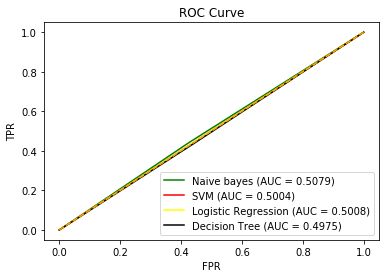

In [75]:
# ROC Curve


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# fpr1, tpr1, _ = roc_curve(y_test,  y_pred1)
# auc1 = roc_auc_score(y_test, y_pred1)

# plt.figure(figsize=(7, 6))
# plt.plot(fpr1, tpr1, color='blue',
# label='Random Forest (AUC = %0.4f)' % auc1)
# plt.legend(loc='lower right')

fpr2, tpr2, _ = roc_curve(y_test,  y_pred2)
auc2 = roc_auc_score(y_test, y_pred2)
plt.plot(fpr2, tpr2, color='green',
label='Naive bayes (AUC = %0.4f)' % auc2)
plt.legend(loc='lower right')

fpr3, tpr3, _ = roc_curve(y_test,  y_pred3)
auc3 = roc_auc_score(y_test, y_pred3)
plt.plot(fpr3, tpr3, color='red',
label='SVM (AUC = %0.4f)' % auc3)
plt.legend(loc='lower right')

fpr4, tpr4, _ = roc_curve(y_test,  y_pred4)
auc4 = roc_auc_score(y_test, y_pred4)
plt.plot(fpr4, tpr4, color='yellow',
label='Logistic Regression (AUC = %0.4f)' % auc4)
plt.legend(loc='lower right')

fpr5, tpr5, _ = roc_curve(y_test,  y_pred5)
auc5 = roc_auc_score(y_test, y_pred5)
plt.plot(fpr5, tpr5, color='black',
label='Decision Tree (AUC = %0.4f)' % auc5)
plt.legend(loc='lower right')

plt.plot([0,1], [0,1], color='orange', linestyle='--')



plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [134]:
# library to clean data 
import re 

# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 


# Natural Language Tool Kit 
import nltk 

#nltk.download('stopwords') 

# to remove stopword 
from nltk.corpus import stopwords 

# for Stemming propose 
from nltk.stem.porter import PorterStemmer 

# Initialize empty array 
# to append clean text 
Textcorpus = []

def funcTest(text):
    #text= re.sub('[^a-zA-Z]', ' ',text) 
    
    # convert all cases to lower cases
    #text = text.lower() 
    
    # split to array(default delimiter is " ") 
    text = text.split() 
    
    
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer() 
    
    # loop for stemming each word 
    # in string array at ith row
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('arabic'))] 
    #print(review)
    
    # rejoin all string array elements 
    # to create back into a string 
    text = ' '.join(text) 
    #print(review)
    
    # append each string to create 
    # array of clean text 
    Textcorpus.append(text) 

    cv = CountVectorizer(max_features=1000) 
    # X contains corpus (dependent variable) 
    cv.fit(Textcorpus)
    
    list3=[]
    TestText = cv.transform(Textcorpus)
    list3=cv.get_feature_names()
    
    TestText=TestText.toarray() 
    
    return list3


In [58]:
print(cv.get_feature_names()[0])

00


In [59]:
import numpy as np
list1=[]
for n in range(1000):
    temp=cv.get_feature_names()[n]
    list1.append(temp)
    
array1=np.array(list1)


In [108]:
array1

array(['00', '13', '19', '__', 'amp', 'blackpinkxcoachella_d1', 'boy',
       'luv', 'po', 'with', 'xr', 'آخر', 'آدم', 'آل', 'آمنوا', 'آمين',
       'آيفون', 'أبدا', 'أبواب', 'أبي', 'أتمنى', 'أجعل', 'أجل', 'أجمل',
       'أحب', 'أحبك', 'أحد', 'أحسن', 'أحيانا', 'أخرى', 'أداء', 'أسأل',
       'أسألك', 'أستغفر', 'أسعد', 'أشياء', 'أصبحنا', 'أعلم', 'أعوذ',
       'أفضل', 'أقبل', 'أكبر', 'أكتب', 'ألح', 'ألطف', 'ألف', 'أليمة',
       'أمر', 'أمري', 'أمس', 'أمطر', 'أمي', 'أنا', 'أنتم', 'أنك', 'أنه',
       'أنيق', 'أنيقه', 'أهل', 'أول', 'إبراهيم', 'إزعاج', 'إشراقة', 'إله',
       'إلهي', 'إلي', 'إليه', 'إمك', 'إن', 'إنك', 'إني', 'إهدار', 'اب',
       'ابريل', 'ابن', 'ابو', 'ابي', 'اتمنى', 'اجعل', 'اجمل', 'احب',
       'احبك', 'احد', 'احسن', 'احلى', 'احمد', 'احنا', 'اختي', 'اخر',
       'اخلاق', 'اذا', 'ارحم', 'اسألك', 'استغفر', 'استفز', 'اسم', 'اسمك',
       'اشهر', 'اصبحنا', 'اصلا', 'اعتقد', 'اعجتني', 'اعرف', 'اغنية',
       'افريقى', 'افضل', 'اقول', 'اكبر', 'اكتب', 'اكتبها', 'اكثر', 'اكيد',


In [110]:
def Predict(tw,array1):
    df=pd.DataFrame(columns=array1)
    t1=[]
    t1=funcTest(tw)
    list2=[]
    list2=t1
    list2
    
    for index in range(len(array1)):
        if df.columns[index] in list2:
            df.loc[0,df.columns[index]]=1
        else:
            df.loc[0,df.columns[index]]=0
            
    df=pd.DataFrame(columns=array1)
    my_temp=df.to_numpy()
    
    t5=model5.predict(my_temp)
    
    return t5
    
    

In [154]:
t1=[]
t1=funcTest("صحيين يختي تسالين بعد،، بس مابي اظلم سبرينق داي 😭")

#t1=funcTest('I really liked the food, amazing taste')

print(t1)

['00', '00م', '10', '100ميجا', '11', '12', '13', '15', '160', '160ريال', '2019', '2020', '250ريال', '299', '2qusdnkiyi', '30', '30م', '3bod_syr', '3eslan', '3rbawei93', '40', '4tpsyczvdz', '500', '52xf7lsknr', '5g', '600', '70', '7a19ouucci', '87', '8cd5h6bwrj', '900', 'a97h1x6loi', 'abualiq373', 'adeltayeb', 'afc', 'al_saidi', 'albashrish', 'alborsanew', 'alfadleya', 'ali_mb_', 'almarai', 'almjlesalarbawi', 'amanatalriyadh', 'areeedh1', 'ashahbander89', 'avar', 'band', 'band28', 'beinspir', 'carrier', 'cell', 'cellid', 'citc_sa', 'citc_withu', 'citrakuwait', 'city_line6', 'co', 'compon', 'cq7tdyzqg5', 'dh9mkvxszn', 'digimo1997n', 'diwanqadsawi', 'domnjj5pj', 'easterneamana', 'f5mmpxar7d', 'f8q59r7jlv', 'falahsport', 'fantastic2362', 'fifa20', 'fold', 'futchampion', 'galaxi', 'gcuvwy2q1i', 'grocerji', 'gyrmykkrvg', 'hammadalanzi', 'hj4ombjqjv', 'https', 'hxkzhpqw3v', 'i_xemi', 'iigubranii', 'ins660', 'jawwi', 'jubail_mun', 'kaust_newsar', 'kd1', 'kd2', 'kd3', 'kfjrhlmrof', 'khsbz2xq9u'

In [92]:
import pandas as pd
df=pd.DataFrame(columns=array1)
df.head()

,00,13,19,__,amp,blackpinkxcoachella_d1,boy,luv,po,with,...,ينتصر,يهديك,يوم,يوم_الجمعه,يوما,يومي,يومين,يونايتد,ﻛﻞ,ﻭﻓﻲ


In [93]:
list2=[]
list2=t1
list2

['اعترف',
 'الله',
 'المراقبة',
 'اليوم',
 'ان',
 'اوبسسيد',
 'بالزايد',
 'بتس',
 'برج',
 'برشلونه',
 'بيطلع',
 'دونغهي',
 'راسي',
 'سلطنة',
 'شغف',
 'شوي',
 'طيار',
 'عراقي',
 'عرفت',
 'عمان',
 'كانو',
 'نتيجة',
 'يجيبو',
 'يسال',
 'يونايتد']

In [94]:
len(array1)

1000

In [95]:
for index in range(len(array1)):
    if df.columns[index] in list2:
        df.loc[0,df.columns[index]]=1
    else:
        df.loc[0,df.columns[index]]=0

In [96]:
df.head()

,00,13,19,__,amp,blackpinkxcoachella_d1,boy,luv,po,with,...,ينتصر,يهديك,يوم,يوم_الجمعه,يوما,يومي,يومين,يونايتد,ﻛﻞ,ﻭﻓﻲ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Columns: 1000 entries, 00 to ﻭﻓﻲ
dtypes: int64(1000)
memory usage: 7.9 KB


In [98]:
df.iloc[0,:]

00                        0
13                        0
19                        0
__                        0
amp                       0
blackpinkxcoachella_d1    0
boy                       0
luv                       0
po                        0
with                      0
xr                        0
آخر                       0
آدم                       0
آل                        0
آمنوا                     0
آمين                      0
آيفون                     0
أبدا                      0
أبواب                     0
أبي                       0
أتمنى                     0
أجعل                      0
أجل                       0
أجمل                      0
أحب                       0
أحبك                      0
أحد                       0
أحسن                      0
أحيانا                    0
أخرى                      0
                         ..
يسقط_حكم_تميم             0
يسيئون                    0
يشجعون                    0
يصلون                     0
يعاني               

In [99]:
for value in range(len(df.columns)):
    if df.loc[0,df.columns[value]]==1:
        print(df.loc[0,df.columns[value]])
        print(df.columns[value],value)
    else:
        pass

1
الله 262
1
اليوم 313
1
ان 320
1
برج 362
1
شوي 586
1
يونايتد 997


In [100]:
my_temp=df.to_numpy()

In [101]:
t1=model1.predict(my_temp)
t1

array([0], dtype=int64)

In [102]:
t2=model2.predict(my_temp)
t2

array([0], dtype=int64)

In [103]:
t3=model3.predict(my_temp)
t3

array([0], dtype=int64)

In [104]:
t4=model4.predict(my_temp)
t4

array([0], dtype=int64)

In [106]:
my_temp

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [105]:
t5=model5.predict(my_temp)
t5

array([0], dtype=int64)

# Function

In [151]:
def ModelPrediction(tweet):
    t1=funcTest(tweet)
    list2=t1
    
    for index in range(len(array1)):
        if df.columns[index] in list2:
            df.loc[0,df.columns[index]]=1
        else:
            df.loc[0,df.columns[index]]=0
            
    my_temp=df.to_numpy()
    
    t5=model5.predict(my_temp)
    
    return t5
    
    

In [152]:
prediction_list=[]
for i in range(500): 
    print(i)
    tweets =my_data['tweets'][i] 
    pred=ModelPrediction(tweets)
    prediction_list.append(pred)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [153]:
prediction_list

[array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], 

In [141]:
def Prediction(tw,my_features):
    my_feature_list=list(my_features)
    my_dict = {"My_Features":my_feature_list}
    array1=np.array(my_feature_list)
    
    pred_DataFrame=pd.DataFrame(my_dict)
    list2=[]
    list2=tw
    df_final=pd.DataFrame(columns=array1)
    
    for index in range(len(array1)):
        if df_final.columns[index] in list2:
            df_final.loc[0,df_final.columns[index]]=1
        else:
            df_final.loc[0,df_final.columns[index]]=0
            
    for value in range(len(df_final.columns)):
        if df_final.loc[0,df_final.columns[value]]==1:
            df_final.loc[0,df_final.columns[value]]=True
        else:
            df_final.loc[0,df_final.columns[value]]=False
            
    result_df=df_final.transpose()
    my_dict=result_df.to_dict()
    
    my_result = classifier.classify(my_dict)
    
    return my_result
    
    
    

In [111]:
array1

array(['00', '13', '19', '__', 'amp', 'blackpinkxcoachella_d1', 'boy',
       'luv', 'po', 'with', 'xr', 'آخر', 'آدم', 'آل', 'آمنوا', 'آمين',
       'آيفون', 'أبدا', 'أبواب', 'أبي', 'أتمنى', 'أجعل', 'أجل', 'أجمل',
       'أحب', 'أحبك', 'أحد', 'أحسن', 'أحيانا', 'أخرى', 'أداء', 'أسأل',
       'أسألك', 'أستغفر', 'أسعد', 'أشياء', 'أصبحنا', 'أعلم', 'أعوذ',
       'أفضل', 'أقبل', 'أكبر', 'أكتب', 'ألح', 'ألطف', 'ألف', 'أليمة',
       'أمر', 'أمري', 'أمس', 'أمطر', 'أمي', 'أنا', 'أنتم', 'أنك', 'أنه',
       'أنيق', 'أنيقه', 'أهل', 'أول', 'إبراهيم', 'إزعاج', 'إشراقة', 'إله',
       'إلهي', 'إلي', 'إليه', 'إمك', 'إن', 'إنك', 'إني', 'إهدار', 'اب',
       'ابريل', 'ابن', 'ابو', 'ابي', 'اتمنى', 'اجعل', 'اجمل', 'احب',
       'احبك', 'احد', 'احسن', 'احلى', 'احمد', 'احنا', 'اختي', 'اخر',
       'اخلاق', 'اذا', 'ارحم', 'اسألك', 'استغفر', 'استفز', 'اسم', 'اسمك',
       'اشهر', 'اصبحنا', 'اصلا', 'اعتقد', 'اعجتني', 'اعرف', 'اغنية',
       'افريقى', 'افضل', 'اقول', 'اكبر', 'اكتب', 'اكتبها', 'اكثر', 'اكيد',


In [118]:
my_data = pd.read_csv('preprocessed.tsv', delimiter = '\t')
my_data.head()
my_data=my_data.rename(columns={"@FarohaM كل ابراج stc":"tweets"})
my_data.head()
from nltk import word_tokenize
my_data.head()

,tweets
0,RT @ins660 : 🎨 بيع حسابات انستقرام 🇸🇦 للبيع ⁦♥...
1,RT @m_madridi : مواجهات نادي القادسية في شهر ف...
2,RT @3rbawei93 : غيابات العربي غداً أمام الساحل...
3,@M3r5al مساء الخير محمد عشان نقوم معاك بالواج...
4,غيابات العربي غداً أمام الساحل في دوري STC الم...


In [139]:
my_data['tweets'][i] 

'RT @ins660 : 🎨 بيع حسابات انستقرام 🇸🇦 للبيع \u2066♥️\u2069  👌مناسبة لل🎼 متاجر 🎼 حسابات شخصية ..  حساب للبيع 👌  \u2066\u2066♥️\u2069\u20695 آلاف متابع  ⚫7 آلاف متابع  \u2066♥️\u206911 ألف متابع   \u2066📉\u2069\u2069 نقبل تحويل بنكي ع الاهلي والراجحي وشحن STC  \u2066 للتواصل خاص فقط🎨   #ماذا_يغضب_البنات https://t.co/f5mMpXaR7d'

In [149]:
def Predict(tw,array1):
    df=pd.DataFrame(columns=array1)
    t1=tw
    list2=[]
    list2=t1
    list2
    
    for index in range(len(array1)):
        if df.columns[index] in list2:
            df.loc[0,df.columns[index]]=1
        else:
            df.loc[0,df.columns[index]]=0
            
    df=pd.DataFrame(columns=array1)
    my_temp=df.to_numpy()
    
    print(my_temp)
    
    t5=model5.predict(my_temp)
    
    return t5 

In [150]:
for i in range(500): 
    print(i)
    tweets =my_data['tweets'][i] 
    tw=word_tokenize(tweets)
    pred=Predict(tw,array1)
    prediction_list.append(pred)

0
[]


ValueError: Found array with 0 sample(s) (shape=(0, 1000)) while a minimum of 1 is required.

In [136]:
array1.shape

(1000,)

In [131]:
tweets =my_data['tweets'][1]

In [132]:
type(tweets)

str

In [133]:
tw=word_tokenize(tweets)
type(tw)

list